In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv("C:/Users/dadhi/Downloads/MLOps Project/US_Accidents_March23.csv")

In [3]:
print(dataset.head())
print(dataset.columns)

    ID   Source  Severity           Start_Time             End_Time  \
0  A-1  Source2         3  2016-02-08 05:46:00  2016-02-08 11:00:00   
1  A-2  Source2         2  2016-02-08 06:07:59  2016-02-08 06:37:59   
2  A-3  Source2         2  2016-02-08 06:49:27  2016-02-08 07:19:27   
3  A-4  Source2         3  2016-02-08 07:23:34  2016-02-08 07:53:34   
4  A-5  Source2         2  2016-02-08 07:39:07  2016-02-08 08:09:07   

   Start_Lat  Start_Lng  End_Lat  End_Lng  Distance(mi)  ... Roundabout  \
0  39.865147 -84.058723      NaN      NaN          0.01  ...      False   
1  39.928059 -82.831184      NaN      NaN          0.01  ...      False   
2  39.063148 -84.032608      NaN      NaN          0.01  ...      False   
3  39.747753 -84.205582      NaN      NaN          0.01  ...      False   
4  39.627781 -84.188354      NaN      NaN          0.01  ...      False   

  Station   Stop Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset  \
0   False  False           False          F

In [8]:
print(dataset[0:10])

     ID   Source  Severity           Start_Time             End_Time  \
0   A-1  Source2         3  2016-02-08 05:46:00  2016-02-08 11:00:00   
1   A-2  Source2         2  2016-02-08 06:07:59  2016-02-08 06:37:59   
2   A-3  Source2         2  2016-02-08 06:49:27  2016-02-08 07:19:27   
3   A-4  Source2         3  2016-02-08 07:23:34  2016-02-08 07:53:34   
4   A-5  Source2         2  2016-02-08 07:39:07  2016-02-08 08:09:07   
5   A-6  Source2         3  2016-02-08 07:44:26  2016-02-08 08:14:26   
6   A-7  Source2         2  2016-02-08 07:59:35  2016-02-08 08:29:35   
7   A-8  Source2         3  2016-02-08 07:59:58  2016-02-08 08:29:58   
8   A-9  Source2         2  2016-02-08 08:00:40  2016-02-08 08:30:40   
9  A-10  Source2         3  2016-02-08 08:10:04  2016-02-08 08:40:04   

   Start_Lat  Start_Lng  End_Lat  End_Lng  Distance(mi)  \
0  39.865147 -84.058723      NaN      NaN          0.01   
1  39.928059 -82.831184      NaN      NaN          0.01   
2  39.063148 -84.032608      N

## Performing IDA

In [6]:
"""
Initial Data Analysis (IDA) Pipeline for US Accidents Dataset
Project: Traffic Accident Risk Predictor
Authors: Diparna Adhikary and Maddy Nommer
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)

class AccidentDataIDA:
    """
    Initial Data Analysis class for US Accidents Dataset
    """
    
    def __init__(self, filepath):
        """
        Initialize with dataset filepath
        
        Parameters:
        -----------
        filepath : str
            Path to the US Accidents CSV file
        """
        print("="*80)
        print("INITIAL DATA ANALYSIS - US ACCIDENTS DATASET")
        print("="*80)
        print(f"\nLoading dataset from: {filepath}")
        print("Please wait, this may take a few minutes for large files...\n")
        
        self.filepath = filepath
        self.df = None
        self.report = {}
        
    def load_data(self, nrows=None):
        """
        Load the dataset
        
        Parameters:
        -----------
        nrows : int, optional
            Number of rows to load (useful for testing with large files)
        """
        try:
            if nrows:
                self.df = pd.read_csv(self.filepath, nrows=nrows)
                print(f"✓ Dataset loaded successfully (first {nrows} rows)")
            else:
                self.df = pd.read_csv(self.filepath)
                print("✓ Dataset loaded successfully")
        except Exception as e:
            print(f"✗ Error loading dataset: {e}")
            return False
        return True
    
    def basic_info(self):
        """
        Display basic information about the dataset
        """
        print("\n" + "="*80)
        print("1. BASIC DATASET INFORMATION")
        print("="*80)
        
        # Shape
        print(f"\n📊 Dataset Shape:")
        print(f"   - Rows: {self.df.shape[0]:,}")
        print(f"   - Columns: {self.df.shape[1]}")
        
        # Memory usage
        memory_usage = self.df.memory_usage(deep=True).sum() / (1024**2)
        print(f"\n💾 Memory Usage: {memory_usage:.2f} MB")
        
        # Data types
        print(f"\n📋 Data Types Distribution:")
        dtype_counts = self.df.dtypes.value_counts()
        for dtype, count in dtype_counts.items():
            print(f"   - {dtype}: {count} columns")
        
        # Store in report
        self.report['shape'] = self.df.shape
        self.report['memory_mb'] = memory_usage
        self.report['dtypes'] = dtype_counts.to_dict()
        
        # Display info
        print(f"\n📝 Detailed Column Information:")
        print("-"*80)
        self.df.info()
        
    def display_sample_data(self, n=5):
        """
        Display first and last n rows of the dataset
        
        Parameters:
        -----------
        n : int
            Number of rows to display
        """
        print("\n" + "="*80)
        print("2. SAMPLE DATA INSPECTION")
        print("="*80)
        
        print(f"\n🔍 First {n} rows:")
        print("-"*80)
        print(self.df.head(n))
        
        print(f"\n🔍 Last {n} rows:")
        print("-"*80)
        print(self.df.tail(n))
        
    def missing_values_analysis(self):
        """
        Comprehensive missing values analysis
        """
        print("\n" + "="*80)
        print("3. MISSING VALUES ANALYSIS")
        print("="*80)
        
        # Calculate missing values
        missing_count = self.df.isnull().sum()
        missing_percent = (missing_count / len(self.df)) * 100
        
        # Create missing values dataframe
        missing_df = pd.DataFrame({
            'Column': missing_count.index,
            'Missing_Count': missing_count.values,
            'Missing_Percentage': missing_percent.values
        })
        
        # Sort by missing percentage
        missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values(
            'Missing_Percentage', ascending=False
        )
        
        if len(missing_df) == 0:
            print("\n✓ No missing values found in the dataset!")
        else:
            print(f"\n⚠️  Found {len(missing_df)} columns with missing values:\n")
            print(missing_df.to_string(index=False))
            
            # Categorize by severity
            critical = missing_df[missing_df['Missing_Percentage'] > 50]
            high = missing_df[(missing_df['Missing_Percentage'] > 20) & 
                             (missing_df['Missing_Percentage'] <= 50)]
            moderate = missing_df[(missing_df['Missing_Percentage'] > 5) & 
                                 (missing_df['Missing_Percentage'] <= 20)]
            low = missing_df[missing_df['Missing_Percentage'] <= 5]
            
            print(f"\n📊 Missing Data Severity:")
            print(f"   - Critical (>50%): {len(critical)} columns")
            print(f"   - High (20-50%): {len(high)} columns")
            print(f"   - Moderate (5-20%): {len(moderate)} columns")
            print(f"   - Low (<5%): {len(low)} columns")
            
            # Store in report
            self.report['missing_values'] = missing_df.to_dict('records')
            
            # Visualization
            self._plot_missing_values(missing_df)
    
    def _plot_missing_values(self, missing_df):
        """
        Create visualization for missing values
        """
        if len(missing_df) > 0:
            plt.figure(figsize=(12, max(6, len(missing_df) * 0.3)))
            
            # Bar plot
            colors = ['red' if x > 50 else 'orange' if x > 20 else 'yellow' if x > 5 
                     else 'green' for x in missing_df['Missing_Percentage']]
            
            plt.barh(missing_df['Column'], missing_df['Missing_Percentage'], color=colors)
            plt.xlabel('Missing Percentage (%)', fontsize=12)
            plt.ylabel('Column Name', fontsize=12)
            plt.title('Missing Values Analysis - US Accidents Dataset', fontsize=14, fontweight='bold')
            plt.xlim(0, 100)
            
            # Add percentage labels
            for i, (col, pct) in enumerate(zip(missing_df['Column'], missing_df['Missing_Percentage'])):
                plt.text(pct + 1, i, f'{pct:.1f}%', va='center', fontsize=9)
            
            plt.tight_layout()
            plt.savefig('missing_values_analysis.png', dpi=300, bbox_inches='tight')
            print("\n✓ Missing values plot saved: missing_values_analysis.png")
            plt.close()
    
    def data_types_analysis(self):
        """
        Analyze and validate data types for each column
        """
        print("\n" + "="*80)
        print("4. DATA TYPES VALIDATION")
        print("="*80)
        
        # Expected data types
        expected_types = {
            'ID': 'object',
            'Source': 'object',
            'Severity': 'numeric',
            'Start_Time': 'datetime',
            'End_Time': 'datetime',
            'Start_Lat': 'numeric',
            'Start_Lng': 'numeric',
            'End_Lat': 'numeric',
            'End_Lng': 'numeric',
            'Distance(mi)': 'numeric',
            'Description': 'object',
            'Street': 'object',
            'City': 'object',
            'County': 'object',
            'State': 'object',
            'Zipcode': 'object',
            'Country': 'object',
            'Timezone': 'object',
            'Airport_Code': 'object',
            'Weather_Timestamp': 'datetime',
            'Temperature(F)': 'numeric',
            'Wind_Chill(F)': 'numeric',
            'Humidity(%)': 'numeric',
            'Pressure(in)': 'numeric',
            'Visibility(mi)': 'numeric',
            'Wind_Direction': 'object',
            'Wind_Speed(mph)': 'numeric',
            'Precipitation(in)': 'numeric',
            'Weather_Condition': 'object',
            'Amenity': 'boolean',
            'Bump': 'boolean',
            'Crossing': 'boolean',
            'Give_Way': 'boolean',
            'Junction': 'boolean',
            'No_Exit': 'boolean',
            'Railway': 'boolean',
            'Roundabout': 'boolean',
            'Station': 'boolean',
            'Stop': 'boolean',
            'Traffic_Calming': 'boolean',
            'Traffic_Signal': 'boolean',
            'Turning_Loop': 'boolean',
            'Sunrise_Sunset': 'object',
            'Civil_Twilight': 'object',
            'Nautical_Twilight': 'object',
            'Astronomical_Twilight': 'object'
        }
        
        print("\n📋 Current Data Types vs Expected:")
        print("-"*80)
        
        type_issues = []
        for col in self.df.columns:
            current_type = str(self.df[col].dtype)
            expected = expected_types.get(col, 'unknown')
            
            # Check if type matches expectation
            match = False
            if expected == 'numeric' and current_type in ['int64', 'float64']:
                match = True
            elif expected == 'boolean' and current_type in ['bool', 'object']:
                match = True
            elif expected == 'datetime' and 'datetime' in current_type:
                match = True
            elif expected == 'object' and current_type == 'object':
                match = True
            
            status = "✓" if match else "✗"
            print(f"{status} {col:30s} | Current: {current_type:15s} | Expected: {expected}")
            
            if not match:
                type_issues.append({'column': col, 'current': current_type, 'expected': expected})
        
        if type_issues:
            print(f"\n⚠️  Found {len(type_issues)} columns with type mismatches")
            self.report['type_issues'] = type_issues
        else:
            print("\n✓ All data types are as expected")
    
    def duplicate_analysis(self):
        """
        Check for duplicate records
        """
        print("\n" + "="*80)
        print("5. DUPLICATE RECORDS ANALYSIS")
        print("="*80)
        
        # Check duplicates by ID
        print("\n🔍 Checking for duplicate IDs...")
        duplicate_ids = self.df['ID'].duplicated().sum()
        print(f"   - Duplicate IDs: {duplicate_ids:,}")
        
        # Check complete duplicate rows
        print("\n🔍 Checking for complete duplicate rows...")
        duplicate_rows = self.df.duplicated().sum()
        print(f"   - Complete duplicate rows: {duplicate_rows:,}")
        
        if duplicate_rows > 0:
            print(f"   - Percentage: {(duplicate_rows/len(self.df))*100:.2f}%")
        
        # Check duplicates based on key columns
        print("\n🔍 Checking for duplicates based on key columns...")
        key_cols = ['Start_Time', 'Start_Lat', 'Start_Lng', 'City', 'State']
        if all(col in self.df.columns for col in key_cols):
            key_duplicates = self.df.duplicated(subset=key_cols).sum()
            print(f"   - Duplicates based on (Time + Location): {key_duplicates:,}")
            if key_duplicates > 0:
                print(f"   - Percentage: {(key_duplicates/len(self.df))*100:.2f}%")
        
        self.report['duplicates'] = {
            'duplicate_ids': int(duplicate_ids),
            'duplicate_rows': int(duplicate_rows),
            'key_duplicates': int(key_duplicates) if 'key_duplicates' in locals() else 0
        }
    
    def basic_statistics(self):
        """
        Generate basic statistical summary
        """
        print("\n" + "="*80)
        print("6. BASIC STATISTICAL SUMMARY")
        print("="*80)
        
        # Numerical columns
        print("\n📊 Numerical Columns Statistics:")
        print("-"*80)
        numerical_cols = self.df.select_dtypes(include=[np.number]).columns
        print(self.df[numerical_cols].describe())
        
        # Categorical columns
        print("\n📊 Categorical Columns - Top Values:")
        print("-"*80)
        categorical_cols = self.df.select_dtypes(include=['object']).columns
        
        for col in categorical_cols[:10]:  # Show first 10 categorical columns
            unique_count = self.df[col].nunique()
            print(f"\n{col}:")
            print(f"  - Unique values: {unique_count:,}")
            if unique_count <= 20:
                print(f"  - Top 5 values:")
                top_values = self.df[col].value_counts().head()
                for val, count in top_values.items():
                    print(f"    • {val}: {count:,} ({(count/len(self.df))*100:.2f}%)")
    
    def unique_values_analysis(self):
        """
        Analyze unique values for each column
        """
        print("\n" + "="*80)
        print("7. UNIQUE VALUES ANALYSIS")
        print("="*80)
        
        unique_df = pd.DataFrame({
            'Column': self.df.columns,
            'Unique_Values': [self.df[col].nunique() for col in self.df.columns],
            'Unique_Percentage': [(self.df[col].nunique()/len(self.df))*100 for col in self.df.columns]
        })
        
        unique_df = unique_df.sort_values('Unique_Values', ascending=False)
        
        print("\n📊 Unique Values Summary:")
        print("-"*80)
        print(unique_df.to_string(index=False))
        
        # Identify potential issues
        print("\n🔍 Potential Data Quality Insights:")
        
        # High cardinality columns
        high_cardinality = unique_df[unique_df['Unique_Percentage'] > 90]
        if len(high_cardinality) > 0:
            print(f"\n   High Cardinality Columns (>90% unique):")
            for _, row in high_cardinality.iterrows():
                print(f"   - {row['Column']}: {row['Unique_Values']:,} unique values")
        
        # Low cardinality columns
        low_cardinality = unique_df[unique_df['Unique_Values'] <= 10]
        if len(low_cardinality) > 0:
            print(f"\n   Low Cardinality Columns (≤10 unique values):")
            for _, row in low_cardinality.iterrows():
                print(f"   - {row['Column']}: {row['Unique_Values']} unique values")
    
    def data_quality_checks(self):
        """
        Perform data quality checks for anomalies and invalid values
        """
        print("\n" + "="*80)
        print("8. DATA QUALITY CHECKS")
        print("="*80)
        
        issues = []
        
        # Check Severity range
        print("\n🔍 Checking Severity values...")
        if 'Severity' in self.df.columns:
            severity_range = self.df['Severity'].unique()
            print(f"   - Unique Severity values: {sorted(severity_range)}")
            invalid_severity = self.df[~self.df['Severity'].isin([1, 2, 3, 4])].shape[0]
            if invalid_severity > 0:
                print(f"   ✗ Found {invalid_severity} records with invalid severity")
                issues.append(f"Invalid severity values: {invalid_severity} records")
            else:
                print(f"   ✓ All severity values are valid (1-4)")
        
        # Check Distance
        print("\n🔍 Checking Distance values...")
        if 'Distance(mi)' in self.df.columns:
            negative_distance = (self.df['Distance(mi)'] < 0).sum()
            zero_distance = (self.df['Distance(mi)'] == 0).sum()
            extreme_distance = (self.df['Distance(mi)'] > 100).sum()
            
            print(f"   - Negative distances: {negative_distance:,}")
            print(f"   - Zero distances: {zero_distance:,}")
            print(f"   - Extreme distances (>100 mi): {extreme_distance:,}")
            
            if negative_distance > 0:
                issues.append(f"Negative distances: {negative_distance} records")
        
        # Check Coordinates
        print("\n🔍 Checking Geographic Coordinates...")
        if all(col in self.df.columns for col in ['Start_Lat', 'Start_Lng']):
            # US latitude range: ~24 to 49
            # US longitude range: ~-125 to -66
            invalid_lat = ((self.df['Start_Lat'] < 24) | (self.df['Start_Lat'] > 50)).sum()
            invalid_lng = ((self.df['Start_Lng'] < -130) | (self.df['Start_Lng'] > -65)).sum()
            
            print(f"   - Invalid latitudes (outside US range): {invalid_lat:,}")
            print(f"   - Invalid longitudes (outside US range): {invalid_lng:,}")
            
            if invalid_lat > 0 or invalid_lng > 0:
                issues.append(f"Invalid coordinates: {invalid_lat + invalid_lng} records")
        
        # Check Temperature extremes
        print("\n🔍 Checking Temperature values...")
        if 'Temperature(F)' in self.df.columns:
            temp_min = self.df['Temperature(F)'].min()
            temp_max = self.df['Temperature(F)'].max()
            extreme_cold = (self.df['Temperature(F)'] < -50).sum()
            extreme_hot = (self.df['Temperature(F)'] > 130).sum()
            
            print(f"   - Temperature range: {temp_min:.1f}°F to {temp_max:.1f}°F")
            print(f"   - Extreme cold (<-50°F): {extreme_cold:,}")
            print(f"   - Extreme hot (>130°F): {extreme_hot:,}")
            
            if extreme_cold > 0 or extreme_hot > 0:
                issues.append(f"Extreme temperatures: {extreme_cold + extreme_hot} records")
        
        # Check Visibility
        print("\n🔍 Checking Visibility values...")
        if 'Visibility(mi)' in self.df.columns:
            negative_visibility = (self.df['Visibility(mi)'] < 0).sum()
            print(f"   - Negative visibility: {negative_visibility:,}")
            if negative_visibility > 0:
                issues.append(f"Negative visibility: {negative_visibility} records")
        
        # Check Wind Speed
        print("\n🔍 Checking Wind Speed values...")
        if 'Wind_Speed(mph)' in self.df.columns:
            negative_wind = (self.df['Wind_Speed(mph)'] < 0).sum()
            extreme_wind = (self.df['Wind_Speed(mph)'] > 200).sum()
            print(f"   - Negative wind speed: {negative_wind:,}")
            print(f"   - Extreme wind speed (>200 mph): {extreme_wind:,}")
            if negative_wind > 0 or extreme_wind > 0:
                issues.append(f"Invalid wind speeds: {negative_wind + extreme_wind} records")
        
        # Summary
        print("\n" + "="*80)
        if issues:
            print(f"⚠️  Data Quality Summary: Found {len(issues)} issue(s)")
            for i, issue in enumerate(issues, 1):
                print(f"   {i}. {issue}")
        else:
            print("✓ No major data quality issues detected!")
        
        self.report['data_quality_issues'] = issues
    
    def generate_summary_report(self):
        """
        Generate and save a summary report
        """
        print("\n" + "="*80)
        print("9. GENERATING SUMMARY REPORT")
        print("="*80)
        
        report_text = f"""
{'='*80}
INITIAL DATA ANALYSIS SUMMARY REPORT
US Accidents Dataset
Generated: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}
{'='*80}

1. DATASET OVERVIEW
{'-'*80}
   • Total Records: {self.df.shape[0]:,}
   • Total Features: {self.df.shape[1]}
   • Memory Usage: {self.report['memory_mb']:.2f} MB
   • Date Range: {self.df['Start_Time'].min() if 'Start_Time' in self.df.columns else 'N/A'} to {self.df['Start_Time'].max() if 'Start_Time' in self.df.columns else 'N/A'}

2. DATA COMPLETENESS
{'-'*80}
   • Columns with Missing Data: {len(self.report.get('missing_values', [])) if self.report.get('missing_values') else 0}
   • Total Missing Values: {self.df.isnull().sum().sum():,}
   • Missing Percentage: {(self.df.isnull().sum().sum() / (self.df.shape[0] * self.df.shape[1]) * 100):.2f}%

3. DATA QUALITY
{'-'*80}
   • Duplicate IDs: {self.report.get('duplicates', {}).get('duplicate_ids', 0):,}
   • Duplicate Rows: {self.report.get('duplicates', {}).get('duplicate_rows', 0):,}
   • Quality Issues Found: {len(self.report.get('data_quality_issues', []))}

4. KEY STATISTICS
{'-'*80}
   • States Covered: {self.df['State'].nunique() if 'State' in self.df.columns else 'N/A'}
   • Cities Covered: {self.df['City'].nunique() if 'City' in self.df.columns else 'N/A'}
   • Severity Distribution:
"""
        
        if 'Severity' in self.df.columns:
            severity_dist = self.df['Severity'].value_counts().sort_index()
            for sev, count in severity_dist.items():
                report_text += f"     - Severity {sev}: {count:,} ({(count/len(self.df))*100:.2f}%)\n"
        
        report_text += f"""
5. RECOMMENDATIONS
{'-'*80}
"""
        
        # Add recommendations based on findings
        recommendations = []
        
        if self.report.get('missing_values'):
            critical_missing = [item for item in self.report['missing_values'] 
                              if item['Missing_Percentage'] > 50]
            if critical_missing:
                recommendations.append(f"   • Consider dropping {len(critical_missing)} columns with >50% missing data")
        
        if self.report.get('duplicates', {}).get('duplicate_rows', 0) > 0:
            recommendations.append("   • Remove duplicate rows before analysis")
        
        if self.report.get('data_quality_issues'):
            recommendations.append("   • Clean data quality issues (invalid values, outliers)")
        
        if 'Start_Time' in self.df.columns:
            recommendations.append("   • Convert datetime columns for temporal analysis")
        
        recommendations.append("   • Engineer features: hour, day_of_week, month, season")
        recommendations.append("   • Handle missing weather data appropriately")
        recommendations.append("   • Consider geographic aggregation for modeling")
        
        report_text += "\n".join(recommendations)
        
        report_text += f"""

{'='*80}
END OF REPORT
{'='*80}
"""
        
        # Save report
        with open('IDA_Summary_Report.txt', 'w') as f:
            f.write(report_text)
        
        print("\n✓ Summary report saved: IDA_Summary_Report.txt")
        print(report_text)
    
    def run_complete_ida(self, nrows=None):
        """
        Run the complete IDA pipeline
        
        Parameters:
        -----------
        nrows : int, optional
            Number of rows to load (for testing)
        """
        # Load data
        if not self.load_data(nrows=nrows):
            return
        
        # Run all analyses
        self.basic_info()
        self.display_sample_data()
        self.missing_values_analysis()
        self.data_types_analysis()
        self.duplicate_analysis()
        self.basic_statistics()
        self.unique_values_analysis()
        self.data_quality_checks()
        self.generate_summary_report()
        
        print("\n" + "="*80)
        print("✓ INITIAL DATA ANALYSIS COMPLETE!")
        print("="*80)
        print("\nGenerated Files:")
        print("   1. missing_values_analysis.png")
        print("   2. IDA_Summary_Report.txt")
        print("\nNext Steps:")
        print("   • Review the summary report")
        print("   • Address data quality issues")
        print("   • Proceed to Exploratory Data Analysis (EDA)")
        print("="*80)


def main():
    """
    Main function to run IDA
    """
    # Initialize IDA
    # Replace with your actual file path
    filepath = "C:/Users/dadhi/Downloads/MLOps Project/US_Accidents_March23.csv"
    
    ida = AccidentDataIDA(filepath)
    
    # Run complete IDA
    # Use nrows parameter to load only a subset for testing
    # ida.run_complete_ida(nrows=100000)  # Load first 100k rows for testing
    ida.run_complete_ida()  # Load complete dataset
    

if __name__ == "__main__":
    main()

INITIAL DATA ANALYSIS - US ACCIDENTS DATASET

Loading dataset from: C:/Users/dadhi/Downloads/MLOps Project/US_Accidents_March23.csv
Please wait, this may take a few minutes for large files...

✓ Dataset loaded successfully

1. BASIC DATASET INFORMATION

📊 Dataset Shape:
   - Rows: 7,728,394
   - Columns: 46

💾 Memory Usage: 10870.28 MB

📋 Data Types Distribution:
   - object: 20 columns
   - bool: 13 columns
   - float64: 12 columns
   - int64: 1 columns

📝 Detailed Column Information:
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng             

In [10]:
"""
EDA Part 3: Severity Analysis (Notebook Version)
US Accidents Dataset - Traffic Accident Risk Predictor
Project Partners: Diparna Adhikary and Maddy Nommer

Usage in Notebook:
------------------
# After loading your data
import pandas as pd
df = pd.read_csv('US_Accidents.csv')

# Import and run analysis
from eda_part3_severity_analysis import SeverityAnalysis
analyzer = SeverityAnalysis(df)
analyzer.run_complete_analysis()
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
sns.set_style('whitegrid')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 10

class SeverityAnalysis:
    """
    Comprehensive Severity Analysis for US Accidents Dataset (Notebook Version)
    Works directly with DataFrame, displays plots inline
    """
    
    def __init__(self, df):
        """
        Initialize with DataFrame
        
        Parameters:
        -----------
        df : pandas.DataFrame
            US Accidents dataset
        """
        print("="*80)
        print("EDA PART 3: SEVERITY ANALYSIS")
        print("US Accidents Dataset - Traffic Accident Risk Predictor")
        print("="*80)
        
        self.df = df.copy()  # Work with a copy to avoid modifying original
        print(f"\n✓ DataFrame loaded: {self.df.shape[0]:,} rows × {self.df.shape[1]} columns")
        
        # Prepare datetime columns if needed
        self._prepare_data()
    
    def _prepare_data(self):
        """
        Prepare data: convert datetime columns
        """
        if 'Start_Time' in self.df.columns and self.df['Start_Time'].dtype == 'object':
            self.df['Start_Time'] = pd.to_datetime(self.df['Start_Time'], format='mixed', errors='coerce')
            print("✓ Start_Time converted to datetime")
        
        if 'End_Time' in self.df.columns and self.df['End_Time'].dtype == 'object':
            self.df['End_Time'] = pd.to_datetime(self.df['End_Time'], format='mixed', errors='coerce')
            print("✓ End_Time converted to datetime")
    
    def basic_severity_overview(self):
        """
        Basic overview of severity distribution
        """
        print("\n" + "="*80)
        print("1. SEVERITY DISTRIBUTION OVERVIEW")
        print("="*80)
        
        if 'Severity' not in self.df.columns:
            print("✗ Severity column not found!")
            return
        
        # Overall distribution
        severity_counts = self.df['Severity'].value_counts().sort_index()
        severity_percent = (severity_counts / len(self.df) * 100).round(2)
        
        print("\n📊 Severity Distribution:")
        print("-"*80)
        for sev in sorted(self.df['Severity'].unique()):
            count = severity_counts.get(sev, 0)
            percent = severity_percent.get(sev, 0)
            bar = "█" * int(percent)
            print(f"  Severity {sev}: {count:>10,} ({percent:>5.2f}%) {bar}")
        
        # Statistics
        print(f"\n📈 Statistics:")
        print(f"  - Mean Severity: {self.df['Severity'].mean():.2f}")
        print(f"  - Median Severity: {self.df['Severity'].median():.1f}")
        print(f"  - Mode Severity: {self.df['Severity'].mode()[0]}")
        print(f"  - Std Dev: {self.df['Severity'].std():.2f}")
        
        # Visualization
        fig, axes = plt.subplots(1, 2, figsize=(14, 5))
        
        # Bar plot
        colors = ['#2ecc71', '#f39c12', '#e74c3c', '#c0392b']
        axes[0].bar(severity_counts.index, severity_counts.values, color=colors[:len(severity_counts)])
        axes[0].set_xlabel('Severity Level', fontsize=12, fontweight='bold')
        axes[0].set_ylabel('Number of Accidents', fontsize=12, fontweight='bold')
        axes[0].set_title('Accident Count by Severity Level', fontsize=14, fontweight='bold')
        axes[0].set_xticks(severity_counts.index)
        
        # Add value labels
        for i, (sev, count) in enumerate(severity_counts.items()):
            axes[0].text(sev, count, f'{count:,}\n({severity_percent[sev]:.1f}%)', 
                        ha='center', va='bottom', fontweight='bold')
        
        # Pie chart
        axes[1].pie(severity_counts.values, labels=[f'Severity {s}' for s in severity_counts.index], 
                   autopct='%1.1f%%', colors=colors[:len(severity_counts)], startangle=90)
        axes[1].set_title('Severity Distribution (Percentage)', fontsize=14, fontweight='bold')
        
        plt.tight_layout()
        plt.show()
    
    def severity_by_time(self):
        """
        Analyze severity patterns by time
        """
        print("\n" + "="*80)
        print("2. SEVERITY PATTERNS BY TIME")
        print("="*80)
        
        if 'Start_Time' not in self.df.columns:
            print("✗ Start_Time column not found!")
            return
        
        # Extract time features
        self.df['Hour'] = self.df['Start_Time'].dt.hour
        self.df['DayOfWeek'] = self.df['Start_Time'].dt.dayofweek
        self.df['DayName'] = self.df['Start_Time'].dt.day_name()
        self.df['Month'] = self.df['Start_Time'].dt.month
        self.df['Year'] = self.df['Start_Time'].dt.year
        
        print("\n✓ Time features extracted")
        
        # Hour analysis
        print("\n⏰ Severity by Hour of Day:")
        print("-"*80)
        hour_severity = self.df.groupby('Hour')['Severity'].agg(['mean', 'count'])
        
        peak_hours = hour_severity.nlargest(3, 'mean')
        print("\nTop 3 hours with highest average severity:")
        for hour, row in peak_hours.iterrows():
            print(f"  {hour:02d}:00 - Avg Severity: {row['mean']:.3f} ({row['count']:,} accidents)")
        
        # Day of week analysis
        print("\n📅 Severity by Day of Week:")
        print("-"*80)
        day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
        day_severity = self.df.groupby('DayName')['Severity'].agg(['mean', 'count'])
        day_severity = day_severity.reindex(day_order)
        
        for day, row in day_severity.iterrows():
            print(f"  {day:10s}: Avg Severity: {row['mean']:.3f} ({row['count']:,} accidents)")
        
        # Month analysis
        print("\n📆 Severity by Month:")
        print("-"*80)
        month_names = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
                      7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
        month_severity = self.df.groupby('Month')['Severity'].agg(['mean', 'count'])
        
        for month, row in month_severity.iterrows():
            print(f"  {month_names[month]}: Avg Severity: {row['mean']:.3f} ({row['count']:,} accidents)")
        
        # Visualizations
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        
        # Hour of day
        axes[0, 0].plot(hour_severity.index, hour_severity['mean'], marker='o', linewidth=2, markersize=6)
        axes[0, 0].fill_between(hour_severity.index, hour_severity['mean'], alpha=0.3)
        axes[0, 0].set_xlabel('Hour of Day', fontsize=11, fontweight='bold')
        axes[0, 0].set_ylabel('Average Severity', fontsize=11, fontweight='bold')
        axes[0, 0].set_title('Average Severity by Hour of Day', fontsize=13, fontweight='bold')
        axes[0, 0].set_xticks(range(0, 24, 2))
        axes[0, 0].grid(True, alpha=0.3)
        
        # Day of week
        axes[0, 1].bar(range(len(day_order)), day_severity['mean'], color='coral')
        axes[0, 1].set_xlabel('Day of Week', fontsize=11, fontweight='bold')
        axes[0, 1].set_ylabel('Average Severity', fontsize=11, fontweight='bold')
        axes[0, 1].set_title('Average Severity by Day of Week', fontsize=13, fontweight='bold')
        axes[0, 1].set_xticks(range(len(day_order)))
        axes[0, 1].set_xticklabels(day_order, rotation=45, ha='right')
        axes[0, 1].grid(True, alpha=0.3, axis='y')
        
        # Month
        axes[1, 0].plot(month_severity.index, month_severity['mean'], marker='s', linewidth=2, 
                       markersize=8, color='green')
        axes[1, 0].fill_between(month_severity.index, month_severity['mean'], alpha=0.3, color='green')
        axes[1, 0].set_xlabel('Month', fontsize=11, fontweight='bold')
        axes[1, 0].set_ylabel('Average Severity', fontsize=11, fontweight='bold')
        axes[1, 0].set_title('Average Severity by Month', fontsize=13, fontweight='bold')
        axes[1, 0].set_xticks(range(1, 13))
        axes[1, 0].set_xticklabels([month_names[i] for i in range(1, 13)], rotation=45)
        axes[1, 0].grid(True, alpha=0.3)
        
        # Heatmap: Hour vs Day of Week
        pivot_data = self.df.pivot_table(values='Severity', index='Hour', 
                                        columns='DayOfWeek', aggfunc='mean')
        pivot_data.columns = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
        
        sns.heatmap(pivot_data, annot=False, fmt='.2f', cmap='YlOrRd', 
                   cbar_kws={'label': 'Avg Severity'}, ax=axes[1, 1])
        axes[1, 1].set_xlabel('Day of Week', fontsize=11, fontweight='bold')
        axes[1, 1].set_ylabel('Hour of Day', fontsize=11, fontweight='bold')
        axes[1, 1].set_title('Severity Heatmap: Hour vs Day of Week', fontsize=13, fontweight='bold')
        
        plt.tight_layout()
        plt.show()
    
    def severity_by_location(self):
        """
        Analyze severity patterns by geographic location
        """
        print("\n" + "="*80)
        print("3. SEVERITY PATTERNS BY LOCATION")
        print("="*80)
        
        # State analysis
        print("\n🗺️  Severity by State:")
        print("-"*80)
        state_severity = self.df.groupby('State')['Severity'].agg(['mean', 'count']).sort_values('mean', ascending=False)
        
        print("\nTop 10 States with Highest Average Severity:")
        for i, (state, row) in enumerate(state_severity.head(10).iterrows(), 1):
            print(f"  {i:2d}. {state}: Avg Severity: {row['mean']:.3f} ({row['count']:,} accidents)")
        
        print("\nTop 10 States with Lowest Average Severity:")
        for i, (state, row) in enumerate(state_severity.tail(10).iterrows(), 1):
            print(f"  {i:2d}. {state}: Avg Severity: {row['mean']:.3f} ({row['count']:,} accidents)")
        
        # City analysis
        print("\n🏙️  Severity by City:")
        print("-"*80)
        city_severity = self.df.groupby('City')['Severity'].agg(['mean', 'count']).sort_values('count', ascending=False)
        
        top_cities = city_severity.head(20)
        print("\nTop 20 Cities by Accident Count (with avg severity):")
        for i, (city, row) in enumerate(top_cities.iterrows(), 1):
            print(f"  {i:2d}. {city:25s}: {row['count']:>7,} accidents, Avg Severity: {row['mean']:.3f}")
        
        # Visualizations
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        
        # Top 15 states by average severity
        top_states_severity = state_severity.head(15)
        axes[0, 0].barh(range(len(top_states_severity)), top_states_severity['mean'], color='steelblue')
        axes[0, 0].set_yticks(range(len(top_states_severity)))
        axes[0, 0].set_yticklabels(top_states_severity.index)
        axes[0, 0].set_xlabel('Average Severity', fontsize=11, fontweight='bold')
        axes[0, 0].set_ylabel('State', fontsize=11, fontweight='bold')
        axes[0, 0].set_title('Top 15 States by Average Severity', fontsize=13, fontweight='bold')
        axes[0, 0].invert_yaxis()
        axes[0, 0].grid(True, alpha=0.3, axis='x')
        
        # Top 15 states by count
        top_states_count = state_severity.sort_values('count', ascending=False).head(15)
        axes[0, 1].barh(range(len(top_states_count)), top_states_count['count'], color='coral')
        axes[0, 1].set_yticks(range(len(top_states_count)))
        axes[0, 1].set_yticklabels(top_states_count.index)
        axes[0, 1].set_xlabel('Number of Accidents', fontsize=11, fontweight='bold')
        axes[0, 1].set_ylabel('State', fontsize=11, fontweight='bold')
        axes[0, 1].set_title('Top 15 States by Accident Count', fontsize=13, fontweight='bold')
        axes[0, 1].invert_yaxis()
        axes[0, 1].grid(True, alpha=0.3, axis='x')
        
        # Top 15 cities by average severity (min 1000 accidents)
        city_filtered = city_severity[city_severity['count'] >= 1000].sort_values('mean', ascending=False).head(15)
        axes[1, 0].barh(range(len(city_filtered)), city_filtered['mean'], color='green')
        axes[1, 0].set_yticks(range(len(city_filtered)))
        axes[1, 0].set_yticklabels(city_filtered.index, fontsize=9)
        axes[1, 0].set_xlabel('Average Severity', fontsize=11, fontweight='bold')
        axes[1, 0].set_ylabel('City', fontsize=11, fontweight='bold')
        axes[1, 0].set_title('Top 15 Cities by Avg Severity (min 1000 accidents)', fontsize=13, fontweight='bold')
        axes[1, 0].invert_yaxis()
        axes[1, 0].grid(True, alpha=0.3, axis='x')
        
        # Top 15 cities by count
        axes[1, 1].barh(range(len(top_cities.head(15))), top_cities.head(15)['count'], color='purple')
        axes[1, 1].set_yticks(range(len(top_cities.head(15))))
        axes[1, 1].set_yticklabels(top_cities.head(15).index, fontsize=9)
        axes[1, 1].set_xlabel('Number of Accidents', fontsize=11, fontweight='bold')
        axes[1, 1].set_ylabel('City', fontsize=11, fontweight='bold')
        axes[1, 1].set_title('Top 15 Cities by Accident Count', fontsize=13, fontweight='bold')
        axes[1, 1].invert_yaxis()
        axes[1, 1].grid(True, alpha=0.3, axis='x')
        
        plt.tight_layout()
        plt.show()
    
    def severity_by_weather(self):
        """
        Analyze severity patterns by weather conditions
        """
        print("\n" + "="*80)
        print("4. SEVERITY PATTERNS BY WEATHER")
        print("="*80)
        
        # Weather condition
        if 'Weather_Condition' in self.df.columns:
            print("\n🌦️  Severity by Weather Condition:")
            print("-"*80)
            weather_severity = self.df.groupby('Weather_Condition')['Severity'].agg(['mean', 'count']).sort_values('mean', ascending=False)
            
            weather_filtered = weather_severity[weather_severity['count'] >= 1000].head(15)
            print("\nTop 15 Weather Conditions by Severity (min 1000 occurrences):")
            for i, (weather, row) in enumerate(weather_filtered.iterrows(), 1):
                print(f"  {i:2d}. {weather:35s}: Avg Severity: {row['mean']:.3f} ({row['count']:,} accidents)")
        
        # Temperature
        temp_severity = None
        if 'Temperature(F)' in self.df.columns:
            print("\n🌡️  Severity by Temperature:")
            print("-"*80)
            
            self.df['Temp_Bin'] = pd.cut(self.df['Temperature(F)'], 
                                        bins=[-50, 0, 32, 50, 70, 90, 150],
                                        labels=['<0°F', '0-32°F', '32-50°F', '50-70°F', '70-90°F', '>90°F'])
            
            temp_severity = self.df.groupby('Temp_Bin', observed=True)['Severity'].agg(['mean', 'count'])
            print("\nSeverity by Temperature Range:")
            for temp, row in temp_severity.iterrows():
                print(f"  {temp:10s}: Avg Severity: {row['mean']:.3f} ({row['count']:,} accidents)")
        
        # Visibility
        vis_severity = None
        if 'Visibility(mi)' in self.df.columns:
            print("\n👁️  Severity by Visibility:")
            print("-"*80)
            
            self.df['Visibility_Bin'] = pd.cut(self.df['Visibility(mi)'], 
                                              bins=[-1, 1, 5, 10, 20],
                                              labels=['<1 mi', '1-5 mi', '5-10 mi', '>10 mi'])
            
            vis_severity = self.df.groupby('Visibility_Bin', observed=True)['Severity'].agg(['mean', 'count'])
            print("\nSeverity by Visibility Range:")
            for vis, row in vis_severity.iterrows():
                print(f"  {vis:10s}: Avg Severity: {row['mean']:.3f} ({row['count']:,} accidents)")
        
        # Wind speed
        wind_severity = None
        if 'Wind_Speed(mph)' in self.df.columns:
            print("\n💨 Severity by Wind Speed:")
            print("-"*80)
            
            self.df['Wind_Bin'] = pd.cut(self.df['Wind_Speed(mph)'], 
                                        bins=[-1, 5, 15, 25, 200],
                                        labels=['Calm (<5)', 'Light (5-15)', 'Moderate (15-25)', 'Strong (>25)'])
            
            wind_severity = self.df.groupby('Wind_Bin', observed=True)['Severity'].agg(['mean', 'count'])
            print("\nSeverity by Wind Speed Range:")
            for wind, row in wind_severity.iterrows():
                print(f"  {wind:20s}: Avg Severity: {row['mean']:.3f} ({row['count']:,} accidents)")
        
        # Visualizations
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        
        # Weather conditions
        if 'Weather_Condition' in self.df.columns and len(weather_filtered) > 0:
            axes[0, 0].barh(range(len(weather_filtered)), weather_filtered['mean'], color='skyblue')
            axes[0, 0].set_yticks(range(len(weather_filtered)))
            axes[0, 0].set_yticklabels(weather_filtered.index, fontsize=8)
            axes[0, 0].set_xlabel('Average Severity', fontsize=11, fontweight='bold')
            axes[0, 0].set_title('Top 15 Weather Conditions by Avg Severity', fontsize=13, fontweight='bold')
            axes[0, 0].invert_yaxis()
            axes[0, 0].grid(True, alpha=0.3, axis='x')
        
        # Temperature
        if temp_severity is not None:
            axes[0, 1].bar(range(len(temp_severity)), temp_severity['mean'], color='orange')
            axes[0, 1].set_xticks(range(len(temp_severity)))
            axes[0, 1].set_xticklabels(temp_severity.index, rotation=45, ha='right')
            axes[0, 1].set_ylabel('Average Severity', fontsize=11, fontweight='bold')
            axes[0, 1].set_title('Average Severity by Temperature Range', fontsize=13, fontweight='bold')
            axes[0, 1].grid(True, alpha=0.3, axis='y')
        
        # Visibility
        if vis_severity is not None:
            axes[1, 0].bar(range(len(vis_severity)), vis_severity['mean'], color='purple')
            axes[1, 0].set_xticks(range(len(vis_severity)))
            axes[1, 0].set_xticklabels(vis_severity.index, rotation=45, ha='right')
            axes[1, 0].set_ylabel('Average Severity', fontsize=11, fontweight='bold')
            axes[1, 0].set_title('Average Severity by Visibility Range', fontsize=13, fontweight='bold')
            axes[1, 0].grid(True, alpha=0.3, axis='y')
        
        # Wind speed
        if wind_severity is not None:
            axes[1, 1].bar(range(len(wind_severity)), wind_severity['mean'], color='green')
            axes[1, 1].set_xticks(range(len(wind_severity)))
            axes[1, 1].set_xticklabels(wind_severity.index, rotation=45, ha='right')
            axes[1, 1].set_ylabel('Average Severity', fontsize=11, fontweight='bold')
            axes[1, 1].set_title('Average Severity by Wind Speed Range', fontsize=13, fontweight='bold')
            axes[1, 1].grid(True, alpha=0.3, axis='y')
        
        plt.tight_layout()
        plt.show()
    
    def severity_by_road_features(self):
        """
        Analyze severity patterns by road features
        """
        print("\n" + "="*80)
        print("5. SEVERITY PATTERNS BY ROAD FEATURES")
        print("="*80)
        
        road_features = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 
                        'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 
                        'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']
        
        available_features = [f for f in road_features if f in self.df.columns]
        
        if not available_features:
            print("✗ No road features found!")
            return
        
        print(f"\n✓ Found {len(available_features)} road features")
        print("\n🛣️  Severity by Road Feature Presence:")
        print("-"*80)
        
        feature_severity = {}
        for feature in available_features:
            grouped = self.df.groupby(feature)['Severity'].agg(['mean', 'count'])
            
            if True in grouped.index and False in grouped.index:
                with_feature = grouped.loc[True]
                without_feature = grouped.loc[False]
                
                feature_severity[feature] = {
                    'with_mean': with_feature['mean'],
                    'without_mean': without_feature['mean'],
                    'with_count': with_feature['count'],
                    'without_count': without_feature['count'],
                    'difference': with_feature['mean'] - without_feature['mean']
                }
                
                print(f"\n{feature}:")
                print(f"  With {feature:20s}: Avg Severity: {with_feature['mean']:.3f} ({with_feature['count']:,} accidents)")
                print(f"  Without {feature:17s}: Avg Severity: {without_feature['mean']:.3f} ({without_feature['count']:,} accidents)")
                print(f"  Difference: {feature_severity[feature]['difference']:+.3f}")
        
        sorted_features = sorted(feature_severity.items(), key=lambda x: abs(x[1]['difference']), reverse=True)
        
        print("\n📊 Features Ranked by Impact on Severity:")
        print("-"*80)
        for i, (feature, data) in enumerate(sorted_features, 1):
            impact = "increases" if data['difference'] > 0 else "decreases"
            print(f"  {i:2d}. {feature:20s}: {impact} severity by {abs(data['difference']):.3f}")
        
        # Visualizations
        if feature_severity:
            fig, axes = plt.subplots(2, 1, figsize=(14, 10))
            
            features = [f[0] for f in sorted_features]
            with_severity = [f[1]['with_mean'] for f in sorted_features]
            without_severity = [f[1]['without_mean'] for f in sorted_features]
            
            x = np.arange(len(features))
            width = 0.35
            
            axes[0].bar(x - width/2, with_severity, width, label='With Feature', color='coral')
            axes[0].bar(x + width/2, without_severity, width, label='Without Feature', color='skyblue')
            axes[0].set_xlabel('Road Feature', fontsize=11, fontweight='bold')
            axes[0].set_ylabel('Average Severity', fontsize=11, fontweight='bold')
            axes[0].set_title('Average Severity: With vs Without Road Features', fontsize=13, fontweight='bold')
            axes[0].set_xticks(x)
            axes[0].set_xticklabels(features, rotation=45, ha='right')
            axes[0].legend()
            axes[0].grid(True, alpha=0.3, axis='y')
            
            # Difference plot
            differences = [f[1]['difference'] for f in sorted_features]
            colors = ['red' if d > 0 else 'green' for d in differences]
            
            axes[1].barh(range(len(features)), differences, color=colors)
            axes[1].set_yticks(range(len(features)))
            axes[1].set_yticklabels(features)
            axes[1].set_xlabel('Severity Difference (With - Without)', fontsize=11, fontweight='bold')
            axes[1].set_title('Impact of Road Features on Severity', fontsize=13, fontweight='bold')
            axes[1].axvline(x=0, color='black', linestyle='--', linewidth=1)
            axes[1].invert_yaxis()
            axes[1].grid(True, alpha=0.3, axis='x')
            
            plt.tight_layout()
            plt.show()
    
    def severity_by_day_night(self):
        """
        Analyze severity patterns by day/night
        """
        print("\n" + "="*80)
        print("6. SEVERITY PATTERNS BY DAY/NIGHT")
        print("="*80)
        
        if 'Sunrise_Sunset' not in self.df.columns:
            print("✗ Sunrise_Sunset column not found!")
            return
        
        day_night_severity = self.df.groupby('Sunrise_Sunset')['Severity'].agg(['mean', 'count'])
        
        print("\n☀️🌙 Severity by Day/Night:")
        print("-"*80)
        for period, row in day_night_severity.iterrows():
            print(f"  {period:10s}: Avg Severity: {row['mean']:.3f} ({row['count']:,} accidents)")
        
        if 'Day' in day_night_severity.index and 'Night' in day_night_severity.index:
            diff = day_night_severity.loc['Night', 'mean'] - day_night_severity.loc['Day', 'mean']
            if diff > 0:
                print(f"\n  Night accidents are {diff:.3f} severity points higher on average")
            else:
                print(f"\n  Day accidents are {abs(diff):.3f} severity points higher on average")
        
        # Visualization
        fig, axes = plt.subplots(1, 2, figsize=(14, 5))
        
        colors = ['#FFD700', '#2C3E50']
        axes[0].bar(range(len(day_night_severity)), day_night_severity['mean'], color=colors[:len(day_night_severity)])
        axes[0].set_xticks(range(len(day_night_severity)))
        axes[0].set_xticklabels(day_night_severity.index)
        axes[0].set_ylabel('Average Severity', fontsize=11, fontweight='bold')
        axes[0].set_title('Average Severity: Day vs Night', fontsize=13, fontweight='bold')
        axes[0].grid(True, alpha=0.3, axis='y')
        
        for i, (period, row) in enumerate(day_night_severity.iterrows()):
            axes[0].text(i, row['mean'], f"{row['mean']:.3f}", ha='center', va='bottom', fontweight='bold')
        
        axes[1].pie(day_night_severity['count'], labels=day_night_severity.index, autopct='%1.1f%%', 
                   colors=colors[:len(day_night_severity)], startangle=90)
        axes[1].set_title('Accident Distribution: Day vs Night', fontsize=13, fontweight='bold')
        
        plt.tight_layout()
        plt.show()
    
    def generate_severity_summary(self):
        """
        Generate and print severity analysis summary
        """
        print("\n" + "="*80)
        print("7. SEVERITY ANALYSIS SUMMARY")
        print("="*80)
        
        summary = f"""
{'='*80}
SEVERITY ANALYSIS SUMMARY
US Accidents Dataset - Traffic Accident Risk Predictor
Generated: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}
{'='*80}

1. OVERALL SEVERITY DISTRIBUTION
{'-'*80}
"""
        
        severity_counts = self.df['Severity'].value_counts().sort_index()
        for sev, count in severity_counts.items():
            pct = (count / len(self.df)) * 100
            summary += f"   Severity {sev}: {count:>10,} ({pct:>5.2f}%)\n"
        
        summary += f"""
   Mean Severity: {self.df['Severity'].mean():.3f}
   Median Severity: {self.df['Severity'].median():.1f}
   Mode Severity: {self.df['Severity'].mode()[0]}

2. KEY FINDINGS
{'-'*80}
"""
        
        if 'Hour' in self.df.columns:
            hour_severity = self.df.groupby('Hour')['Severity'].mean()
            peak_hour = hour_severity.idxmax()
            summary += f"   • Peak severity hour: {peak_hour:02d}:00 (Avg: {hour_severity[peak_hour]:.3f})\n"
        
        if 'State' in self.df.columns:
            state_severity = self.df.groupby('State')['Severity'].mean().sort_values(ascending=False)
            top_state = state_severity.index[0]
            summary += f"   • Highest severity state: {top_state} (Avg: {state_severity[top_state]:.3f})\n"
        
        if 'Weather_Condition' in self.df.columns:
            weather_severity = self.df.groupby('Weather_Condition')['Severity'].agg(['mean', 'count'])
            weather_filtered = weather_severity[weather_severity['count'] >= 1000].sort_values('mean', ascending=False)
            if len(weather_filtered) > 0:
                top_weather = weather_filtered.index[0]
                summary += f"   • Most severe weather: {top_weather}\n"
        
        if 'Sunrise_Sunset' in self.df.columns:
            day_night = self.df.groupby('Sunrise_Sunset')['Severity'].mean()
            if 'Day' in day_night.index and 'Night' in day_night.index:
                more_severe = 'Night' if day_night['Night'] > day_night['Day'] else 'Day'
                summary += f"   • More severe time: {more_severe} accidents\n"
        
        summary += f"""

3. RECOMMENDATIONS FOR MODEL
{'-'*80}
   • Include temporal features (hour, day of week, season)
   • Consider geographic clustering
   • Weather conditions are strong predictors
   • Road features show measurable impact
   • Day/night distinction should be included

{'='*80}
END OF SEVERITY ANALYSIS
{'='*80}
"""
        
        print(summary)
    
    def run_complete_analysis(self):
        """
        Run the complete severity analysis pipeline
        """
        self.basic_severity_overview()
        self.severity_by_time()
        self.severity_by_location()
        self.severity_by_weather()
        self.severity_by_road_features()
        self.severity_by_day_night()
        self.generate_severity_summary()
        
        print("\n" + "="*80)
        print("✓ SEVERITY ANALYSIS COMPLETE!")
        print("="*80)

EDA PART 3: SEVERITY ANALYSIS
US Accidents Dataset - Traffic Accident Risk Predictor

✓ DataFrame loaded: 7,728,394 rows × 46 columns
✓ Start_Time converted to datetime
✓ End_Time converted to datetime

1. SEVERITY DISTRIBUTION OVERVIEW

📊 Severity Distribution:
--------------------------------------------------------------------------------
  Severity 1:     67,366 ( 0.87%) 
  Severity 2:  6,156,981 (79.67%) ███████████████████████████████████████████████████████████████████████████████
  Severity 3:  1,299,337 (16.81%) ████████████████
  Severity 4:    204,710 ( 2.65%) ██

📈 Statistics:
  - Mean Severity: 2.21
  - Median Severity: 2.0
  - Mode Severity: 2
  - Std Dev: 0.49


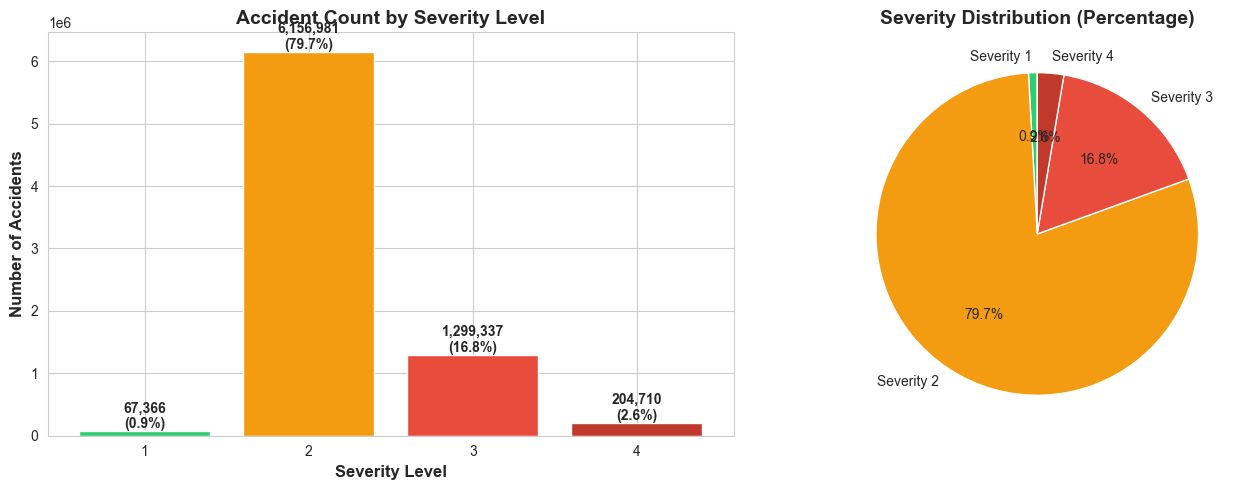


2. SEVERITY PATTERNS BY TIME

✓ Time features extracted

⏰ Severity by Hour of Day:
--------------------------------------------------------------------------------

Top 3 hours with highest average severity:
  20:00 - Avg Severity: 2.247 (225,226.0 accidents)
  21:00 - Avg Severity: 2.242 (191,452.0 accidents)
  22:00 - Avg Severity: 2.241 (167,645.0 accidents)

📅 Severity by Day of Week:
--------------------------------------------------------------------------------
  Monday    : Avg Severity: 2.209 (1,210,921.0 accidents)
  Tuesday   : Avg Severity: 2.205 (1,290,929.0 accidents)
  Wednesday : Avg Severity: 2.203 (1,312,389.0 accidents)
  Thursday  : Avg Severity: 2.204 (1,316,229.0 accidents)
  Friday    : Avg Severity: 2.207 (1,366,499.0 accidents)
  Saturday  : Avg Severity: 2.241 (668,683.0 accidents)
  Sunday    : Avg Severity: 2.259 (562,744.0 accidents)

📆 Severity by Month:
--------------------------------------------------------------------------------
  Jan: Avg Severity:

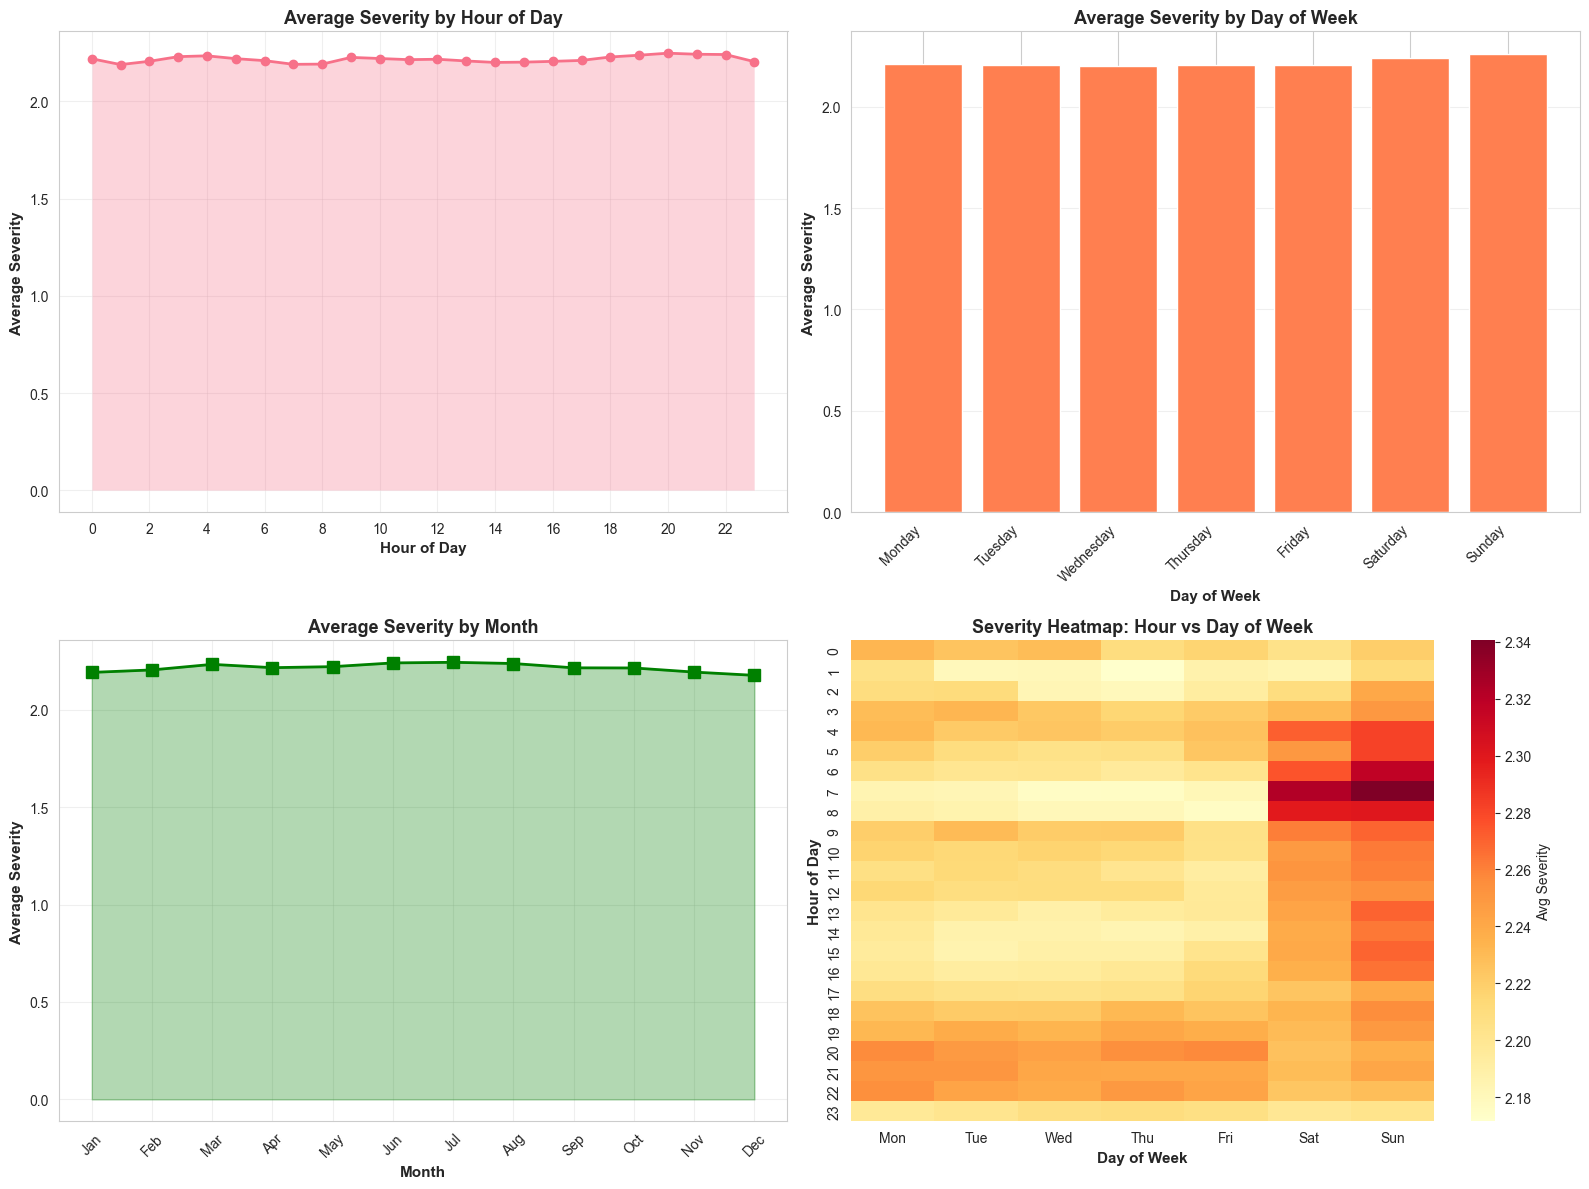


3. SEVERITY PATTERNS BY LOCATION

🗺️  Severity by State:
--------------------------------------------------------------------------------

Top 10 States with Highest Average Severity:
   1. GA: Avg Severity: 2.507 (169,234.0 accidents)
   2. WI: Avg Severity: 2.474 (34,688.0 accidents)
   3. RI: Avg Severity: 2.458 (16,971.0 accidents)
   4. KY: Avg Severity: 2.454 (32,254.0 accidents)
   5. CO: Avg Severity: 2.444 (90,885.0 accidents)
   6. SD: Avg Severity: 2.443 (289.0 accidents)
   7. VT: Avg Severity: 2.425 (926.0 accidents)
   8. IA: Avg Severity: 2.419 (26,307.0 accidents)
   9. MO: Avg Severity: 2.400 (77,323.0 accidents)
  10. IN: Avg Severity: 2.398 (67,224.0 accidents)

Top 10 States with Lowest Average Severity:
   1. FL: Avg Severity: 2.140 (880,192.0 accidents)
   2. NC: Avg Severity: 2.134 (338,199.0 accidents)
   3. LA: Avg Severity: 2.126 (149,701.0 accidents)
   4. AZ: Avg Severity: 2.120 (170,609.0 accidents)
   5. ID: Avg Severity: 2.116 (11,376.0 accidents)
   6. 

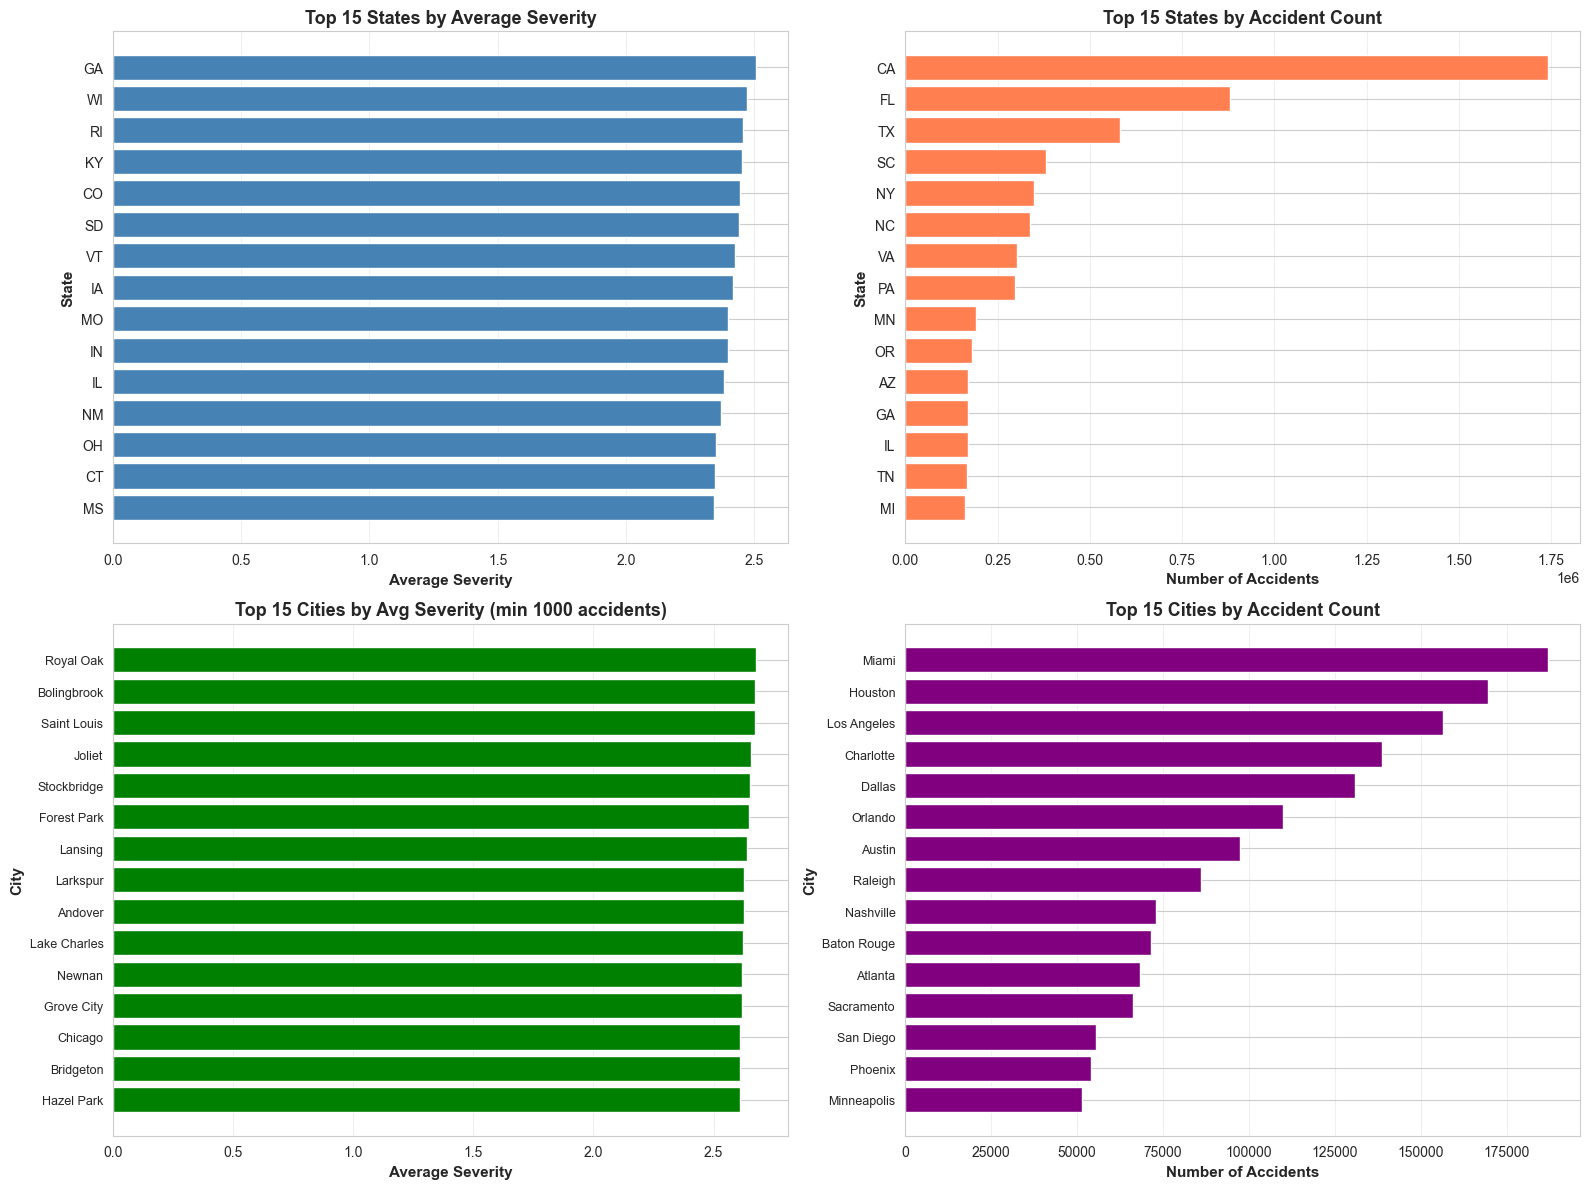


4. SEVERITY PATTERNS BY WEATHER

🌦️  Severity by Weather Condition:
--------------------------------------------------------------------------------

Top 15 Weather Conditions by Severity (min 1000 occurrences):
   1. Heavy Thunderstorms and Rain       : Avg Severity: 2.458 (2,485.0 accidents)
   2. Thunderstorms and Rain             : Avg Severity: 2.456 (2,217.0 accidents)
   3. Light Thunderstorms and Rain       : Avg Severity: 2.437 (4,931.0 accidents)
   4. Thunderstorm                       : Avg Severity: 2.410 (4,438.0 accidents)
   5. Light Freezing Rain                : Avg Severity: 2.400 (3,465.0 accidents)
   6. Light Freezing Fog                 : Avg Severity: 2.393 (1,001.0 accidents)
   7. Overcast                           : Avg Severity: 2.385 (382,866.0 accidents)
   8. Scattered Clouds                   : Avg Severity: 2.380 (204,829.0 accidents)
   9. Clear                              : Avg Severity: 2.368 (808,743.0 accidents)
  10. Light Freezing Drizzle      

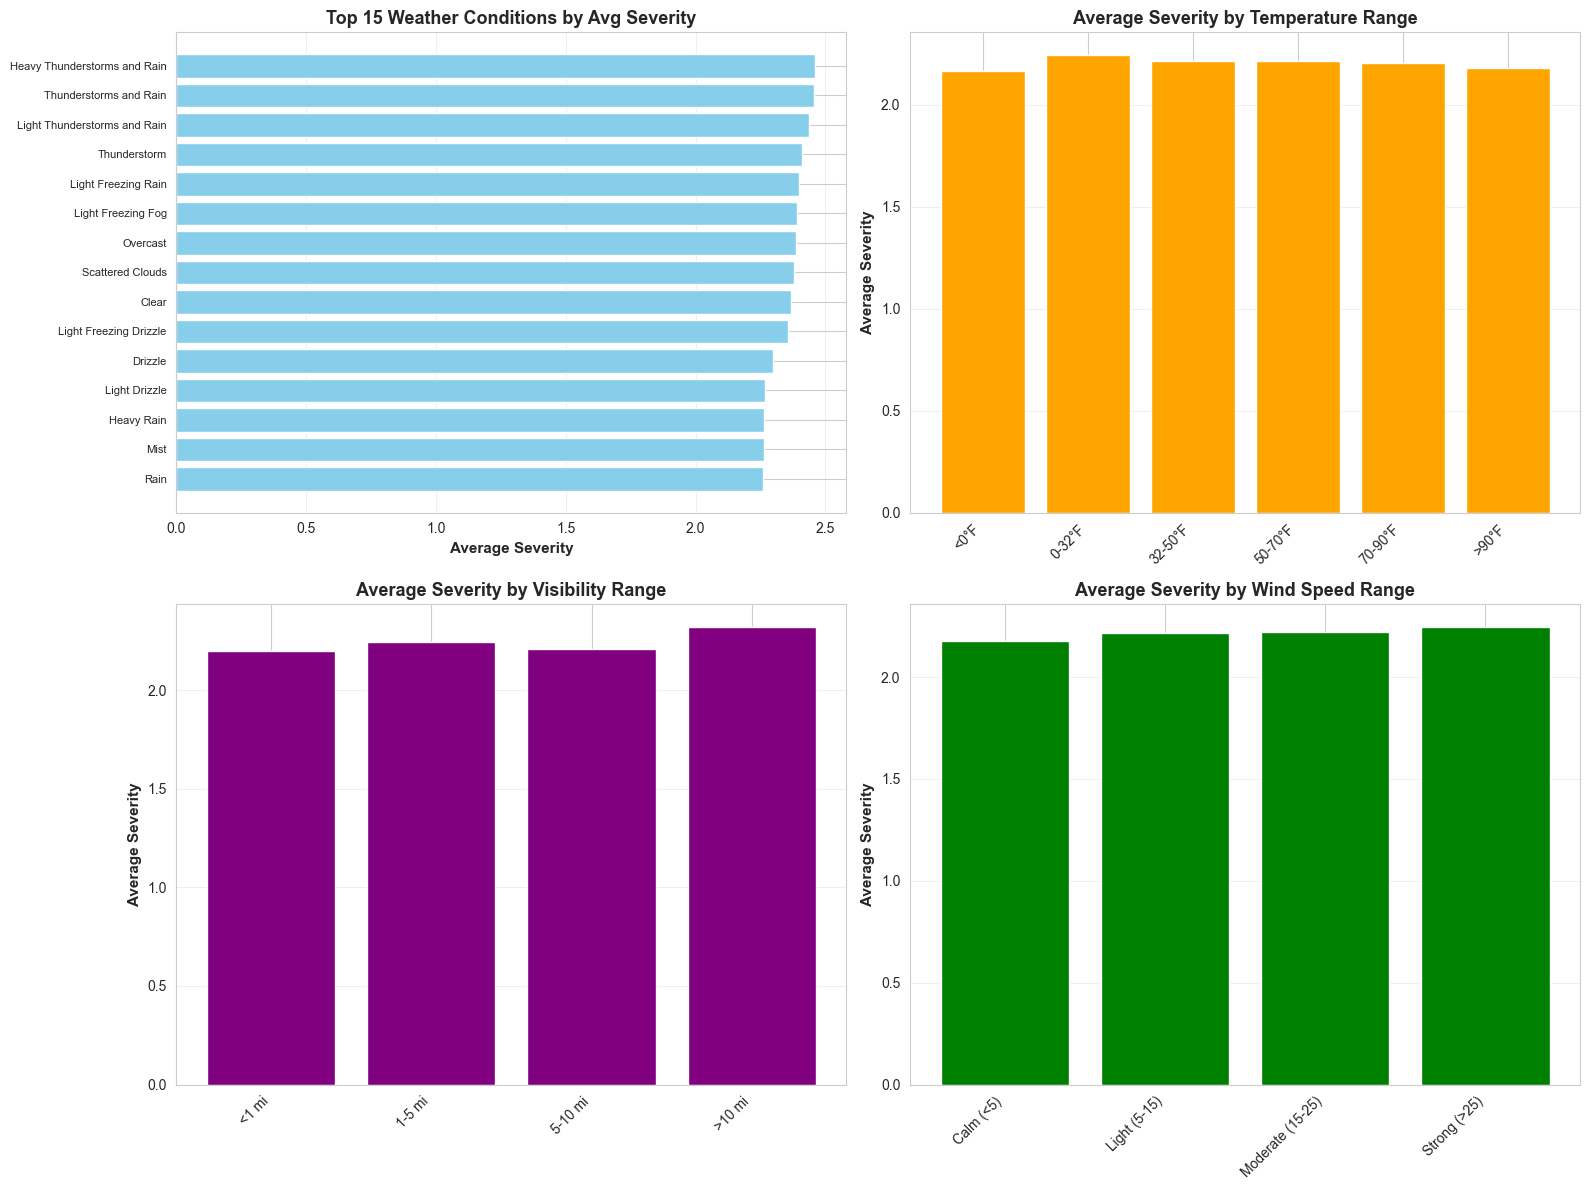


5. SEVERITY PATTERNS BY ROAD FEATURES

✓ Found 13 road features

🛣️  Severity by Road Feature Presence:
--------------------------------------------------------------------------------

Amenity:
  With Amenity             : Avg Severity: 2.070 (96,334.0 accidents)
  Without Amenity          : Avg Severity: 2.214 (7,632,060.0 accidents)
  Difference: -0.144

Bump:
  With Bump                : Avg Severity: 2.094 (3,514.0 accidents)
  Without Bump             : Avg Severity: 2.212 (7,724,880.0 accidents)
  Difference: -0.118

Crossing:
  With Crossing            : Avg Severity: 2.064 (873,763.0 accidents)
  Without Crossing         : Avg Severity: 2.231 (6,854,631.0 accidents)
  Difference: -0.167

Give_Way:
  With Give_Way            : Avg Severity: 2.179 (36,582.0 accidents)
  Without Give_Way         : Avg Severity: 2.213 (7,691,812.0 accidents)
  Difference: -0.034

Junction:
  With Junction            : Avg Severity: 2.298 (571,342.0 accidents)
  Without Junction         : Avg Seve

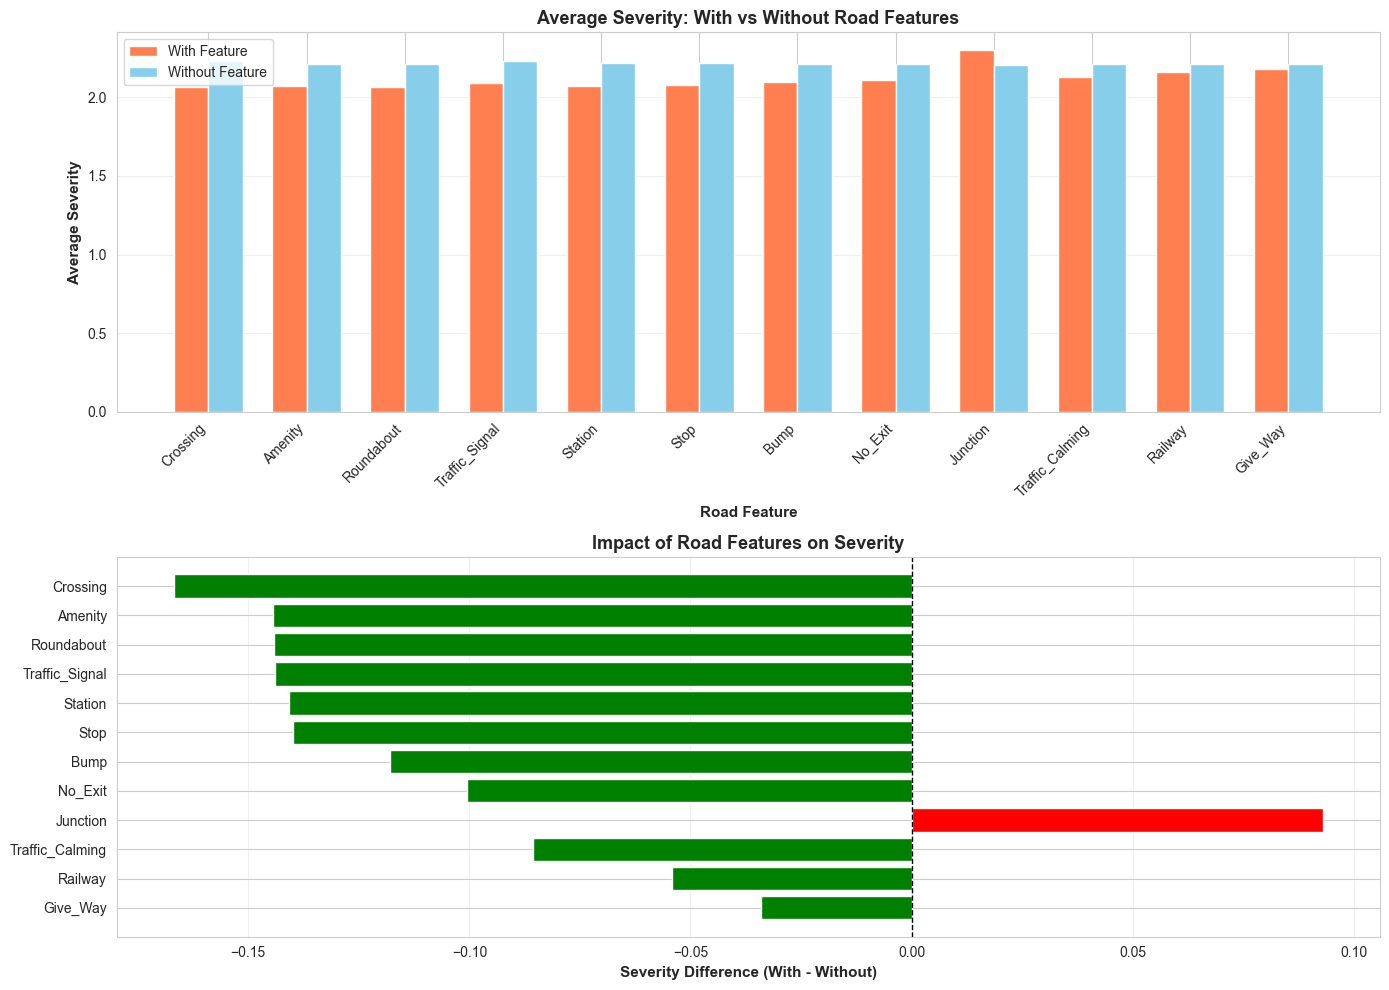


6. SEVERITY PATTERNS BY DAY/NIGHT

☀️🌙 Severity by Day/Night:
--------------------------------------------------------------------------------
  Day       : Avg Severity: 2.209 (5,334,553.0 accidents)
  Night     : Avg Severity: 2.219 (2,370,595.0 accidents)

  Night accidents are 0.010 severity points higher on average


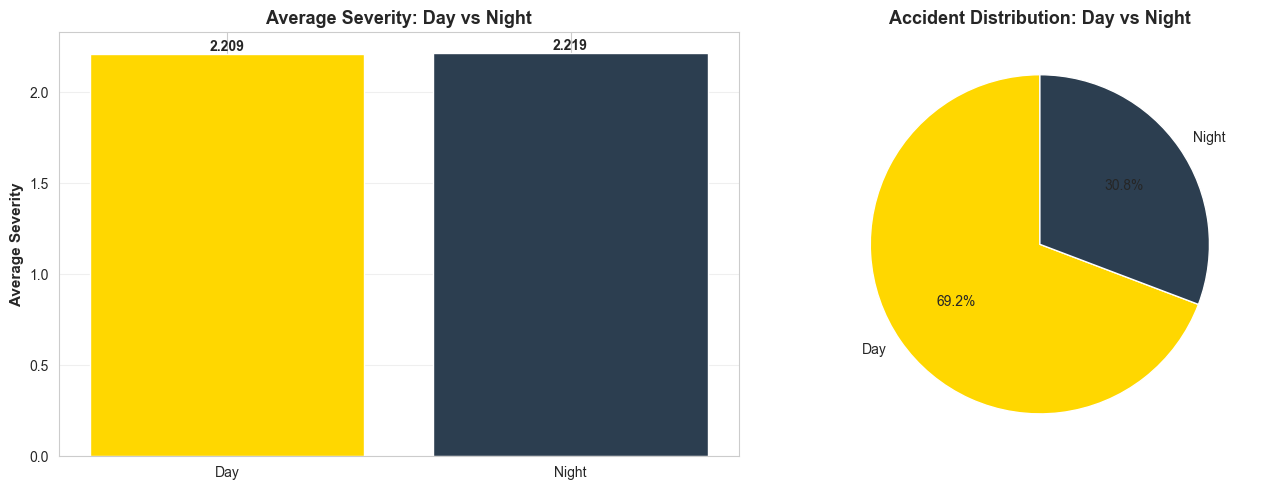


7. SEVERITY ANALYSIS SUMMARY

SEVERITY ANALYSIS SUMMARY
US Accidents Dataset - Traffic Accident Risk Predictor
Generated: 2025-11-04 18:32:39

1. OVERALL SEVERITY DISTRIBUTION
--------------------------------------------------------------------------------
   Severity 1:     67,366 ( 0.87%)
   Severity 2:  6,156,981 (79.67%)
   Severity 3:  1,299,337 (16.81%)
   Severity 4:    204,710 ( 2.65%)

   Mean Severity: 2.212
   Median Severity: 2.0
   Mode Severity: 2

2. KEY FINDINGS
--------------------------------------------------------------------------------
   • Peak severity hour: 20:00 (Avg: 2.247)
   • Highest severity state: GA (Avg: 2.507)
   • Most severe weather: Heavy Thunderstorms and Rain
   • More severe time: Night accidents


3. RECOMMENDATIONS FOR MODEL
--------------------------------------------------------------------------------
   • Include temporal features (hour, day of week, season)
   • Consider geographic clustering
   • Weather conditions are strong predictors

In [11]:
analyzer = SeverityAnalysis(dataset)
analyzer.run_complete_analysis()

## Temporal Analysis

In [12]:
"""
EDA Part 1: Temporal Analysis (Notebook Version)
US Accidents Dataset - Traffic Accident Risk Predictor
Project Partners: Diparna Adhikary and Maddy Nommer

Goal: Analyze temporal patterns in accidents to understand:
- Hour of day patterns (identify rush hours, peak times)
- Day of week patterns (weekday vs weekend)
- Monthly and seasonal trends
- Yearly trends over time
- Day/night patterns
- Time-based accident frequency

Usage in Notebook:
------------------
import pandas as pd
from eda_part1_temporal_analysis import TemporalAnalysis

df = pd.read_csv('US_Accidents.csv')
analyzer = TemporalAnalysis(df)
analyzer.run_complete_analysis()
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
sns.set_style('whitegrid')
sns.set_palette('Set2')
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 10

class TemporalAnalysis:
    """
    Comprehensive Temporal Analysis for US Accidents Dataset (Notebook Version)
    Works directly with DataFrame, displays plots inline
    """
    
    def __init__(self, df):
        """
        Initialize with DataFrame
        
        Parameters:
        -----------
        df : pandas.DataFrame
            US Accidents dataset
        """
        print("="*80)
        print("EDA PART 1: TEMPORAL ANALYSIS")
        print("US Accidents Dataset - Traffic Accident Risk Predictor")
        print("="*80)
        
        self.df = df.copy()
        print(f"\n✓ DataFrame loaded: {self.df.shape[0]:,} rows × {self.df.shape[1]} columns")
        
        # Prepare datetime columns
        self._prepare_data()
    
    def _prepare_data(self):
        """
        Prepare data: convert datetime columns and extract time features
        """
        # Convert Start_Time to datetime if needed
        if 'Start_Time' in self.df.columns:
            if self.df['Start_Time'].dtype == 'object':
                self.df['Start_Time'] = pd.to_datetime(self.df['Start_Time'], format='mixed', errors='coerce')
                print("✓ Start_Time converted to datetime")
            
            # Extract time features
            self.df['Hour'] = self.df['Start_Time'].dt.hour
            self.df['DayOfWeek'] = self.df['Start_Time'].dt.dayofweek
            self.df['DayName'] = self.df['Start_Time'].dt.day_name()
            self.df['Month'] = self.df['Start_Time'].dt.month
            self.df['MonthName'] = self.df['Start_Time'].dt.month_name()
            self.df['Year'] = self.df['Start_Time'].dt.year
            self.df['Date'] = self.df['Start_Time'].dt.date
            self.df['Quarter'] = self.df['Start_Time'].dt.quarter
            
            # Create is_weekend flag
            self.df['Is_Weekend'] = self.df['DayOfWeek'].isin([5, 6])
            
            print("✓ Time features extracted (Hour, DayOfWeek, Month, Year, etc.)")
        
        # Convert End_Time if available
        if 'End_Time' in self.df.columns and self.df['End_Time'].dtype == 'object':
            self.df['End_Time'] = pd.to_datetime(self.df['End_Time'], format='mixed', errors='coerce')
            # Calculate duration
            self.df['Duration_Minutes'] = (self.df['End_Time'] - self.df['Start_Time']).dt.total_seconds() / 60
            print("✓ End_Time converted and Duration calculated")
    
    def hourly_patterns(self):
        """
        Analyze accident patterns by hour of day
        """
        print("\n" + "="*80)
        print("1. HOURLY ACCIDENT PATTERNS")
        print("="*80)
        
        if 'Hour' not in self.df.columns:
            print("✗ Hour column not available!")
            return
        
        # Hourly distribution
        hourly_counts = self.df['Hour'].value_counts().sort_index()
        hourly_percent = (hourly_counts / len(self.df) * 100).round(2)
        
        print("\n⏰ Accidents by Hour of Day:")
        print("-"*80)
        print(f"{'Hour':>6} | {'Count':>12} | {'Percentage':>10} | Distribution")
        print("-"*80)
        for hour in range(24):
            count = hourly_counts.get(hour, 0)
            pct = hourly_percent.get(hour, 0)
            bar = "█" * int(pct / 2)  # Scale for display
            print(f"{hour:02d}:00 | {count:>12,} | {pct:>9.2f}% | {bar}")
        
        # Peak hours
        top_5_hours = hourly_counts.nlargest(5)
        print("\n🔥 Top 5 Peak Hours:")
        for i, (hour, count) in enumerate(top_5_hours.items(), 1):
            print(f"  {i}. {hour:02d}:00 - {count:,} accidents ({hourly_percent[hour]:.2f}%)")
        
        # Identify rush hours (typically 7-9 AM and 4-7 PM)
        morning_rush = hourly_counts[7:10].sum()
        evening_rush = hourly_counts[16:20].sum()
        other_times = hourly_counts.sum() - morning_rush - evening_rush
        
        print("\n🚗 Rush Hour Analysis:")
        print(f"  Morning Rush (7-9 AM): {morning_rush:,} accidents ({morning_rush/len(self.df)*100:.2f}%)")
        print(f"  Evening Rush (4-7 PM): {evening_rush:,} accidents ({evening_rush/len(self.df)*100:.2f}%)")
        print(f"  Other Times: {other_times:,} accidents ({other_times/len(self.df)*100:.2f}%)")
        
        # Visualization
        fig, axes = plt.subplots(2, 2, figsize=(16, 10))
        
        # Line plot
        axes[0, 0].plot(hourly_counts.index, hourly_counts.values, marker='o', 
                       linewidth=2.5, markersize=8, color='#3498db')
        axes[0, 0].fill_between(hourly_counts.index, hourly_counts.values, alpha=0.3, color='#3498db')
        axes[0, 0].set_xlabel('Hour of Day', fontsize=12, fontweight='bold')
        axes[0, 0].set_ylabel('Number of Accidents', fontsize=12, fontweight='bold')
        axes[0, 0].set_title('Accidents by Hour of Day', fontsize=14, fontweight='bold')
        axes[0, 0].set_xticks(range(0, 24, 2))
        axes[0, 0].grid(True, alpha=0.3)
        axes[0, 0].axvspan(7, 9, alpha=0.2, color='yellow', label='Morning Rush')
        axes[0, 0].axvspan(16, 19, alpha=0.2, color='orange', label='Evening Rush')
        axes[0, 0].legend()
        
        # Bar plot
        colors = ['#e74c3c' if h in [7, 8, 16, 17, 18] else '#95a5a6' for h in hourly_counts.index]
        axes[0, 1].bar(hourly_counts.index, hourly_counts.values, color=colors)
        axes[0, 1].set_xlabel('Hour of Day', fontsize=12, fontweight='bold')
        axes[0, 1].set_ylabel('Number of Accidents', fontsize=12, fontweight='bold')
        axes[0, 1].set_title('Accident Distribution by Hour (Rush Hours Highlighted)', 
                            fontsize=14, fontweight='bold')
        axes[0, 1].set_xticks(range(0, 24, 2))
        axes[0, 1].grid(True, alpha=0.3, axis='y')
        
        # Percentage plot
        axes[1, 0].bar(hourly_percent.index, hourly_percent.values, color='#2ecc71')
        axes[1, 0].set_xlabel('Hour of Day', fontsize=12, fontweight='bold')
        axes[1, 0].set_ylabel('Percentage of Total Accidents (%)', fontsize=12, fontweight='bold')
        axes[1, 0].set_title('Percentage Distribution by Hour', fontsize=14, fontweight='bold')
        axes[1, 0].set_xticks(range(0, 24, 2))
        axes[1, 0].grid(True, alpha=0.3, axis='y')
        
        # Polar plot
        theta = np.linspace(0, 2 * np.pi, 24, endpoint=False)
        radii = hourly_counts.values
        width = 2 * np.pi / 24
        
        ax = plt.subplot(2, 2, 4, projection='polar')
        bars = ax.bar(theta, radii, width=width, bottom=0.0, alpha=0.8)
        
        # Color by rush hour
        for i, bar in enumerate(bars):
            if i in [7, 8, 16, 17, 18]:
                bar.set_facecolor('#e74c3c')
            else:
                bar.set_facecolor('#3498db')
        
        ax.set_theta_zero_location('N')
        ax.set_theta_direction(-1)
        ax.set_xticks(theta)
        ax.set_xticklabels([f'{h:02d}' for h in range(24)])
        ax.set_title('24-Hour Accident Distribution (Clock View)', 
                    fontsize=14, fontweight='bold', pad=20)
        
        plt.tight_layout()
        plt.show()
    
    def daily_patterns(self):
        """
        Analyze accident patterns by day of week
        """
        print("\n" + "="*80)
        print("2. DAILY ACCIDENT PATTERNS (DAY OF WEEK)")
        print("="*80)
        
        if 'DayName' not in self.df.columns:
            print("✗ DayName column not available!")
            return
        
        # Day of week distribution
        day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
        daily_counts = self.df['DayName'].value_counts().reindex(day_order)
        daily_percent = (daily_counts / len(self.df) * 100).round(2)
        
        print("\n📅 Accidents by Day of Week:")
        print("-"*80)
        print(f"{'Day':>12} | {'Count':>12} | {'Percentage':>10} | Distribution")
        print("-"*80)
        for day in day_order:
            count = daily_counts.get(day, 0)
            pct = daily_percent.get(day, 0)
            bar = "█" * int(pct / 1.5)
            print(f"{day:>12} | {count:>12,} | {pct:>9.2f}% | {bar}")
        
        # Weekday vs Weekend
        weekday_count = daily_counts[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']].sum()
        weekend_count = daily_counts[['Saturday', 'Sunday']].sum()
        
        print("\n📊 Weekday vs Weekend:")
        print(f"  Weekdays (Mon-Fri): {weekday_count:,} accidents ({weekday_count/len(self.df)*100:.2f}%)")
        print(f"  Weekend (Sat-Sun): {weekend_count:,} accidents ({weekend_count/len(self.df)*100:.2f}%)")
        print(f"  Average per weekday: {weekday_count/5:,.0f} accidents")
        print(f"  Average per weekend day: {weekend_count/2:,.0f} accidents")
        
        # Visualization
        fig, axes = plt.subplots(2, 2, figsize=(16, 10))
        
        # Bar plot
        colors = ['#3498db']*5 + ['#e74c3c']*2  # Blue for weekdays, red for weekend
        axes[0, 0].bar(range(7), daily_counts.values, color=colors)
        axes[0, 0].set_xlabel('Day of Week', fontsize=12, fontweight='bold')
        axes[0, 0].set_ylabel('Number of Accidents', fontsize=12, fontweight='bold')
        axes[0, 0].set_title('Accidents by Day of Week', fontsize=14, fontweight='bold')
        axes[0, 0].set_xticks(range(7))
        axes[0, 0].set_xticklabels(day_order, rotation=45, ha='right')
        axes[0, 0].grid(True, alpha=0.3, axis='y')
        
        # Add value labels
        for i, (day, count) in enumerate(zip(day_order, daily_counts.values)):
            axes[0, 0].text(i, count, f'{count:,}', ha='center', va='bottom', fontweight='bold')
        
        # Percentage plot
        axes[0, 1].bar(range(7), daily_percent.values, color=colors)
        axes[0, 1].set_xlabel('Day of Week', fontsize=12, fontweight='bold')
        axes[0, 1].set_ylabel('Percentage of Total Accidents (%)', fontsize=12, fontweight='bold')
        axes[0, 1].set_title('Percentage Distribution by Day of Week', fontsize=14, fontweight='bold')
        axes[0, 1].set_xticks(range(7))
        axes[0, 1].set_xticklabels(day_order, rotation=45, ha='right')
        axes[0, 1].grid(True, alpha=0.3, axis='y')
        
        # Weekday vs Weekend pie chart
        axes[1, 0].pie([weekday_count, weekend_count], 
                      labels=['Weekday', 'Weekend'],
                      autopct='%1.1f%%',
                      colors=['#3498db', '#e74c3c'],
                      startangle=90,
                      textprops={'fontsize': 12, 'fontweight': 'bold'})
        axes[1, 0].set_title('Weekday vs Weekend Distribution', fontsize=14, fontweight='bold')
        
        # Heatmap: Hour vs Day of Week
        if 'Hour' in self.df.columns:
            pivot_data = self.df.pivot_table(values='Severity' if 'Severity' in self.df.columns else 'Hour',
                                            index='Hour', 
                                            columns='DayOfWeek',
                                            aggfunc='count',
                                            fill_value=0)
            pivot_data.columns = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
            
            sns.heatmap(pivot_data, annot=False, fmt='d', cmap='YlOrRd', 
                       cbar_kws={'label': 'Number of Accidents'}, ax=axes[1, 1])
            axes[1, 1].set_xlabel('Day of Week', fontsize=12, fontweight='bold')
            axes[1, 1].set_ylabel('Hour of Day', fontsize=12, fontweight='bold')
            axes[1, 1].set_title('Accident Heatmap: Hour vs Day of Week', fontsize=14, fontweight='bold')
        
        plt.tight_layout()
        plt.show()
    
    def monthly_patterns(self):
        """
        Analyze accident patterns by month
        """
        print("\n" + "="*80)
        print("3. MONTHLY ACCIDENT PATTERNS")
        print("="*80)
        
        if 'Month' not in self.df.columns:
            print("✗ Month column not available!")
            return
        
        # Monthly distribution
        monthly_counts = self.df['Month'].value_counts().sort_index()
        monthly_percent = (monthly_counts / len(self.df) * 100).round(2)
        
        month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                      'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
        
        print("\n📆 Accidents by Month:")
        print("-"*80)
        print(f"{'Month':>6} | {'Count':>12} | {'Percentage':>10} | Distribution")
        print("-"*80)
        for month in range(1, 13):
            count = monthly_counts.get(month, 0)
            pct = monthly_percent.get(month, 0)
            bar = "█" * int(pct / 1.5)
            print(f"{month_names[month-1]:>6} | {count:>12,} | {pct:>9.2f}% | {bar}")
        
        # Seasonal analysis
        seasons = {
            'Winter': [12, 1, 2],
            'Spring': [3, 4, 5],
            'Summer': [6, 7, 8],
            'Fall': [9, 10, 11]
        }
        
        print("\n🌍 Seasonal Distribution:")
        print("-"*80)
        seasonal_counts = {}
        for season, months in seasons.items():
            season_count = self.df[self.df['Month'].isin(months)].shape[0]
            seasonal_counts[season] = season_count
            pct = (season_count / len(self.df)) * 100
            print(f"  {season:8s}: {season_count:>12,} accidents ({pct:>5.2f}%)")
        
        # Peak and low months
        peak_month = monthly_counts.idxmax()
        low_month = monthly_counts.idxmin()
        print(f"\n📈 Peak Month: {month_names[peak_month-1]} with {monthly_counts[peak_month]:,} accidents")
        print(f"📉 Low Month: {month_names[low_month-1]} with {monthly_counts[low_month]:,} accidents")
        
        # Visualization
        fig, axes = plt.subplots(2, 2, figsize=(16, 10))
        
        # Bar plot
        axes[0, 0].bar(range(1, 13), monthly_counts.values, color='#9b59b6')
        axes[0, 0].set_xlabel('Month', fontsize=12, fontweight='bold')
        axes[0, 0].set_ylabel('Number of Accidents', fontsize=12, fontweight='bold')
        axes[0, 0].set_title('Accidents by Month', fontsize=14, fontweight='bold')
        axes[0, 0].set_xticks(range(1, 13))
        axes[0, 0].set_xticklabels(month_names, rotation=45, ha='right')
        axes[0, 0].grid(True, alpha=0.3, axis='y')
        
        # Line plot
        axes[0, 1].plot(range(1, 13), monthly_counts.values, marker='o', 
                       linewidth=2.5, markersize=8, color='#e74c3c')
        axes[0, 1].fill_between(range(1, 13), monthly_counts.values, alpha=0.3, color='#e74c3c')
        axes[0, 1].set_xlabel('Month', fontsize=12, fontweight='bold')
        axes[0, 1].set_ylabel('Number of Accidents', fontsize=12, fontweight='bold')
        axes[0, 1].set_title('Monthly Accident Trend', fontsize=14, fontweight='bold')
        axes[0, 1].set_xticks(range(1, 13))
        axes[0, 1].set_xticklabels(month_names, rotation=45, ha='right')
        axes[0, 1].grid(True, alpha=0.3)
        
        # Seasonal pie chart
        season_colors = ['#3498db', '#2ecc71', '#f39c12', '#e67e22']
        axes[1, 0].pie(seasonal_counts.values(), 
                      labels=seasonal_counts.keys(),
                      autopct='%1.1f%%',
                      colors=season_colors,
                      startangle=90,
                      textprops={'fontsize': 11, 'fontweight': 'bold'})
        axes[1, 0].set_title('Seasonal Distribution of Accidents', fontsize=14, fontweight='bold')
        
        # Quarterly analysis
        if 'Quarter' in self.df.columns:
            quarterly_counts = self.df['Quarter'].value_counts().sort_index()
            axes[1, 1].bar(quarterly_counts.index, quarterly_counts.values, 
                          color=['#3498db', '#2ecc71', '#f39c12', '#e74c3c'])
            axes[1, 1].set_xlabel('Quarter', fontsize=12, fontweight='bold')
            axes[1, 1].set_ylabel('Number of Accidents', fontsize=12, fontweight='bold')
            axes[1, 1].set_title('Accidents by Quarter', fontsize=14, fontweight='bold')
            axes[1, 1].set_xticks([1, 2, 3, 4])
            axes[1, 1].set_xticklabels(['Q1', 'Q2', 'Q3', 'Q4'])
            axes[1, 1].grid(True, alpha=0.3, axis='y')
            
            # Add value labels
            for i, (q, count) in enumerate(quarterly_counts.items()):
                axes[1, 1].text(q, count, f'{count:,}', ha='center', va='bottom', fontweight='bold')
        
        plt.tight_layout()
        plt.show()
    
    def yearly_trends(self):
        """
        Analyze accident trends over years
        """
        print("\n" + "="*80)
        print("4. YEARLY ACCIDENT TRENDS")
        print("="*80)
        
        if 'Year' not in self.df.columns:
            print("✗ Year column not available!")
            return
        
        # Yearly distribution
        yearly_counts = self.df['Year'].value_counts().sort_index()
        
        print("\n📈 Accidents by Year:")
        print("-"*80)
        print(f"{'Year':>6} | {'Count':>12} | {'Change':>12}")
        print("-"*80)
        
        prev_count = None
        for year, count in yearly_counts.items():
            if prev_count is not None:
                change = count - prev_count
                change_pct = (change / prev_count) * 100
                change_str = f"{change:+,} ({change_pct:+.1f}%)"
            else:
                change_str = "N/A"
            print(f"{year:>6} | {count:>12,} | {change_str:>12}")
            prev_count = count
        
        # Growth analysis
        first_year = yearly_counts.index[0]
        last_year = yearly_counts.index[-1]
        total_growth = yearly_counts[last_year] - yearly_counts[first_year]
        growth_rate = (total_growth / yearly_counts[first_year]) * 100
        
        print(f"\n📊 Overall Trend ({first_year}-{last_year}):")
        print(f"  Starting count ({first_year}): {yearly_counts[first_year]:,}")
        print(f"  Ending count ({last_year}): {yearly_counts[last_year]:,}")
        print(f"  Total change: {total_growth:+,} accidents ({growth_rate:+.1f}%)")
        print(f"  Average per year: {yearly_counts.mean():,.0f} accidents")
        
        # Visualization
        fig, axes = plt.subplots(2, 2, figsize=(16, 10))
        
        # Line plot
        axes[0, 0].plot(yearly_counts.index, yearly_counts.values, marker='o', 
                       linewidth=3, markersize=10, color='#2c3e50')
        axes[0, 0].fill_between(yearly_counts.index, yearly_counts.values, alpha=0.3, color='#2c3e50')
        axes[0, 0].set_xlabel('Year', fontsize=12, fontweight='bold')
        axes[0, 0].set_ylabel('Number of Accidents', fontsize=12, fontweight='bold')
        axes[0, 0].set_title('Yearly Accident Trend', fontsize=14, fontweight='bold')
        axes[0, 0].grid(True, alpha=0.3)
        
        # Add value labels
        for year, count in yearly_counts.items():
            axes[0, 0].text(year, count, f'{count:,}', ha='center', va='bottom', fontsize=9)
        
        # Bar plot
        colors = ['#2ecc71' if i == 0 else '#e74c3c' if yearly_counts.values[i] < yearly_counts.values[i-1] 
                 else '#3498db' for i in range(len(yearly_counts))]
        axes[0, 1].bar(yearly_counts.index, yearly_counts.values, color=colors)
        axes[0, 1].set_xlabel('Year', fontsize=12, fontweight='bold')
        axes[0, 1].set_ylabel('Number of Accidents', fontsize=12, fontweight='bold')
        axes[0, 1].set_title('Accidents by Year (Color: Green=Start, Blue=Increase, Red=Decrease)', 
                            fontsize=14, fontweight='bold')
        axes[0, 1].grid(True, alpha=0.3, axis='y')
        
        # Year-over-year change
        yoy_change = yearly_counts.diff()
        axes[1, 0].bar(yoy_change.index[1:], yoy_change.values[1:], 
                      color=['#2ecc71' if x > 0 else '#e74c3c' for x in yoy_change.values[1:]])
        axes[1, 0].axhline(y=0, color='black', linestyle='-', linewidth=1)
        axes[1, 0].set_xlabel('Year', fontsize=12, fontweight='bold')
        axes[1, 0].set_ylabel('Year-over-Year Change', fontsize=12, fontweight='bold')
        axes[1, 0].set_title('Year-over-Year Change in Accidents', fontsize=14, fontweight='bold')
        axes[1, 0].grid(True, alpha=0.3, axis='y')
        
        # Cumulative plot
        cumulative = yearly_counts.cumsum()
        axes[1, 1].plot(cumulative.index, cumulative.values, marker='s', 
                       linewidth=3, markersize=8, color='#9b59b6')
        axes[1, 1].fill_between(cumulative.index, cumulative.values, alpha=0.3, color='#9b59b6')
        axes[1, 1].set_xlabel('Year', fontsize=12, fontweight='bold')
        axes[1, 1].set_ylabel('Cumulative Number of Accidents', fontsize=12, fontweight='bold')
        axes[1, 1].set_title('Cumulative Accidents Over Time', fontsize=14, fontweight='bold')
        axes[1, 1].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
    
    def day_night_patterns(self):
        """
        Analyze day vs night patterns
        """
        print("\n" + "="*80)
        print("5. DAY VS NIGHT PATTERNS")
        print("="*80)
        
        if 'Sunrise_Sunset' not in self.df.columns:
            print("✗ Sunrise_Sunset column not available!")
            return
        
        # Day vs Night distribution
        day_night_counts = self.df['Sunrise_Sunset'].value_counts()
        day_night_percent = (day_night_counts / len(self.df) * 100).round(2)
        
        print("\n☀️🌙 Accidents by Time of Day:")
        print("-"*80)
        for period in ['Day', 'Night']:
            if period in day_night_counts.index:
                count = day_night_counts[period]
                pct = day_night_percent[period]
                bar = "█" * int(pct / 2)
                print(f"  {period:8s}: {count:>12,} ({pct:>5.2f}%) {bar}")
        
        # Hourly breakdown by day/night
        if 'Hour' in self.df.columns:
            print("\n⏰ Average Accidents per Hour:")
            print("-"*80)
            day_df = self.df[self.df['Sunrise_Sunset'] == 'Day']
            night_df = self.df[self.df['Sunrise_Sunset'] == 'Night']
            
            if len(day_df) > 0:
                day_hours = len(day_df['Hour'].unique())
                avg_per_hour_day = len(day_df) / day_hours if day_hours > 0 else 0
                print(f"  Day: {avg_per_hour_day:,.0f} accidents per hour on average")
            
            if len(night_df) > 0:
                night_hours = len(night_df['Hour'].unique())
                avg_per_hour_night = len(night_df) / night_hours if night_hours > 0 else 0
                print(f"  Night: {avg_per_hour_night:,.0f} accidents per hour on average")
        
        # Visualization
        fig, axes = plt.subplots(2, 2, figsize=(16, 10))
        
        # Bar chart
        colors = ['#FFD700', '#2C3E50']  # Gold for Day, Dark for Night
        axes[0, 0].bar(range(len(day_night_counts)), day_night_counts.values, 
                      color=colors[:len(day_night_counts)])
        axes[0, 0].set_xticks(range(len(day_night_counts)))
        axes[0, 0].set_xticklabels(day_night_counts.index)
        axes[0, 0].set_ylabel('Number of Accidents', fontsize=12, fontweight='bold')
        axes[0, 0].set_title('Accidents: Day vs Night', fontsize=14, fontweight='bold')
        axes[0, 0].grid(True, alpha=0.3, axis='y')
        
        # Add value labels
        for i, (period, count) in enumerate(day_night_counts.items()):
            axes[0, 0].text(i, count, f'{count:,}\n({day_night_percent[period]:.1f}%)', 
                          ha='center', va='bottom', fontweight='bold')
        
        # Pie chart
        axes[0, 1].pie(day_night_counts.values, labels=day_night_counts.index, 
                      autopct='%1.1f%%', colors=colors[:len(day_night_counts)], 
                      startangle=90, textprops={'fontsize': 12, 'fontweight': 'bold'})
        axes[0, 1].set_title('Day vs Night Distribution', fontsize=14, fontweight='bold')
        
        # Hourly comparison
        if 'Hour' in self.df.columns:
            day_hourly = self.df[self.df['Sunrise_Sunset'] == 'Day']['Hour'].value_counts().sort_index()
            night_hourly = self.df[self.df['Sunrise_Sunset'] == 'Night']['Hour'].value_counts().sort_index()
            
            axes[1, 0].plot(day_hourly.index, day_hourly.values, marker='o', 
                          linewidth=2, label='Day', color='#FFD700')
            axes[1, 0].plot(night_hourly.index, night_hourly.values, marker='s', 
                          linewidth=2, label='Night', color='#2C3E50')
            axes[1, 0].set_xlabel('Hour of Day', fontsize=12, fontweight='bold')
            axes[1, 0].set_ylabel('Number of Accidents', fontsize=12, fontweight='bold')
            axes[1, 0].set_title('Hourly Distribution: Day vs Night', fontsize=14, fontweight='bold')
            axes[1, 0].legend()
            axes[1, 0].grid(True, alpha=0.3)
            axes[1, 0].set_xticks(range(0, 24, 2))
        
        # Day of week comparison
        if 'DayName' in self.df.columns:
            day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
            day_weekly = self.df[self.df['Sunrise_Sunset'] == 'Day']['DayName'].value_counts().reindex(day_order)
            night_weekly = self.df[self.df['Sunrise_Sunset'] == 'Night']['DayName'].value_counts().reindex(day_order)
            
            x = np.arange(len(day_order))
            width = 0.35
            
            axes[1, 1].bar(x - width/2, day_weekly.values, width, label='Day', color='#FFD700')
            axes[1, 1].bar(x + width/2, night_weekly.values, width, label='Night', color='#2C3E50')
            axes[1, 1].set_xlabel('Day of Week', fontsize=12, fontweight='bold')
            axes[1, 1].set_ylabel('Number of Accidents', fontsize=12, fontweight='bold')
            axes[1, 1].set_title('Day vs Night by Day of Week', fontsize=14, fontweight='bold')
            axes[1, 1].set_xticks(x)
            axes[1, 1].set_xticklabels(day_order, rotation=45, ha='right')
            axes[1, 1].legend()
            axes[1, 1].grid(True, alpha=0.3, axis='y')
        
        plt.tight_layout()
        plt.show()
    
    def time_series_analysis(self):
        """
        Time series analysis of daily accident counts
        """
        print("\n" + "="*80)
        print("6. TIME SERIES ANALYSIS")
        print("="*80)
        
        if 'Date' not in self.df.columns:
            print("✗ Date column not available!")
            return
        
        # Daily time series
        daily_series = self.df.groupby('Date').size()
        
        print(f"\n📅 Time Series Statistics:")
        print("-"*80)
        print(f"  Date Range: {daily_series.index.min()} to {daily_series.index.max()}")
        print(f"  Total Days: {len(daily_series):,}")
        print(f"  Average accidents per day: {daily_series.mean():,.1f}")
        print(f"  Std Dev: {daily_series.std():,.1f}")
        print(f"  Min accidents in a day: {daily_series.min():,}")
        print(f"  Max accidents in a day: {daily_series.max():,}")
        
        # Peak days
        print(f"\n🔥 Top 10 Days with Most Accidents:")
        top_days = daily_series.nlargest(10)
        for i, (date, count) in enumerate(top_days.items(), 1):
            day_name = pd.to_datetime(date).strftime('%A')
            print(f"  {i:2d}. {date} ({day_name}): {count:,} accidents")
        
        # Monthly aggregation
        monthly_series = self.df.groupby(self.df['Start_Time'].dt.to_period('M')).size()
        
        # Visualization
        fig, axes = plt.subplots(3, 1, figsize=(16, 12))
        
        # Daily time series (if not too many points)
        if len(daily_series) <= 3000:
            axes[0].plot(daily_series.index, daily_series.values, linewidth=1, color='#3498db', alpha=0.7)
            axes[0].set_xlabel('Date', fontsize=12, fontweight='bold')
            axes[0].set_ylabel('Number of Accidents', fontsize=12, fontweight='bold')
            axes[0].set_title('Daily Accident Count Over Time', fontsize=14, fontweight='bold')
            axes[0].grid(True, alpha=0.3)
            
            # Add moving average
            if len(daily_series) > 30:
                ma_30 = daily_series.rolling(window=30).mean()
                axes[0].plot(ma_30.index, ma_30.values, linewidth=2, color='red', 
                           label='30-day Moving Average')
                axes[0].legend()
        else:
            # Sample data if too many points
            sample_series = daily_series.iloc[::7]  # Weekly sampling
            axes[0].plot(sample_series.index, sample_series.values, linewidth=1, 
                       color='#3498db', marker='o', markersize=3)
            axes[0].set_xlabel('Date', fontsize=12, fontweight='bold')
            axes[0].set_ylabel('Number of Accidents', fontsize=12, fontweight='bold')
            axes[0].set_title('Weekly Sampled Accident Count Over Time', fontsize=14, fontweight='bold')
            axes[0].grid(True, alpha=0.3)
        
        # Monthly time series
        axes[1].bar(range(len(monthly_series)), monthly_series.values, color='#2ecc71')
        axes[1].set_xlabel('Month', fontsize=12, fontweight='bold')
        axes[1].set_ylabel('Number of Accidents', fontsize=12, fontweight='bold')
        axes[1].set_title('Monthly Accident Count', fontsize=14, fontweight='bold')
        axes[1].grid(True, alpha=0.3, axis='y')
        
        # Set x-ticks to show some month labels
        tick_positions = range(0, len(monthly_series), max(1, len(monthly_series) // 20))
        axes[1].set_xticks(tick_positions)
        axes[1].set_xticklabels([str(monthly_series.index[i]) for i in tick_positions], 
                               rotation=45, ha='right')
        
        # Distribution of daily counts
        axes[2].hist(daily_series.values, bins=50, color='#9b59b6', edgecolor='black', alpha=0.7)
        axes[2].axvline(daily_series.mean(), color='red', linestyle='--', linewidth=2, 
                       label=f'Mean: {daily_series.mean():.1f}')
        axes[2].axvline(daily_series.median(), color='green', linestyle='--', linewidth=2, 
                       label=f'Median: {daily_series.median():.1f}')
        axes[2].set_xlabel('Number of Accidents per Day', fontsize=12, fontweight='bold')
        axes[2].set_ylabel('Frequency (Number of Days)', fontsize=12, fontweight='bold')
        axes[2].set_title('Distribution of Daily Accident Counts', fontsize=14, fontweight='bold')
        axes[2].legend()
        axes[2].grid(True, alpha=0.3, axis='y')
        
        plt.tight_layout()
        plt.show()
    
    def generate_temporal_summary(self):
        """
        Generate comprehensive temporal analysis summary
        """
        print("\n" + "="*80)
        print("7. TEMPORAL ANALYSIS SUMMARY")
        print("="*80)
        
        summary = f"""
{'='*80}
TEMPORAL ANALYSIS SUMMARY
US Accidents Dataset - Traffic Accident Risk Predictor
Generated: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}
{'='*80}

1. HOURLY PATTERNS
{'-'*80}
"""
        
        if 'Hour' in self.df.columns:
            hourly_counts = self.df['Hour'].value_counts().sort_index()
            peak_hour = hourly_counts.idxmax()
            low_hour = hourly_counts.idxmin()
            
            summary += f"   Peak Hour: {peak_hour:02d}:00 ({hourly_counts[peak_hour]:,} accidents)\n"
            summary += f"   Low Hour: {low_hour:02d}:00 ({hourly_counts[low_hour]:,} accidents)\n"
            
            morning_rush = hourly_counts[7:10].sum()
            evening_rush = hourly_counts[16:20].sum()
            summary += f"   Morning Rush (7-9 AM): {morning_rush:,} accidents\n"
            summary += f"   Evening Rush (4-7 PM): {evening_rush:,} accidents\n"
        
        summary += f"""

2. DAILY PATTERNS
{'-'*80}
"""
        
        if 'DayName' in self.df.columns:
            day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
            daily_counts = self.df['DayName'].value_counts().reindex(day_order)
            peak_day = daily_counts.idxmax()
            low_day = daily_counts.idxmin()
            
            summary += f"   Peak Day: {peak_day} ({daily_counts[peak_day]:,} accidents)\n"
            summary += f"   Low Day: {low_day} ({daily_counts[low_day]:,} accidents)\n"
            
            weekday_count = daily_counts[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']].sum()
            weekend_count = daily_counts[['Saturday', 'Sunday']].sum()
            summary += f"   Weekday Total: {weekday_count:,} ({weekday_count/len(self.df)*100:.1f}%)\n"
            summary += f"   Weekend Total: {weekend_count:,} ({weekend_count/len(self.df)*100:.1f}%)\n"
        
        summary += f"""

3. MONTHLY & SEASONAL PATTERNS
{'-'*80}
"""
        
        if 'Month' in self.df.columns:
            monthly_counts = self.df['Month'].value_counts().sort_index()
            month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
            peak_month = monthly_counts.idxmax()
            low_month = monthly_counts.idxmin()
            
            summary += f"   Peak Month: {month_names[peak_month-1]} ({monthly_counts[peak_month]:,} accidents)\n"
            summary += f"   Low Month: {month_names[low_month-1]} ({monthly_counts[low_month]:,} accidents)\n"
        
        summary += f"""

4. YEARLY TRENDS
{'-'*80}
"""
        
        if 'Year' in self.df.columns:
            yearly_counts = self.df['Year'].value_counts().sort_index()
            first_year = yearly_counts.index[0]
            last_year = yearly_counts.index[-1]
            
            summary += f"   Data Range: {first_year} - {last_year}\n"
            summary += f"   Starting Count ({first_year}): {yearly_counts[first_year]:,}\n"
            summary += f"   Ending Count ({last_year}): {yearly_counts[last_year]:,}\n"
            
            total_change = yearly_counts[last_year] - yearly_counts[first_year]
            growth_rate = (total_change / yearly_counts[first_year]) * 100
            summary += f"   Overall Change: {total_change:+,} ({growth_rate:+.1f}%)\n"
        
        summary += f"""

5. DAY VS NIGHT
{'-'*80}
"""
        
        if 'Sunrise_Sunset' in self.df.columns:
            day_night_counts = self.df['Sunrise_Sunset'].value_counts()
            for period in ['Day', 'Night']:
                if period in day_night_counts.index:
                    count = day_night_counts[period]
                    pct = (count / len(self.df)) * 100
                    summary += f"   {period}: {count:,} ({pct:.1f}%)\n"
        
        summary += f"""

6. KEY INSIGHTS FOR MODEL
{'-'*80}
   • Rush hours (7-9 AM, 4-7 PM) show elevated accident rates
   • Weekdays have higher accident counts than weekends
   • Clear hourly patterns suggest time-based features are important
   • Day/night distinction impacts accident frequency
   • Seasonal patterns exist - consider seasonal features
   • Year-over-year trends show data evolution

7. RECOMMENDED FEATURES
{'-'*80}
   • Hour of day (0-23)
   • Day of week (0-6 or categorical)
   • Is_Weekend (binary)
   • Is_Rush_Hour (binary: 7-9 AM or 4-7 PM)
   • Month (1-12)
   • Season (Winter/Spring/Summer/Fall)
   • Is_Night (binary from Sunrise_Sunset)
   • Day of year (1-365/366)

{'='*80}
END OF TEMPORAL ANALYSIS
{'='*80}
"""
        
        print(summary)
    
    def run_complete_analysis(self):
        """
        Run the complete temporal analysis pipeline
        """
        self.hourly_patterns()
        self.daily_patterns()
        self.monthly_patterns()
        self.yearly_trends()
        self.day_night_patterns()
        self.time_series_analysis()
        self.generate_temporal_summary()
        
        print("\n" + "="*80)
        print("✓ TEMPORAL ANALYSIS COMPLETE!")
        print("="*80)
        print("\nKey Takeaways:")
        print("  • Rush hour patterns identified")
        print("  • Weekday vs weekend differences analyzed")
        print("  • Seasonal trends discovered")
        print("  • Year-over-year trends examined")
        print("  • Day/night patterns established")
        print("\nReady for feature engineering and modeling!")
        print("="*80)

EDA PART 1: TEMPORAL ANALYSIS
US Accidents Dataset - Traffic Accident Risk Predictor

✓ DataFrame loaded: 7,728,394 rows × 46 columns
✓ Start_Time converted to datetime
✓ Time features extracted (Hour, DayOfWeek, Month, Year, etc.)
✓ End_Time converted and Duration calculated

1. HOURLY ACCIDENT PATTERNS

⏰ Accidents by Hour of Day:
--------------------------------------------------------------------------------
  Hour |        Count | Percentage | Distribution
--------------------------------------------------------------------------------
00:00 |      112,378 |      1.45% | 
01:00 |       97,071 |      1.26% | 
02:00 |       93,227 |      1.21% | 
03:00 |       83,863 |      1.09% | 
04:00 |      159,852 |      2.07% | █
05:00 |      228,182 |      2.95% | █
06:00 |      405,837 |      5.25% | ██
07:00 |      587,472 |      7.60% | ███
08:00 |      577,576 |      7.47% | ███
09:00 |      363,034 |      4.70% | ██
10:00 |      342,706 |      4.43% | ██
11:00 |      355,040 |      4.59

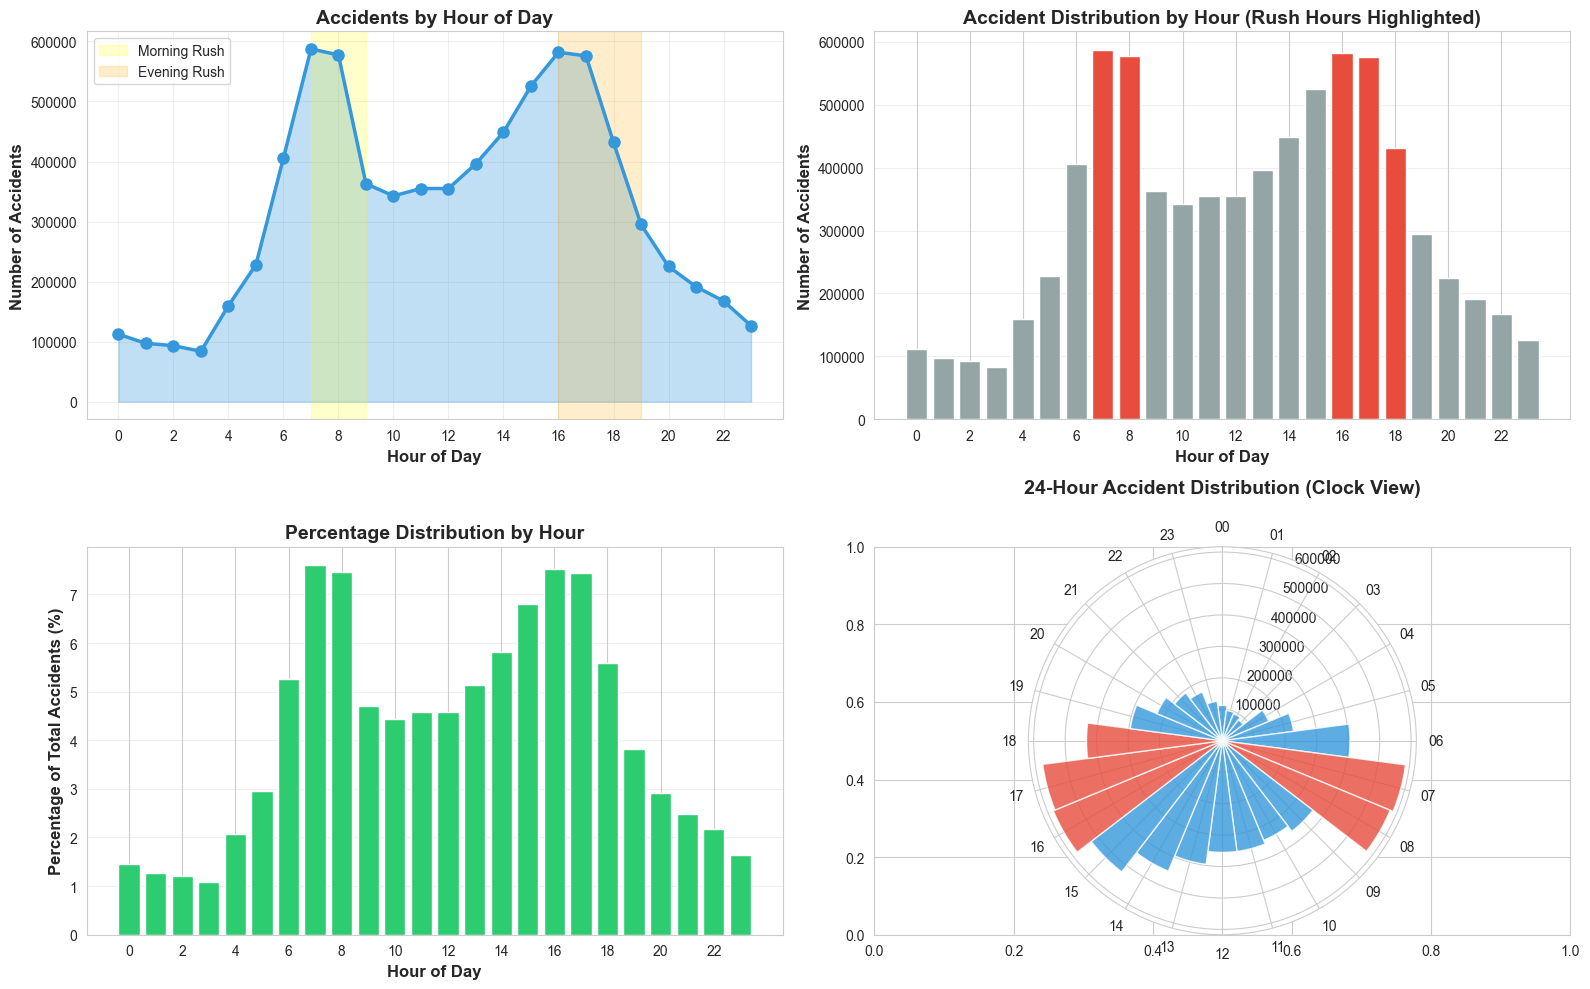


2. DAILY ACCIDENT PATTERNS (DAY OF WEEK)

📅 Accidents by Day of Week:
--------------------------------------------------------------------------------
         Day |        Count | Percentage | Distribution
--------------------------------------------------------------------------------
      Monday |    1,210,921 |     15.67% | ██████████
     Tuesday |    1,290,929 |     16.70% | ███████████
   Wednesday |    1,312,389 |     16.98% | ███████████
    Thursday |    1,316,229 |     17.03% | ███████████
      Friday |    1,366,499 |     17.68% | ███████████
    Saturday |      668,683 |      8.65% | █████
      Sunday |      562,744 |      7.28% | ████

📊 Weekday vs Weekend:
  Weekdays (Mon-Fri): 6,496,967 accidents (84.07%)
  Weekend (Sat-Sun): 1,231,427 accidents (15.93%)
  Average per weekday: 1,299,393 accidents
  Average per weekend day: 615,714 accidents


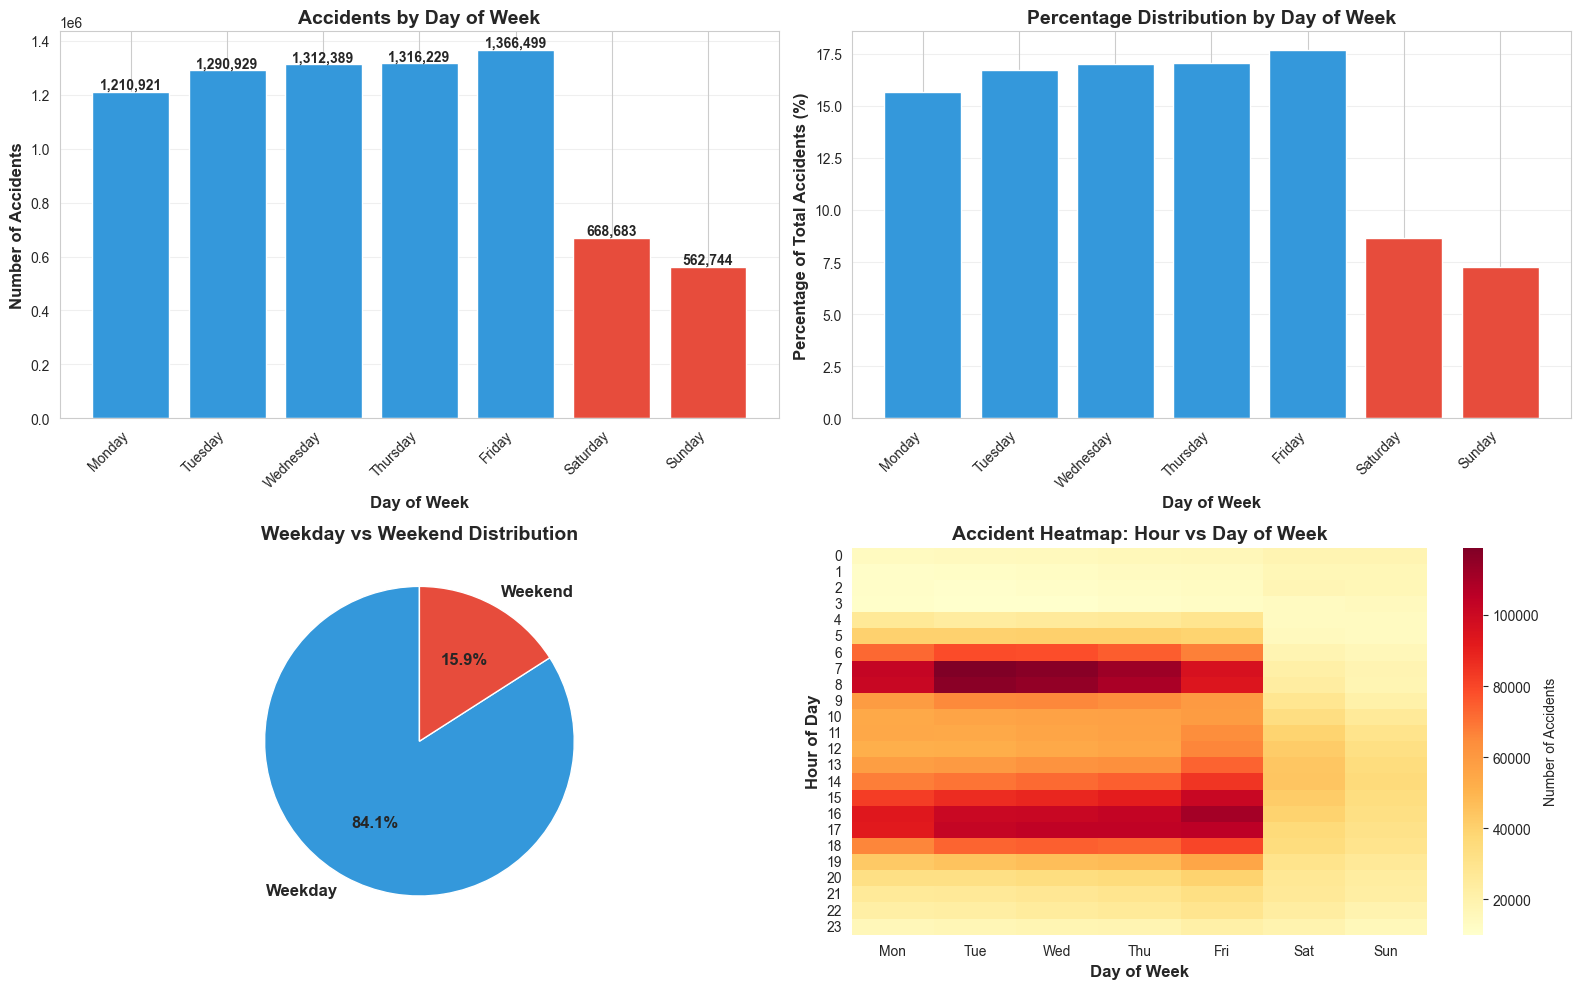


3. MONTHLY ACCIDENT PATTERNS

📆 Accidents by Month:
--------------------------------------------------------------------------------
 Month |        Count | Percentage | Distribution
--------------------------------------------------------------------------------
   Jan |      751,946 |      9.73% | ██████
   Feb |      658,984 |      8.53% | █████
   Mar |      554,595 |      7.18% | ████
   Apr |      587,300 |      7.60% | █████
   May |      558,176 |      7.22% | ████
   Jun |      571,373 |      7.39% | ████
   Jul |      512,335 |      6.63% | ████
   Aug |      599,666 |      7.76% | █████
   Sep |      651,381 |      8.43% | █████
   Oct |      675,130 |      8.74% | █████
   Nov |      760,165 |      9.84% | ██████
   Dec |      847,343 |     10.96% | ███████

🌍 Seasonal Distribution:
--------------------------------------------------------------------------------
  Winter  :    2,258,273 accidents (29.22%)
  Spring  :    1,700,071 accidents (22.00%)
  Summer  :    1,683,374

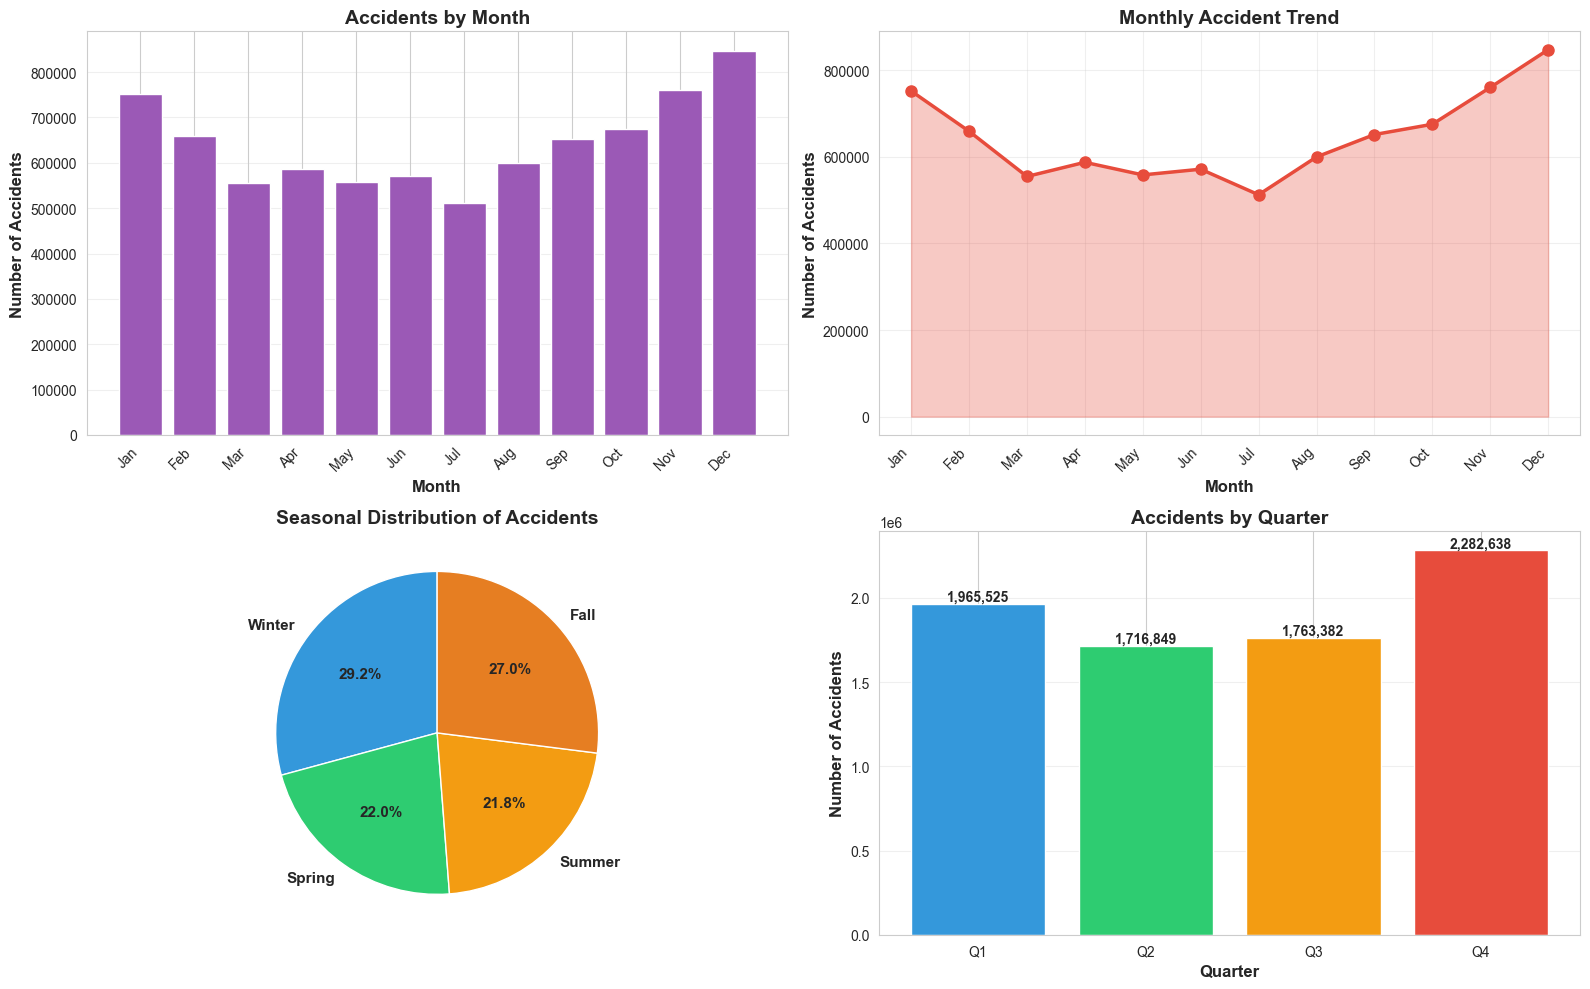


4. YEARLY ACCIDENT TRENDS

📈 Accidents by Year:
--------------------------------------------------------------------------------
  Year |        Count |       Change
--------------------------------------------------------------------------------
  2016 |      410,821 |          N/A
  2017 |      718,093 | +307,272 (+74.8%)
  2018 |      893,426 | +175,333 (+24.4%)
  2019 |      954,303 | +60,877 (+6.8%)
  2020 |    1,178,913 | +224,610 (+23.5%)
  2021 |    1,563,753 | +384,840 (+32.6%)
  2022 |    1,762,452 | +198,699 (+12.7%)
  2023 |      246,633 | -1,515,819 (-86.0%)

📊 Overall Trend (2016-2023):
  Starting count (2016): 410,821
  Ending count (2023): 246,633
  Total change: -164,188 accidents (-40.0%)
  Average per year: 966,049 accidents


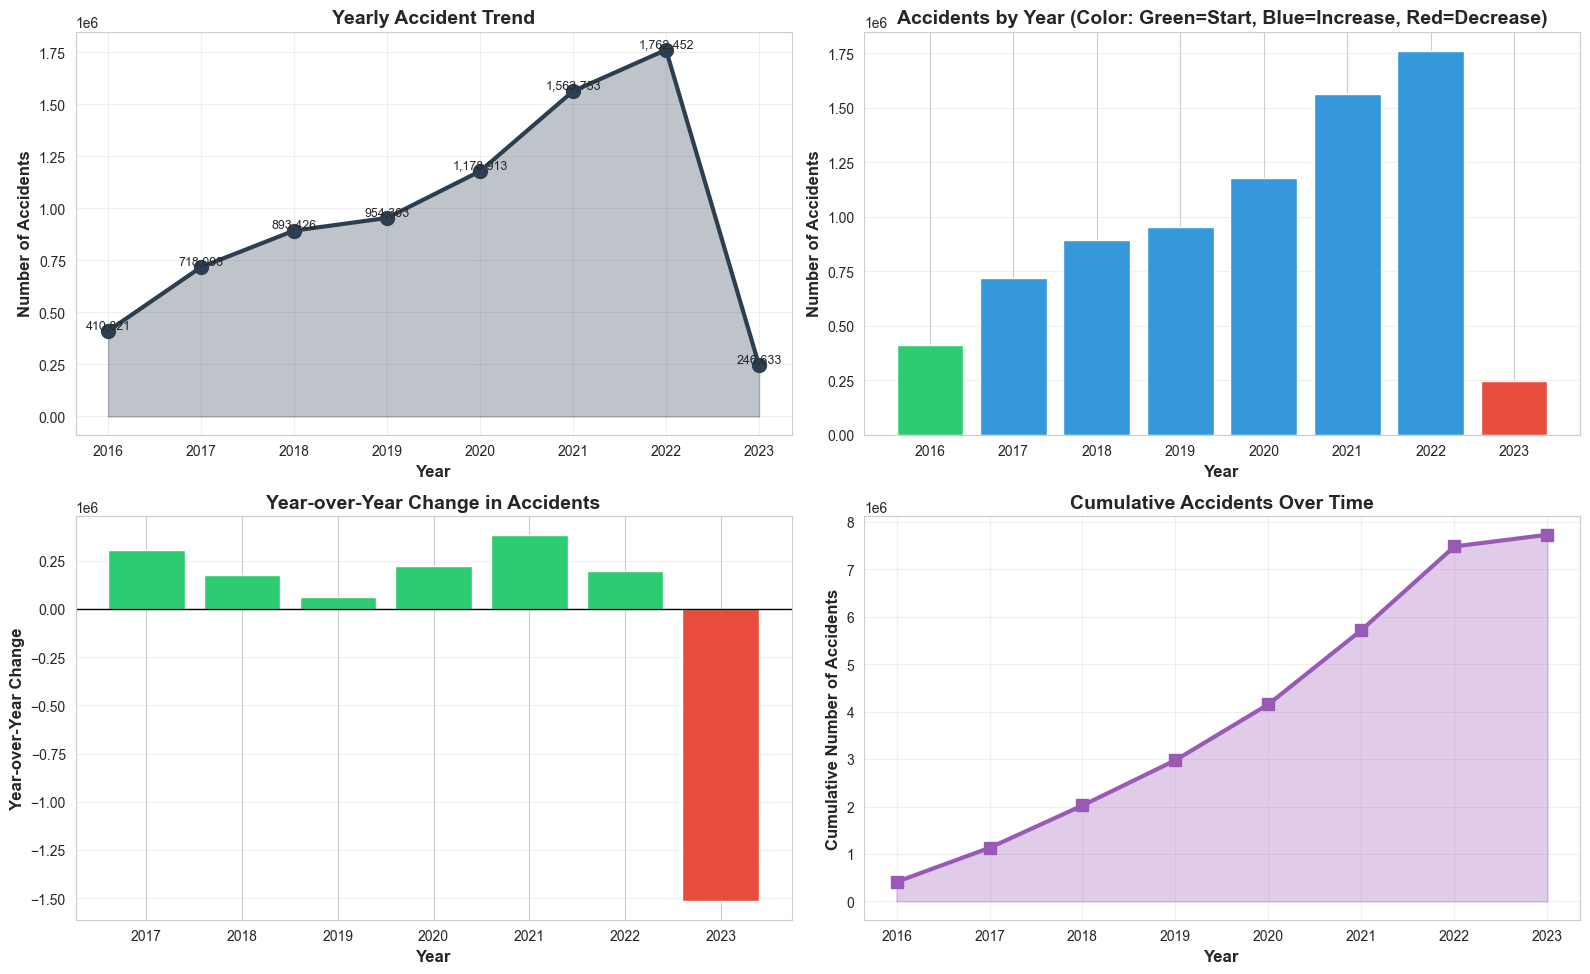


5. DAY VS NIGHT PATTERNS

☀️🌙 Accidents by Time of Day:
--------------------------------------------------------------------------------
  Day     :    5,334,553 (69.03%) ██████████████████████████████████
  Night   :    2,370,595 (30.67%) ███████████████

⏰ Average Accidents per Hour:
--------------------------------------------------------------------------------
  Day: 296,364 accidents per hour on average
  Night: 131,700 accidents per hour on average


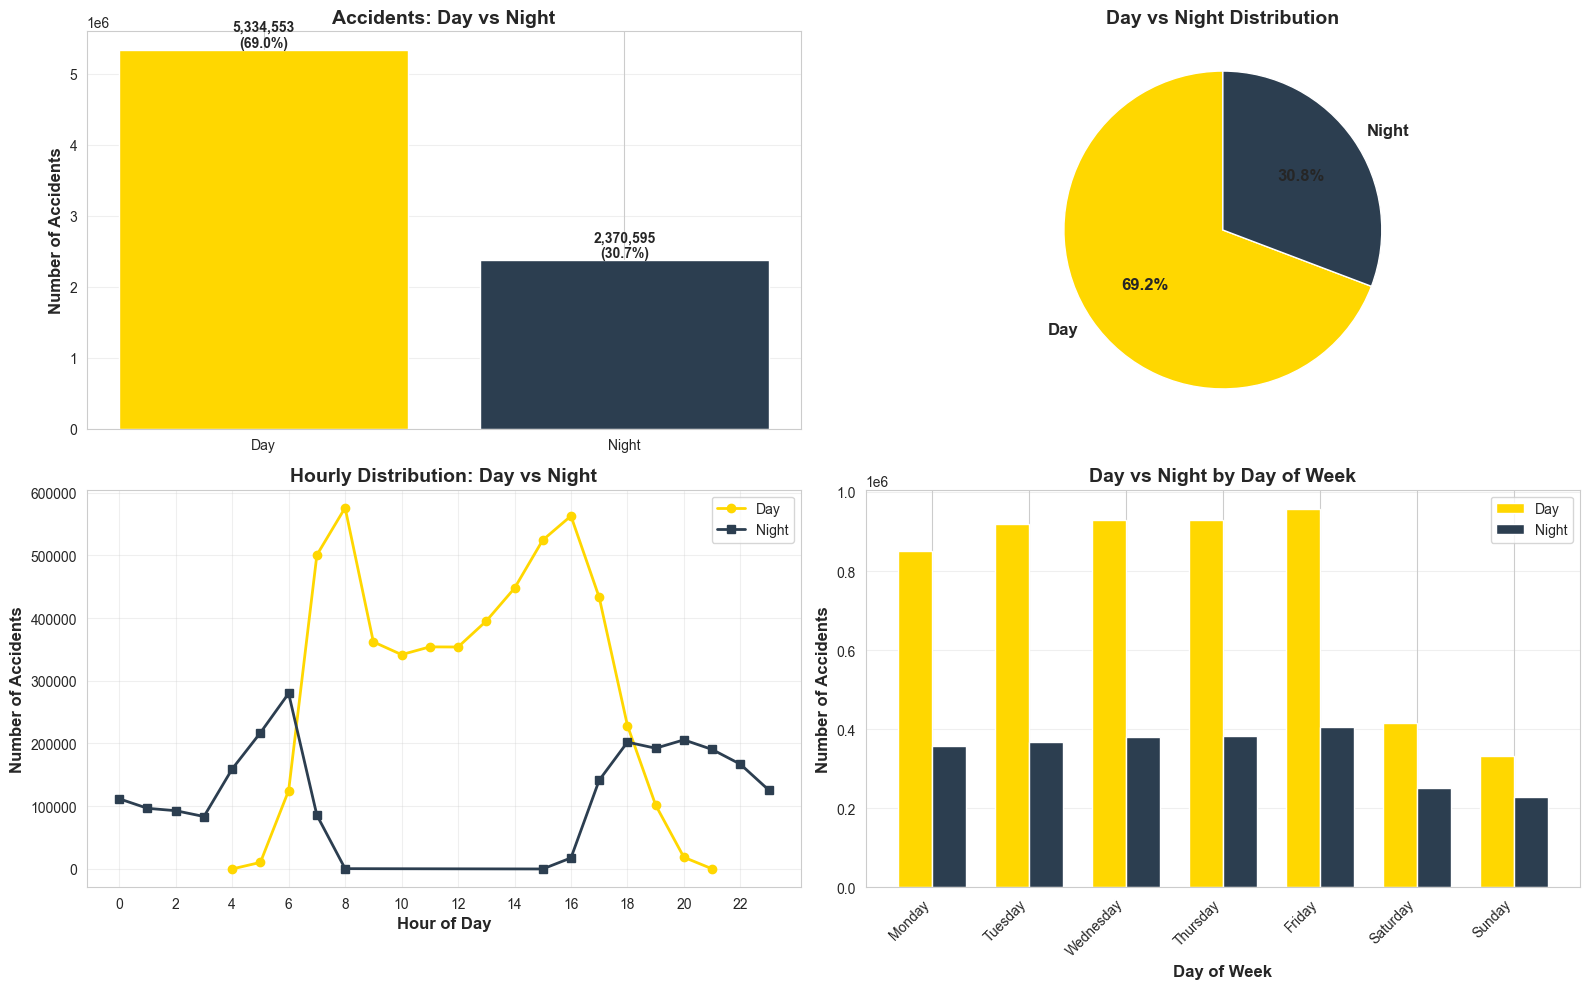


6. TIME SERIES ANALYSIS

📅 Time Series Statistics:
--------------------------------------------------------------------------------
  Date Range: 2016-01-14 to 2023-03-31
  Total Days: 2,572
  Average accidents per day: 3,004.8
  Std Dev: 1,883.6
  Min accidents in a day: 1
  Max accidents in a day: 10,067

🔥 Top 10 Days with Most Accidents:
   1. 2022-12-23 (Friday): 10,067 accidents
   2. 2022-12-22 (Thursday): 9,552 accidents
   3. 2022-12-15 (Thursday): 9,256 accidents
   4. 2023-01-25 (Wednesday): 9,250 accidents
   5. 2021-02-11 (Thursday): 9,087 accidents
   6. 2022-04-29 (Friday): 9,039 accidents
   7. 2023-01-27 (Friday): 9,031 accidents
   8. 2022-05-04 (Wednesday): 8,704 accidents
   9. 2022-04-22 (Friday): 8,533 accidents
  10. 2022-02-25 (Friday): 8,523 accidents


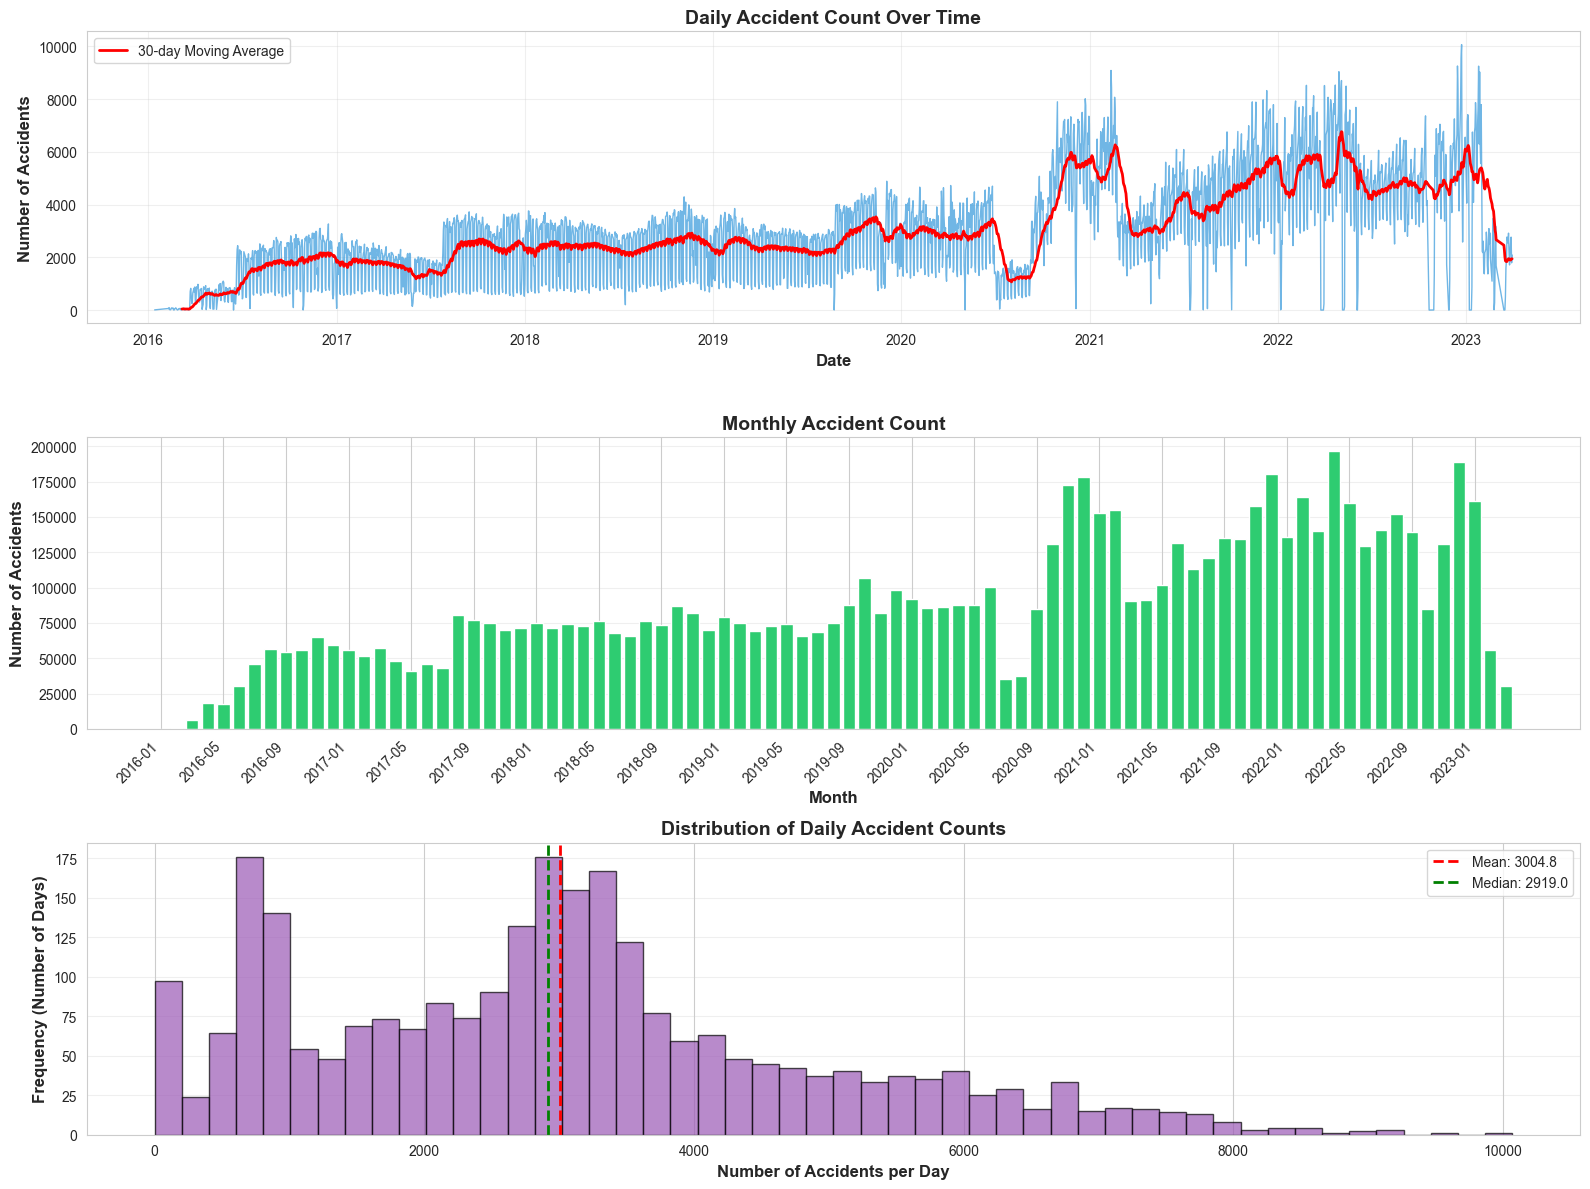


7. TEMPORAL ANALYSIS SUMMARY

TEMPORAL ANALYSIS SUMMARY
US Accidents Dataset - Traffic Accident Risk Predictor
Generated: 2025-11-04 18:39:04

1. HOURLY PATTERNS
--------------------------------------------------------------------------------
   Peak Hour: 07:00 (587,472 accidents)
   Low Hour: 03:00 (83,863 accidents)
   Morning Rush (7-9 AM): 1,528,082 accidents
   Evening Rush (4-7 PM): 1,885,147 accidents


2. DAILY PATTERNS
--------------------------------------------------------------------------------
   Peak Day: Friday (1,366,499 accidents)
   Low Day: Sunday (562,744 accidents)
   Weekday Total: 6,496,967 (84.1%)
   Weekend Total: 1,231,427 (15.9%)


3. MONTHLY & SEASONAL PATTERNS
--------------------------------------------------------------------------------
   Peak Month: Dec (847,343 accidents)
   Low Month: Jul (512,335 accidents)


4. YEARLY TRENDS
--------------------------------------------------------------------------------
   Data Range: 2016 - 2023
   Starting Co

In [13]:
# Run complete analysis
analyzer = TemporalAnalysis(dataset)
analyzer.run_complete_analysis()

## Weather Analysis

In [14]:
"""
EDA Part 4: Weather Impact Analysis (Notebook Version)
US Accidents Dataset - Traffic Accident Risk Predictor
Project Partners: Diparna Adhikary and Maddy Nommer

Goal: Analyze weather impact on accidents to understand:
- Weather condition frequency and impact
- Temperature patterns
- Visibility impact
- Precipitation effects
- Wind speed and direction analysis
- Humidity and pressure patterns
- Weather combinations and severity

Usage in Notebook:
------------------
import pandas as pd
from eda_part4_weather_analysis import WeatherAnalysis

df = pd.read_csv('US_Accidents.csv')
analyzer = WeatherAnalysis(df)
analyzer.run_complete_analysis()
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
sns.set_style('whitegrid')
sns.set_palette('Set2')
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 10

class WeatherAnalysis:
    """
    Comprehensive Weather Impact Analysis for US Accidents Dataset (Notebook Version)
    Works directly with DataFrame, displays plots inline
    """
    
    def __init__(self, df):
        """
        Initialize with DataFrame
        
        Parameters:
        -----------
        df : pandas.DataFrame
            US Accidents dataset
        """
        print("="*80)
        print("EDA PART 4: WEATHER IMPACT ANALYSIS")
        print("US Accidents Dataset - Traffic Accident Risk Predictor")
        print("="*80)
        
        self.df = df.copy()
        print(f"\n✓ DataFrame loaded: {self.df.shape[0]:,} rows × {self.df.shape[1]} columns")
        
        # Check available weather columns
        self._check_weather_columns()
    
    def _check_weather_columns(self):
        """
        Check which weather columns are available
        """
        self.weather_cols = {
            'Weather_Condition': 'Weather_Condition' in self.df.columns,
            'Temperature(F)': 'Temperature(F)' in self.df.columns,
            'Visibility(mi)': 'Visibility(mi)' in self.df.columns,
            'Wind_Speed(mph)': 'Wind_Speed(mph)' in self.df.columns,
            'Wind_Direction': 'Wind_Direction' in self.df.columns,
            'Precipitation(in)': 'Precipitation(in)' in self.df.columns,
            'Humidity(%)': 'Humidity(%)' in self.df.columns,
            'Pressure(in)': 'Pressure(in)' in self.df.columns,
            'Wind_Chill(F)': 'Wind_Chill(F)' in self.df.columns
        }
        
        available = [col for col, exists in self.weather_cols.items() if exists]
        print(f"\n✓ Available weather columns: {len(available)}/{len(self.weather_cols)}")
        for col in available:
            print(f"  • {col}")
    
    def weather_condition_analysis(self):
        """
        Analyze different weather conditions and their impact
        """
        print("\n" + "="*80)
        print("1. WEATHER CONDITION ANALYSIS")
        print("="*80)
        
        if not self.weather_cols['Weather_Condition']:
            print("✗ Weather_Condition column not available!")
            return
        
        # Weather condition distribution
        weather_counts = self.df['Weather_Condition'].value_counts()
        weather_percent = (weather_counts / len(self.df) * 100).round(2)
        
        print(f"\n🌦️  Total Unique Weather Conditions: {len(weather_counts)}")
        print(f"\nTop 20 Most Common Weather Conditions:")
        print("-"*80)
        print(f"{'Rank':>4} | {'Weather Condition':>35} | {'Count':>12} | {'Percentage':>10}")
        print("-"*80)
        
        for i, (weather, count) in enumerate(weather_counts.head(20).items(), 1):
            pct = weather_percent[weather]
            print(f"{i:>4} | {weather:>35} | {count:>12,} | {pct:>9.2f}%")
        
        # Group similar conditions
        print(f"\n🌧️  Weather Condition Categories:")
        print("-"*80)
        
        categories = {
            'Clear': ['Fair', 'Clear'],
            'Cloudy': ['Cloudy', 'Mostly Cloudy', 'Partly Cloudy', 'Overcast'],
            'Rain': ['Rain', 'Light Rain', 'Heavy Rain', 'Drizzle', 'Showers'],
            'Snow': ['Snow', 'Light Snow', 'Heavy Snow', 'Snow Showers'],
            'Fog': ['Fog', 'Mist', 'Haze'],
            'Thunderstorm': ['Thunderstorm', 'T-Storm', 'Thunder'],
            'Severe': ['Tornado', 'Hurricane', 'Tropical Storm', 'Severe Weather']
        }
        
        category_counts = {}
        for category, keywords in categories.items():
            mask = self.df['Weather_Condition'].str.contains('|'.join(keywords), case=False, na=False)
            count = mask.sum()
            category_counts[category] = count
            pct = (count / len(self.df)) * 100
            print(f"  {category:15s}: {count:>12,} ({pct:>5.2f}%)")
        
        # Severity analysis by weather
        if 'Severity' in self.df.columns:
            print(f"\n⚠️  Average Severity by Top Weather Conditions:")
            print("-"*80)
            weather_severity = self.df.groupby('Weather_Condition')['Severity'].agg(['mean', 'count'])
            weather_severity_filtered = weather_severity[weather_severity['count'] >= 1000].sort_values('mean', ascending=False)
            
            print(f"{'Rank':>4} | {'Weather Condition':>35} | {'Avg Severity':>12} | {'Count':>12}")
            print("-"*80)
            for i, (weather, row) in enumerate(weather_severity_filtered.head(15).iterrows(), 1):
                print(f"{i:>4} | {weather:>35} | {row['mean']:>12.3f} | {row['count']:>12,}")
        
        # Visualizations
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        
        # Top 15 weather conditions
        top_15 = weather_counts.head(15)
        axes[0, 0].barh(range(len(top_15)), top_15.values, color='skyblue')
        axes[0, 0].set_yticks(range(len(top_15)))
        axes[0, 0].set_yticklabels(top_15.index, fontsize=9)
        axes[0, 0].set_xlabel('Number of Accidents', fontsize=11, fontweight='bold')
        axes[0, 0].set_title('Top 15 Most Common Weather Conditions', fontsize=13, fontweight='bold')
        axes[0, 0].invert_yaxis()
        axes[0, 0].grid(True, alpha=0.3, axis='x')
        
        # Weather categories pie chart
        axes[0, 1].pie(category_counts.values(), labels=category_counts.keys(), 
                      autopct='%1.1f%%', startangle=90)
        axes[0, 1].set_title('Weather Category Distribution', fontsize=13, fontweight='bold')
        
        # Severity by weather (if available)
        if 'Severity' in self.df.columns:
            top_severity = weather_severity_filtered.head(15)
            axes[1, 0].barh(range(len(top_severity)), top_severity['mean'], color='coral')
            axes[1, 0].set_yticks(range(len(top_severity)))
            axes[1, 0].set_yticklabels(top_severity.index, fontsize=8)
            axes[1, 0].set_xlabel('Average Severity', fontsize=11, fontweight='bold')
            axes[1, 0].set_title('Top 15 Weather Conditions by Avg Severity (min 1000 cases)', 
                                fontsize=13, fontweight='bold')
            axes[1, 0].invert_yaxis()
            axes[1, 0].grid(True, alpha=0.3, axis='x')
        
        # Percentage distribution
        top_20_pct = weather_percent.head(20)
        axes[1, 1].bar(range(len(top_20_pct)), top_20_pct.values, color='green')
        axes[1, 1].set_xlabel('Weather Condition (Rank)', fontsize=11, fontweight='bold')
        axes[1, 1].set_ylabel('Percentage of Total Accidents', fontsize=11, fontweight='bold')
        axes[1, 1].set_title('Top 20 Weather Conditions - Percentage Distribution', 
                            fontsize=13, fontweight='bold')
        axes[1, 1].grid(True, alpha=0.3, axis='y')
        
        plt.tight_layout()
        plt.show()
    
    def temperature_analysis(self):
        """
        Analyze temperature patterns and impact
        """
        print("\n" + "="*80)
        print("2. TEMPERATURE ANALYSIS")
        print("="*80)
        
        if not self.weather_cols['Temperature(F)']:
            print("✗ Temperature(F) column not available!")
            return
        
        # Temperature statistics
        temp_data = self.df['Temperature(F)'].dropna()
        
        print(f"\n🌡️  Temperature Statistics:")
        print("-"*80)
        print(f"  Count: {len(temp_data):,}")
        print(f"  Mean: {temp_data.mean():.1f}°F")
        print(f"  Median: {temp_data.median():.1f}°F")
        print(f"  Std Dev: {temp_data.std():.1f}°F")
        print(f"  Min: {temp_data.min():.1f}°F")
        print(f"  Max: {temp_data.max():.1f}°F")
        print(f"  25th percentile: {temp_data.quantile(0.25):.1f}°F")
        print(f"  75th percentile: {temp_data.quantile(0.75):.1f}°F")
        
        # Temperature bins
        temp_bins = [-50, 0, 32, 50, 70, 90, 150]
        temp_labels = ['<0°F\n(Extreme Cold)', '0-32°F\n(Freezing)', '32-50°F\n(Cold)', 
                      '50-70°F\n(Moderate)', '70-90°F\n(Warm)', '>90°F\n(Hot)']
        self.df['Temp_Bin'] = pd.cut(self.df['Temperature(F)'], bins=temp_bins, labels=temp_labels)
        
        temp_bin_counts = self.df['Temp_Bin'].value_counts().reindex(temp_labels)
        temp_bin_percent = (temp_bin_counts / len(self.df) * 100).round(2)
        
        print(f"\n🌡️  Accidents by Temperature Range:")
        print("-"*80)
        print(f"{'Temperature Range':>20} | {'Count':>12} | {'Percentage':>10}")
        print("-"*80)
        for temp_range, count in temp_bin_counts.items():
            pct = temp_bin_percent[temp_range]
            print(f"{temp_range:>20} | {count:>12,} | {pct:>9.2f}%")
        
        # Severity by temperature
        if 'Severity' in self.df.columns:
            print(f"\n⚠️  Average Severity by Temperature Range:")
            print("-"*80)
            temp_severity = self.df.groupby('Temp_Bin', observed=True)['Severity'].agg(['mean', 'count'])
            temp_severity = temp_severity.reindex(temp_labels)
            
            for temp_range, row in temp_severity.iterrows():
                if not pd.isna(row['mean']):
                    print(f"  {temp_range:20s}: Avg Severity {row['mean']:.3f} ({row['count']:,} accidents)")
        
        # Extreme temperature accidents
        extreme_cold = (self.df['Temperature(F)'] < 0).sum()
        extreme_hot = (self.df['Temperature(F)'] > 100).sum()
        print(f"\n❄️  Extreme Conditions:")
        print(f"  Below 0°F: {extreme_cold:,} accidents ({extreme_cold/len(self.df)*100:.2f}%)")
        print(f"  Above 100°F: {extreme_hot:,} accidents ({extreme_hot/len(self.df)*100:.2f}%)")
        
        # Visualizations
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        
        # Histogram
        axes[0, 0].hist(temp_data, bins=50, color='orange', edgecolor='black', alpha=0.7)
        axes[0, 0].axvline(temp_data.mean(), color='red', linestyle='--', linewidth=2, 
                          label=f'Mean: {temp_data.mean():.1f}°F')
        axes[0, 0].axvline(temp_data.median(), color='blue', linestyle='--', linewidth=2, 
                          label=f'Median: {temp_data.median():.1f}°F')
        axes[0, 0].set_xlabel('Temperature (°F)', fontsize=11, fontweight='bold')
        axes[0, 0].set_ylabel('Number of Accidents', fontsize=11, fontweight='bold')
        axes[0, 0].set_title('Temperature Distribution', fontsize=13, fontweight='bold')
        axes[0, 0].legend()
        axes[0, 0].grid(True, alpha=0.3, axis='y')
        
        # Bar chart by temperature range
        colors_temp = ['#3498db', '#5dade2', '#85c1e9', '#2ecc71', '#f39c12', '#e74c3c']
        axes[0, 1].bar(range(len(temp_bin_counts)), temp_bin_counts.values, color=colors_temp)
        axes[0, 1].set_xticks(range(len(temp_bin_counts)))
        axes[0, 1].set_xticklabels(temp_labels, rotation=45, ha='right')
        axes[0, 1].set_ylabel('Number of Accidents', fontsize=11, fontweight='bold')
        axes[0, 1].set_title('Accidents by Temperature Range', fontsize=13, fontweight='bold')
        axes[0, 1].grid(True, alpha=0.3, axis='y')
        
        # Severity by temperature (if available)
        if 'Severity' in self.df.columns:
            axes[1, 0].bar(range(len(temp_severity)), temp_severity['mean'].values, color='coral')
            axes[1, 0].set_xticks(range(len(temp_severity)))
            axes[1, 0].set_xticklabels(temp_labels, rotation=45, ha='right')
            axes[1, 0].set_ylabel('Average Severity', fontsize=11, fontweight='bold')
            axes[1, 0].set_title('Average Severity by Temperature Range', fontsize=13, fontweight='bold')
            axes[1, 0].grid(True, alpha=0.3, axis='y')
        
        # Box plot
        axes[1, 1].boxplot([self.df[self.df['Temp_Bin'] == label]['Temperature(F)'].dropna() 
                           for label in temp_labels],
                          labels=temp_labels)
        axes[1, 1].set_xticklabels(temp_labels, rotation=45, ha='right')
        axes[1, 1].set_ylabel('Temperature (°F)', fontsize=11, fontweight='bold')
        axes[1, 1].set_title('Temperature Distribution by Range', fontsize=13, fontweight='bold')
        axes[1, 1].grid(True, alpha=0.3, axis='y')
        
        plt.tight_layout()
        plt.show()
    
    def visibility_analysis(self):
        """
        Analyze visibility patterns and impact
        """
        print("\n" + "="*80)
        print("3. VISIBILITY ANALYSIS")
        print("="*80)
        
        if not self.weather_cols['Visibility(mi)']:
            print("✗ Visibility(mi) column not available!")
            return
        
        # Visibility statistics
        vis_data = self.df['Visibility(mi)'].dropna()
        
        print(f"\n👁️  Visibility Statistics:")
        print("-"*80)
        print(f"  Count: {len(vis_data):,}")
        print(f"  Mean: {vis_data.mean():.2f} miles")
        print(f"  Median: {vis_data.median():.2f} miles")
        print(f"  Std Dev: {vis_data.std():.2f} miles")
        print(f"  Min: {vis_data.min():.2f} miles")
        print(f"  Max: {vis_data.max():.2f} miles")
        
        # Visibility bins
        vis_bins = [-1, 1, 2, 5, 10, 20]
        vis_labels = ['<1 mi\n(Poor)', '1-2 mi\n(Low)', '2-5 mi\n(Moderate)', 
                     '5-10 mi\n(Good)', '>10 mi\n(Excellent)']
        self.df['Visibility_Bin'] = pd.cut(self.df['Visibility(mi)'], bins=vis_bins, labels=vis_labels)
        
        vis_bin_counts = self.df['Visibility_Bin'].value_counts().reindex(vis_labels)
        vis_bin_percent = (vis_bin_counts / len(self.df) * 100).round(2)
        
        print(f"\n👁️  Accidents by Visibility Range:")
        print("-"*80)
        print(f"{'Visibility Range':>20} | {'Count':>12} | {'Percentage':>10}")
        print("-"*80)
        for vis_range, count in vis_bin_counts.items():
            pct = vis_bin_percent[vis_range]
            print(f"{vis_range:>20} | {count:>12,} | {pct:>9.2f}%")
        
        # Poor visibility analysis
        poor_vis = (self.df['Visibility(mi)'] < 1).sum()
        very_poor_vis = (self.df['Visibility(mi)'] < 0.5).sum()
        print(f"\n🌫️  Low Visibility Conditions:")
        print(f"  Below 1 mile: {poor_vis:,} accidents ({poor_vis/len(self.df)*100:.2f}%)")
        print(f"  Below 0.5 miles: {very_poor_vis:,} accidents ({very_poor_vis/len(self.df)*100:.2f}%)")
        
        # Severity by visibility
        if 'Severity' in self.df.columns:
            print(f"\n⚠️  Average Severity by Visibility Range:")
            print("-"*80)
            vis_severity = self.df.groupby('Visibility_Bin', observed=True)['Severity'].agg(['mean', 'count'])
            vis_severity = vis_severity.reindex(vis_labels)
            
            for vis_range, row in vis_severity.iterrows():
                if not pd.isna(row['mean']):
                    print(f"  {vis_range:20s}: Avg Severity {row['mean']:.3f} ({row['count']:,} accidents)")
        
        # Visualizations
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        
        # Histogram
        axes[0, 0].hist(vis_data[vis_data <= 20], bins=50, color='purple', edgecolor='black', alpha=0.7)
        axes[0, 0].axvline(vis_data.mean(), color='red', linestyle='--', linewidth=2, 
                          label=f'Mean: {vis_data.mean():.2f} mi')
        axes[0, 0].axvline(vis_data.median(), color='blue', linestyle='--', linewidth=2, 
                          label=f'Median: {vis_data.median():.2f} mi')
        axes[0, 0].set_xlabel('Visibility (miles)', fontsize=11, fontweight='bold')
        axes[0, 0].set_ylabel('Number of Accidents', fontsize=11, fontweight='bold')
        axes[0, 0].set_title('Visibility Distribution (0-20 miles)', fontsize=13, fontweight='bold')
        axes[0, 0].legend()
        axes[0, 0].grid(True, alpha=0.3, axis='y')
        
        # Bar chart by visibility range
        colors_vis = ['#e74c3c', '#e67e22', '#f39c12', '#2ecc71', '#27ae60']
        axes[0, 1].bar(range(len(vis_bin_counts)), vis_bin_counts.values, color=colors_vis)
        axes[0, 1].set_xticks(range(len(vis_bin_counts)))
        axes[0, 1].set_xticklabels(vis_labels, rotation=45, ha='right')
        axes[0, 1].set_ylabel('Number of Accidents', fontsize=11, fontweight='bold')
        axes[0, 1].set_title('Accidents by Visibility Range', fontsize=13, fontweight='bold')
        axes[0, 1].grid(True, alpha=0.3, axis='y')
        
        # Severity by visibility (if available)
        if 'Severity' in self.df.columns:
            axes[1, 0].bar(range(len(vis_severity)), vis_severity['mean'].values, color='coral')
            axes[1, 0].set_xticks(range(len(vis_severity)))
            axes[1, 0].set_xticklabels(vis_labels, rotation=45, ha='right')
            axes[1, 0].set_ylabel('Average Severity', fontsize=11, fontweight='bold')
            axes[1, 0].set_title('Average Severity by Visibility Range', fontsize=13, fontweight='bold')
            axes[1, 0].grid(True, alpha=0.3, axis='y')
        
        # Pie chart
        axes[1, 1].pie(vis_bin_counts.values, labels=vis_labels, autopct='%1.1f%%', 
                      colors=colors_vis, startangle=90)
        axes[1, 1].set_title('Visibility Range Distribution', fontsize=13, fontweight='bold')
        
        plt.tight_layout()
        plt.show()
    
    def precipitation_analysis(self):
        """
        Analyze precipitation patterns and impact
        """
        print("\n" + "="*80)
        print("4. PRECIPITATION ANALYSIS")
        print("="*80)
        
        if not self.weather_cols['Precipitation(in)']:
            print("✗ Precipitation(in) column not available!")
            return
        
        # Precipitation statistics
        precip_data = self.df['Precipitation(in)'].dropna()
        
        print(f"\n🌧️  Precipitation Statistics:")
        print("-"*80)
        print(f"  Count: {len(precip_data):,}")
        print(f"  Mean: {precip_data.mean():.3f} inches")
        print(f"  Median: {precip_data.median():.3f} inches")
        print(f"  Std Dev: {precip_data.std():.3f} inches")
        print(f"  Min: {precip_data.min():.3f} inches")
        print(f"  Max: {precip_data.max():.3f} inches")
        
        # Precipitation presence
        no_precip = (self.df['Precipitation(in)'] == 0).sum()
        with_precip = (self.df['Precipitation(in)'] > 0).sum()
        
        print(f"\n🌧️  Precipitation Presence:")
        print("-"*80)
        print(f"  No Precipitation: {no_precip:,} ({no_precip/len(self.df)*100:.2f}%)")
        print(f"  With Precipitation: {with_precip:,} ({with_precip/len(self.df)*100:.2f}%)")
        
        # Precipitation bins (for accidents with precipitation)
        precip_positive = self.df[self.df['Precipitation(in)'] > 0]['Precipitation(in)']
        if len(precip_positive) > 0:
            precip_bins = [0, 0.1, 0.5, 1.0, 5.0]
            precip_labels = ['Light\n(0-0.1")', 'Moderate\n(0.1-0.5")', 'Heavy\n(0.5-1")', 'Very Heavy\n(>1")']
            
            precip_binned = pd.cut(precip_positive, bins=precip_bins, labels=precip_labels)
            precip_bin_counts = precip_binned.value_counts().reindex(precip_labels)
            
            print(f"\n🌧️  Precipitation Intensity (when present):")
            print("-"*80)
            for intensity, count in precip_bin_counts.items():
                pct = (count / len(precip_positive)) * 100
                print(f"  {intensity:20s}: {count:>10,} ({pct:>5.2f}%)")
        
        # Severity by precipitation
        if 'Severity' in self.df.columns:
            no_precip_sev = self.df[self.df['Precipitation(in)'] == 0]['Severity'].mean()
            with_precip_sev = self.df[self.df['Precipitation(in)'] > 0]['Severity'].mean()
            
            print(f"\n⚠️  Average Severity:")
            print(f"  No Precipitation: {no_precip_sev:.3f}")
            print(f"  With Precipitation: {with_precip_sev:.3f}")
            print(f"  Difference: {with_precip_sev - no_precip_sev:+.3f}")
        
        # Visualizations
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        
        # Pie chart: precipitation presence
        axes[0, 0].pie([no_precip, with_precip], 
                      labels=['No Precipitation', 'With Precipitation'],
                      autopct='%1.1f%%',
                      colors=['#3498db', '#2ecc71'],
                      startangle=90,
                      textprops={'fontsize': 11, 'fontweight': 'bold'})
        axes[0, 0].set_title('Precipitation Presence in Accidents', fontsize=13, fontweight='bold')
        
        # Histogram (for values > 0)
        if len(precip_positive) > 0:
            axes[0, 1].hist(precip_positive[precip_positive <= 2], bins=50, 
                           color='#3498db', edgecolor='black', alpha=0.7)
            axes[0, 1].set_xlabel('Precipitation (inches)', fontsize=11, fontweight='bold')
            axes[0, 1].set_ylabel('Number of Accidents', fontsize=11, fontweight='bold')
            axes[0, 1].set_title('Precipitation Distribution (0-2 inches, when present)', 
                                fontsize=13, fontweight='bold')
            axes[0, 1].grid(True, alpha=0.3, axis='y')
        
        # Bar chart by intensity
        if len(precip_positive) > 0:
            axes[1, 0].bar(range(len(precip_bin_counts)), precip_bin_counts.values, 
                          color=['#2ecc71', '#f39c12', '#e67e22', '#e74c3c'])
            axes[1, 0].set_xticks(range(len(precip_bin_counts)))
            axes[1, 0].set_xticklabels(precip_labels, rotation=45, ha='right')
            axes[1, 0].set_ylabel('Number of Accidents', fontsize=11, fontweight='bold')
            axes[1, 0].set_title('Accidents by Precipitation Intensity (when present)', 
                                fontsize=13, fontweight='bold')
            axes[1, 0].grid(True, alpha=0.3, axis='y')
        
        # Severity comparison
        if 'Severity' in self.df.columns:
            severity_data = [no_precip_sev, with_precip_sev]
            axes[1, 1].bar(['No Precipitation', 'With Precipitation'], severity_data, 
                          color=['#3498db', '#2ecc71'])
            axes[1, 1].set_ylabel('Average Severity', fontsize=11, fontweight='bold')
            axes[1, 1].set_title('Average Severity: Precipitation Impact', fontsize=13, fontweight='bold')
            axes[1, 1].grid(True, alpha=0.3, axis='y')
            
            # Add value labels
            for i, val in enumerate(severity_data):
                axes[1, 1].text(i, val, f'{val:.3f}', ha='center', va='bottom', fontweight='bold')
        
        plt.tight_layout()
        plt.show()
    
    def wind_analysis(self):
        """
        Analyze wind speed and direction patterns
        """
        print("\n" + "="*80)
        print("5. WIND ANALYSIS")
        print("="*80)
        
        # Wind Speed Analysis
        if self.weather_cols['Wind_Speed(mph)']:
            wind_data = self.df['Wind_Speed(mph)'].dropna()
            
            print(f"\n💨 Wind Speed Statistics:")
            print("-"*80)
            print(f"  Count: {len(wind_data):,}")
            print(f"  Mean: {wind_data.mean():.2f} mph")
            print(f"  Median: {wind_data.median():.2f} mph")
            print(f"  Std Dev: {wind_data.std():.2f} mph")
            print(f"  Min: {wind_data.min():.2f} mph")
            print(f"  Max: {wind_data.max():.2f} mph")
            
            # Wind speed bins
            wind_bins = [-1, 5, 15, 25, 35, 200]
            wind_labels = ['Calm\n(<5 mph)', 'Light\n(5-15 mph)', 'Moderate\n(15-25 mph)', 
                          'Strong\n(25-35 mph)', 'Very Strong\n(>35 mph)']
            self.df['Wind_Bin'] = pd.cut(self.df['Wind_Speed(mph)'], bins=wind_bins, labels=wind_labels)
            
            wind_bin_counts = self.df['Wind_Bin'].value_counts().reindex(wind_labels)
            wind_bin_percent = (wind_bin_counts / len(self.df) * 100).round(2)
            
            print(f"\n💨 Accidents by Wind Speed Range:")
            print("-"*80)
            print(f"{'Wind Speed Range':>25} | {'Count':>12} | {'Percentage':>10}")
            print("-"*80)
            for wind_range, count in wind_bin_counts.items():
                pct = wind_bin_percent[wind_range]
                print(f"{wind_range:>25} | {count:>12,} | {pct:>9.2f}%")
            
            # High wind accidents
            high_wind = (self.df['Wind_Speed(mph)'] > 35).sum()
            very_high_wind = (self.df['Wind_Speed(mph)'] > 50).sum()
            print(f"\n🌪️  High Wind Conditions:")
            print(f"  Above 35 mph: {high_wind:,} accidents ({high_wind/len(self.df)*100:.2f}%)")
            print(f"  Above 50 mph: {very_high_wind:,} accidents ({very_high_wind/len(self.df)*100:.2f}%)")
        
        # Wind Direction Analysis
        if self.weather_cols['Wind_Direction']:
            wind_dir_counts = self.df['Wind_Direction'].value_counts().head(10)
            
            print(f"\n🧭 Top 10 Wind Directions:")
            print("-"*80)
            for direction, count in wind_dir_counts.items():
                pct = (count / len(self.df)) * 100
                print(f"  {direction:8s}: {count:>10,} ({pct:>5.2f}%)")
        
        # Severity by wind speed
        if 'Severity' in self.df.columns and self.weather_cols['Wind_Speed(mph)']:
            print(f"\n⚠️  Average Severity by Wind Speed Range:")
            print("-"*80)
            wind_severity = self.df.groupby('Wind_Bin', observed=True)['Severity'].agg(['mean', 'count'])
            wind_severity = wind_severity.reindex(wind_labels)
            
            for wind_range, row in wind_severity.iterrows():
                if not pd.isna(row['mean']):
                    print(f"  {wind_range:25s}: Avg Severity {row['mean']:.3f} ({row['count']:,} accidents)")
        
        # Visualizations
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        
        if self.weather_cols['Wind_Speed(mph)']:
            # Histogram
            axes[0, 0].hist(wind_data[wind_data <= 50], bins=50, color='teal', edgecolor='black', alpha=0.7)
            axes[0, 0].axvline(wind_data.mean(), color='red', linestyle='--', linewidth=2, 
                              label=f'Mean: {wind_data.mean():.2f} mph')
            axes[0, 0].set_xlabel('Wind Speed (mph)', fontsize=11, fontweight='bold')
            axes[0, 0].set_ylabel('Number of Accidents', fontsize=11, fontweight='bold')
            axes[0, 0].set_title('Wind Speed Distribution (0-50 mph)', fontsize=13, fontweight='bold')
            axes[0, 0].legend()
            axes[0, 0].grid(True, alpha=0.3, axis='y')
            
            # Bar chart by wind range
            colors_wind = ['#95a5a6', '#3498db', '#f39c12', '#e67e22', '#e74c3c']
            axes[0, 1].bar(range(len(wind_bin_counts)), wind_bin_counts.values, color=colors_wind)
            axes[0, 1].set_xticks(range(len(wind_bin_counts)))
            axes[0, 1].set_xticklabels(wind_labels, rotation=45, ha='right')
            axes[0, 1].set_ylabel('Number of Accidents', fontsize=11, fontweight='bold')
            axes[0, 1].set_title('Accidents by Wind Speed Range', fontsize=13, fontweight='bold')
            axes[0, 1].grid(True, alpha=0.3, axis='y')
        
        # Wind direction bar chart
        if self.weather_cols['Wind_Direction']:
            axes[1, 0].bar(range(len(wind_dir_counts)), wind_dir_counts.values, color='steelblue')
            axes[1, 0].set_xticks(range(len(wind_dir_counts)))
            axes[1, 0].set_xticklabels(wind_dir_counts.index, rotation=45, ha='right')
            axes[1, 0].set_ylabel('Number of Accidents', fontsize=11, fontweight='bold')
            axes[1, 0].set_title('Top 10 Wind Directions', fontsize=13, fontweight='bold')
            axes[1, 0].grid(True, alpha=0.3, axis='y')
        
        # Severity by wind speed
        if 'Severity' in self.df.columns and self.weather_cols['Wind_Speed(mph)']:
            axes[1, 1].bar(range(len(wind_severity)), wind_severity['mean'].values, color='coral')
            axes[1, 1].set_xticks(range(len(wind_severity)))
            axes[1, 1].set_xticklabels(wind_labels, rotation=45, ha='right')
            axes[1, 1].set_ylabel('Average Severity', fontsize=11, fontweight='bold')
            axes[1, 1].set_title('Average Severity by Wind Speed Range', fontsize=13, fontweight='bold')
            axes[1, 1].grid(True, alpha=0.3, axis='y')
        
        plt.tight_layout()
        plt.show()
    
    def humidity_pressure_analysis(self):
        """
        Analyze humidity and pressure patterns
        """
        print("\n" + "="*80)
        print("6. HUMIDITY AND PRESSURE ANALYSIS")
        print("="*80)
        
        # Humidity Analysis
        if self.weather_cols['Humidity(%)']:
            humidity_data = self.df['Humidity(%)'].dropna()
            
            print(f"\n💧 Humidity Statistics:")
            print("-"*80)
            print(f"  Count: {len(humidity_data):,}")
            print(f"  Mean: {humidity_data.mean():.1f}%")
            print(f"  Median: {humidity_data.median():.1f}%")
            print(f"  Std Dev: {humidity_data.std():.1f}%")
            print(f"  Min: {humidity_data.min():.1f}%")
            print(f"  Max: {humidity_data.max():.1f}%")
            
            # Humidity bins
            humidity_bins = [0, 30, 60, 80, 100]
            humidity_labels = ['Low\n(<30%)', 'Moderate\n(30-60%)', 'High\n(60-80%)', 'Very High\n(>80%)']
            self.df['Humidity_Bin'] = pd.cut(self.df['Humidity(%)'], bins=humidity_bins, labels=humidity_labels)
            
            humidity_bin_counts = self.df['Humidity_Bin'].value_counts().reindex(humidity_labels)
            
            print(f"\n💧 Accidents by Humidity Range:")
            print("-"*80)
            for humidity_range, count in humidity_bin_counts.items():
                pct = (count / len(self.df)) * 100
                print(f"  {humidity_range:20s}: {count:>10,} ({pct:>5.2f}%)")
        
        # Pressure Analysis
        if self.weather_cols['Pressure(in)']:
            pressure_data = self.df['Pressure(in)'].dropna()
            
            print(f"\n🌡️  Atmospheric Pressure Statistics:")
            print("-"*80)
            print(f"  Count: {len(pressure_data):,}")
            print(f"  Mean: {pressure_data.mean():.2f} inches")
            print(f"  Median: {pressure_data.median():.2f} inches")
            print(f"  Std Dev: {pressure_data.std():.2f} inches")
            print(f"  Min: {pressure_data.min():.2f} inches")
            print(f"  Max: {pressure_data.max():.2f} inches")
            
            # Pressure bins
            pressure_bins = [0, 29.5, 30.0, 30.5, 35]
            pressure_labels = ['Low\n(<29.5")', 'Normal\n(29.5-30")', 'High\n(30-30.5")', 'Very High\n(>30.5")']
            self.df['Pressure_Bin'] = pd.cut(self.df['Pressure(in)'], bins=pressure_bins, labels=pressure_labels)
            
            pressure_bin_counts = self.df['Pressure_Bin'].value_counts().reindex(pressure_labels)
            
            print(f"\n🌡️  Accidents by Pressure Range:")
            print("-"*80)
            for pressure_range, count in pressure_bin_counts.items():
                pct = (count / len(self.df)) * 100
                print(f"  {pressure_range:20s}: {count:>10,} ({pct:>5.2f}%)")
        
        # Visualizations
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        
        # Humidity histogram
        if self.weather_cols['Humidity(%)']:
            axes[0, 0].hist(humidity_data, bins=50, color='#3498db', edgecolor='black', alpha=0.7)
            axes[0, 0].axvline(humidity_data.mean(), color='red', linestyle='--', linewidth=2, 
                              label=f'Mean: {humidity_data.mean():.1f}%')
            axes[0, 0].set_xlabel('Humidity (%)', fontsize=11, fontweight='bold')
            axes[0, 0].set_ylabel('Number of Accidents', fontsize=11, fontweight='bold')
            axes[0, 0].set_title('Humidity Distribution', fontsize=13, fontweight='bold')
            axes[0, 0].legend()
            axes[0, 0].grid(True, alpha=0.3, axis='y')
            
            # Humidity bar chart
            axes[0, 1].bar(range(len(humidity_bin_counts)), humidity_bin_counts.values, 
                          color=['#f39c12', '#2ecc71', '#3498db', '#9b59b6'])
            axes[0, 1].set_xticks(range(len(humidity_bin_counts)))
            axes[0, 1].set_xticklabels(humidity_labels, rotation=45, ha='right')
            axes[0, 1].set_ylabel('Number of Accidents', fontsize=11, fontweight='bold')
            axes[0, 1].set_title('Accidents by Humidity Range', fontsize=13, fontweight='bold')
            axes[0, 1].grid(True, alpha=0.3, axis='y')
        
        # Pressure histogram
        if self.weather_cols['Pressure(in)']:
            axes[1, 0].hist(pressure_data, bins=50, color='#e74c3c', edgecolor='black', alpha=0.7)
            axes[1, 0].axvline(pressure_data.mean(), color='blue', linestyle='--', linewidth=2, 
                              label=f'Mean: {pressure_data.mean():.2f} in')
            axes[1, 0].set_xlabel('Atmospheric Pressure (inches)', fontsize=11, fontweight='bold')
            axes[1, 0].set_ylabel('Number of Accidents', fontsize=11, fontweight='bold')
            axes[1, 0].set_title('Atmospheric Pressure Distribution', fontsize=13, fontweight='bold')
            axes[1, 0].legend()
            axes[1, 0].grid(True, alpha=0.3, axis='y')
            
            # Pressure bar chart
            axes[1, 1].bar(range(len(pressure_bin_counts)), pressure_bin_counts.values, 
                          color=['#3498db', '#2ecc71', '#f39c12', '#e74c3c'])
            axes[1, 1].set_xticks(range(len(pressure_bin_counts)))
            axes[1, 1].set_xticklabels(pressure_labels, rotation=45, ha='right')
            axes[1, 1].set_ylabel('Number of Accidents', fontsize=11, fontweight='bold')
            axes[1, 1].set_title('Accidents by Pressure Range', fontsize=13, fontweight='bold')
            axes[1, 1].grid(True, alpha=0.3, axis='y')
        
        plt.tight_layout()
        plt.show()
    
    def weather_correlation_analysis(self):
        """
        Analyze correlations between weather variables
        """
        print("\n" + "="*80)
        print("7. WEATHER VARIABLE CORRELATIONS")
        print("="*80)
        
        # Select weather columns
        weather_numeric = []
        col_mapping = {
            'Temperature(F)': 'Temperature',
            'Wind_Chill(F)': 'Wind_Chill',
            'Humidity(%)': 'Humidity',
            'Pressure(in)': 'Pressure',
            'Visibility(mi)': 'Visibility',
            'Wind_Speed(mph)': 'Wind_Speed',
            'Precipitation(in)': 'Precipitation'
        }
        
        for col, short_name in col_mapping.items():
            if self.weather_cols.get(col, False):
                weather_numeric.append(col)
        
        if 'Severity' in self.df.columns:
            weather_numeric.append('Severity')
        
        if len(weather_numeric) < 2:
            print("✗ Not enough numeric weather columns for correlation analysis!")
            return
        
        # Calculate correlation matrix
        corr_matrix = self.df[weather_numeric].corr()
        
        print(f"\n📊 Correlation Matrix:")
        print("-"*80)
        print(corr_matrix.round(3))
        
        # Find strongest correlations
        print(f"\n🔗 Strongest Correlations (excluding diagonal):")
        print("-"*80)
        
        # Get upper triangle of correlation matrix
        correlations = []
        for i in range(len(corr_matrix.columns)):
            for j in range(i+1, len(corr_matrix.columns)):
                col1 = corr_matrix.columns[i]
                col2 = corr_matrix.columns[j]
                corr_value = corr_matrix.iloc[i, j]
                correlations.append((col1, col2, corr_value))
        
        # Sort by absolute correlation value
        correlations.sort(key=lambda x: abs(x[2]), reverse=True)
        
        for i, (col1, col2, corr_val) in enumerate(correlations[:10], 1):
            strength = "Strong" if abs(corr_val) > 0.7 else "Moderate" if abs(corr_val) > 0.4 else "Weak"
            direction = "positive" if corr_val > 0 else "negative"
            print(f"  {i:2d}. {col1} ↔ {col2}: {corr_val:+.3f} ({strength} {direction})")
        
        # Visualizations
        fig, axes = plt.subplots(1, 2, figsize=(16, 6))
        
        # Heatmap
        sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
                   square=True, linewidths=1, cbar_kws={"shrink": 0.8}, ax=axes[0])
        axes[0].set_title('Weather Variables Correlation Heatmap', fontsize=14, fontweight='bold')
        
        # Scatter plot for strongest correlation
        if len(correlations) > 0:
            col1, col2, corr_val = correlations[0]
            
            # Sample data if too large
            sample_size = min(10000, len(self.df))
            sample_df = self.df[[col1, col2]].dropna().sample(n=min(sample_size, len(self.df[[col1, col2]].dropna())))
            
            axes[1].scatter(sample_df[col1], sample_df[col2], alpha=0.3, s=10)
            axes[1].set_xlabel(col1, fontsize=11, fontweight='bold')
            axes[1].set_ylabel(col2, fontsize=11, fontweight='bold')
            axes[1].set_title(f'Strongest Correlation: {col1} vs {col2}\n(r = {corr_val:.3f})', 
                             fontsize=13, fontweight='bold')
            axes[1].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
    
    def generate_weather_summary(self):
        """
        Generate comprehensive weather analysis summary
        """
        print("\n" + "="*80)
        print("8. WEATHER ANALYSIS SUMMARY")
        print("="*80)
        
        summary = f"""
{'='*80}
WEATHER IMPACT ANALYSIS SUMMARY
US Accidents Dataset - Traffic Accident Risk Predictor
Generated: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}
{'='*80}

1. WEATHER CONDITIONS
{'-'*80}
"""
        
        if self.weather_cols['Weather_Condition']:
            weather_counts = self.df['Weather_Condition'].value_counts()
            top_weather = weather_counts.head(3)
            
            summary += f"   Total Unique Conditions: {len(weather_counts)}\n"
            summary += f"   Top 3 Conditions:\n"
            for i, (weather, count) in enumerate(top_weather.items(), 1):
                pct = (count / len(self.df)) * 100
                summary += f"      {i}. {weather}: {count:,} ({pct:.2f}%)\n"
        
        summary += f"""

2. TEMPERATURE
{'-'*80}
"""
        
        if self.weather_cols['Temperature(F)']:
            temp_data = self.df['Temperature(F)'].dropna()
            summary += f"   Mean: {temp_data.mean():.1f}°F\n"
            summary += f"   Range: {temp_data.min():.1f}°F to {temp_data.max():.1f}°F\n"
            
            extreme_cold = (self.df['Temperature(F)'] < 0).sum()
            extreme_hot = (self.df['Temperature(F)'] > 100).sum()
            summary += f"   Extreme Cold (<0°F): {extreme_cold:,} accidents\n"
            summary += f"   Extreme Hot (>100°F): {extreme_hot:,} accidents\n"
        
        summary += f"""

3. VISIBILITY
{'-'*80}
"""
        
        if self.weather_cols['Visibility(mi)']:
            vis_data = self.df['Visibility(mi)'].dropna()
            summary += f"   Mean: {vis_data.mean():.2f} miles\n"
            
            poor_vis = (self.df['Visibility(mi)'] < 1).sum()
            summary += f"   Poor Visibility (<1 mi): {poor_vis:,} accidents ({poor_vis/len(self.df)*100:.2f}%)\n"
        
        summary += f"""

4. PRECIPITATION
{'-'*80}
"""
        
        if self.weather_cols['Precipitation(in)']:
            with_precip = (self.df['Precipitation(in)'] > 0).sum()
            no_precip = (self.df['Precipitation(in)'] == 0).sum()
            
            summary += f"   With Precipitation: {with_precip:,} ({with_precip/len(self.df)*100:.2f}%)\n"
            summary += f"   No Precipitation: {no_precip:,} ({no_precip/len(self.df)*100:.2f}%)\n"
        
        summary += f"""

5. WIND
{'-'*80}
"""
        
        if self.weather_cols['Wind_Speed(mph)']:
            wind_data = self.df['Wind_Speed(mph)'].dropna()
            summary += f"   Mean Speed: {wind_data.mean():.2f} mph\n"
            
            high_wind = (self.df['Wind_Speed(mph)'] > 35).sum()
            summary += f"   High Wind (>35 mph): {high_wind:,} accidents ({high_wind/len(self.df)*100:.2f}%)\n"
        
        summary += f"""

6. KEY INSIGHTS FOR MODEL
{'-'*80}
   • Weather conditions significantly impact accident frequency
   • Visibility is a strong predictor - low visibility correlates with more accidents
   • Temperature extremes (very cold/hot) show different patterns
   • Precipitation presence is an important binary feature
   • Wind speed above 35 mph indicates severe conditions
   • Consider binning continuous weather variables
   • Weather condition categories can be grouped for modeling

7. RECOMMENDED FEATURES
{'-'*80}
   • Weather_Condition (categorical or grouped)
   • Temperature_Bin (categorical: Cold/Moderate/Warm/Hot)
   • Visibility_Bin (categorical: Poor/Low/Moderate/Good/Excellent)
   • Has_Precipitation (binary: 0/1)
   • Precipitation_Intensity (categorical when present)
   • Wind_Speed_Bin (categorical: Calm/Light/Moderate/Strong/Very Strong)
   • Wind_Direction (categorical or grouped by cardinal directions)
   • Humidity_Bin (categorical: Low/Moderate/High/Very High)
   • Pressure_Bin (categorical: Low/Normal/High)
   • Is_Extreme_Temperature (binary: very cold or very hot)
   • Is_Poor_Visibility (binary: <1 mile)

{'='*80}
END OF WEATHER ANALYSIS
{'='*80}
"""
        
        print(summary)
    
    def run_complete_analysis(self):
        """
        Run the complete weather analysis pipeline
        """
        self.weather_condition_analysis()
        self.temperature_analysis()
        self.visibility_analysis()
        self.precipitation_analysis()
        self.wind_analysis()
        self.humidity_pressure_analysis()
        self.weather_correlation_analysis()
        self.generate_weather_summary()
        
        print("\n" + "="*80)
        print("✓ WEATHER ANALYSIS COMPLETE!")
        print("="*80)
        print("\nKey Takeaways:")
        print("  • Weather conditions analyzed across multiple dimensions")
        print("  • Temperature, visibility, and precipitation patterns identified")
        print("  • Wind patterns and extreme conditions examined")
        print("  • Correlations between weather variables established")
        print("  • Feature engineering recommendations provided")
        print("\nReady for modeling with weather features!")
        print("="*80)

EDA PART 4: WEATHER IMPACT ANALYSIS
US Accidents Dataset - Traffic Accident Risk Predictor

✓ DataFrame loaded: 7,728,394 rows × 46 columns

✓ Available weather columns: 9/9
  • Weather_Condition
  • Temperature(F)
  • Visibility(mi)
  • Wind_Speed(mph)
  • Wind_Direction
  • Precipitation(in)
  • Humidity(%)
  • Pressure(in)
  • Wind_Chill(F)

1. WEATHER CONDITION ANALYSIS

🌦️  Total Unique Weather Conditions: 144

Top 20 Most Common Weather Conditions:
--------------------------------------------------------------------------------
Rank |                   Weather Condition |        Count | Percentage
--------------------------------------------------------------------------------
   1 |                                Fair |    2,560,802 |     33.13%
   2 |                       Mostly Cloudy |    1,016,195 |     13.15%
   3 |                              Cloudy |      817,082 |     10.57%
   4 |                               Clear |      808,743 |     10.46%
   5 |                  

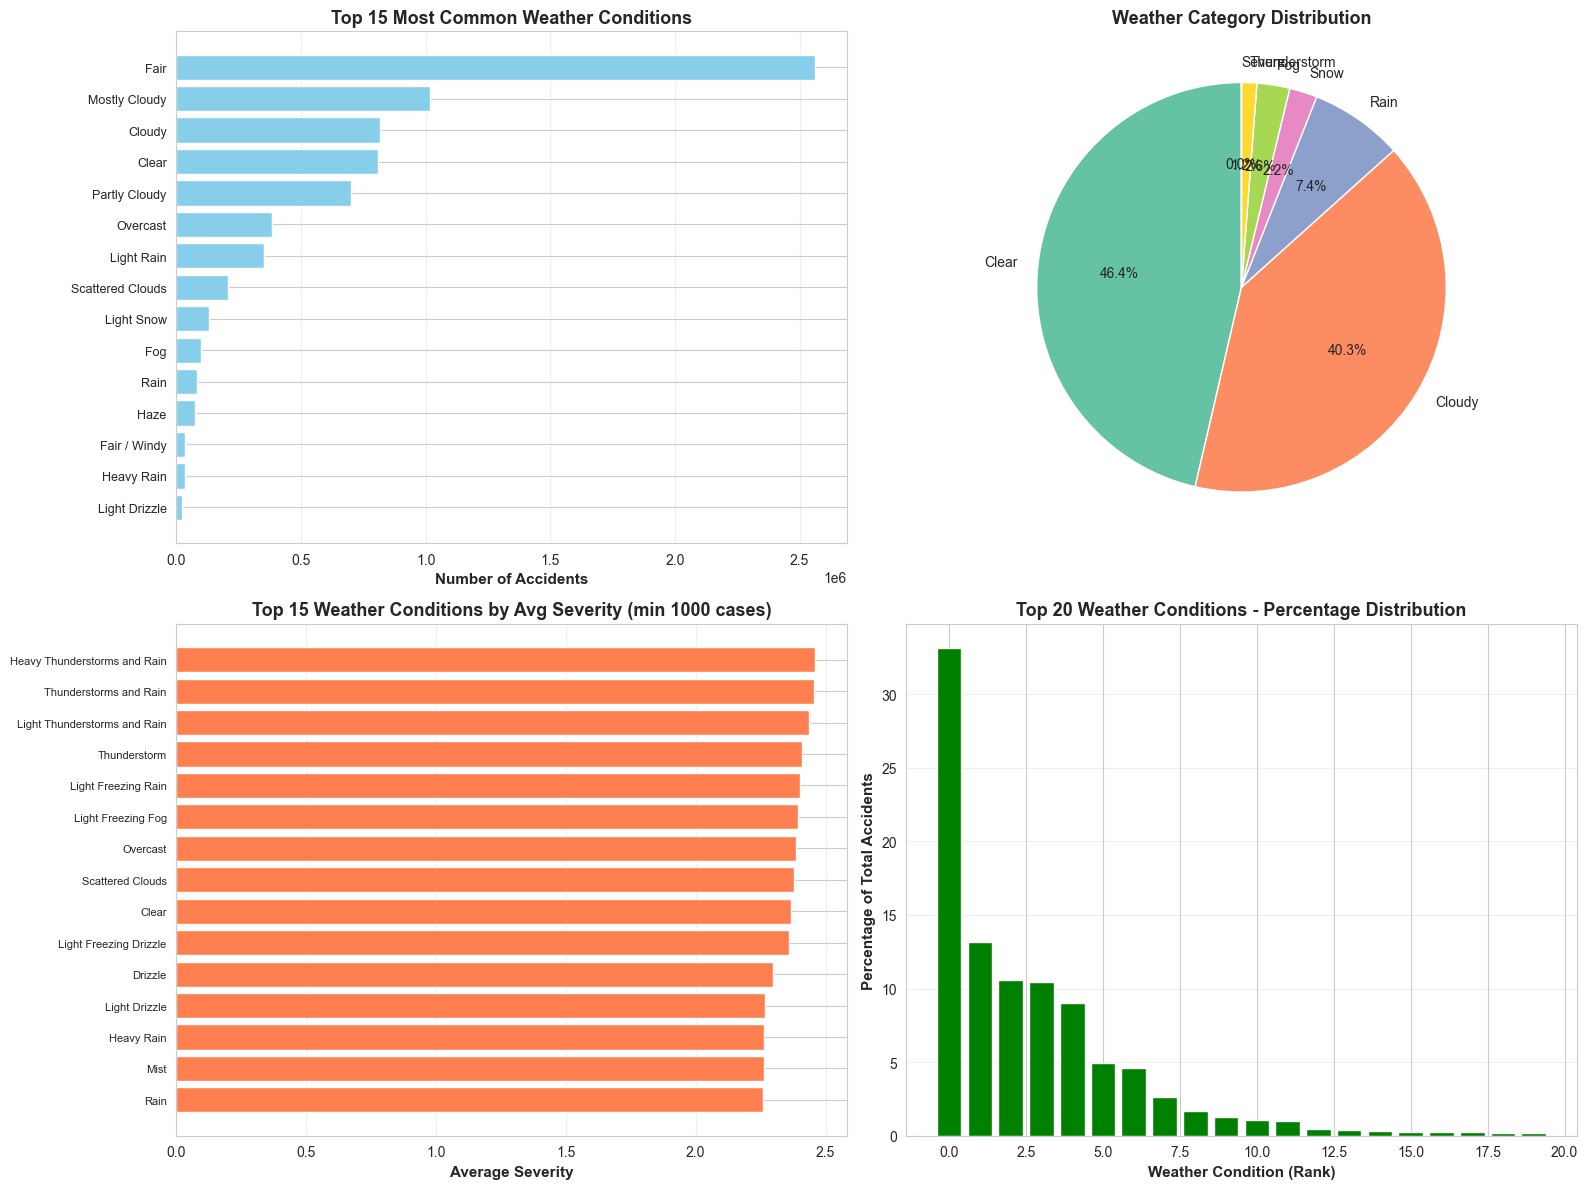


2. TEMPERATURE ANALYSIS

🌡️  Temperature Statistics:
--------------------------------------------------------------------------------
  Count: 7,564,541
  Mean: 61.7°F
  Median: 64.0°F
  Std Dev: 19.0°F
  Min: -89.0°F
  Max: 207.0°F
  25th percentile: 49.0°F
  75th percentile: 76.0°F

🌡️  Accidents by Temperature Range:
--------------------------------------------------------------------------------
   Temperature Range |        Count | Percentage
--------------------------------------------------------------------------------
 <0°F
(Extreme Cold) |       22,230 |      0.29%
   0-32°F
(Freezing) |      593,783 |      7.68%
      32-50°F
(Cold) |    1,429,653 |     18.50%
  50-70°F
(Moderate) |    2,728,396 |     35.30%
      70-90°F
(Warm) |    2,527,613 |     32.71%
         >90°F
(Hot) |      262,822 |      3.40%

⚠️  Average Severity by Temperature Range:
--------------------------------------------------------------------------------
  <0°F
(Extreme Cold) : Avg Severity 2.165 (22,

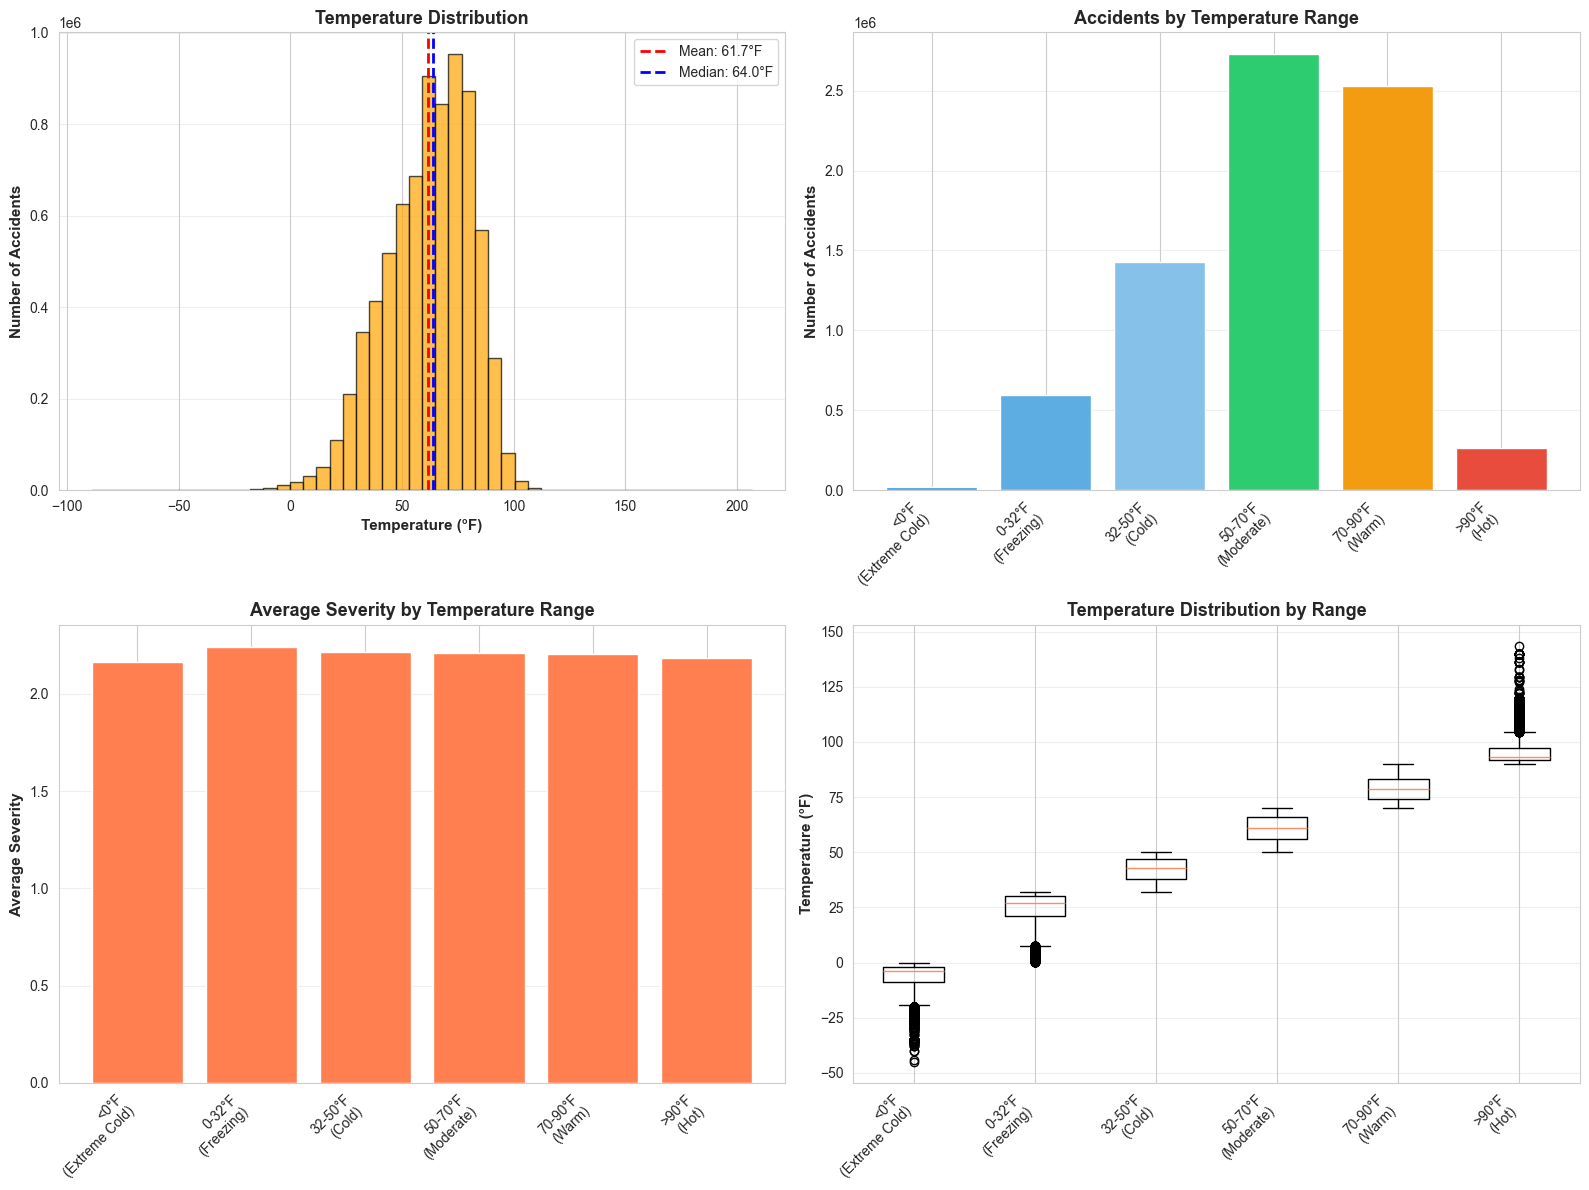


3. VISIBILITY ANALYSIS

👁️  Visibility Statistics:
--------------------------------------------------------------------------------
  Count: 7,551,296
  Mean: 9.09 miles
  Median: 10.00 miles
  Std Dev: 2.69 miles
  Min: 0.00 miles
  Max: 140.00 miles

👁️  Accidents by Visibility Range:
--------------------------------------------------------------------------------
    Visibility Range |        Count | Percentage
--------------------------------------------------------------------------------
        <1 mi
(Poor) |      219,688 |      2.84%
        1-2 mi
(Low) |      148,192 |      1.92%
   2-5 mi
(Moderate) |      400,197 |      5.18%
      5-10 mi
(Good) |    6,752,374 |     87.37%
  >10 mi
(Excellent) |       20,798 |      0.27%

🌫️  Low Visibility Conditions:
  Below 1 mile: 117,131 accidents (1.52%)
  Below 0.5 miles: 50,993 accidents (0.66%)

⚠️  Average Severity by Visibility Range:
--------------------------------------------------------------------------------
  <1 mi
(Poor

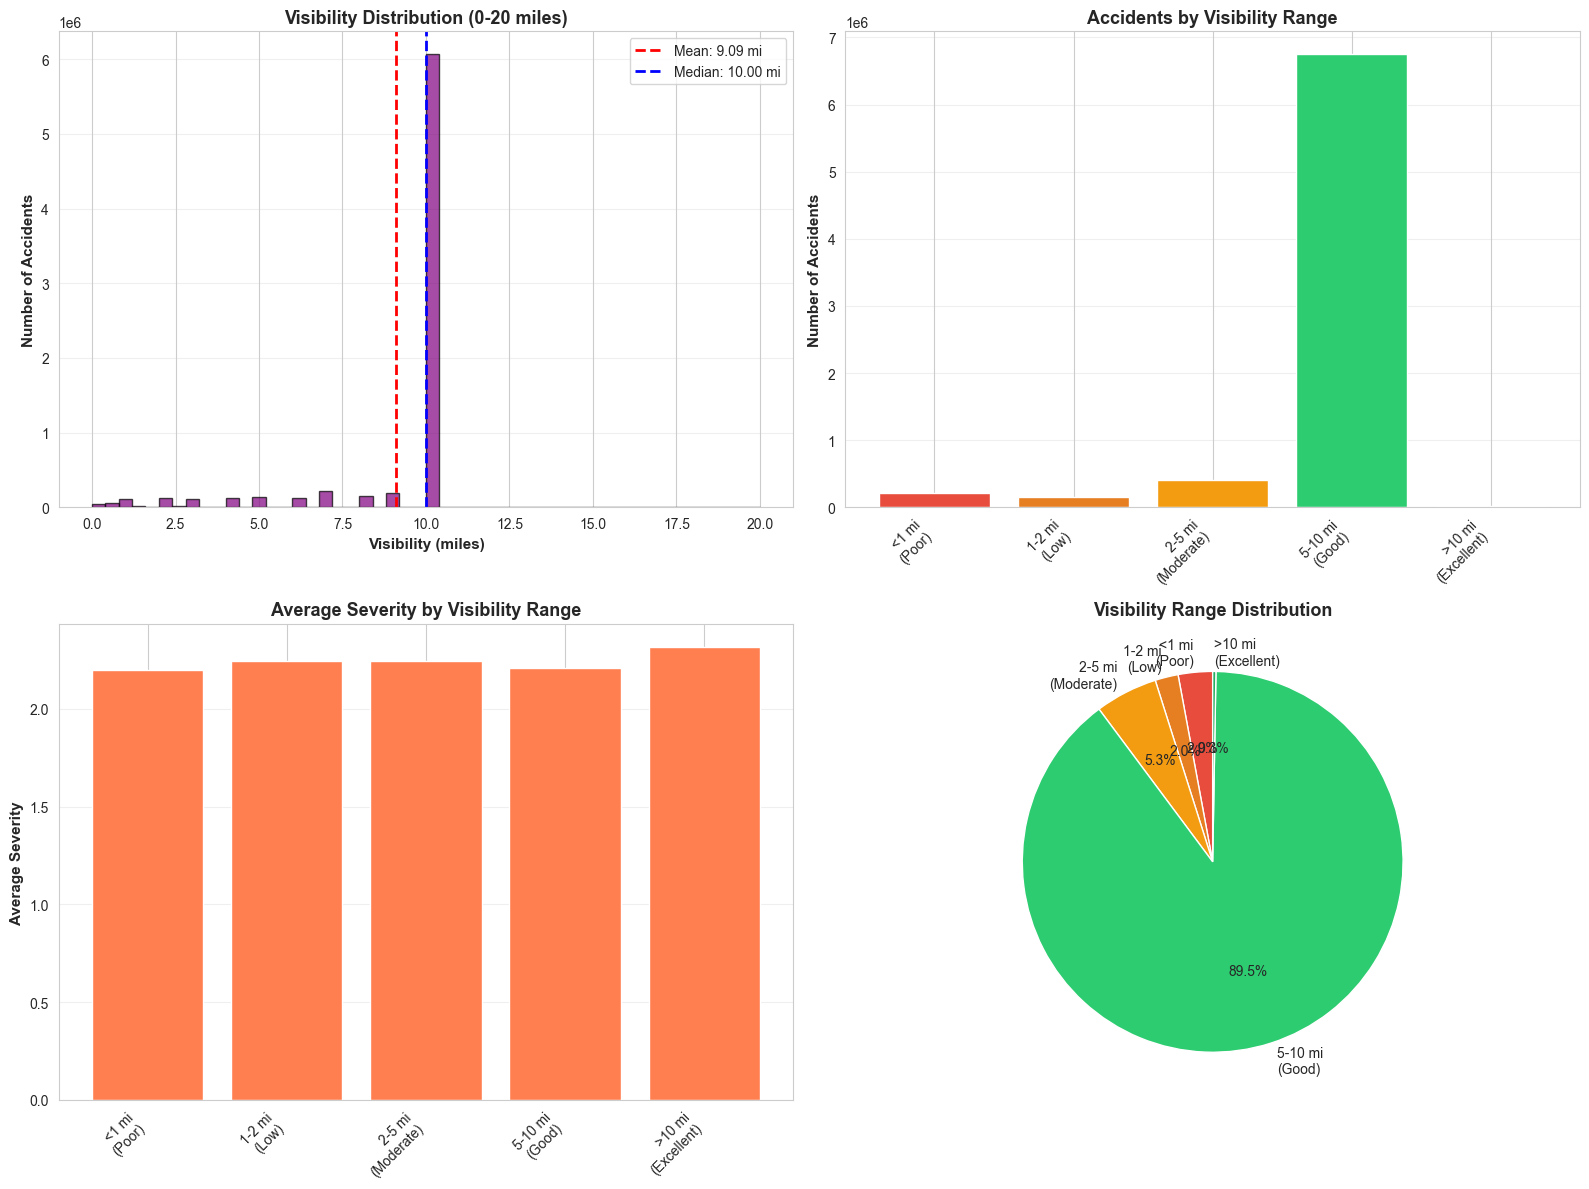


4. PRECIPITATION ANALYSIS

🌧️  Precipitation Statistics:
--------------------------------------------------------------------------------
  Count: 5,524,808
  Mean: 0.008 inches
  Median: 0.000 inches
  Std Dev: 0.110 inches
  Min: 0.000 inches
  Max: 36.470 inches

🌧️  Precipitation Presence:
--------------------------------------------------------------------------------
  No Precipitation: 4,991,718 (64.59%)
  With Precipitation: 533,090 (6.90%)

🌧️  Precipitation Intensity (when present):
--------------------------------------------------------------------------------
  Light
(0-0.1")      :    427,212 (80.14%)
  Moderate
(0.1-0.5") :     95,709 (17.95%)
  Heavy
(0.5-1")      :      7,812 ( 1.47%)
  Very Heavy
(>1")    :      1,850 ( 0.35%)

⚠️  Average Severity:
  No Precipitation: 2.147
  With Precipitation: 2.249
  Difference: +0.102


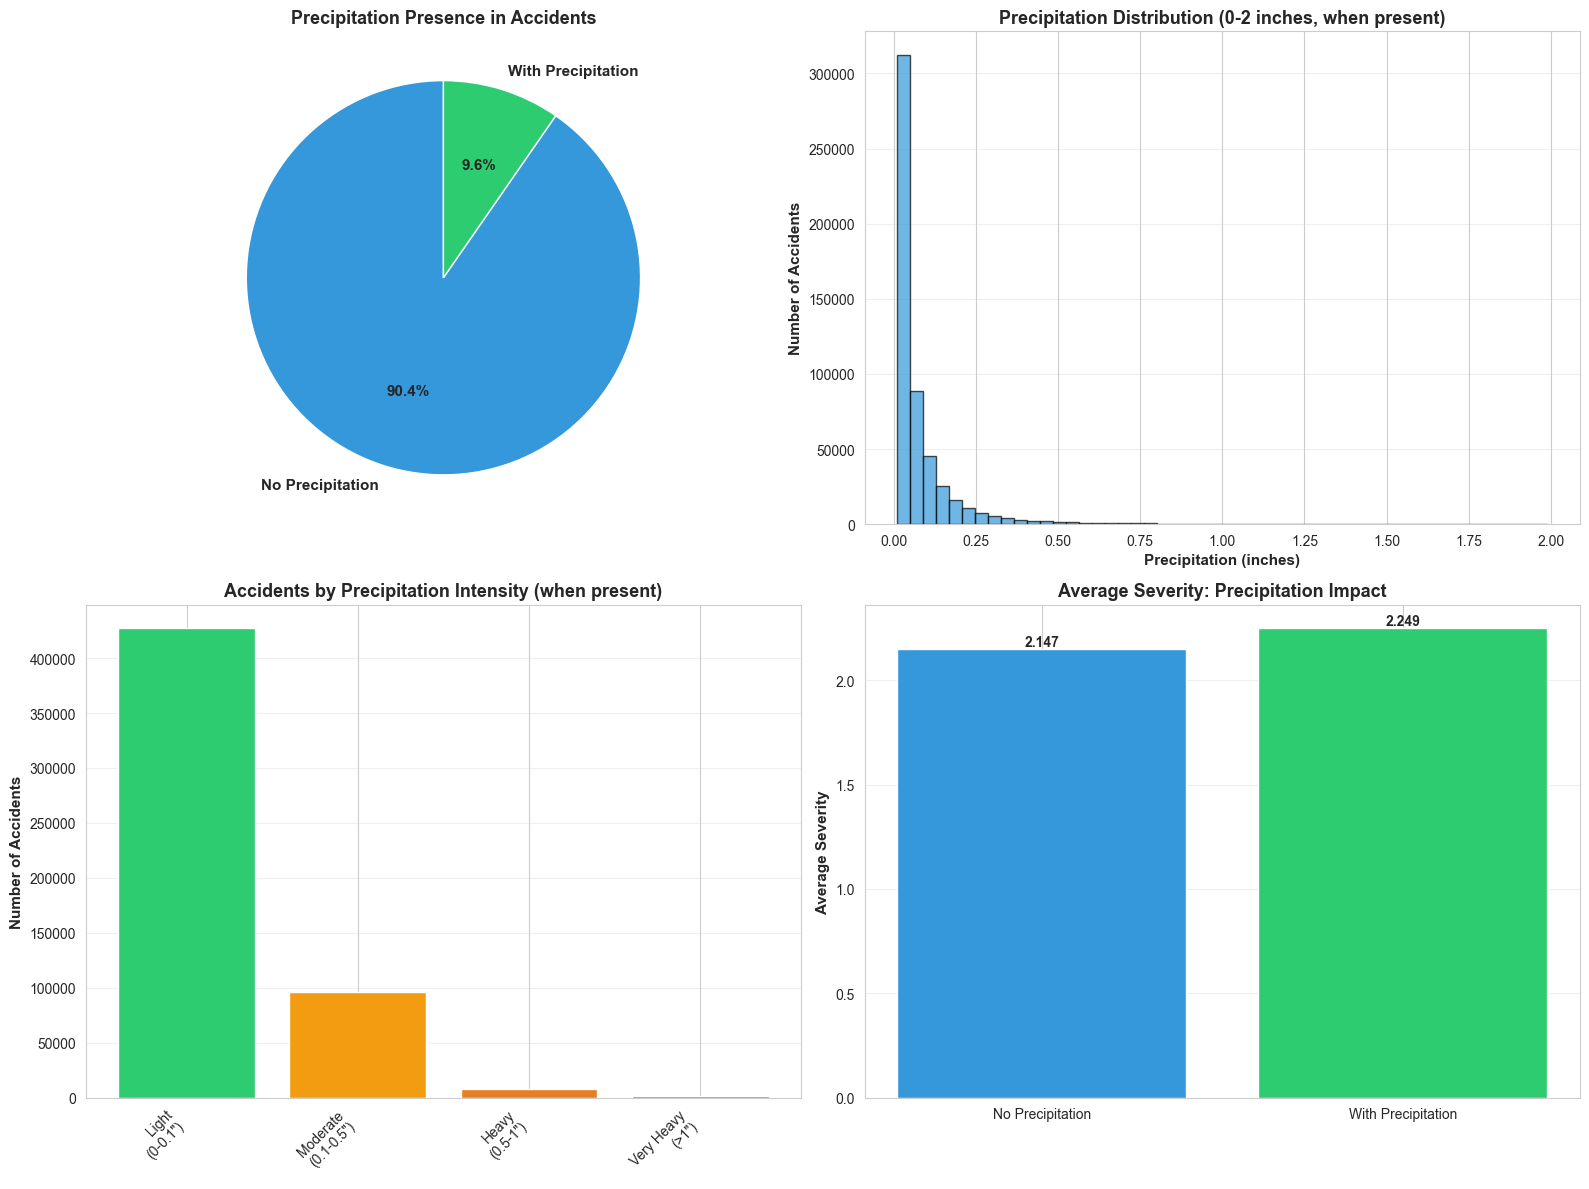


5. WIND ANALYSIS

💨 Wind Speed Statistics:
--------------------------------------------------------------------------------
  Count: 7,157,161
  Mean: 7.69 mph
  Median: 7.00 mph
  Std Dev: 5.42 mph
  Min: 0.00 mph
  Max: 1087.00 mph

💨 Accidents by Wind Speed Range:
--------------------------------------------------------------------------------
         Wind Speed Range |        Count | Percentage
--------------------------------------------------------------------------------
            Calm
(<5 mph) |    2,433,832 |     31.49%
         Light
(5-15 mph) |    4,178,184 |     54.06%
     Moderate
(15-25 mph) |      512,245 |      6.63%
       Strong
(25-35 mph) |       29,868 |      0.39%
    Very Strong
(>35 mph) |        2,998 |      0.04%

🌪️  High Wind Conditions:
  Above 35 mph: 3,032 accidents (0.04%)
  Above 50 mph: 342 accidents (0.00%)

🧭 Top 10 Wind Directions:
--------------------------------------------------------------------------------
  CALM    :    961,624 (12.44%)


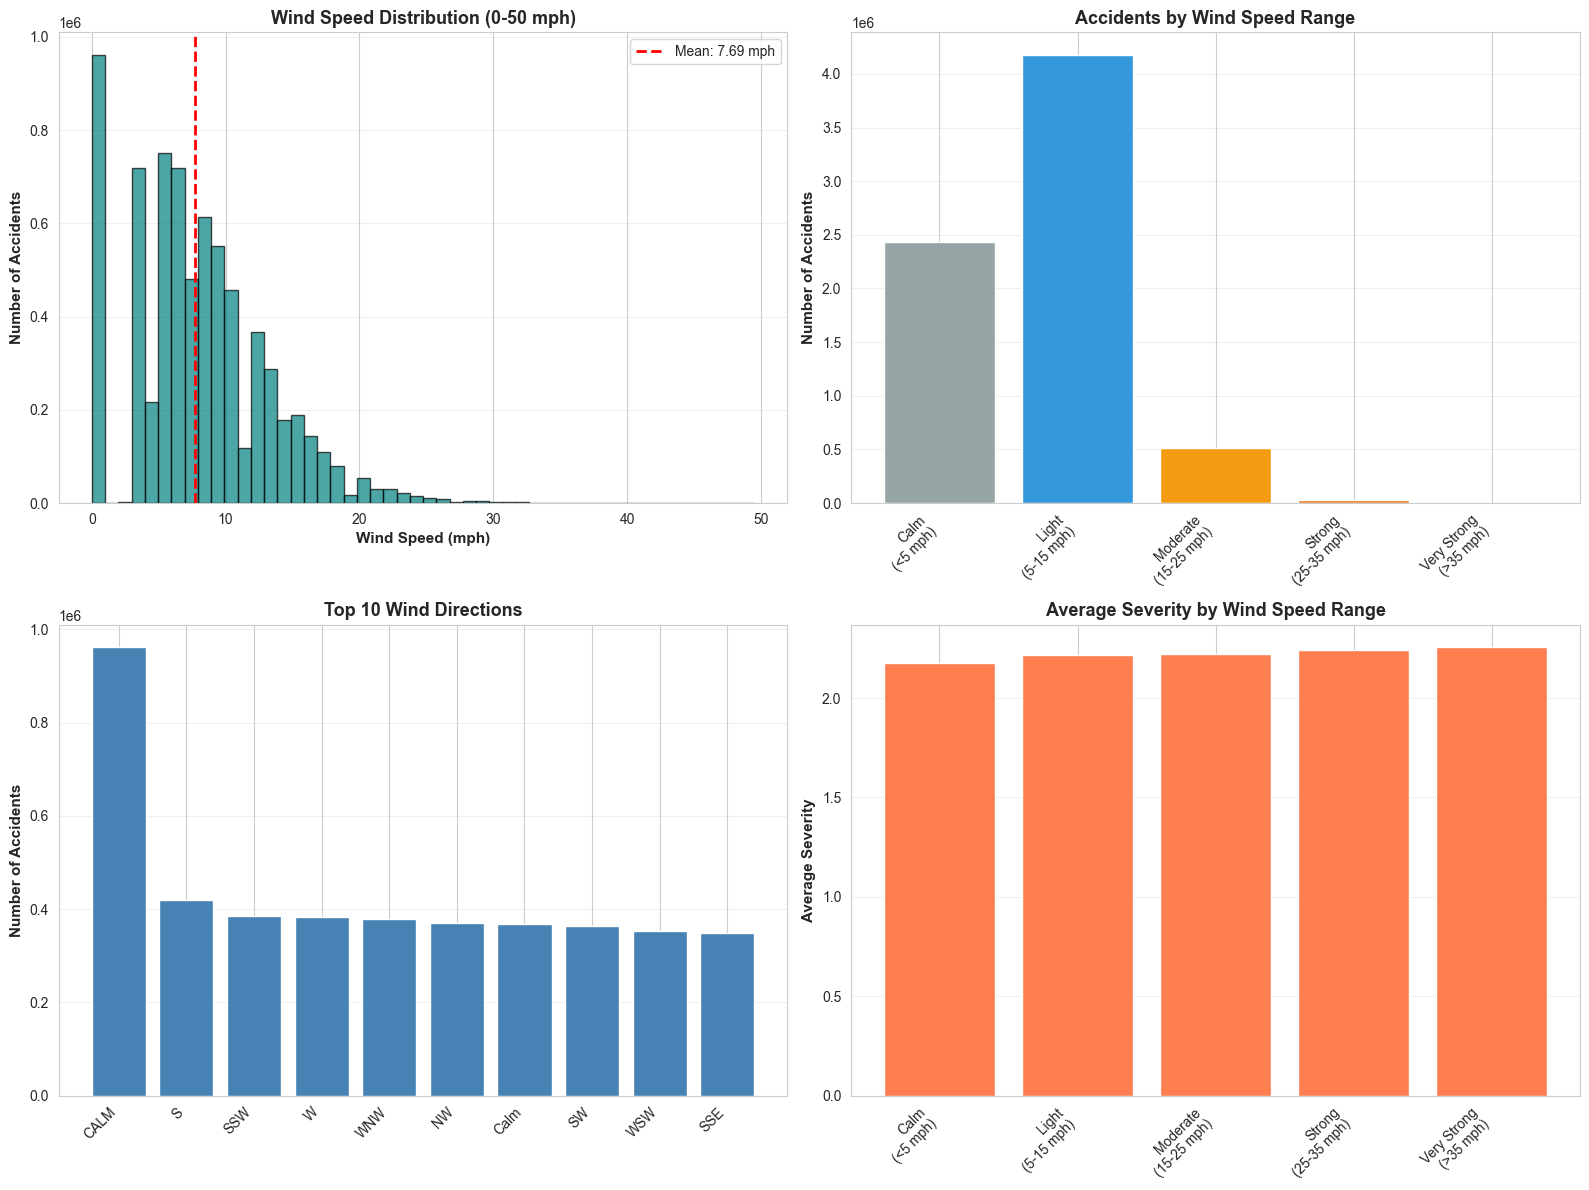


6. HUMIDITY AND PRESSURE ANALYSIS

💧 Humidity Statistics:
--------------------------------------------------------------------------------
  Count: 7,554,250
  Mean: 64.8%
  Median: 67.0%
  Std Dev: 22.8%
  Min: 1.0%
  Max: 100.0%

💧 Accidents by Humidity Range:
--------------------------------------------------------------------------------
  Low
(<30%)          :    662,468 ( 8.57%)
  Moderate
(30-60%)   :  2,421,138 (31.33%)
  High
(60-80%)       :  2,138,571 (27.67%)
  Very High
(>80%)    :  2,332,073 (30.18%)

🌡️  Atmospheric Pressure Statistics:
--------------------------------------------------------------------------------
  Count: 7,587,715
  Mean: 29.54 inches
  Median: 29.86 inches
  Std Dev: 1.01 inches
  Min: 0.00 inches
  Max: 58.63 inches

🌡️  Accidents by Pressure Range:
--------------------------------------------------------------------------------
  Low
(<29.5")        :  2,262,921 (29.28%)
  Normal
(29.5-30")   :  3,121,107 (40.38%)
  High
(30-30.5")     :  2,163,2

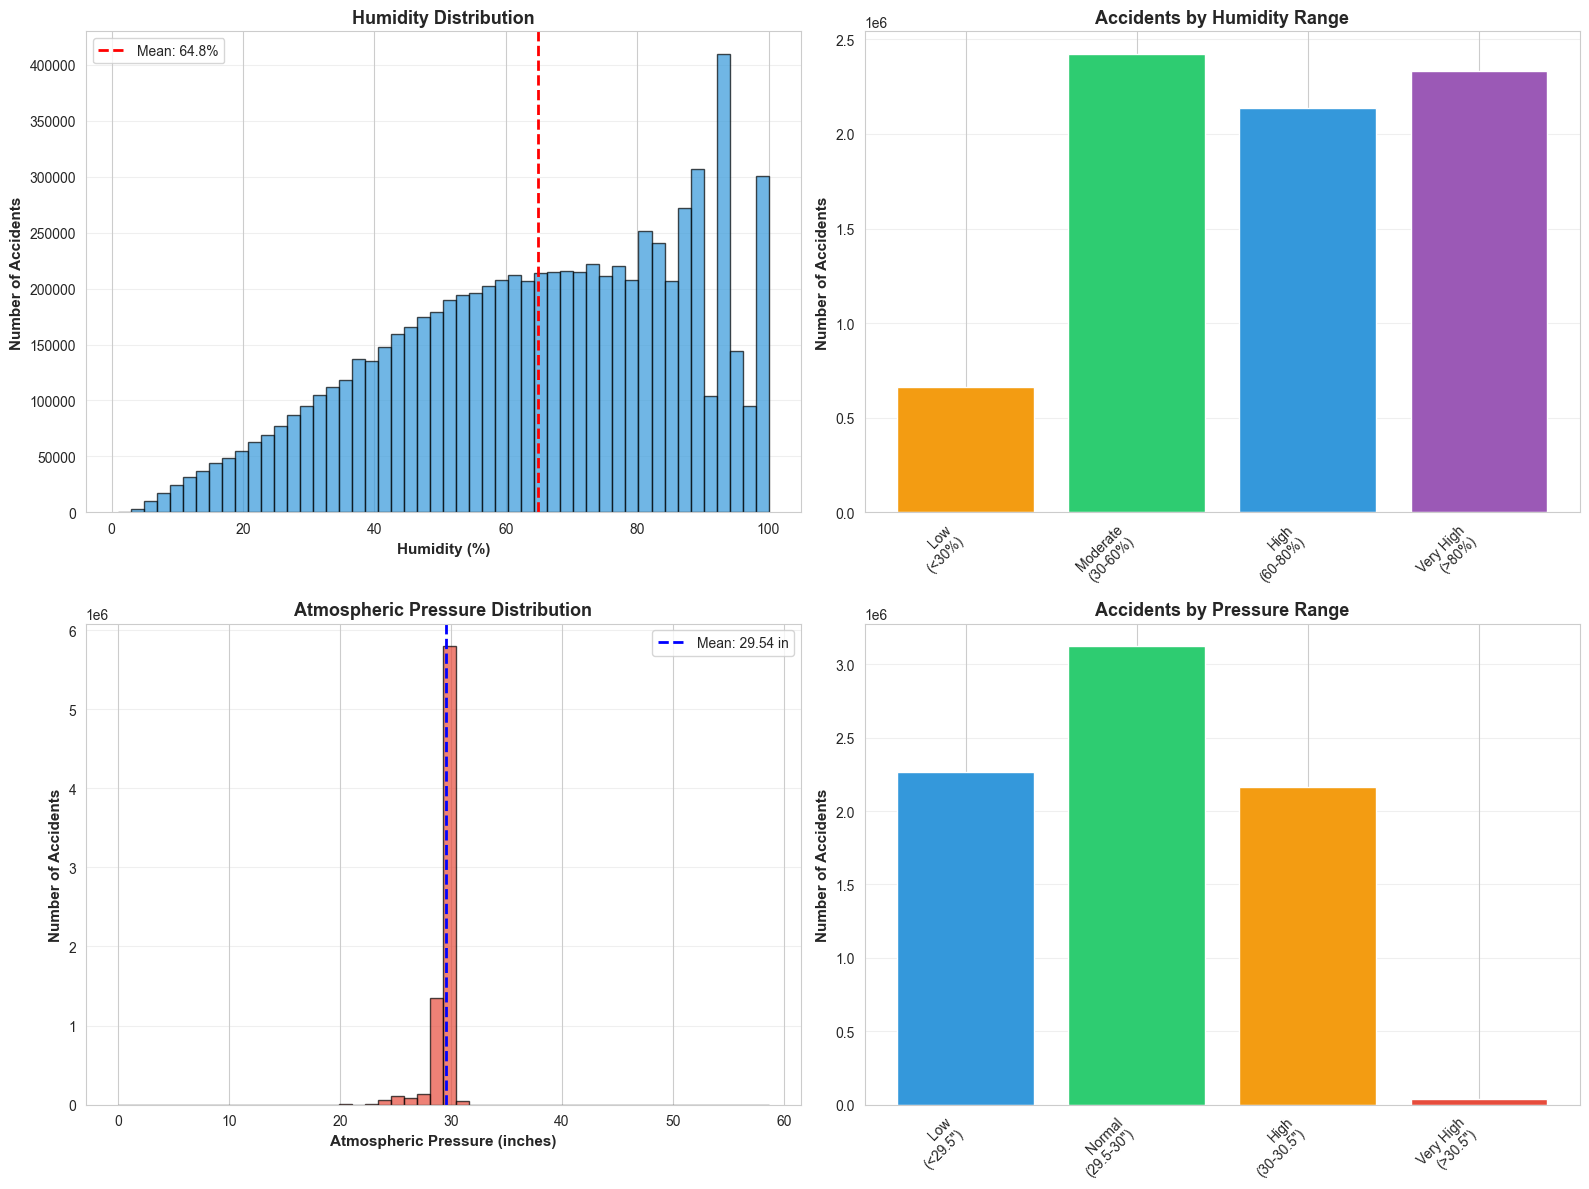


7. WEATHER VARIABLE CORRELATIONS

📊 Correlation Matrix:
--------------------------------------------------------------------------------
                   Temperature(F)  Wind_Chill(F)  Humidity(%)  Pressure(in)  \
Temperature(F)              1.000          0.994       -0.331         0.109   
Wind_Chill(F)               0.994          1.000       -0.315         0.087   
Humidity(%)                -0.331         -0.315        1.000         0.116   
Pressure(in)                0.109          0.087        0.116         1.000   
Visibility(mi)              0.217          0.234       -0.384         0.038   
Wind_Speed(mph)             0.034         -0.043       -0.172        -0.023   
Precipitation(in)          -0.005         -0.012        0.077         0.017   
Severity                   -0.020         -0.070        0.022         0.042   

                   Visibility(mi)  Wind_Speed(mph)  Precipitation(in)  \
Temperature(F)              0.217            0.034             -0.005   
Wind

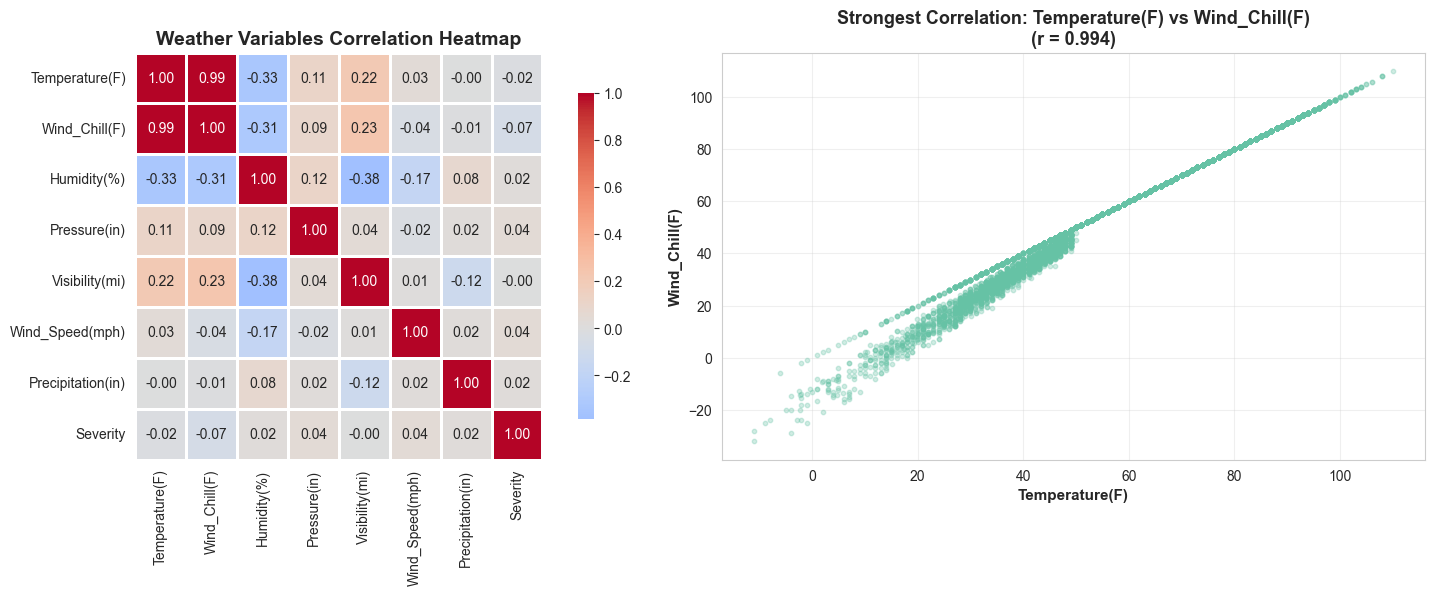


8. WEATHER ANALYSIS SUMMARY

WEATHER IMPACT ANALYSIS SUMMARY
US Accidents Dataset - Traffic Accident Risk Predictor
Generated: 2025-11-04 21:12:22

1. WEATHER CONDITIONS
--------------------------------------------------------------------------------
   Total Unique Conditions: 144
   Top 3 Conditions:
      1. Fair: 2,560,802 (33.13%)
      2. Mostly Cloudy: 1,016,195 (13.15%)
      3. Cloudy: 817,082 (10.57%)


2. TEMPERATURE
--------------------------------------------------------------------------------
   Mean: 61.7°F
   Range: -89.0°F to 207.0°F
   Extreme Cold (<0°F): 19,478 accidents
   Extreme Hot (>100°F): 26,092 accidents


3. VISIBILITY
--------------------------------------------------------------------------------
   Mean: 9.09 miles
   Poor Visibility (<1 mi): 117,131 accidents (1.52%)


4. PRECIPITATION
--------------------------------------------------------------------------------
   With Precipitation: 533,090 (6.90%)
   No Precipitation: 4,991,718 (64.59%)


5. WIN

In [15]:
# Run complete analysis
analyzer = WeatherAnalysis(dataset)
analyzer.run_complete_analysis()

## Geographic Analysis

In [16]:
"""
EDA Part 2: Geographic Analysis (Notebook Version)
US Accidents Dataset - Traffic Accident Risk Predictor
Project Partners: Diparna Adhikary and Maddy Nommer

Goal: Analyze geographic patterns in accidents to understand:
- State-level distribution and hotspots
- City-level patterns
- County analysis
- Coordinate-based patterns
- Distance analysis
- Geographic clustering
- Regional differences

Usage in Notebook:
------------------
import pandas as pd
from eda_part2_geographic_analysis import GeographicAnalysis

df = pd.read_csv('US_Accidents.csv')
analyzer = GeographicAnalysis(df)
analyzer.run_complete_analysis()
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
sns.set_style('whitegrid')
sns.set_palette('Set2')
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 10

class GeographicAnalysis:
    """
    Comprehensive Geographic Analysis for US Accidents Dataset (Notebook Version)
    Works directly with DataFrame, displays plots inline
    """
    
    def __init__(self, df):
        """
        Initialize with DataFrame
        
        Parameters:
        -----------
        df : pandas.DataFrame
            US Accidents dataset
        """
        print("="*80)
        print("EDA PART 2: GEOGRAPHIC ANALYSIS")
        print("US Accidents Dataset - Traffic Accident Risk Predictor")
        print("="*80)
        
        self.df = df.copy()
        print(f"\n✓ DataFrame loaded: {self.df.shape[0]:,} rows × {self.df.shape[1]} columns")
        
        # Check available geographic columns
        self._check_geographic_columns()
    
    def _check_geographic_columns(self):
        """
        Check which geographic columns are available
        """
        self.geo_cols = {
            'State': 'State' in self.df.columns,
            'City': 'City' in self.df.columns,
            'County': 'County' in self.df.columns,
            'Zipcode': 'Zipcode' in self.df.columns,
            'Start_Lat': 'Start_Lat' in self.df.columns,
            'Start_Lng': 'Start_Lng' in self.df.columns,
            'Distance(mi)': 'Distance(mi)' in self.df.columns,
            'Street': 'Street' in self.df.columns
        }
        
        available = [col for col, exists in self.geo_cols.items() if exists]
        print(f"\n✓ Available geographic columns: {len(available)}/{len(self.geo_cols)}")
        for col in available:
            print(f"  • {col}")
    
    def state_level_analysis(self):
        """
        Analyze accident patterns at state level
        """
        print("\n" + "="*80)
        print("1. STATE-LEVEL ANALYSIS")
        print("="*80)
        
        if not self.geo_cols['State']:
            print("✗ State column not available!")
            return
        
        # State distribution
        state_counts = self.df['State'].value_counts()
        state_percent = (state_counts / len(self.df) * 100).round(2)
        
        print(f"\n🗺️  Total States Covered: {len(state_counts)}")
        print(f"\nTop 20 States by Accident Count:")
        print("-"*80)
        print(f"{'Rank':>4} | {'State':>6} | {'Count':>12} | {'Percentage':>10} | Distribution")
        print("-"*80)
        
        for i, (state, count) in enumerate(state_counts.head(20).items(), 1):
            pct = state_percent[state]
            bar = "█" * int(pct / 2)
            print(f"{i:>4} | {state:>6} | {count:>12,} | {pct:>9.2f}% | {bar}")
        
        # Bottom 10 states
        print(f"\nBottom 10 States by Accident Count:")
        print("-"*80)
        for i, (state, count) in enumerate(state_counts.tail(10).items(), 1):
            pct = state_percent[state]
            print(f"  {i:2d}. {state}: {count:,} ({pct:.2f}%)")
        
        # Concentration analysis
        top_5_pct = state_counts.head(5).sum() / len(self.df) * 100
        top_10_pct = state_counts.head(10).sum() / len(self.df) * 100
        
        print(f"\n📊 Concentration Metrics:")
        print(f"  Top 5 states account for: {top_5_pct:.2f}% of all accidents")
        print(f"  Top 10 states account for: {top_10_pct:.2f}% of all accidents")
        
        # Severity by state (if available)
        if 'Severity' in self.df.columns:
            print(f"\n⚠️  Average Severity by State (Top 15 by accident count):")
            print("-"*80)
            top_15_states = state_counts.head(15).index
            state_severity = self.df[self.df['State'].isin(top_15_states)].groupby('State')['Severity'].agg(['mean', 'count'])
            state_severity = state_severity.sort_values('mean', ascending=False)
            
            for i, (state, row) in enumerate(state_severity.iterrows(), 1):
                print(f"  {i:2d}. {state}: Avg Severity {row['mean']:.3f} ({row['count']:,} accidents)")
        
        # Visualizations
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        
        # Top 20 states bar chart
        top_20 = state_counts.head(20)
        axes[0, 0].barh(range(len(top_20)), top_20.values, color='steelblue')
        axes[0, 0].set_yticks(range(len(top_20)))
        axes[0, 0].set_yticklabels(top_20.index)
        axes[0, 0].set_xlabel('Number of Accidents', fontsize=11, fontweight='bold')
        axes[0, 0].set_title('Top 20 States by Accident Count', fontsize=13, fontweight='bold')
        axes[0, 0].invert_yaxis()
        axes[0, 0].grid(True, alpha=0.3, axis='x')
        
        # Top 10 states pie chart
        top_10 = state_counts.head(10)
        other = state_counts[10:].sum()
        pie_data = list(top_10.values) + [other]
        pie_labels = list(top_10.index) + ['Others']
        
        axes[0, 1].pie(pie_data, labels=pie_labels, autopct='%1.1f%%', startangle=90)
        axes[0, 1].set_title('Top 10 States Distribution', fontsize=13, fontweight='bold')
        
        # Percentage distribution
        top_30_pct = state_percent.head(30)
        axes[1, 0].bar(range(len(top_30_pct)), top_30_pct.values, color='coral')
        axes[1, 0].set_xlabel('State (Rank)', fontsize=11, fontweight='bold')
        axes[1, 0].set_ylabel('Percentage of Total Accidents', fontsize=11, fontweight='bold')
        axes[1, 0].set_title('Top 30 States - Percentage Distribution', fontsize=13, fontweight='bold')
        axes[1, 0].grid(True, alpha=0.3, axis='y')
        
        # Severity by state (if available)
        if 'Severity' in self.df.columns:
            top_15_severity = state_severity.head(15)
            axes[1, 1].barh(range(len(top_15_severity)), top_15_severity['mean'].values, color='#e74c3c')
            axes[1, 1].set_yticks(range(len(top_15_severity)))
            axes[1, 1].set_yticklabels(top_15_severity.index)
            axes[1, 1].set_xlabel('Average Severity', fontsize=11, fontweight='bold')
            axes[1, 1].set_title('Top 15 States by Average Severity', fontsize=13, fontweight='bold')
            axes[1, 1].invert_yaxis()
            axes[1, 1].grid(True, alpha=0.3, axis='x')
        
        plt.tight_layout()
        plt.show()
    
    def city_level_analysis(self):
        """
        Analyze accident patterns at city level
        """
        print("\n" + "="*80)
        print("2. CITY-LEVEL ANALYSIS")
        print("="*80)
        
        if not self.geo_cols['City']:
            print("✗ City column not available!")
            return
        
        # City distribution
        city_counts = self.df['City'].value_counts()
        city_percent = (city_counts / len(self.df) * 100).round(2)
        
        print(f"\n🏙️  Total Cities Covered: {len(city_counts):,}")
        print(f"\nTop 30 Cities by Accident Count:")
        print("-"*80)
        print(f"{'Rank':>4} | {'City':>30} | {'Count':>12} | {'Percentage':>10}")
        print("-"*80)
        
        for i, (city, count) in enumerate(city_counts.head(30).items(), 1):
            pct = city_percent[city]
            print(f"{i:>4} | {city:>30} | {count:>12,} | {pct:>9.2f}%")
        
        # Cities with state info (if available)
        if self.geo_cols['State']:
            print(f"\n🏙️  Top 15 Cities with State:")
            print("-"*80)
            city_state_counts = self.df.groupby(['City', 'State']).size().sort_values(ascending=False).head(15)
            
            for i, ((city, state), count) in enumerate(city_state_counts.items(), 1):
                pct = (count / len(self.df)) * 100
                print(f"  {i:2d}. {city}, {state}: {count:,} ({pct:.2f}%)")
        
        # Concentration analysis
        top_10_cities_pct = city_counts.head(10).sum() / len(self.df) * 100
        top_50_cities_pct = city_counts.head(50).sum() / len(self.df) * 100
        top_100_cities_pct = city_counts.head(100).sum() / len(self.df) * 100
        
        print(f"\n📊 City Concentration:")
        print(f"  Top 10 cities: {top_10_cities_pct:.2f}% of accidents")
        print(f"  Top 50 cities: {top_50_cities_pct:.2f}% of accidents")
        print(f"  Top 100 cities: {top_100_cities_pct:.2f}% of accidents")
        
        # Cities with few accidents
        cities_with_1 = (city_counts == 1).sum()
        cities_less_10 = (city_counts < 10).sum()
        
        print(f"\n📉 Low Accident Cities:")
        print(f"  Cities with only 1 accident: {cities_with_1:,}")
        print(f"  Cities with <10 accidents: {cities_less_10:,}")
        
        # Severity by city (if available)
        if 'Severity' in self.df.columns:
            print(f"\n⚠️  Average Severity by City (Top 20, min 1000 accidents):")
            print("-"*80)
            city_severity = self.df.groupby('City')['Severity'].agg(['mean', 'count'])
            city_severity_filtered = city_severity[city_severity['count'] >= 1000].sort_values('mean', ascending=False).head(20)
            
            for i, (city, row) in enumerate(city_severity_filtered.iterrows(), 1):
                print(f"  {i:2d}. {city:30s}: {row['mean']:.3f} ({row['count']:,} accidents)")
        
        # Visualizations
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        
        # Top 25 cities
        top_25 = city_counts.head(25)
        axes[0, 0].barh(range(len(top_25)), top_25.values, color='#3498db')
        axes[0, 0].set_yticks(range(len(top_25)))
        axes[0, 0].set_yticklabels(top_25.index, fontsize=8)
        axes[0, 0].set_xlabel('Number of Accidents', fontsize=11, fontweight='bold')
        axes[0, 0].set_title('Top 25 Cities by Accident Count', fontsize=13, fontweight='bold')
        axes[0, 0].invert_yaxis()
        axes[0, 0].grid(True, alpha=0.3, axis='x')
        
        # Distribution histogram
        # Filter to cities with reasonable counts for visualization
        city_counts_filtered = city_counts[city_counts >= 10]
        axes[0, 1].hist(city_counts_filtered, bins=50, color='#2ecc71', edgecolor='black', alpha=0.7)
        axes[0, 1].set_xlabel('Number of Accidents', fontsize=11, fontweight='bold')
        axes[0, 1].set_ylabel('Number of Cities', fontsize=11, fontweight='bold')
        axes[0, 1].set_title('Distribution of Accident Counts Across Cities (≥10 accidents)', 
                            fontsize=13, fontweight='bold')
        axes[0, 1].set_yscale('log')
        axes[0, 1].grid(True, alpha=0.3)
        
        # Cumulative percentage
        cumsum = city_counts.cumsum()
        cumsum_pct = (cumsum / len(self.df) * 100)
        
        axes[1, 0].plot(range(len(cumsum_pct[:200])), cumsum_pct[:200].values, linewidth=2, color='#e74c3c')
        axes[1, 0].axhline(y=50, color='blue', linestyle='--', label='50%')
        axes[1, 0].axhline(y=80, color='green', linestyle='--', label='80%')
        axes[1, 0].set_xlabel('Number of Cities (Ranked)', fontsize=11, fontweight='bold')
        axes[1, 0].set_ylabel('Cumulative Percentage of Accidents', fontsize=11, fontweight='bold')
        axes[1, 0].set_title('Cumulative Distribution (Top 200 Cities)', fontsize=13, fontweight='bold')
        axes[1, 0].legend()
        axes[1, 0].grid(True, alpha=0.3)
        
        # Severity by city (if available)
        if 'Severity' in self.df.columns and len(city_severity_filtered) > 0:
            top_20_city_sev = city_severity_filtered.head(20)
            axes[1, 1].barh(range(len(top_20_city_sev)), top_20_city_sev['mean'].values, color='coral')
            axes[1, 1].set_yticks(range(len(top_20_city_sev)))
            axes[1, 1].set_yticklabels(top_20_city_sev.index, fontsize=8)
            axes[1, 1].set_xlabel('Average Severity', fontsize=11, fontweight='bold')
            axes[1, 1].set_title('Top 20 Cities by Avg Severity (min 1000 accidents)', 
                                fontsize=13, fontweight='bold')
            axes[1, 1].invert_yaxis()
            axes[1, 1].grid(True, alpha=0.3, axis='x')
        
        plt.tight_layout()
        plt.show()
    
    def county_analysis(self):
        """
        Analyze accident patterns at county level
        """
        print("\n" + "="*80)
        print("3. COUNTY-LEVEL ANALYSIS")
        print("="*80)
        
        if not self.geo_cols['County']:
            print("✗ County column not available!")
            return
        
        # County distribution
        county_counts = self.df['County'].value_counts()
        county_percent = (county_counts / len(self.df) * 100).round(2)
        
        print(f"\n🏛️  Total Counties Covered: {len(county_counts):,}")
        print(f"\nTop 20 Counties by Accident Count:")
        print("-"*80)
        print(f"{'Rank':>4} | {'County':>30} | {'Count':>12} | {'Percentage':>10}")
        print("-"*80)
        
        for i, (county, count) in enumerate(county_counts.head(20).items(), 1):
            pct = county_percent[county]
            print(f"{i:>4} | {county:>30} | {count:>12,} | {pct:>9.2f}%")
        
        # Concentration
        top_10_counties_pct = county_counts.head(10).sum() / len(self.df) * 100
        top_50_counties_pct = county_counts.head(50).sum() / len(self.df) * 100
        
        print(f"\n📊 County Concentration:")
        print(f"  Top 10 counties: {top_10_counties_pct:.2f}% of accidents")
        print(f"  Top 50 counties: {top_50_counties_pct:.2f}% of accidents")
        
        # Visualizations
        fig, axes = plt.subplots(1, 2, figsize=(16, 6))
        
        # Top 20 counties
        top_20 = county_counts.head(20)
        axes[0].barh(range(len(top_20)), top_20.values, color='#9b59b6')
        axes[0].set_yticks(range(len(top_20)))
        axes[0].set_yticklabels(top_20.index, fontsize=9)
        axes[0].set_xlabel('Number of Accidents', fontsize=11, fontweight='bold')
        axes[0].set_title('Top 20 Counties by Accident Count', fontsize=13, fontweight='bold')
        axes[0].invert_yaxis()
        axes[0].grid(True, alpha=0.3, axis='x')
        
        # Top 15 counties pie chart
        top_15 = county_counts.head(15)
        other = county_counts[15:].sum()
        pie_data = list(top_15.values) + [other]
        pie_labels = list(top_15.index) + ['Others']
        
        axes[1].pie(pie_data, labels=pie_labels, autopct='%1.1f%%', startangle=90)
        axes[1].set_title('Top 15 Counties Distribution', fontsize=13, fontweight='bold')
        
        plt.tight_layout()
        plt.show()
    
    def coordinate_analysis(self):
        """
        Analyze coordinate-based patterns
        """
        print("\n" + "="*80)
        print("4. COORDINATE-BASED ANALYSIS")
        print("="*80)
        
        if not (self.geo_cols['Start_Lat'] and self.geo_cols['Start_Lng']):
            print("✗ Coordinate columns not available!")
            return
        
        # Coordinate statistics
        lat_data = self.df['Start_Lat'].dropna()
        lng_data = self.df['Start_Lng'].dropna()
        
        print(f"\n📍 Latitude Statistics:")
        print("-"*80)
        print(f"  Count: {len(lat_data):,}")
        print(f"  Mean: {lat_data.mean():.4f}°")
        print(f"  Median: {lat_data.median():.4f}°")
        print(f"  Min: {lat_data.min():.4f}°")
        print(f"  Max: {lat_data.max():.4f}°")
        print(f"  Range: {lat_data.max() - lat_data.min():.4f}°")
        
        print(f"\n📍 Longitude Statistics:")
        print("-"*80)
        print(f"  Count: {len(lng_data):,}")
        print(f"  Mean: {lng_data.mean():.4f}°")
        print(f"  Median: {lng_data.median():.4f}°")
        print(f"  Min: {lng_data.min():.4f}°")
        print(f"  Max: {lng_data.max():.4f}°")
        print(f"  Range: {lng_data.max() - lng_data.min():.4f}°")
        
        # Regional analysis (simple latitude-based)
        print(f"\n🗺️  Regional Distribution (Latitude-based):")
        print("-"*80)
        
        regions = {
            'South': (24, 36),
            'Mid-South': (36, 40),
            'Mid-North': (40, 44),
            'North': (44, 50)
        }
        
        for region, (lat_min, lat_max) in regions.items():
            count = ((self.df['Start_Lat'] >= lat_min) & (self.df['Start_Lat'] < lat_max)).sum()
            pct = (count / len(self.df)) * 100
            print(f"  {region:15s} (Lat {lat_min}-{lat_max}°): {count:>10,} ({pct:>5.2f}%)")
        
        # Visualizations
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        
        # Latitude histogram
        axes[0, 0].hist(lat_data, bins=50, color='#3498db', edgecolor='black', alpha=0.7)
        axes[0, 0].axvline(lat_data.mean(), color='red', linestyle='--', linewidth=2, 
                          label=f'Mean: {lat_data.mean():.2f}°')
        axes[0, 0].set_xlabel('Latitude (°)', fontsize=11, fontweight='bold')
        axes[0, 0].set_ylabel('Number of Accidents', fontsize=11, fontweight='bold')
        axes[0, 0].set_title('Latitude Distribution', fontsize=13, fontweight='bold')
        axes[0, 0].legend()
        axes[0, 0].grid(True, alpha=0.3, axis='y')
        
        # Longitude histogram
        axes[0, 1].hist(lng_data, bins=50, color='#2ecc71', edgecolor='black', alpha=0.7)
        axes[0, 1].axvline(lng_data.mean(), color='red', linestyle='--', linewidth=2, 
                          label=f'Mean: {lng_data.mean():.2f}°')
        axes[0, 1].set_xlabel('Longitude (°)', fontsize=11, fontweight='bold')
        axes[0, 1].set_ylabel('Number of Accidents', fontsize=11, fontweight='bold')
        axes[0, 1].set_title('Longitude Distribution', fontsize=13, fontweight='bold')
        axes[0, 1].legend()
        axes[0, 1].grid(True, alpha=0.3, axis='y')
        
        # Scatter plot (sample for performance)
        sample_size = min(50000, len(self.df))
        sample_df = self.df.sample(n=sample_size)
        
        axes[1, 0].scatter(sample_df['Start_Lng'], sample_df['Start_Lat'], 
                          alpha=0.1, s=1, c='blue')
        axes[1, 0].set_xlabel('Longitude (°)', fontsize=11, fontweight='bold')
        axes[1, 0].set_ylabel('Latitude (°)', fontsize=11, fontweight='bold')
        axes[1, 0].set_title(f'Geographic Distribution (Sample: {sample_size:,} points)', 
                            fontsize=13, fontweight='bold')
        axes[1, 0].set_xlim(lng_data.min(), lng_data.max())
        axes[1, 0].set_ylim(lat_data.min(), lat_data.max())
        axes[1, 0].grid(True, alpha=0.3)
        
        # 2D Histogram / Heatmap
        # Create bins for heatmap
        lat_bins = np.linspace(lat_data.min(), lat_data.max(), 50)
        lng_bins = np.linspace(lng_data.min(), lng_data.max(), 50)
        
        hist, xedges, yedges = np.histogram2d(sample_df['Start_Lng'], sample_df['Start_Lat'], 
                                             bins=[lng_bins, lat_bins])
        
        im = axes[1, 1].imshow(hist.T, origin='lower', aspect='auto', cmap='YlOrRd',
                              extent=[lng_data.min(), lng_data.max(), lat_data.min(), lat_data.max()])
        axes[1, 1].set_xlabel('Longitude (°)', fontsize=11, fontweight='bold')
        axes[1, 1].set_ylabel('Latitude (°)', fontsize=11, fontweight='bold')
        axes[1, 1].set_title('Accident Density Heatmap', fontsize=13, fontweight='bold')
        plt.colorbar(im, ax=axes[1, 1], label='Accident Density')
        
        plt.tight_layout()
        plt.show()
    
    def distance_analysis(self):
        """
        Analyze distance affected by accidents
        """
        print("\n" + "="*80)
        print("5. DISTANCE ANALYSIS")
        print("="*80)
        
        if not self.geo_cols['Distance(mi)']:
            print("✗ Distance(mi) column not available!")
            return
        
        # Distance statistics
        dist_data = self.df['Distance(mi)'].dropna()
        
        print(f"\n📏 Distance Statistics:")
        print("-"*80)
        print(f"  Count: {len(dist_data):,}")
        print(f"  Mean: {dist_data.mean():.3f} miles")
        print(f"  Median: {dist_data.median():.3f} miles")
        print(f"  Std Dev: {dist_data.std():.3f} miles")
        print(f"  Min: {dist_data.min():.3f} miles")
        print(f"  Max: {dist_data.max():.3f} miles")
        print(f"  25th percentile: {dist_data.quantile(0.25):.3f} miles")
        print(f"  75th percentile: {dist_data.quantile(0.75):.3f} miles")
        print(f"  95th percentile: {dist_data.quantile(0.95):.3f} miles")
        
        # Distance categories
        dist_bins = [0, 0.1, 0.5, 1, 2, 5, 100]
        dist_labels = ['Very Short\n(<0.1 mi)', 'Short\n(0.1-0.5 mi)', 'Medium\n(0.5-1 mi)', 
                      'Long\n(1-2 mi)', 'Very Long\n(2-5 mi)', 'Extreme\n(>5 mi)']
        self.df['Distance_Bin'] = pd.cut(self.df['Distance(mi)'], bins=dist_bins, labels=dist_labels)
        
        dist_bin_counts = self.df['Distance_Bin'].value_counts().reindex(dist_labels)
        dist_bin_percent = (dist_bin_counts / len(self.df) * 100).round(2)
        
        print(f"\n📏 Accidents by Distance Category:")
        print("-"*80)
        print(f"{'Distance Range':>25} | {'Count':>12} | {'Percentage':>10}")
        print("-"*80)
        for dist_range, count in dist_bin_counts.items():
            pct = dist_bin_percent[dist_range]
            print(f"{dist_range:>25} | {count:>12,} | {pct:>9.2f}%")
        
        # Short vs long distances
        short_dist = (self.df['Distance(mi)'] < 0.5).sum()
        long_dist = (self.df['Distance(mi)'] >= 2).sum()
        
        print(f"\n📊 Distance Categories:")
        print(f"  Short (<0.5 mi): {short_dist:,} ({short_dist/len(self.df)*100:.2f}%)")
        print(f"  Long (≥2 mi): {long_dist:,} ({long_dist/len(self.df)*100:.2f}%)")
        
        # Severity by distance (if available)
        if 'Severity' in self.df.columns:
            print(f"\n⚠️  Average Severity by Distance:")
            print("-"*80)
            dist_severity = self.df.groupby('Distance_Bin', observed=True)['Severity'].agg(['mean', 'count'])
            dist_severity = dist_severity.reindex(dist_labels)
            
            for dist_range, row in dist_severity.iterrows():
                if not pd.isna(row['mean']):
                    print(f"  {dist_range:25s}: {row['mean']:.3f} ({row['count']:,} accidents)")
        
        # Visualizations
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        
        # Histogram (focusing on 0-5 miles)
        dist_filtered = dist_data[dist_data <= 5]
        axes[0, 0].hist(dist_filtered, bins=100, color='#e74c3c', edgecolor='black', alpha=0.7)
        axes[0, 0].axvline(dist_data.mean(), color='blue', linestyle='--', linewidth=2, 
                          label=f'Mean: {dist_data.mean():.2f} mi')
        axes[0, 0].axvline(dist_data.median(), color='green', linestyle='--', linewidth=2, 
                          label=f'Median: {dist_data.median():.2f} mi')
        axes[0, 0].set_xlabel('Distance (miles)', fontsize=11, fontweight='bold')
        axes[0, 0].set_ylabel('Number of Accidents', fontsize=11, fontweight='bold')
        axes[0, 0].set_title('Distance Distribution (0-5 miles)', fontsize=13, fontweight='bold')
        axes[0, 0].legend()
        axes[0, 0].grid(True, alpha=0.3, axis='y')
        
        # Bar chart by distance category
        colors_dist = ['#2ecc71', '#3498db', '#f39c12', '#e67e22', '#e74c3c', '#c0392b']
        axes[0, 1].bar(range(len(dist_bin_counts)), dist_bin_counts.values, color=colors_dist)
        axes[0, 1].set_xticks(range(len(dist_bin_counts)))
        axes[0, 1].set_xticklabels(dist_labels, rotation=45, ha='right')
        axes[0, 1].set_ylabel('Number of Accidents', fontsize=11, fontweight='bold')
        axes[0, 1].set_title('Accidents by Distance Category', fontsize=13, fontweight='bold')
        axes[0, 1].grid(True, alpha=0.3, axis='y')
        
        # Box plot
        axes[1, 0].boxplot([self.df[self.df['Distance_Bin'] == label]['Distance(mi)'].dropna() 
                           for label in dist_labels],
                          labels=dist_labels)
        axes[1, 0].set_xticklabels(dist_labels, rotation=45, ha='right')
        axes[1, 0].set_ylabel('Distance (miles)', fontsize=11, fontweight='bold')
        axes[1, 0].set_title('Distance Distribution by Category', fontsize=13, fontweight='bold')
        axes[1, 0].set_ylim(0, 10)
        axes[1, 0].grid(True, alpha=0.3, axis='y')
        
        # Severity by distance (if available)
        if 'Severity' in self.df.columns:
            axes[1, 1].bar(range(len(dist_severity)), dist_severity['mean'].values, color='coral')
            axes[1, 1].set_xticks(range(len(dist_severity)))
            axes[1, 1].set_xticklabels(dist_labels, rotation=45, ha='right')
            axes[1, 1].set_ylabel('Average Severity', fontsize=11, fontweight='bold')
            axes[1, 1].set_title('Average Severity by Distance Category', fontsize=13, fontweight='bold')
            axes[1, 1].grid(True, alpha=0.3, axis='y')
        
        plt.tight_layout()
        plt.show()
    
    def zipcode_analysis(self):
        """
        Analyze accident patterns by zipcode
        """
        print("\n" + "="*80)
        print("6. ZIPCODE ANALYSIS")
        print("="*80)
        
        if not self.geo_cols['Zipcode']:
            print("✗ Zipcode column not available!")
            return
        
        # Zipcode distribution
        zipcode_counts = self.df['Zipcode'].value_counts()
        
        print(f"\n📮 Total Zipcodes Covered: {len(zipcode_counts):,}")
        print(f"\nTop 20 Zipcodes by Accident Count:")
        print("-"*80)
        print(f"{'Rank':>4} | {'Zipcode':>10} | {'Count':>12} | {'Percentage':>10}")
        print("-"*80)
        
        for i, (zipcode, count) in enumerate(zipcode_counts.head(20).items(), 1):
            pct = (count / len(self.df)) * 100
            print(f"{i:>4} | {zipcode:>10} | {count:>12,} | {pct:>9.2f}%")
        
        # Concentration
        top_100_zip_pct = zipcode_counts.head(100).sum() / len(self.df) * 100
        top_500_zip_pct = zipcode_counts.head(500).sum() / len(self.df) * 100
        
        print(f"\n📊 Zipcode Concentration:")
        print(f"  Top 100 zipcodes: {top_100_zip_pct:.2f}% of accidents")
        print(f"  Top 500 zipcodes: {top_500_zip_pct:.2f}% of accidents")
        
        # Visualizations
        fig, axes = plt.subplots(1, 2, figsize=(16, 6))
        
        # Top 25 zipcodes
        top_25 = zipcode_counts.head(25)
        axes[0].barh(range(len(top_25)), top_25.values, color='#16a085')
        axes[0].set_yticks(range(len(top_25)))
        axes[0].set_yticklabels(top_25.index, fontsize=8)
        axes[0].set_xlabel('Number of Accidents', fontsize=11, fontweight='bold')
        axes[0].set_title('Top 25 Zipcodes by Accident Count', fontsize=13, fontweight='bold')
        axes[0].invert_yaxis()
        axes[0].grid(True, alpha=0.3, axis='x')
        
        # Distribution histogram
        zipcode_counts_filtered = zipcode_counts[zipcode_counts >= 10]
        axes[1].hist(zipcode_counts_filtered, bins=50, color='#27ae60', edgecolor='black', alpha=0.7)
        axes[1].set_xlabel('Number of Accidents', fontsize=11, fontweight='bold')
        axes[1].set_ylabel('Number of Zipcodes', fontsize=11, fontweight='bold')
        axes[1].set_title('Distribution of Accident Counts Across Zipcodes (≥10 accidents)', 
                         fontsize=13, fontweight='bold')
        axes[1].set_yscale('log')
        axes[1].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
    
    def generate_geographic_summary(self):
        """
        Generate comprehensive geographic analysis summary
        """
        print("\n" + "="*80)
        print("7. GEOGRAPHIC ANALYSIS SUMMARY")
        print("="*80)
        
        summary = f"""
{'='*80}
GEOGRAPHIC ANALYSIS SUMMARY
US Accidents Dataset - Traffic Accident Risk Predictor
Generated: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}
{'='*80}

1. STATE-LEVEL SUMMARY
{'-'*80}
"""
        
        if self.geo_cols['State']:
            state_counts = self.df['State'].value_counts()
            top_state = state_counts.index[0]
            
            summary += f"   Total States: {len(state_counts)}\n"
            summary += f"   Top State: {top_state} ({state_counts[top_state]:,} accidents)\n"
            
            top_5_pct = state_counts.head(5).sum() / len(self.df) * 100
            summary += f"   Top 5 states: {top_5_pct:.2f}% of all accidents\n"
        
        summary += f"""

2. CITY-LEVEL SUMMARY
{'-'*80}
"""
        
        if self.geo_cols['City']:
            city_counts = self.df['City'].value_counts()
            top_city = city_counts.index[0]
            
            summary += f"   Total Cities: {len(city_counts):,}\n"
            summary += f"   Top City: {top_city} ({city_counts[top_city]:,} accidents)\n"
            
            top_10_cities_pct = city_counts.head(10).sum() / len(self.df) * 100
            summary += f"   Top 10 cities: {top_10_cities_pct:.2f}% of all accidents\n"
        
        summary += f"""

3. COORDINATE SUMMARY
{'-'*80}
"""
        
        if self.geo_cols['Start_Lat'] and self.geo_cols['Start_Lng']:
            lat_range = self.df['Start_Lat'].max() - self.df['Start_Lat'].min()
            lng_range = self.df['Start_Lng'].max() - self.df['Start_Lng'].min()
            
            summary += f"   Latitude Range: {lat_range:.2f}°\n"
            summary += f"   Longitude Range: {lng_range:.2f}°\n"
            summary += f"   Mean Latitude: {self.df['Start_Lat'].mean():.4f}°\n"
            summary += f"   Mean Longitude: {self.df['Start_Lng'].mean():.4f}°\n"
        
        summary += f"""

4. DISTANCE SUMMARY
{'-'*80}
"""
        
        if self.geo_cols['Distance(mi)']:
            dist_data = self.df['Distance(mi)'].dropna()
            short_dist = (self.df['Distance(mi)'] < 0.5).sum()
            
            summary += f"   Mean Distance: {dist_data.mean():.3f} miles\n"
            summary += f"   Median Distance: {dist_data.median():.3f} miles\n"
            summary += f"   Short Accidents (<0.5 mi): {short_dist:,} ({short_dist/len(self.df)*100:.2f}%)\n"
        
        summary += f"""

5. KEY INSIGHTS FOR MODEL
{'-'*80}
   • Geographic distribution is highly concentrated
   • Top states and cities account for majority of accidents
   • Urban areas show significantly higher accident rates
   • Distance affected is typically short (<1 mile)
   • Coordinate clustering reveals accident hotspots
   • Geographic features are important predictors

6. RECOMMENDED FEATURES
{'-'*80}
   • State (categorical or one-hot encoded)
   • City (categorical for top N cities, 'Other' for rest)
   • County (optional - may have high cardinality)
   • Latitude and Longitude (for spatial clustering)
   • Distance_Bin (categorical distance categories)
   • Is_Major_City (binary: top 50 cities vs others)
   • Is_Top_State (binary: top 10 states vs others)
   • Urban_Density (derived from city/county accident frequency)
   • Zipcode_Risk_Score (based on historical accident frequency)
   • Regional indicators (North/South/East/West)

7. GEOGRAPHIC CLUSTERING RECOMMENDATIONS
{'-'*80}
   • Consider spatial clustering algorithms (K-means, DBSCAN)
   • Create accident density features
   • Use proximity to major cities as a feature
   • Consider state-level fixed effects in modeling
   • Account for population density if data available

{'='*80}
END OF GEOGRAPHIC ANALYSIS
{'='*80}
"""
        
        print(summary)
    
    def run_complete_analysis(self):
        """
        Run the complete geographic analysis pipeline
        """
        self.state_level_analysis()
        self.city_level_analysis()
        self.county_analysis()
        self.coordinate_analysis()
        self.distance_analysis()
        self.zipcode_analysis()
        self.generate_geographic_summary()
        
        print("\n" + "="*80)
        print("✓ GEOGRAPHIC ANALYSIS COMPLETE!")
        print("="*80)
        print("\nKey Takeaways:")
        print("  • Geographic hotspots identified at state, city, and county levels")
        print("  • Coordinate-based patterns analyzed")
        print("  • Distance patterns examined")
        print("  • High concentration in major urban areas")
        print("  • Feature engineering recommendations provided")
        print("\nReady for spatial feature engineering!")
        print("="*80)

EDA PART 2: GEOGRAPHIC ANALYSIS
US Accidents Dataset - Traffic Accident Risk Predictor

✓ DataFrame loaded: 7,728,394 rows × 46 columns

✓ Available geographic columns: 8/8
  • State
  • City
  • County
  • Zipcode
  • Start_Lat
  • Start_Lng
  • Distance(mi)
  • Street

1. STATE-LEVEL ANALYSIS

🗺️  Total States Covered: 49

Top 20 States by Accident Count:
--------------------------------------------------------------------------------
Rank |  State |        Count | Percentage | Distribution
--------------------------------------------------------------------------------
   1 |     CA |    1,741,433 |     22.53% | ███████████
   2 |     FL |      880,192 |     11.39% | █████
   3 |     TX |      582,837 |      7.54% | ███
   4 |     SC |      382,557 |      4.95% | ██
   5 |     NY |      347,960 |      4.50% | ██
   6 |     NC |      338,199 |      4.38% | ██
   7 |     VA |      303,301 |      3.92% | █
   8 |     PA |      296,620 |      3.84% | █
   9 |     MN |      192,084 |    

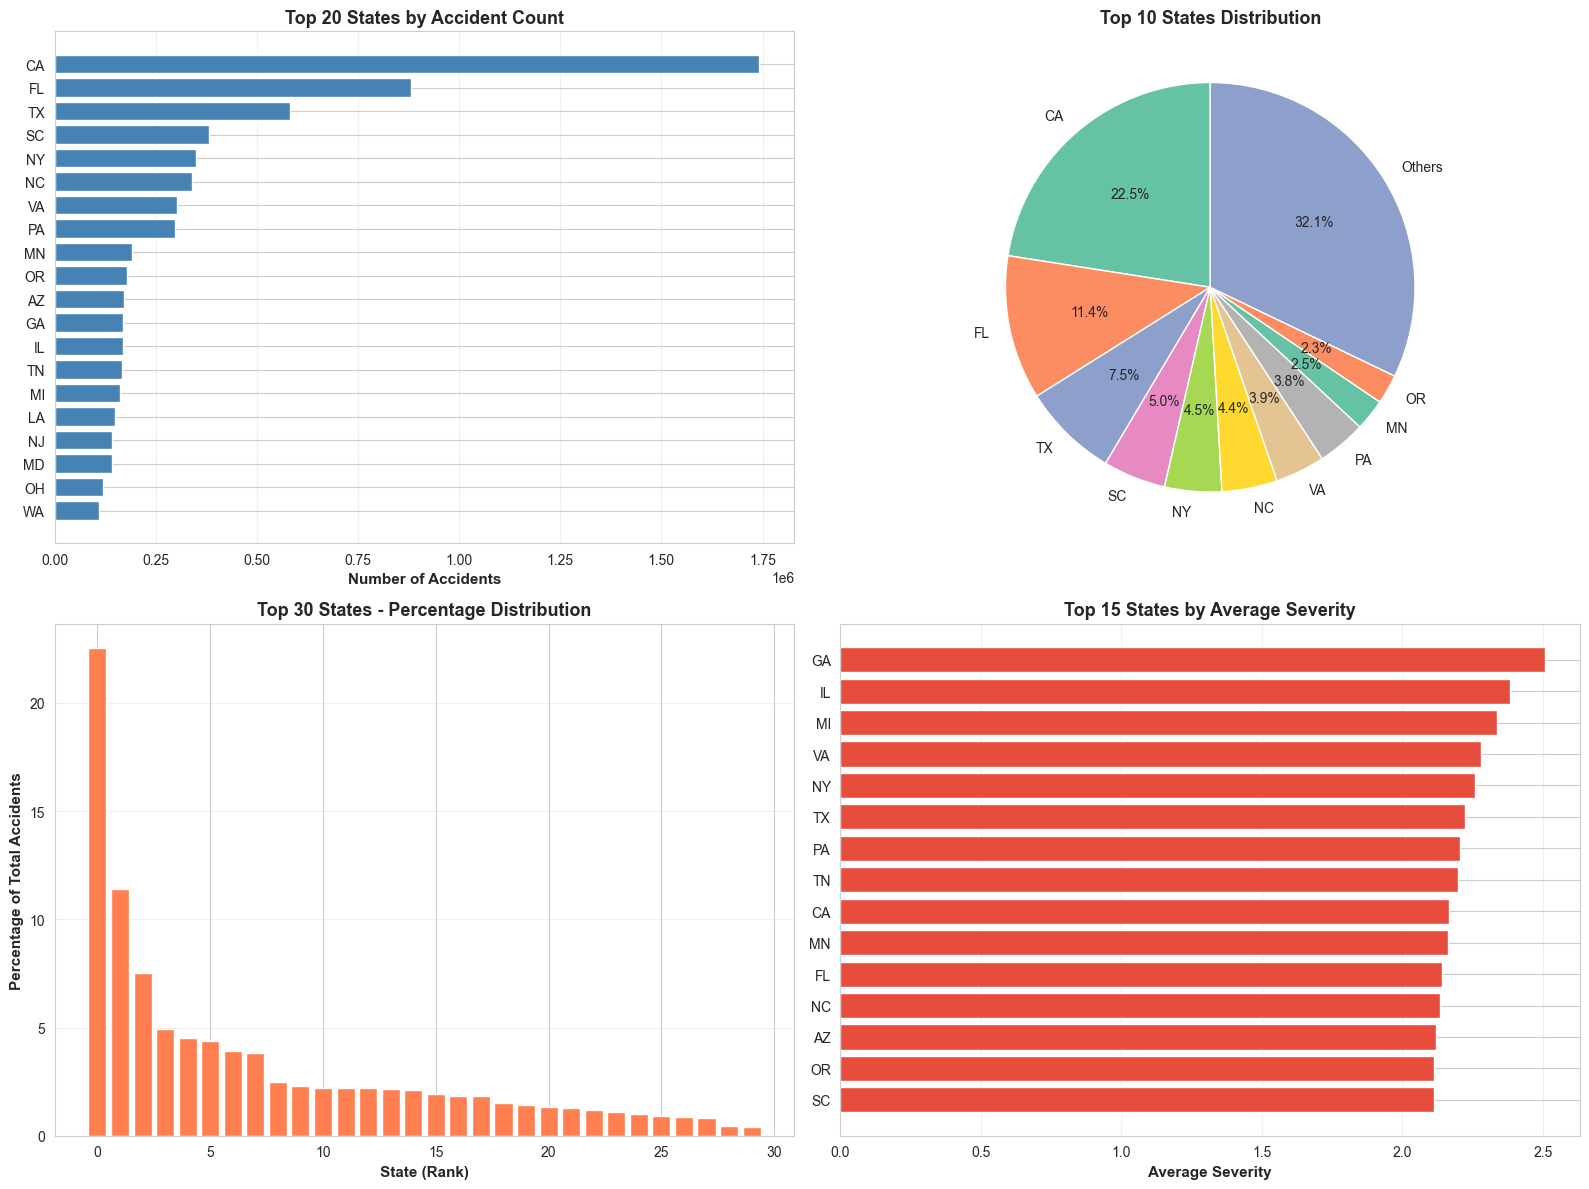


2. CITY-LEVEL ANALYSIS

🏙️  Total Cities Covered: 13,678

Top 30 Cities by Accident Count:
--------------------------------------------------------------------------------
Rank |                           City |        Count | Percentage
--------------------------------------------------------------------------------
   1 |                          Miami |      186,917 |      2.42%
   2 |                        Houston |      169,609 |      2.19%
   3 |                    Los Angeles |      156,491 |      2.02%
   4 |                      Charlotte |      138,652 |      1.79%
   5 |                         Dallas |      130,939 |      1.69%
   6 |                        Orlando |      109,733 |      1.42%
   7 |                         Austin |       97,359 |      1.26%
   8 |                        Raleigh |       86,079 |      1.11%
   9 |                      Nashville |       72,930 |      0.94%
  10 |                    Baton Rouge |       71,588 |      0.93%
  11 |              

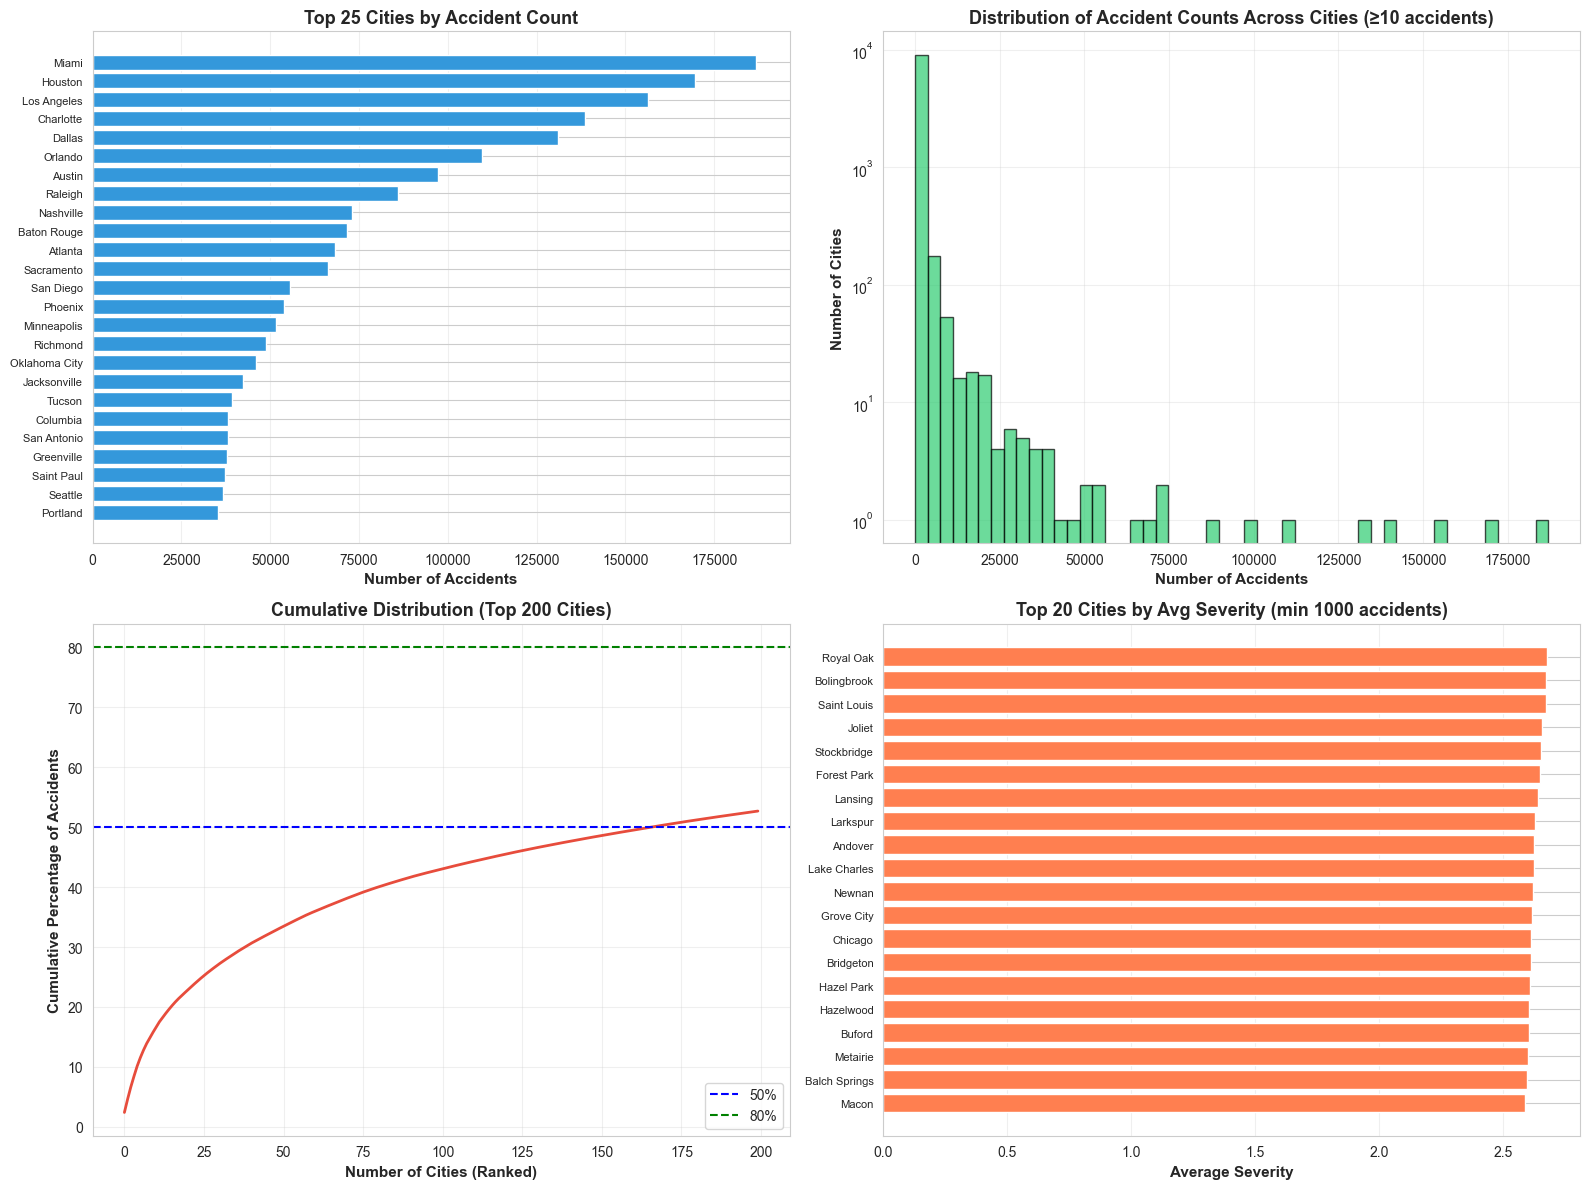


3. COUNTY-LEVEL ANALYSIS

🏛️  Total Counties Covered: 1,871

Top 20 Counties by Accident Count:
--------------------------------------------------------------------------------
Rank |                         County |        Count | Percentage
--------------------------------------------------------------------------------
   1 |                    Los Angeles |      526,851 |      6.82%
   2 |                     Miami-Dade |      251,601 |      3.26%
   3 |                         Orange |      241,275 |      3.12%
   4 |                         Harris |      181,196 |      2.34%
   5 |                         Dallas |      157,024 |      2.03%
   6 |                    Mecklenburg |      147,265 |      1.91%
   7 |                     Montgomery |      136,788 |      1.77%
   8 |                           Wake |      117,890 |      1.53%
   9 |                 San Bernardino |      109,631 |      1.42%
  10 |                         Travis |      107,881 |      1.40%
  11 |         

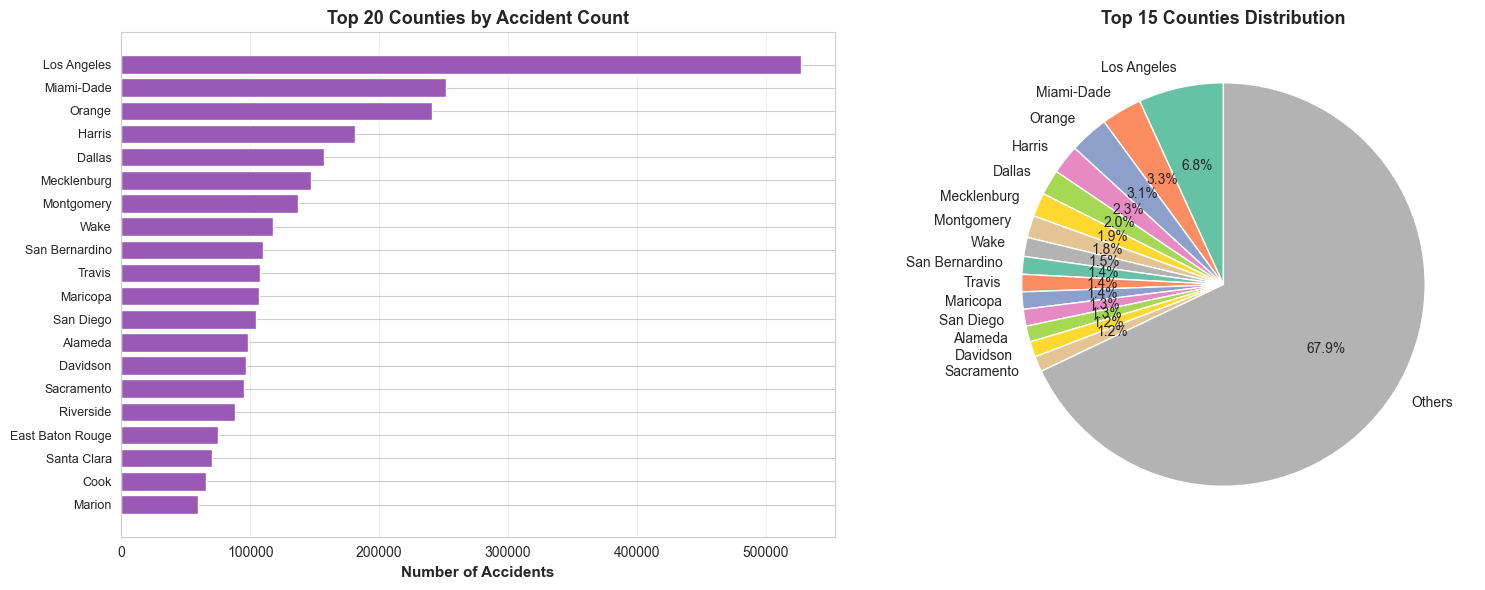


4. COORDINATE-BASED ANALYSIS

📍 Latitude Statistics:
--------------------------------------------------------------------------------
  Count: 7,728,394
  Mean: 36.2012°
  Median: 35.8240°
  Min: 24.5548°
  Max: 49.0022°
  Range: 24.4474°

📍 Longitude Statistics:
--------------------------------------------------------------------------------
  Count: 7,728,394
  Mean: -94.7025°
  Median: -87.7666°
  Min: -124.6238°
  Max: -67.1132°
  Range: 57.5107°

🗺️  Regional Distribution (Latitude-based):
--------------------------------------------------------------------------------
  South           (Lat 24-36°):  3,933,966 (50.90%)
  Mid-South       (Lat 36-40°):  1,797,860 (23.26%)
  Mid-North       (Lat 40-44°):  1,529,546 (19.79%)
  North           (Lat 44-50°):    467,022 ( 6.04%)


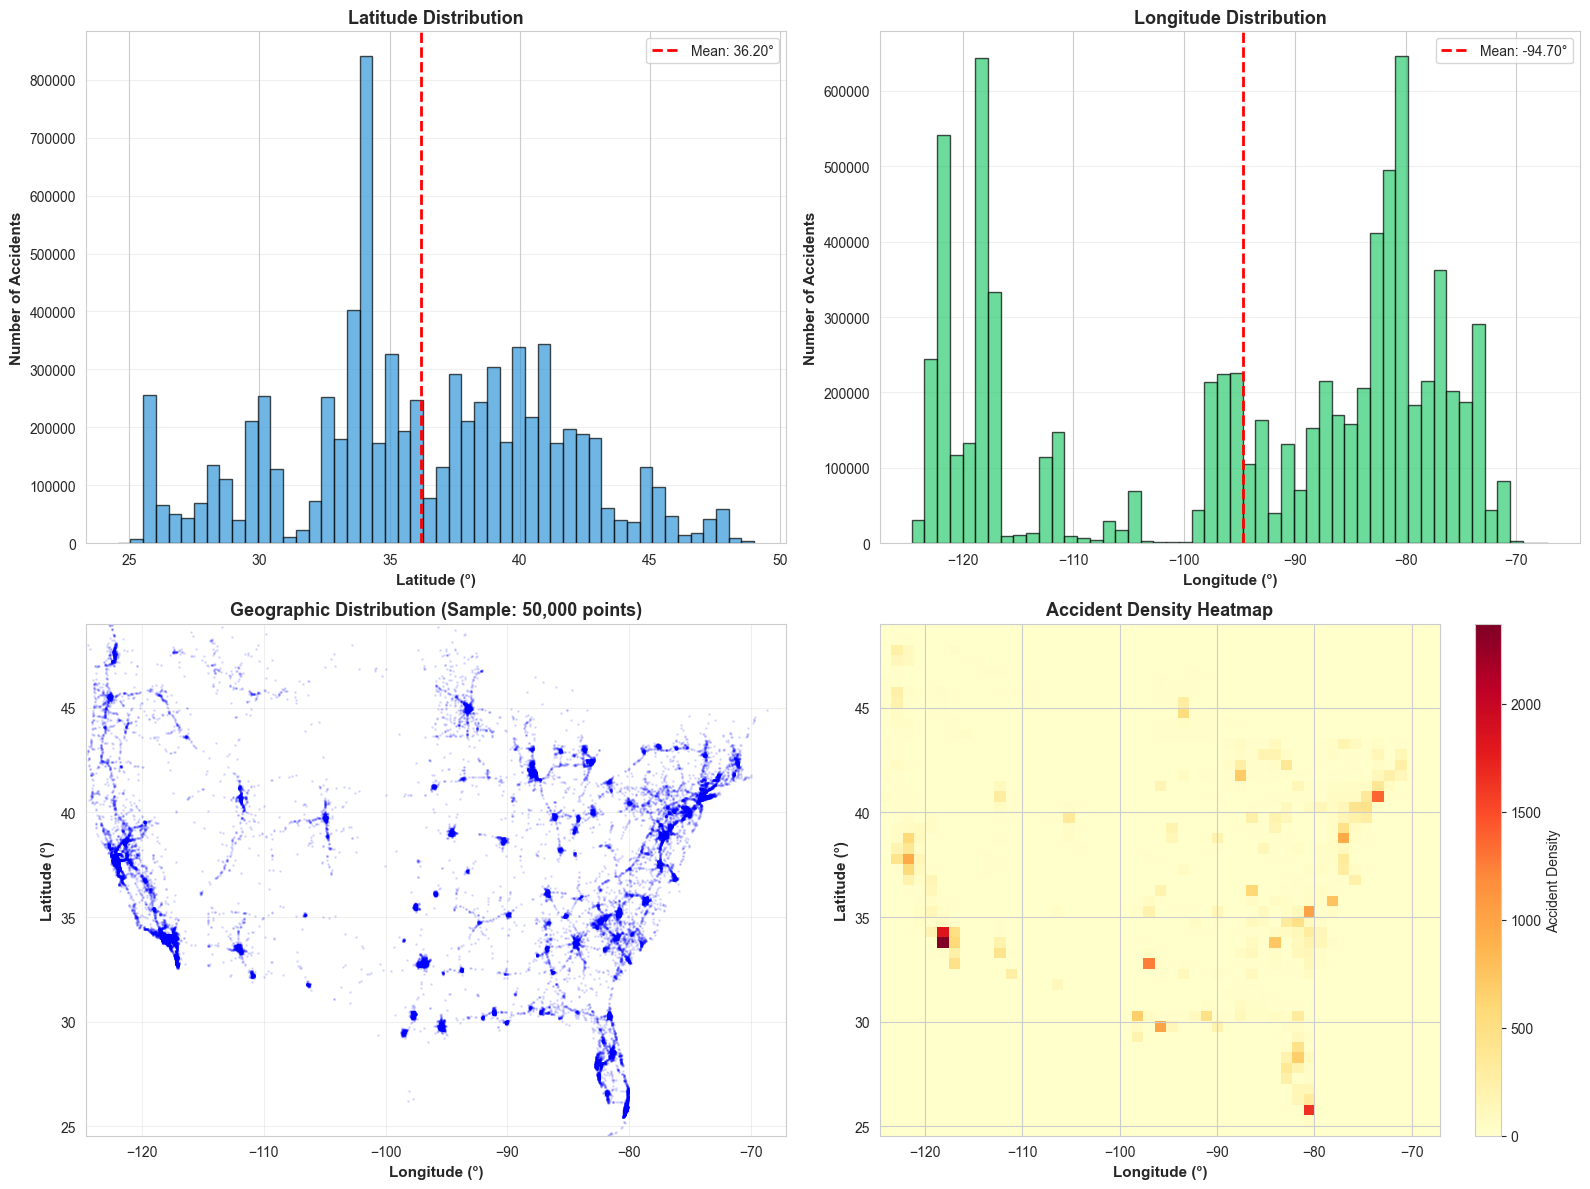


5. DISTANCE ANALYSIS

📏 Distance Statistics:
--------------------------------------------------------------------------------
  Count: 7,728,394
  Mean: 0.562 miles
  Median: 0.030 miles
  Std Dev: 1.777 miles
  Min: 0.000 miles
  Max: 441.750 miles
  25th percentile: 0.000 miles
  75th percentile: 0.464 miles
  95th percentile: 2.670 miles

📏 Accidents by Distance Category:
--------------------------------------------------------------------------------
           Distance Range |        Count | Percentage
--------------------------------------------------------------------------------
     Very Short
(<0.1 mi) |    1,185,298 |     15.34%
       Short
(0.1-0.5 mi) |    1,389,805 |     17.98%
        Medium
(0.5-1 mi) |      740,906 |      9.59%
            Long
(1-2 mi) |      555,854 |      7.19%
       Very Long
(2-5 mi) |      409,156 |      5.29%
          Extreme
(>5 mi) |      145,128 |      1.88%

📊 Distance Categories:
  Short (<0.5 mi): 5,873,424 (76.00%)
  Long (≥2 mi): 555

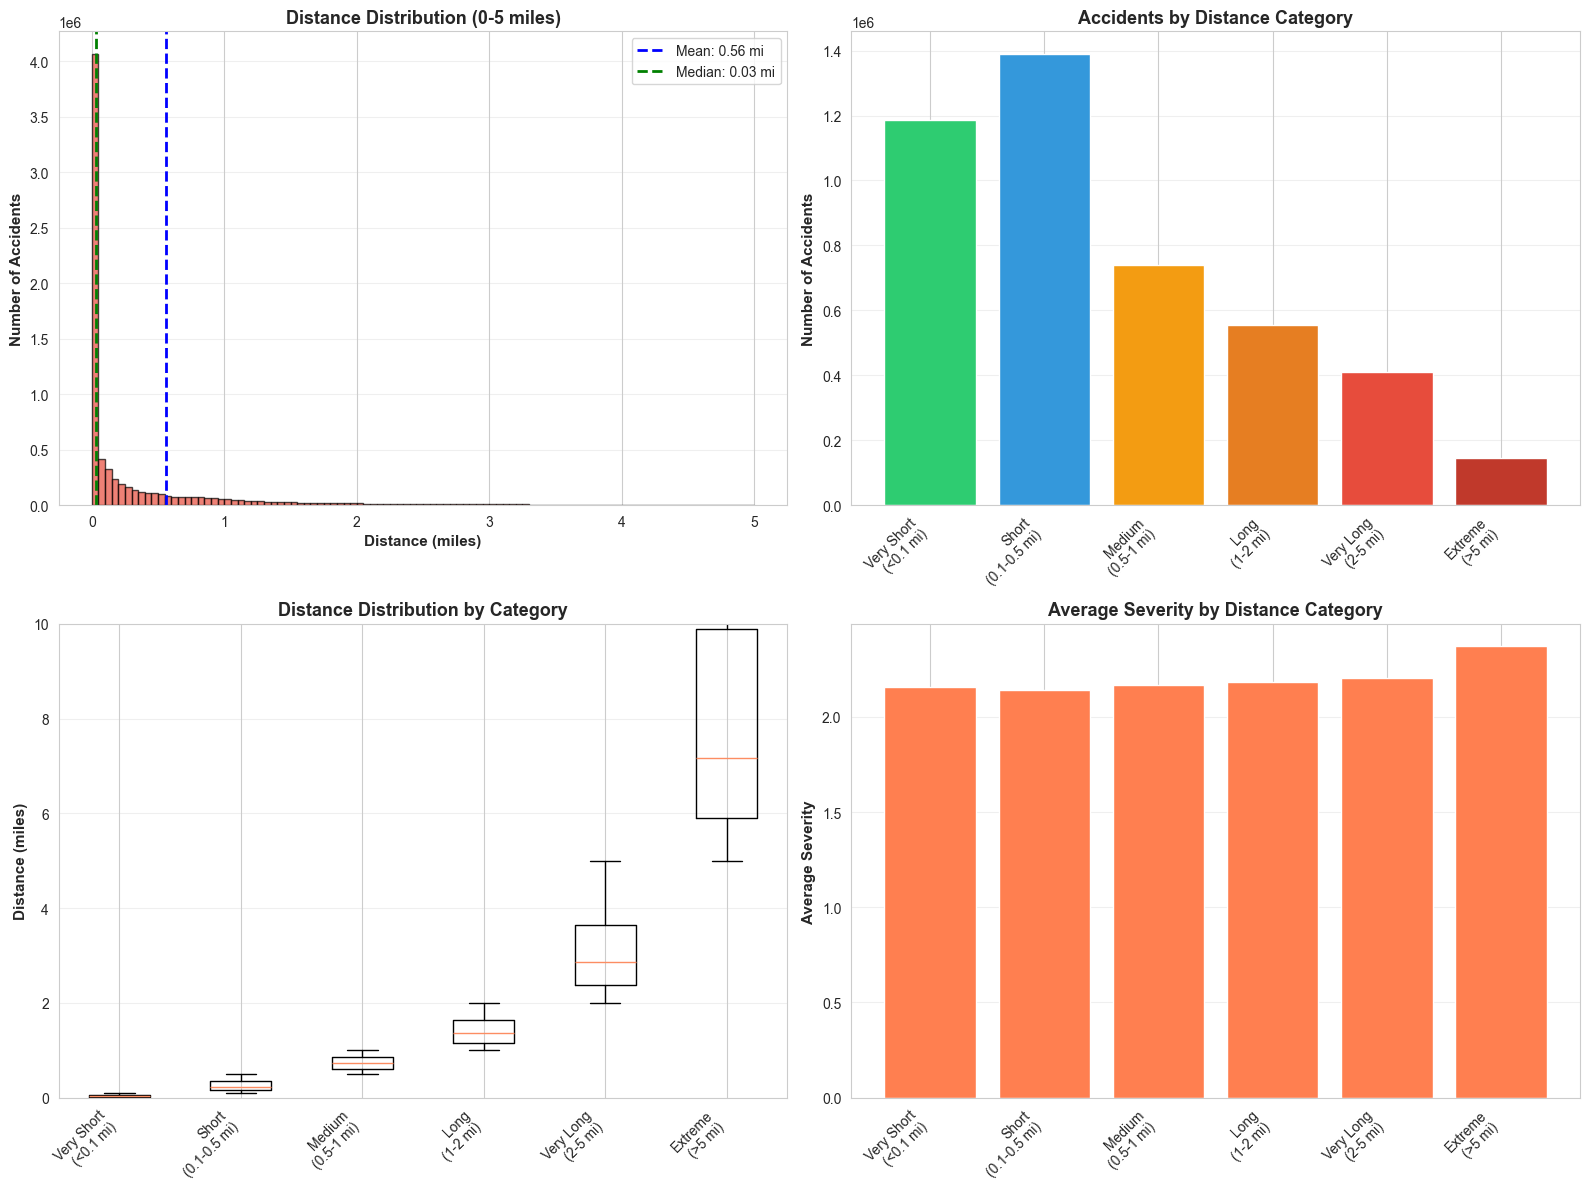


6. ZIPCODE ANALYSIS

📮 Total Zipcodes Covered: 825,094

Top 20 Zipcodes by Accident Count:
--------------------------------------------------------------------------------
Rank |    Zipcode |        Count | Percentage
--------------------------------------------------------------------------------
   1 |      91761 |       11,247 |      0.15%
   2 |      91706 |       10,022 |      0.13%
   3 |      92407 |        8,922 |      0.12%
   4 |      92507 |        8,850 |      0.11%
   5 |      33186 |        8,375 |      0.11%
   6 |      32819 |        7,461 |      0.10%
   7 |      91765 |        7,377 |      0.10%
   8 |      33169 |        7,106 |      0.09%
   9 |      90023 |        7,066 |      0.09%
  10 |      92324 |        7,010 |      0.09%
  11 |      75243 |        6,914 |      0.09%
  12 |      90012 |        6,852 |      0.09%
  13 |      90805 |        6,703 |      0.09%
  14 |      90703 |        6,627 |      0.09%
  15 |      91342 |        6,471 |      0.08%
  16 |    

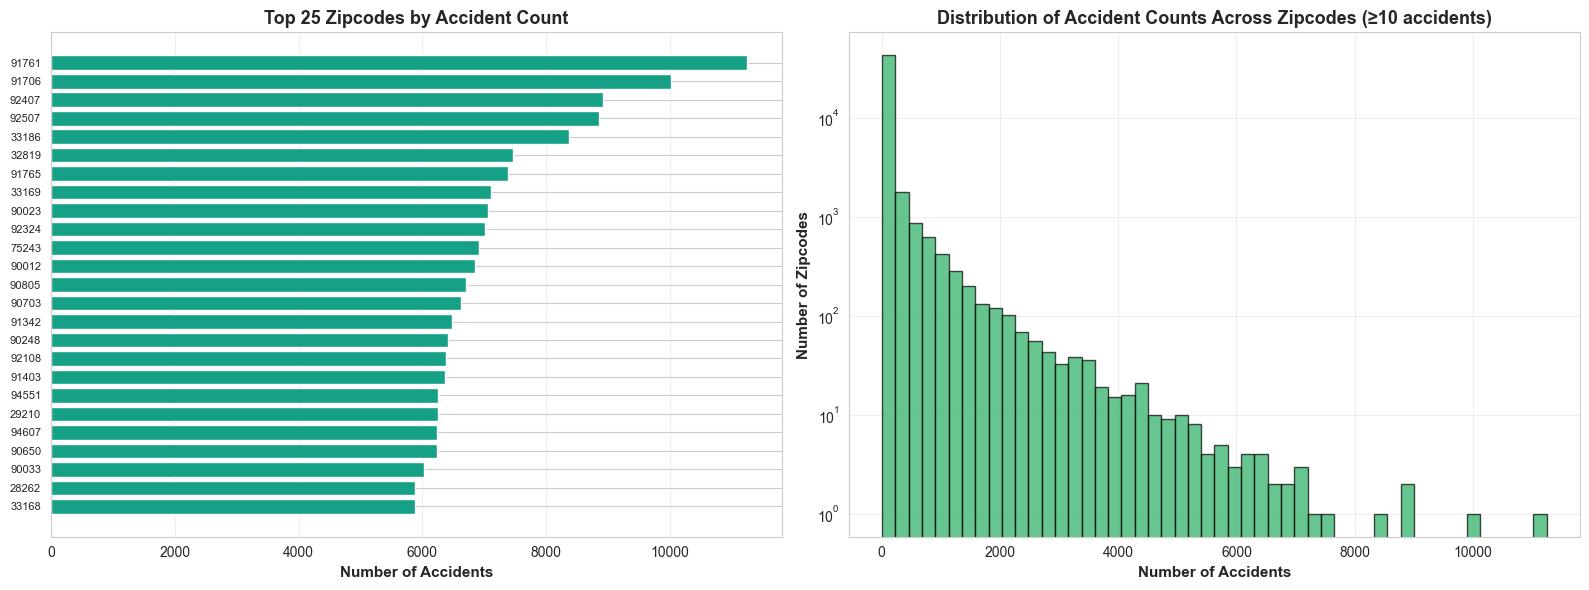


7. GEOGRAPHIC ANALYSIS SUMMARY

GEOGRAPHIC ANALYSIS SUMMARY
US Accidents Dataset - Traffic Accident Risk Predictor
Generated: 2025-11-04 21:15:37

1. STATE-LEVEL SUMMARY
--------------------------------------------------------------------------------
   Total States: 49
   Top State: CA (1,741,433 accidents)
   Top 5 states: 50.92% of all accidents


2. CITY-LEVEL SUMMARY
--------------------------------------------------------------------------------
   Total Cities: 13,678
   Top City: Miami (186,917 accidents)
   Top 10 cities: 15.79% of all accidents


3. COORDINATE SUMMARY
--------------------------------------------------------------------------------
   Latitude Range: 24.45°
   Longitude Range: 57.51°
   Mean Latitude: 36.2012°
   Mean Longitude: -94.7025°


4. DISTANCE SUMMARY
--------------------------------------------------------------------------------
   Mean Distance: 0.562 miles
   Median Distance: 0.030 miles
   Short Accidents (<0.5 mi): 5,873,424 (76.00%)


5. KEY I

In [17]:
# Run complete analysis
analyzer = GeographicAnalysis(dataset)
analyzer.run_complete_analysis()

## Road Feature Analysis

In [18]:
"""
EDA Part 5: Road Features Analysis (Notebook Version)
US Accidents Dataset - Traffic Accident Risk Predictor
Project Partners: Diparna Adhikary and Maddy Nommer

Goal: Analyze road infrastructure features and their impact on accidents:
- Individual road feature frequency
- Feature presence/absence impact
- Feature combinations
- Impact on accident severity
- Feature correlations
- High-risk feature combinations

Road Features (13 total):
- Amenity, Bump, Crossing, Give_Way, Junction, No_Exit, Railway,
  Roundabout, Station, Stop, Traffic_Calming, Traffic_Signal, Turning_Loop

Usage in Notebook:
------------------
import pandas as pd
from eda_part5_road_features_analysis import RoadFeaturesAnalysis

df = pd.read_csv('US_Accidents.csv')
analyzer = RoadFeaturesAnalysis(df)
analyzer.run_complete_analysis()
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from itertools import combinations
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
sns.set_style('whitegrid')
sns.set_palette('Set2')
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 10

class RoadFeaturesAnalysis:
    """
    Comprehensive Road Features Analysis for US Accidents Dataset (Notebook Version)
    Works directly with DataFrame, displays plots inline
    """
    
    def __init__(self, df):
        """
        Initialize with DataFrame
        
        Parameters:
        -----------
        df : pandas.DataFrame
            US Accidents dataset
        """
        print("="*80)
        print("EDA PART 5: ROAD FEATURES ANALYSIS")
        print("US Accidents Dataset - Traffic Accident Risk Predictor")
        print("="*80)
        
        self.df = df.copy()
        print(f"\n✓ DataFrame loaded: {self.df.shape[0]:,} rows × {self.df.shape[1]} columns")
        
        # Define road features
        self.road_features = [
            'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit',
            'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming',
            'Traffic_Signal', 'Turning_Loop'
        ]
        
        # Check which features are available
        self._check_road_features()
    
    def _check_road_features(self):
        """
        Check which road features are available
        """
        self.available_features = [f for f in self.road_features if f in self.df.columns]
        self.missing_features = [f for f in self.road_features if f not in self.df.columns]
        
        print(f"\n✓ Available road features: {len(self.available_features)}/{len(self.road_features)}")
        if self.available_features:
            for feature in self.available_features:
                print(f"  • {feature}")
        
        if self.missing_features:
            print(f"\n⚠️  Missing road features: {len(self.missing_features)}")
            for feature in self.missing_features:
                print(f"  • {feature}")
    
    def individual_feature_analysis(self):
        """
        Analyze each road feature individually
        """
        print("\n" + "="*80)
        print("1. INDIVIDUAL ROAD FEATURE ANALYSIS")
        print("="*80)
        
        if not self.available_features:
            print("✗ No road features available!")
            return
        
        # Count presence of each feature
        feature_stats = {}
        
        print(f"\n🛣️  Road Feature Presence:")
        print("-"*80)
        print(f"{'Feature':>20} | {'Present':>12} | {'Absent':>12} | {'% Present':>10}")
        print("-"*80)
        
        for feature in self.available_features:
            present = self.df[feature].sum()
            absent = (~self.df[feature]).sum()
            pct_present = (present / len(self.df)) * 100
            
            feature_stats[feature] = {
                'present': present,
                'absent': absent,
                'pct_present': pct_present
            }
            
            print(f"{feature:>20} | {present:>12,} | {absent:>12,} | {pct_present:>9.2f}%")
        
        # Sort by frequency
        sorted_features = sorted(feature_stats.items(), key=lambda x: x[1]['present'], reverse=True)
        
        print(f"\n📊 Features Ranked by Frequency:")
        print("-"*80)
        for i, (feature, stats) in enumerate(sorted_features, 1):
            print(f"  {i:2d}. {feature:20s}: {stats['present']:>10,} accidents ({stats['pct_present']:>5.2f}%)")
        
        # Most and least common
        most_common = sorted_features[0]
        least_common = sorted_features[-1]
        
        print(f"\n🔝 Most Common Feature: {most_common[0]} ({most_common[1]['pct_present']:.2f}%)")
        print(f"🔻 Least Common Feature: {least_common[0]} ({least_common[1]['pct_present']:.2f}%)")
        
        # Visualizations
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        
        # Bar chart - counts
        features = [f for f, _ in sorted_features]
        counts = [stats['present'] for _, stats in sorted_features]
        
        axes[0, 0].barh(range(len(features)), counts, color='steelblue')
        axes[0, 0].set_yticks(range(len(features)))
        axes[0, 0].set_yticklabels(features)
        axes[0, 0].set_xlabel('Number of Accidents with Feature', fontsize=11, fontweight='bold')
        axes[0, 0].set_title('Road Features - Frequency Count', fontsize=13, fontweight='bold')
        axes[0, 0].invert_yaxis()
        axes[0, 0].grid(True, alpha=0.3, axis='x')
        
        # Bar chart - percentages
        percentages = [stats['pct_present'] for _, stats in sorted_features]
        
        axes[0, 1].barh(range(len(features)), percentages, color='coral')
        axes[0, 1].set_yticks(range(len(features)))
        axes[0, 1].set_yticklabels(features)
        axes[0, 1].set_xlabel('Percentage of Accidents with Feature (%)', fontsize=11, fontweight='bold')
        axes[0, 1].set_title('Road Features - Percentage Presence', fontsize=13, fontweight='bold')
        axes[0, 1].invert_yaxis()
        axes[0, 1].grid(True, alpha=0.3, axis='x')
        
        # Pie chart - top 5 + others
        top_5_features = [f for f, _ in sorted_features[:5]]
        top_5_counts = [stats['present'] for _, stats in sorted_features[:5]]
        other_count = sum([stats['present'] for _, stats in sorted_features[5:]])
        
        pie_labels = top_5_features + ['Other Features']
        pie_values = top_5_counts + [other_count]
        
        axes[1, 0].pie(pie_values, labels=pie_labels, autopct='%1.1f%%', startangle=90)
        axes[1, 0].set_title('Feature Distribution (Top 5 + Others)', fontsize=13, fontweight='bold')
        
        # Stacked bar - present vs absent
        present_counts = [stats['present'] for _, stats in sorted_features]
        absent_counts = [stats['absent'] for _, stats in sorted_features]
        
        x = np.arange(len(features))
        axes[1, 1].barh(x, present_counts, label='Present', color='#2ecc71')
        axes[1, 1].barh(x, absent_counts, left=present_counts, label='Absent', color='#e74c3c')
        axes[1, 1].set_yticks(x)
        axes[1, 1].set_yticklabels(features)
        axes[1, 1].set_xlabel('Number of Accidents', fontsize=11, fontweight='bold')
        axes[1, 1].set_title('Present vs Absent by Feature', fontsize=13, fontweight='bold')
        axes[1, 1].legend()
        axes[1, 1].invert_yaxis()
        
        plt.tight_layout()
        plt.show()
    
    def feature_impact_on_severity(self):
        """
        Analyze how each feature impacts accident severity
        """
        print("\n" + "="*80)
        print("2. ROAD FEATURES IMPACT ON SEVERITY")
        print("="*80)
        
        if not self.available_features:
            print("✗ No road features available!")
            return
        
        if 'Severity' not in self.df.columns:
            print("✗ Severity column not available!")
            return
        
        # Calculate severity with/without each feature
        feature_severity_impact = {}
        
        print(f"\n⚠️  Severity Analysis by Feature:")
        print("-"*80)
        print(f"{'Feature':>20} | {'With Feature':>12} | {'Without':>12} | {'Difference':>12} | {'Impact':>10}")
        print("-"*80)
        
        for feature in self.available_features:
            with_feature = self.df[self.df[feature] == True]['Severity'].mean()
            without_feature = self.df[self.df[feature] == False]['Severity'].mean()
            difference = with_feature - without_feature
            
            # Count
            with_count = self.df[self.df[feature] == True].shape[0]
            without_count = self.df[self.df[feature] == False].shape[0]
            
            impact = "Increases" if difference > 0 else "Decreases"
            
            feature_severity_impact[feature] = {
                'with': with_feature,
                'without': without_feature,
                'difference': difference,
                'with_count': with_count,
                'without_count': without_count
            }
            
            print(f"{feature:>20} | {with_feature:>12.3f} | {without_feature:>12.3f} | {difference:>+12.3f} | {impact:>10}")
        
        # Sort by absolute impact
        sorted_by_impact = sorted(feature_severity_impact.items(), 
                                 key=lambda x: abs(x[1]['difference']), reverse=True)
        
        print(f"\n📊 Features Ranked by Severity Impact (absolute):")
        print("-"*80)
        for i, (feature, stats) in enumerate(sorted_by_impact, 1):
            impact = "increases" if stats['difference'] > 0 else "decreases"
            print(f"  {i:2d}. {feature:20s}: {impact} severity by {abs(stats['difference']):.3f}")
        
        # Most impactful features
        most_increase = max(feature_severity_impact.items(), key=lambda x: x[1]['difference'])
        most_decrease = min(feature_severity_impact.items(), key=lambda x: x[1]['difference'])
        
        print(f"\n🔺 Most Increases Severity: {most_increase[0]} (+{most_increase[1]['difference']:.3f})")
        print(f"🔻 Most Decreases Severity: {most_decrease[0]} ({most_decrease[1]['difference']:.3f})")
        
        # Visualizations
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        
        # Comparison bar chart
        features = [f for f, _ in sorted_by_impact]
        with_severity = [stats['with'] for _, stats in sorted_by_impact]
        without_severity = [stats['without'] for _, stats in sorted_by_impact]
        
        x = np.arange(len(features))
        width = 0.35
        
        axes[0, 0].bar(x - width/2, with_severity, width, label='With Feature', color='#e74c3c')
        axes[0, 0].bar(x + width/2, without_severity, width, label='Without Feature', color='#3498db')
        axes[0, 0].set_xticks(x)
        axes[0, 0].set_xticklabels(features, rotation=45, ha='right')
        axes[0, 0].set_ylabel('Average Severity', fontsize=11, fontweight='bold')
        axes[0, 0].set_title('Severity Comparison: With vs Without Feature', fontsize=13, fontweight='bold')
        axes[0, 0].legend()
        axes[0, 0].grid(True, alpha=0.3, axis='y')
        
        # Difference plot
        differences = [stats['difference'] for _, stats in sorted_by_impact]
        colors = ['#e74c3c' if d > 0 else '#2ecc71' for d in differences]
        
        axes[0, 1].barh(range(len(features)), differences, color=colors)
        axes[0, 1].set_yticks(range(len(features)))
        axes[0, 1].set_yticklabels(features)
        axes[0, 1].set_xlabel('Severity Difference (With - Without)', fontsize=11, fontweight='bold')
        axes[0, 1].set_title('Severity Impact by Feature', fontsize=13, fontweight='bold')
        axes[0, 1].axvline(x=0, color='black', linestyle='--', linewidth=1)
        axes[0, 1].invert_yaxis()
        axes[0, 1].grid(True, alpha=0.3, axis='x')
        
        # Heatmap-style visualization
        # Create matrix for heatmap
        severity_matrix = []
        for feature in features:
            stats = feature_severity_impact[feature]
            severity_matrix.append([stats['without'], stats['with']])
        
        im = axes[1, 0].imshow(severity_matrix, cmap='RdYlGn_r', aspect='auto')
        axes[1, 0].set_xticks([0, 1])
        axes[1, 0].set_xticklabels(['Without', 'With'])
        axes[1, 0].set_yticks(range(len(features)))
        axes[1, 0].set_yticklabels(features)
        axes[1, 0].set_title('Severity Heatmap by Feature Presence', fontsize=13, fontweight='bold')
        plt.colorbar(im, ax=axes[1, 0], label='Average Severity')
        
        # Box plot for top 5 impactful features
        top_5_features = [f for f, _ in sorted_by_impact[:5]]
        box_data = []
        box_labels = []
        
        for feature in top_5_features:
            box_data.append(self.df[self.df[feature] == False]['Severity'].dropna())
            box_labels.append(f'{feature}\n(Without)')
            box_data.append(self.df[self.df[feature] == True]['Severity'].dropna())
            box_labels.append(f'{feature}\n(With)')
        
        bp = axes[1, 1].boxplot(box_data, labels=box_labels, patch_artist=True)
        
        # Color boxes alternately
        for i, box in enumerate(bp['boxes']):
            if i % 2 == 0:
                box.set_facecolor('#3498db')
            else:
                box.set_facecolor('#e74c3c')
        
        axes[1, 1].set_xticklabels(box_labels, rotation=45, ha='right', fontsize=8)
        axes[1, 1].set_ylabel('Severity', fontsize=11, fontweight='bold')
        axes[1, 1].set_title('Severity Distribution: Top 5 Impactful Features', fontsize=13, fontweight='bold')
        axes[1, 1].grid(True, alpha=0.3, axis='y')
        
        plt.tight_layout()
        plt.show()
    
    def feature_combinations_analysis(self):
        """
        Analyze combinations of road features
        """
        print("\n" + "="*80)
        print("3. ROAD FEATURE COMBINATIONS ANALYSIS")
        print("="*80)
        
        if not self.available_features:
            print("✗ No road features available!")
            return
        
        # Count total features per accident
        self.df['Total_Features'] = self.df[self.available_features].sum(axis=1)
        
        feature_count_dist = self.df['Total_Features'].value_counts().sort_index()
        
        print(f"\n🔢 Number of Features per Accident:")
        print("-"*80)
        print(f"{'# Features':>12} | {'Count':>12} | {'Percentage':>10}")
        print("-"*80)
        
        for num_features, count in feature_count_dist.items():
            pct = (count / len(self.df)) * 100
            print(f"{num_features:>12} | {count:>12,} | {pct:>9.2f}%")
        
        # Statistics
        print(f"\n📊 Feature Count Statistics:")
        print(f"  Mean features per accident: {self.df['Total_Features'].mean():.2f}")
        print(f"  Median features per accident: {self.df['Total_Features'].median():.0f}")
        print(f"  Max features in single accident: {self.df['Total_Features'].max():.0f}")
        
        # Accidents with no features
        no_features = (self.df['Total_Features'] == 0).sum()
        print(f"  Accidents with no features: {no_features:,} ({no_features/len(self.df)*100:.2f}%)")
        
        # Multiple features
        multiple_features = (self.df['Total_Features'] >= 2).sum()
        print(f"  Accidents with 2+ features: {multiple_features:,} ({multiple_features/len(self.df)*100:.2f}%)")
        
        # Most common 2-feature combinations
        print(f"\n🔗 Top 10 Most Common 2-Feature Combinations:")
        print("-"*80)
        
        pair_counts = {}
        for feat1, feat2 in combinations(self.available_features, 2):
            both_present = ((self.df[feat1] == True) & (self.df[feat2] == True)).sum()
            if both_present > 0:
                pair_counts[(feat1, feat2)] = both_present
        
        sorted_pairs = sorted(pair_counts.items(), key=lambda x: x[1], reverse=True)
        
        for i, ((feat1, feat2), count) in enumerate(sorted_pairs[:10], 1):
            pct = (count / len(self.df)) * 100
            print(f"  {i:2d}. {feat1} + {feat2}: {count:,} ({pct:.2f}%)")
        
        # Severity by number of features
        if 'Severity' in self.df.columns:
            print(f"\n⚠️  Average Severity by Number of Features:")
            print("-"*80)
            severity_by_count = self.df.groupby('Total_Features')['Severity'].agg(['mean', 'count'])
            
            for num_features, row in severity_by_count.iterrows():
                print(f"  {num_features:2.0f} features: Avg Severity {row['mean']:.3f} ({row['count']:,} accidents)")
        
        # Visualizations
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        
        # Distribution of feature counts
        axes[0, 0].bar(feature_count_dist.index, feature_count_dist.values, color='#3498db')
        axes[0, 0].set_xlabel('Number of Features', fontsize=11, fontweight='bold')
        axes[0, 0].set_ylabel('Number of Accidents', fontsize=11, fontweight='bold')
        axes[0, 0].set_title('Distribution of Feature Counts per Accident', fontsize=13, fontweight='bold')
        axes[0, 0].grid(True, alpha=0.3, axis='y')
        
        # Top 15 pairs
        top_15_pairs = sorted_pairs[:15]
        pair_labels = [f"{f1}\n+\n{f2}" for (f1, f2), _ in top_15_pairs]
        pair_counts_list = [count for _, count in top_15_pairs]
        
        axes[0, 1].barh(range(len(pair_labels)), pair_counts_list, color='coral')
        axes[0, 1].set_yticks(range(len(pair_labels)))
        axes[0, 1].set_yticklabels(pair_labels, fontsize=7)
        axes[0, 1].set_xlabel('Number of Accidents', fontsize=11, fontweight='bold')
        axes[0, 1].set_title('Top 15 Two-Feature Combinations', fontsize=13, fontweight='bold')
        axes[0, 1].invert_yaxis()
        axes[0, 1].grid(True, alpha=0.3, axis='x')
        
        # Severity by feature count
        if 'Severity' in self.df.columns:
            axes[1, 0].plot(severity_by_count.index, severity_by_count['mean'], 
                           marker='o', linewidth=2, markersize=8, color='#e74c3c')
            axes[1, 0].set_xlabel('Number of Features', fontsize=11, fontweight='bold')
            axes[1, 0].set_ylabel('Average Severity', fontsize=11, fontweight='bold')
            axes[1, 0].set_title('Average Severity by Number of Features', fontsize=13, fontweight='bold')
            axes[1, 0].grid(True, alpha=0.3)
        
        # Pie chart - feature count categories
        no_feat = (self.df['Total_Features'] == 0).sum()
        one_feat = (self.df['Total_Features'] == 1).sum()
        two_feat = (self.df['Total_Features'] == 2).sum()
        three_plus = (self.df['Total_Features'] >= 3).sum()
        
        pie_data = [no_feat, one_feat, two_feat, three_plus]
        pie_labels = ['No Features', '1 Feature', '2 Features', '3+ Features']
        
        axes[1, 1].pie(pie_data, labels=pie_labels, autopct='%1.1f%%', startangle=90,
                      colors=['#95a5a6', '#3498db', '#f39c12', '#e74c3c'])
        axes[1, 1].set_title('Feature Count Distribution (Categories)', fontsize=13, fontweight='bold')
        
        plt.tight_layout()
        plt.show()
    
    def feature_correlation_analysis(self):
        """
        Analyze correlations between road features
        """
        print("\n" + "="*80)
        print("4. ROAD FEATURE CORRELATION ANALYSIS")
        print("="*80)
        
        if not self.available_features:
            print("✗ No road features available!")
            return
        
        if len(self.available_features) < 2:
            print("✗ Need at least 2 features for correlation analysis!")
            return
        
        # Calculate correlation matrix
        feature_df = self.df[self.available_features].astype(int)
        corr_matrix = feature_df.corr()
        
        print(f"\n🔗 Feature Correlation Matrix:")
        print("-"*80)
        print(corr_matrix.round(3))
        
        # Find strongest correlations
        print(f"\n📊 Top 10 Strongest Positive Correlations:")
        print("-"*80)
        
        correlations = []
        for i in range(len(corr_matrix.columns)):
            for j in range(i+1, len(corr_matrix.columns)):
                feat1 = corr_matrix.columns[i]
                feat2 = corr_matrix.columns[j]
                corr_val = corr_matrix.iloc[i, j]
                correlations.append((feat1, feat2, corr_val))
        
        # Sort by correlation value
        correlations.sort(key=lambda x: x[2], reverse=True)
        
        for i, (feat1, feat2, corr_val) in enumerate(correlations[:10], 1):
            print(f"  {i:2d}. {feat1} ↔ {feat2}: {corr_val:+.3f}")
        
        # Features that often appear together
        print(f"\n🤝 Frequently Co-occurring Features (correlation > 0.1):")
        print("-"*80)
        
        strong_pairs = [(f1, f2, c) for f1, f2, c in correlations if c > 0.1]
        for feat1, feat2, corr_val in strong_pairs[:15]:
            # Count co-occurrences
            both = ((self.df[feat1] == True) & (self.df[feat2] == True)).sum()
            print(f"  {feat1} + {feat2}: {both:,} accidents (r={corr_val:.3f})")
        
        # Visualizations
        fig, axes = plt.subplots(1, 2, figsize=(16, 6))
        
        # Correlation heatmap
        sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
                   square=True, linewidths=1, cbar_kws={"shrink": 0.8}, ax=axes[0])
        axes[0].set_title('Road Feature Correlation Heatmap', fontsize=14, fontweight='bold')
        
        # Top correlations bar chart
        top_15_corr = correlations[:15]
        corr_labels = [f"{f1}\n↔\n{f2}" for f1, f2, _ in top_15_corr]
        corr_values = [c for _, _, c in top_15_corr]
        
        axes[1].barh(range(len(corr_labels)), corr_values, color='steelblue')
        axes[1].set_yticks(range(len(corr_labels)))
        axes[1].set_yticklabels(corr_labels, fontsize=8)
        axes[1].set_xlabel('Correlation Coefficient', fontsize=11, fontweight='bold')
        axes[1].set_title('Top 15 Feature Correlations', fontsize=13, fontweight='bold')
        axes[1].invert_yaxis()
        axes[1].grid(True, alpha=0.3, axis='x')
        
        plt.tight_layout()
        plt.show()
    
    def high_risk_combinations(self):
        """
        Identify high-risk feature combinations based on severity
        """
        print("\n" + "="*80)
        print("5. HIGH-RISK FEATURE COMBINATIONS")
        print("="*80)
        
        if not self.available_features:
            print("✗ No road features available!")
            return
        
        if 'Severity' not in self.df.columns:
            print("✗ Severity column not available!")
            return
        
        # Analyze 2-feature combinations with severity
        print(f"\n⚠️  Top 15 Highest Severity 2-Feature Combinations (min 100 cases):")
        print("-"*80)
        print(f"{'Rank':>4} | {'Feature 1':>20} + {'Feature 2':>20} | {'Avg Sev':>10} | {'Count':>10}")
        print("-"*80)
        
        pair_severity = {}
        for feat1, feat2 in combinations(self.available_features, 2):
            mask = (self.df[feat1] == True) & (self.df[feat2] == True)
            if mask.sum() >= 100:  # Min 100 cases
                avg_severity = self.df[mask]['Severity'].mean()
                count = mask.sum()
                pair_severity[(feat1, feat2)] = {'severity': avg_severity, 'count': count}
        
        sorted_pair_severity = sorted(pair_severity.items(), 
                                     key=lambda x: x[1]['severity'], reverse=True)
        
        for i, ((feat1, feat2), stats) in enumerate(sorted_pair_severity[:15], 1):
            print(f"{i:>4} | {feat1:>20} + {feat2:>20} | {stats['severity']:>10.3f} | {stats['count']:>10,}")
        
        # Single features with highest severity
        print(f"\n⚠️  Individual Features by Severity Impact:")
        print("-"*80)
        
        single_feature_severity = []
        for feature in self.available_features:
            mask = self.df[feature] == True
            if mask.sum() >= 100:
                avg_sev = self.df[mask]['Severity'].mean()
                count = mask.sum()
                single_feature_severity.append((feature, avg_sev, count))
        
        single_feature_severity.sort(key=lambda x: x[1], reverse=True)
        
        for i, (feature, avg_sev, count) in enumerate(single_feature_severity, 1):
            print(f"  {i:2d}. {feature:25s}: {avg_sev:.3f} ({count:,} accidents)")
        
        # Lowest risk combinations
        print(f"\n✅ Top 10 Lowest Severity 2-Feature Combinations (min 100 cases):")
        print("-"*80)
        
        for i, ((feat1, feat2), stats) in enumerate(sorted_pair_severity[-10:][::-1], 1):
            print(f"  {i:2d}. {feat1} + {feat2}: {stats['severity']:.3f} ({stats['count']:,} accidents)")
        
        # Visualizations
        fig, axes = plt.subplots(2, 1, figsize=(16, 10))
        
        # Top 15 high-risk combinations
        top_15_risk = sorted_pair_severity[:15]
        risk_labels = [f"{f1} + {f2}" for (f1, f2), _ in top_15_risk]
        risk_severities = [stats['severity'] for _, stats in top_15_risk]
        
        axes[0].barh(range(len(risk_labels)), risk_severities, color='#e74c3c')
        axes[0].set_yticks(range(len(risk_labels)))
        axes[0].set_yticklabels(risk_labels, fontsize=9)
        axes[0].set_xlabel('Average Severity', fontsize=11, fontweight='bold')
        axes[0].set_title('Top 15 Highest Risk Feature Combinations (min 100 cases)', 
                         fontsize=13, fontweight='bold')
        axes[0].invert_yaxis()
        axes[0].grid(True, alpha=0.3, axis='x')
        
        # Comparison: high vs low risk
        top_5_high = sorted_pair_severity[:5]
        top_5_low = sorted_pair_severity[-5:][::-1]
        
        comparison_labels = ([f"{f1}+{f2}" for (f1, f2), _ in top_5_high] + 
                           [f"{f1}+{f2}" for (f1, f2), _ in top_5_low])
        comparison_severities = ([stats['severity'] for _, stats in top_5_high] + 
                                [stats['severity'] for _, stats in top_5_low])
        colors = ['#e74c3c'] * 5 + ['#2ecc71'] * 5
        
        axes[1].bar(range(len(comparison_labels)), comparison_severities, color=colors)
        axes[1].set_xticks(range(len(comparison_labels)))
        axes[1].set_xticklabels(comparison_labels, rotation=45, ha='right', fontsize=8)
        axes[1].set_ylabel('Average Severity', fontsize=11, fontweight='bold')
        axes[1].set_title('Highest vs Lowest Risk Combinations (Top 5 Each)', 
                         fontsize=13, fontweight='bold')
        axes[1].axhline(y=self.df['Severity'].mean(), color='blue', linestyle='--', 
                       linewidth=2, label=f'Overall Avg: {self.df["Severity"].mean():.2f}')
        axes[1].legend()
        axes[1].grid(True, alpha=0.3, axis='y')
        
        plt.tight_layout()
        plt.show()
    
    def generate_road_features_summary(self):
        """
        Generate comprehensive road features analysis summary
        """
        print("\n" + "="*80)
        print("6. ROAD FEATURES ANALYSIS SUMMARY")
        print("="*80)
        
        summary = f"""
{'='*80}
ROAD FEATURES ANALYSIS SUMMARY
US Accidents Dataset - Traffic Accident Risk Predictor
Generated: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}
{'='*80}

1. FEATURE AVAILABILITY
{'-'*80}
   Total Road Features: {len(self.road_features)}
   Available in Dataset: {len(self.available_features)}
   Missing from Dataset: {len(self.missing_features)}

2. FEATURE FREQUENCY
{'-'*80}
"""
        
        if self.available_features:
            feature_stats = {}
            for feature in self.available_features:
                present = self.df[feature].sum()
                pct = (present / len(self.df)) * 100
                feature_stats[feature] = (present, pct)
            
            sorted_features = sorted(feature_stats.items(), key=lambda x: x[1][0], reverse=True)
            
            summary += f"   Most Common: {sorted_features[0][0]} ({sorted_features[0][1][1]:.2f}%)\n"
            summary += f"   Least Common: {sorted_features[-1][0]} ({sorted_features[-1][1][1]:.2f}%)\n"
        
        summary += f"""

3. FEATURE COMBINATIONS
{'-'*80}
"""
        
        if 'Total_Features' in self.df.columns:
            mean_features = self.df['Total_Features'].mean()
            median_features = self.df['Total_Features'].median()
            no_features = (self.df['Total_Features'] == 0).sum()
            multiple_features = (self.df['Total_Features'] >= 2).sum()
            
            summary += f"   Mean features per accident: {mean_features:.2f}\n"
            summary += f"   Median features per accident: {median_features:.0f}\n"
            summary += f"   Accidents with no features: {no_features:,} ({no_features/len(self.df)*100:.2f}%)\n"
            summary += f"   Accidents with 2+ features: {multiple_features:,} ({multiple_features/len(self.df)*100:.2f}%)\n"
        
        summary += f"""

4. SEVERITY IMPACT
{'-'*80}
"""
        
        if 'Severity' in self.df.columns and self.available_features:
            severity_impacts = {}
            for feature in self.available_features:
                with_feat = self.df[self.df[feature] == True]['Severity'].mean()
                without_feat = self.df[self.df[feature] == False]['Severity'].mean()
                diff = with_feat - without_feat
                severity_impacts[feature] = diff
            
            most_increase = max(severity_impacts.items(), key=lambda x: x[1])
            most_decrease = min(severity_impacts.items(), key=lambda x: x[1])
            
            summary += f"   Most Increases Severity: {most_increase[0]} (+{most_increase[1]:.3f})\n"
            summary += f"   Most Decreases Severity: {most_decrease[0]} ({most_decrease[1]:.3f})\n"
        
        summary += f"""

5. KEY INSIGHTS FOR MODEL
{'-'*80}
   • Road features are important binary predictors
   • Feature combinations impact severity differently
   • Some features strongly correlate with each other
   • Feature presence/absence creates distinct risk profiles
   • Multiple features compound risk in complex ways
   • Consider feature interactions in modeling

6. RECOMMENDED FEATURES
{'-'*80}
   • Individual feature flags (13 binary features)
   • Total_Features_Count (numeric: 0-13)
   • Has_Any_Feature (binary: at least 1 feature present)
   • Has_Multiple_Features (binary: 2+ features present)
   • Feature interaction terms for top correlated pairs
   • High_Risk_Combination flags for dangerous combinations
   • Traffic_Control_Present (Junction OR Traffic_Signal OR Stop)
   • Pedestrian_Area (Crossing OR Station OR Amenity)
   • Road_Complexity_Score (weighted sum of features)

7. MODELING RECOMMENDATIONS
{'-'*80}
   • Use all individual features as binary inputs
   • Consider polynomial features for key combinations
   • Test interaction terms between correlated features
   • Feature importance analysis to identify key predictors
   • Consider ensemble methods to capture complex interactions
   • Group related features (e.g., traffic control, pedestrian areas)

{'='*80}
END OF ROAD FEATURES ANALYSIS
{'='*80}
"""
        
        print(summary)
    
    def run_complete_analysis(self):
        """
        Run the complete road features analysis pipeline
        """
        self.individual_feature_analysis()
        self.feature_impact_on_severity()
        self.feature_combinations_analysis()
        self.feature_correlation_analysis()
        self.high_risk_combinations()
        self.generate_road_features_summary()
        
        print("\n" + "="*80)
        print("✓ ROAD FEATURES ANALYSIS COMPLETE!")
        print("="*80)
        print("\nKey Takeaways:")
        print("  • Individual feature frequencies and impacts analyzed")
        print("  • Severity impact of each feature quantified")
        print("  • Feature combinations and correlations identified")
        print("  • High-risk combinations discovered")
        print("  • Feature engineering recommendations provided")
        print("\nReady for road feature-based modeling!")
        print("="*80)

EDA PART 5: ROAD FEATURES ANALYSIS
US Accidents Dataset - Traffic Accident Risk Predictor

✓ DataFrame loaded: 7,728,394 rows × 46 columns

✓ Available road features: 13/13
  • Amenity
  • Bump
  • Crossing
  • Give_Way
  • Junction
  • No_Exit
  • Railway
  • Roundabout
  • Station
  • Stop
  • Traffic_Calming
  • Traffic_Signal
  • Turning_Loop

1. INDIVIDUAL ROAD FEATURE ANALYSIS

🛣️  Road Feature Presence:
--------------------------------------------------------------------------------
             Feature |      Present |       Absent |  % Present
--------------------------------------------------------------------------------
             Amenity |       96,334 |    7,632,060 |      1.25%
                Bump |        3,514 |    7,724,880 |      0.05%
            Crossing |      873,763 |    6,854,631 |     11.31%
            Give_Way |       36,582 |    7,691,812 |      0.47%
            Junction |      571,342 |    7,157,052 |      7.39%
             No_Exit |       19,545 |   

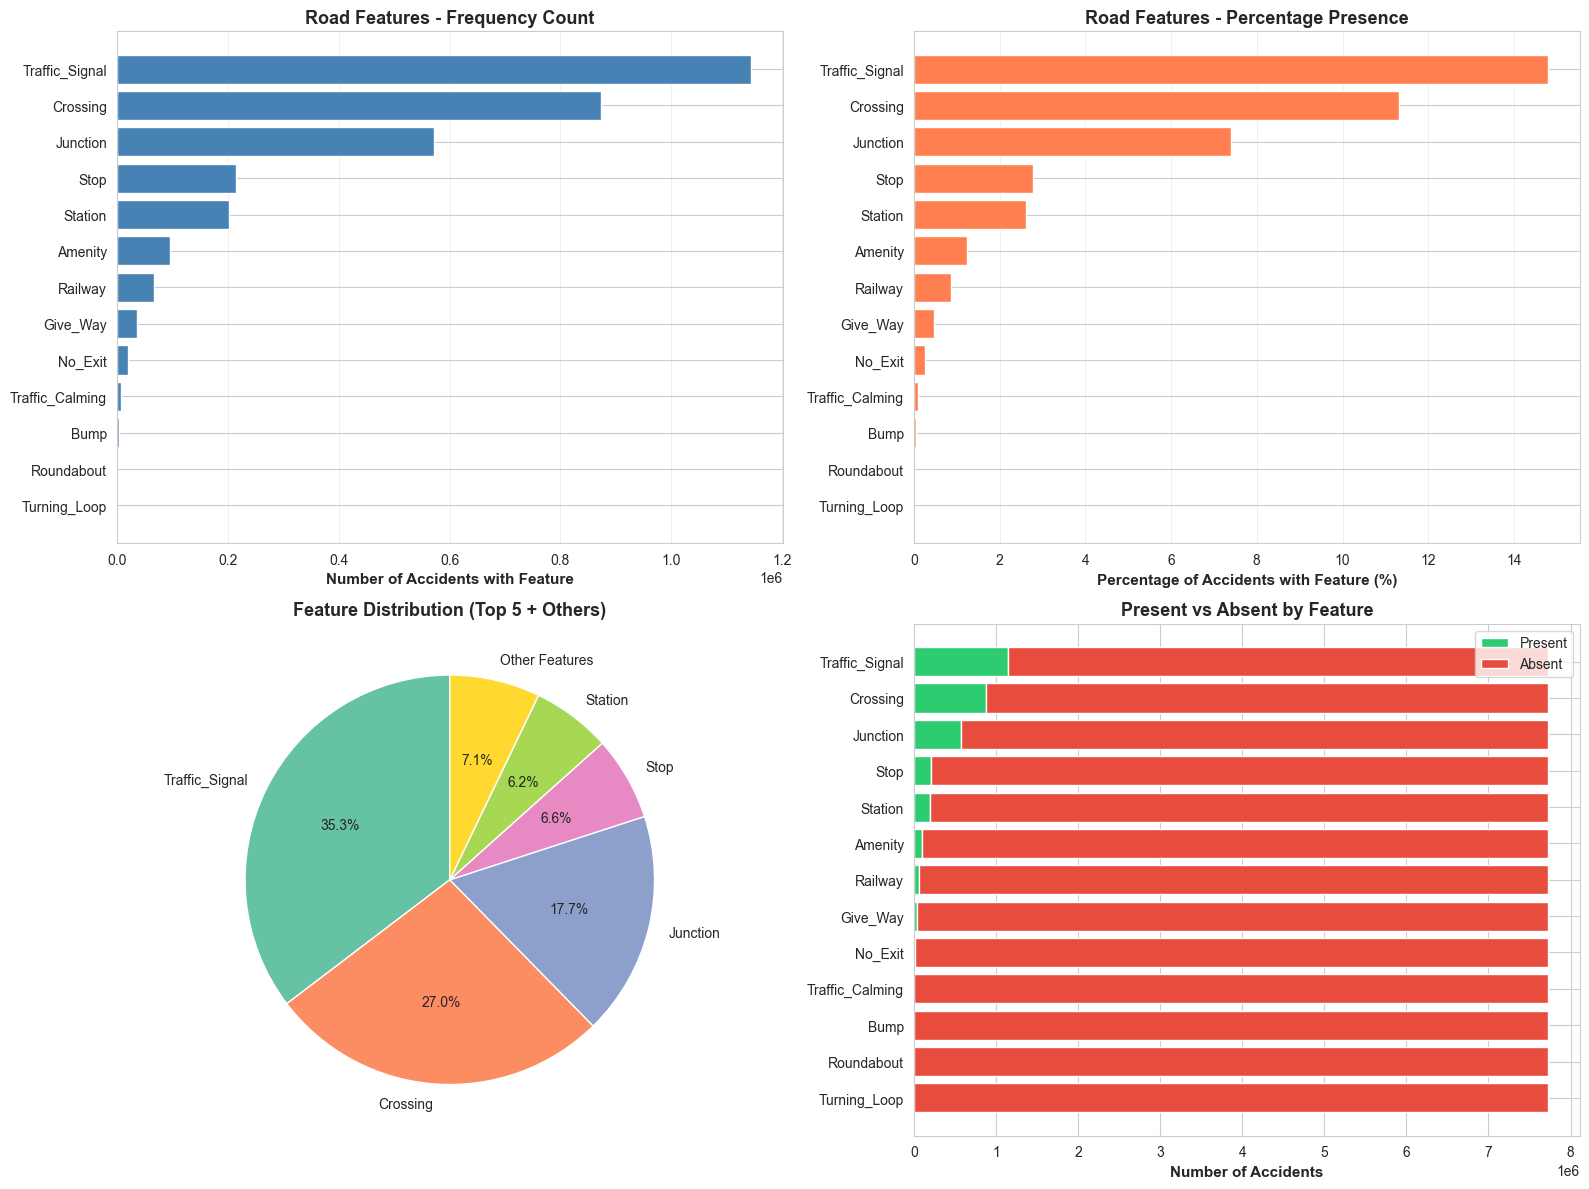


2. ROAD FEATURES IMPACT ON SEVERITY

⚠️  Severity Analysis by Feature:
--------------------------------------------------------------------------------
             Feature | With Feature |      Without |   Difference |     Impact
--------------------------------------------------------------------------------
             Amenity |        2.070 |        2.214 |       -0.144 |  Decreases
                Bump |        2.094 |        2.212 |       -0.118 |  Decreases
            Crossing |        2.064 |        2.231 |       -0.167 |  Decreases
            Give_Way |        2.179 |        2.213 |       -0.034 |  Decreases
            Junction |        2.298 |        2.206 |       +0.093 |  Increases
             No_Exit |        2.112 |        2.213 |       -0.100 |  Decreases
             Railway |        2.159 |        2.213 |       -0.054 |  Decreases
          Roundabout |        2.068 |        2.212 |       -0.144 |  Decreases
             Station |        2.075 |        2.216 |   

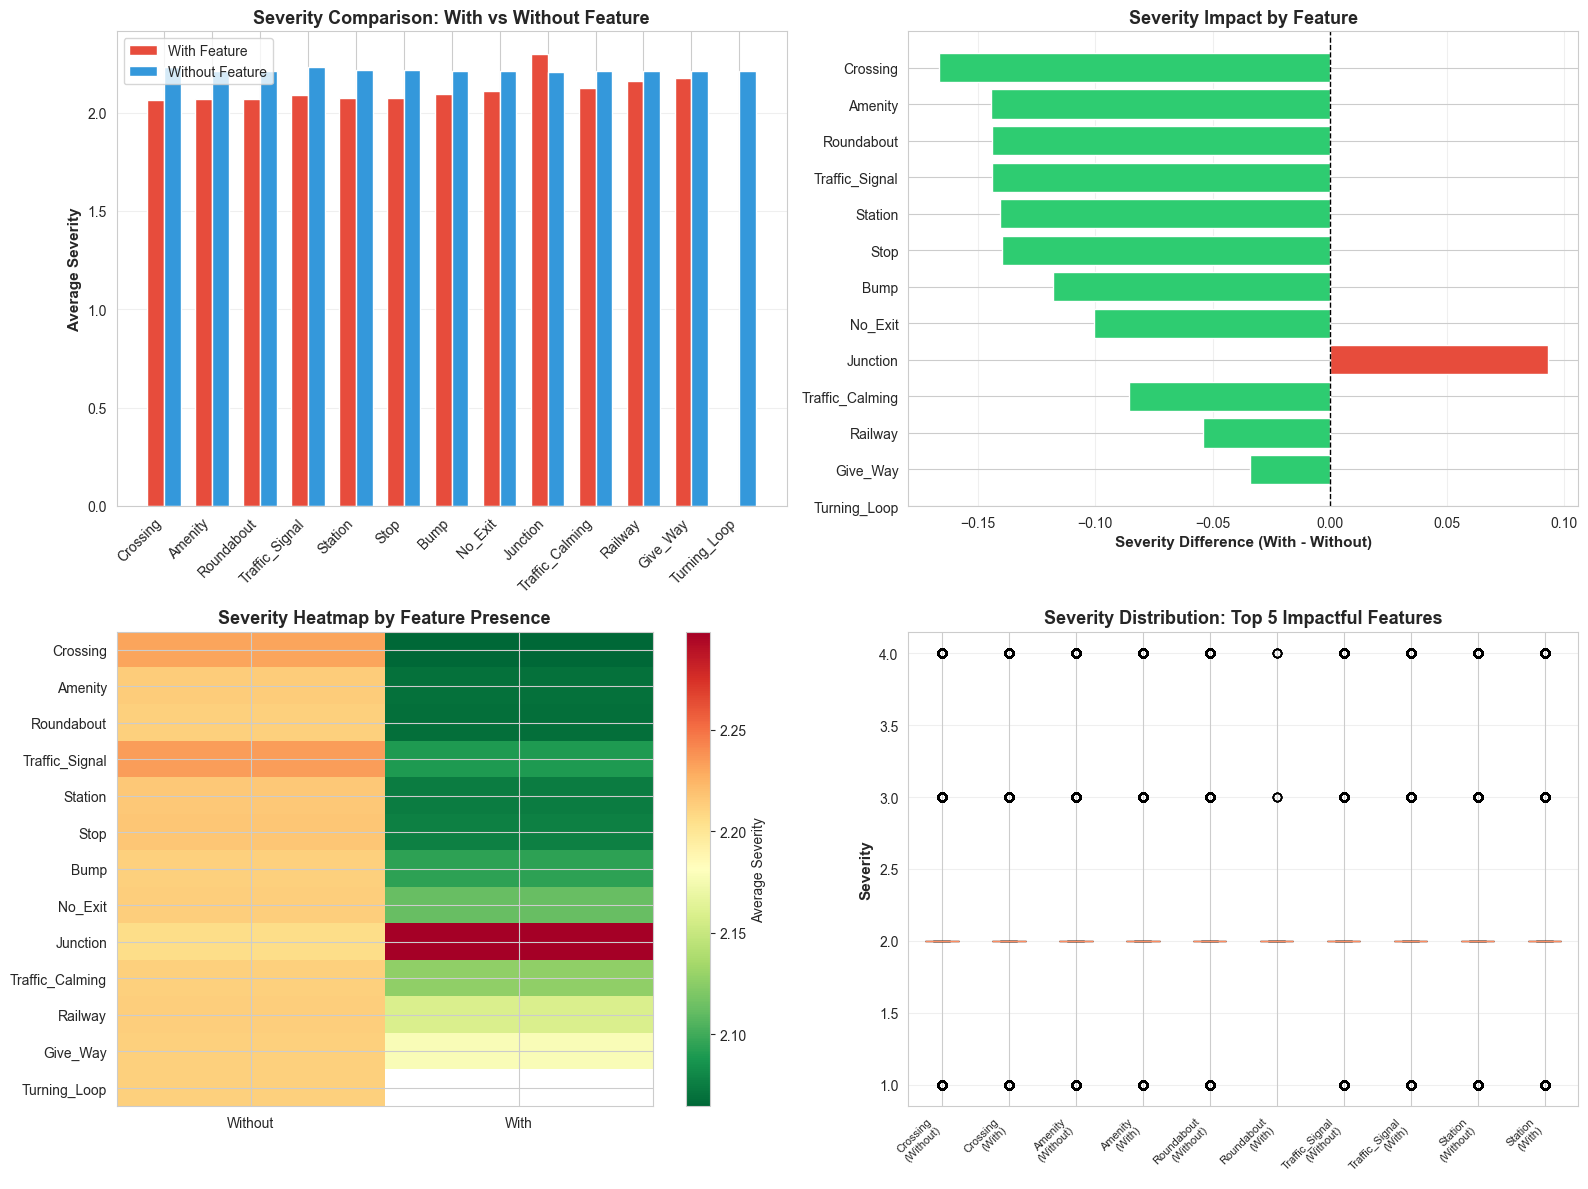


3. ROAD FEATURE COMBINATIONS ANALYSIS

🔢 Number of Features per Accident:
--------------------------------------------------------------------------------
  # Features |        Count | Percentage
--------------------------------------------------------------------------------
           0 |    5,427,044 |     70.22%
           1 |    1,543,182 |     19.97%
           2 |      609,259 |      7.88%
           3 |      124,709 |      1.61%
           4 |       21,086 |      0.27%
           5 |        2,907 |      0.04%
           6 |          205 |      0.00%
           7 |            2 |      0.00%

📊 Feature Count Statistics:
  Mean features per accident: 0.42
  Median features per accident: 0
  Max features in single accident: 7
  Accidents with no features: 5,427,044 (70.22%)
  Accidents with 2+ features: 758,168 (9.81%)

🔗 Top 10 Most Common 2-Feature Combinations:
--------------------------------------------------------------------------------
   1. Crossing + Traffic_Signal: 543,

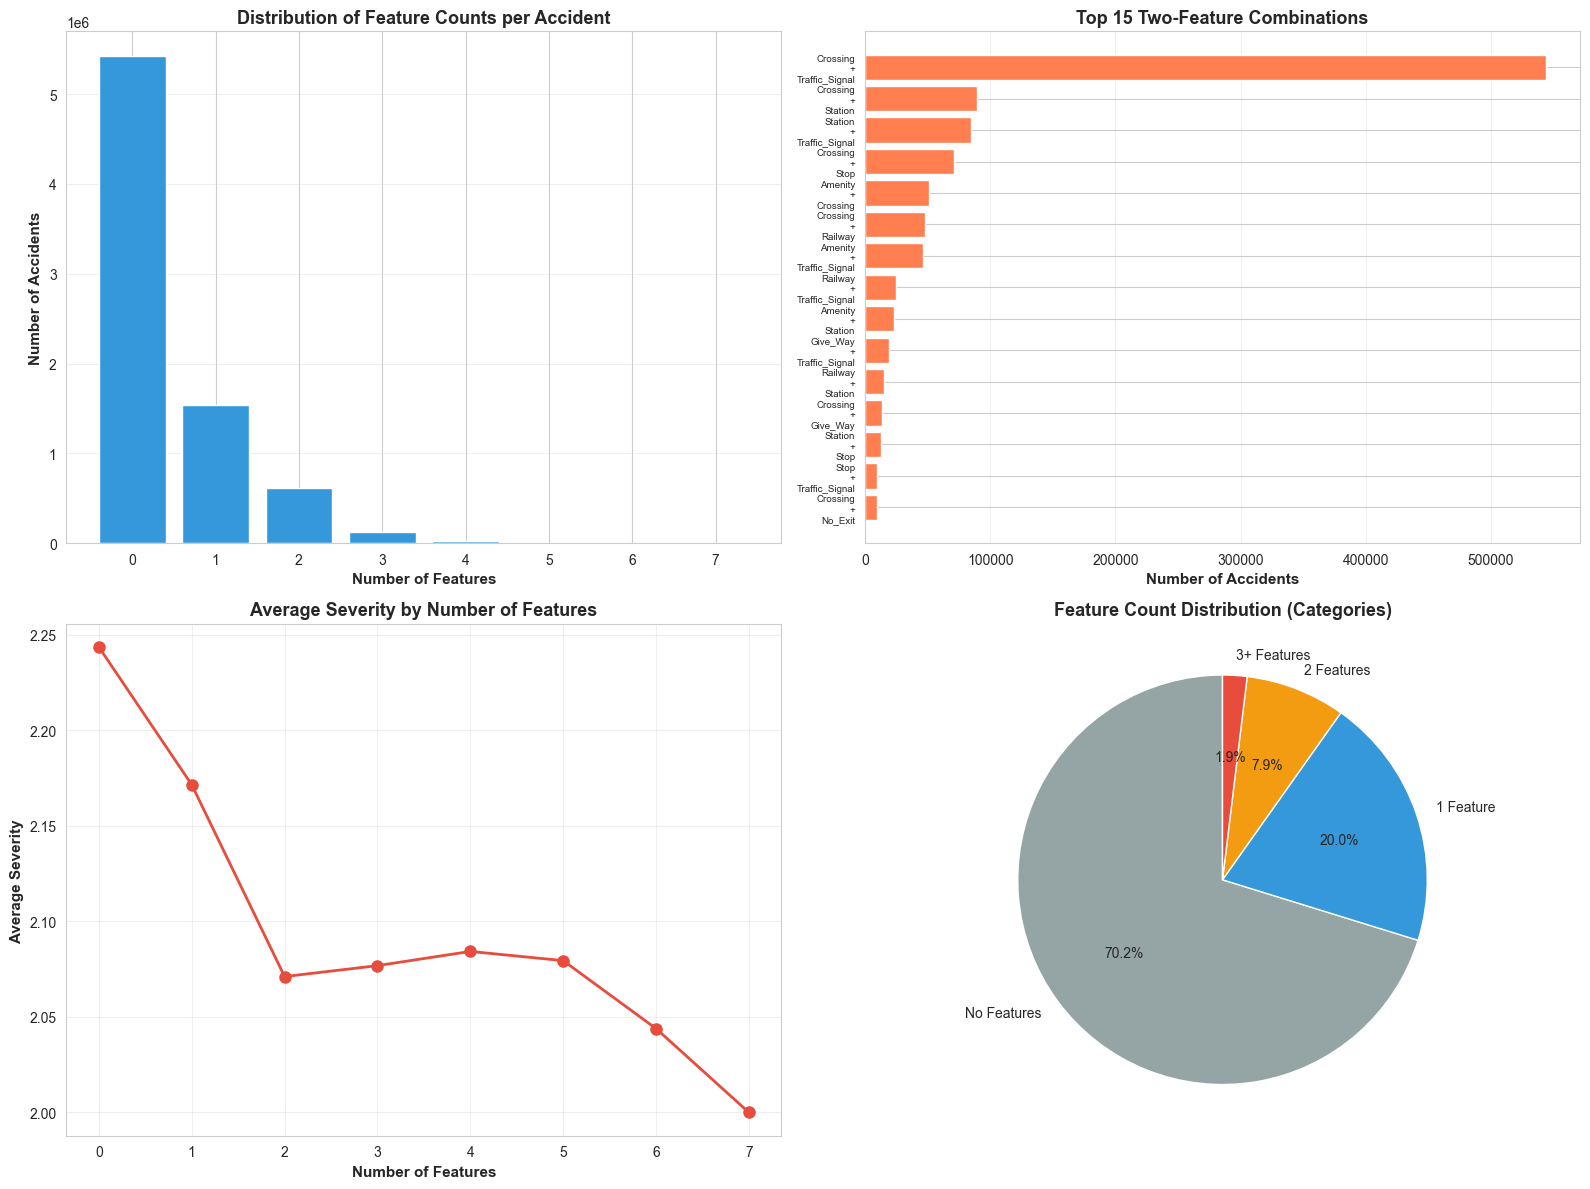


4. ROAD FEATURE CORRELATION ANALYSIS

🔗 Feature Correlation Matrix:
--------------------------------------------------------------------------------
                 Amenity   Bump  Crossing  Give_Way  Junction  No_Exit  \
Amenity            1.000  0.006     0.149     0.006    -0.026    0.014   
Bump               0.006  1.000     0.012     0.000    -0.004    0.015   
Crossing           0.149  0.012     1.000     0.058    -0.088    0.061   
Give_Way           0.006  0.000     0.058     1.000    -0.009    0.006   
Junction          -0.026 -0.004    -0.088    -0.009     1.000   -0.004   
No_Exit            0.014  0.015     0.061     0.006    -0.004    1.000   
Railway            0.050  0.001     0.178     0.003    -0.009    0.004   
Roundabout         0.000 -0.000     0.001     0.002     0.013   -0.000   
Station            0.151  0.005     0.170    -0.003    -0.039    0.017   
Stop               0.034  0.020     0.116     0.031    -0.037    0.026   
Traffic_Calming    0.024  0.680     

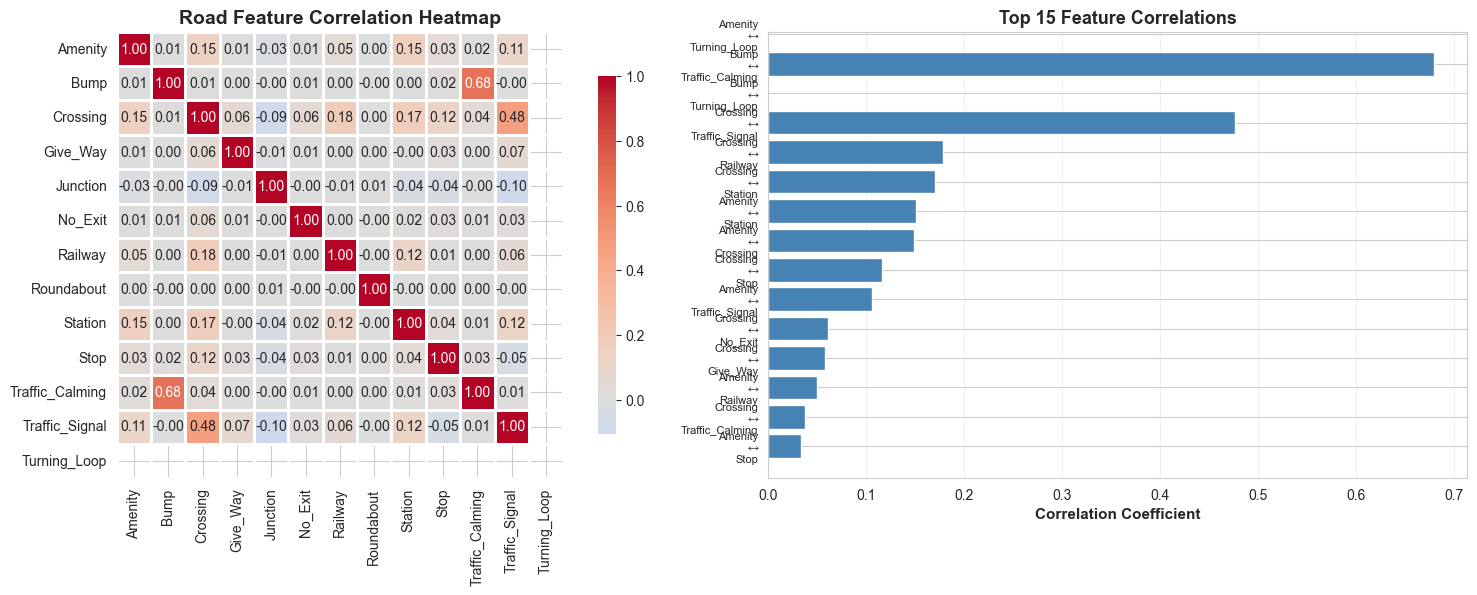


5. HIGH-RISK FEATURE COMBINATIONS

⚠️  Top 15 Highest Severity 2-Feature Combinations (min 100 cases):
--------------------------------------------------------------------------------
Rank |            Feature 1 +            Feature 2 |    Avg Sev |      Count
--------------------------------------------------------------------------------
   1 |                 Bump +              No_Exit |      2.698 |        129
   2 |              No_Exit +      Traffic_Calming |      2.538 |        169
   3 |              Amenity +      Traffic_Calming |      2.396 |        732
   4 |             Junction +              Railway |      2.389 |      3,264
   5 |             Junction +              Station |      2.355 |      2,384
   6 |             Junction +       Traffic_Signal |      2.339 |      9,328
   7 |              Railway +              Station |      2.306 |     15,222
   8 |             Junction +              No_Exit |      2.306 |      1,018
   9 |             Crossing +            

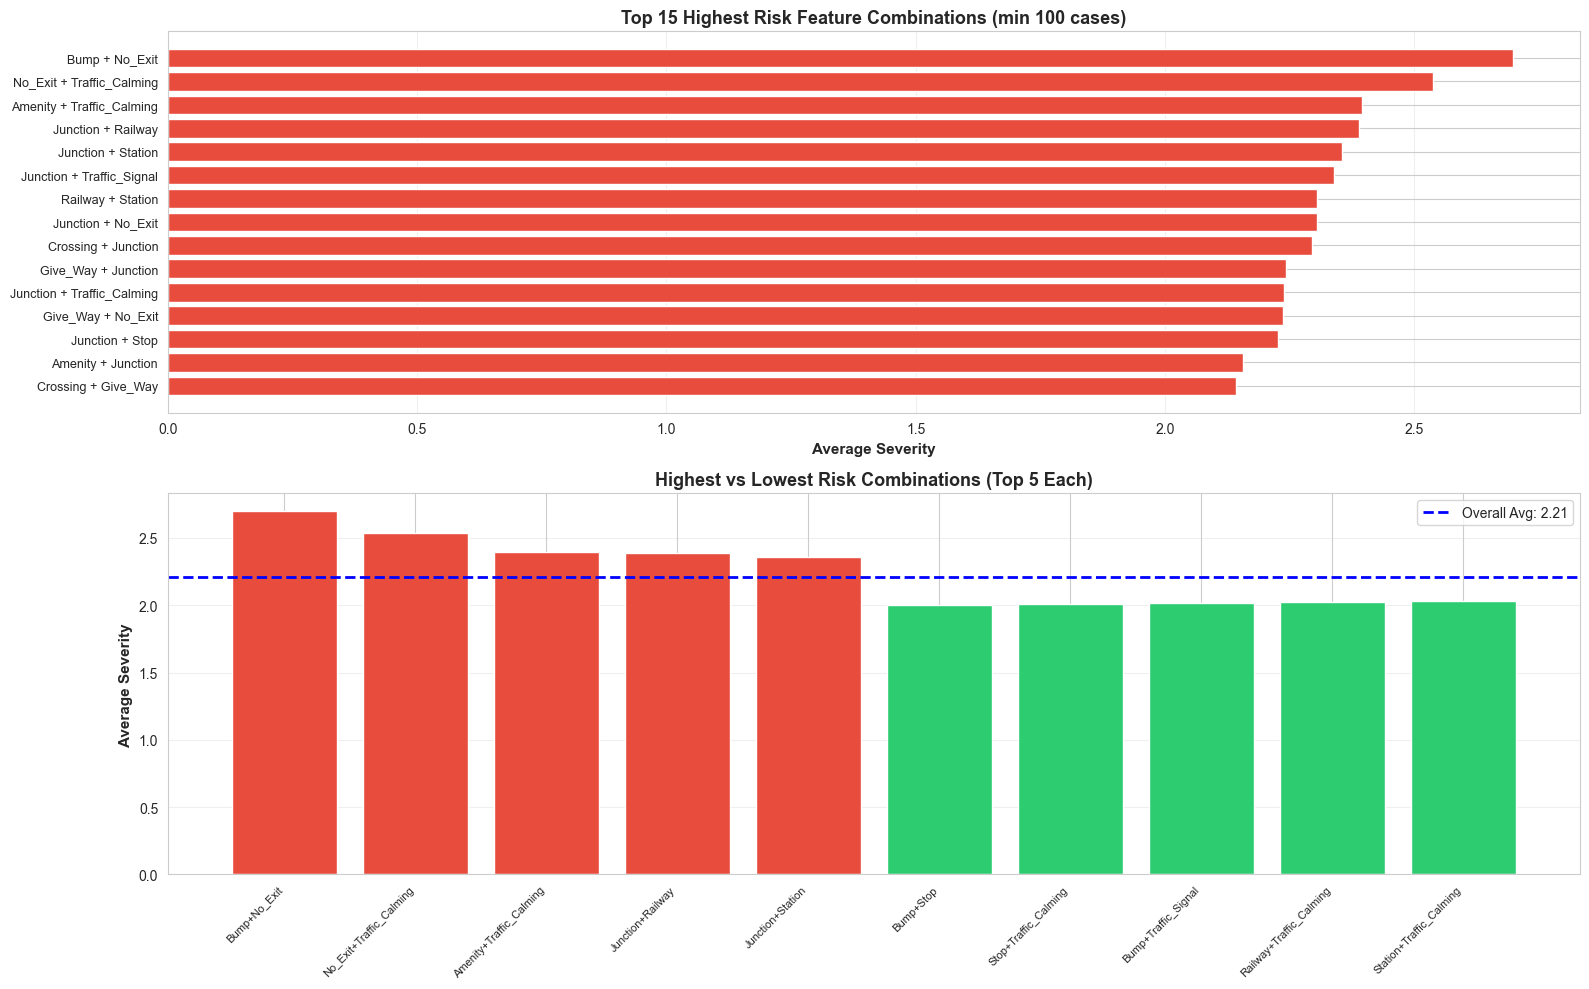


6. ROAD FEATURES ANALYSIS SUMMARY

ROAD FEATURES ANALYSIS SUMMARY
US Accidents Dataset - Traffic Accident Risk Predictor
Generated: 2025-11-04 21:20:40

1. FEATURE AVAILABILITY
--------------------------------------------------------------------------------
   Total Road Features: 13
   Available in Dataset: 13
   Missing from Dataset: 0

2. FEATURE FREQUENCY
--------------------------------------------------------------------------------
   Most Common: Traffic_Signal (14.80%)
   Least Common: Turning_Loop (0.00%)


3. FEATURE COMBINATIONS
--------------------------------------------------------------------------------
   Mean features per accident: 0.42
   Median features per accident: 0
   Accidents with no features: 5,427,044 (70.22%)
   Accidents with 2+ features: 758,168 (9.81%)


4. SEVERITY IMPACT
--------------------------------------------------------------------------------
   Most Increases Severity: Junction (+0.093)
   Most Decreases Severity: Crossing (-0.167)


5. KEY 

In [19]:
# Run complete analysis
analyzer = RoadFeaturesAnalysis(dataset)
analyzer.run_complete_analysis()

___

In [3]:
"""
EDA Part 6: Feature Correlations & Relationships (Notebook Version)
US Accidents Dataset - Traffic Accident Risk Predictor
Project Partners: Diparna Adhikary and Maddy Nommer

Goal: Analyze correlations and relationships across all feature types:
- Overall correlation matrix
- Correlations with Severity (target variable)
- Temporal-Weather correlations
- Geographic-Severity correlations
- Road Features-Weather correlations
- Multivariate relationships
- Feature importance insights

Usage in Notebook:
------------------
import pandas as pd
from eda_part6_correlation_analysis import CorrelationAnalysis

df = pd.read_csv('US_Accidents.csv')
analyzer = CorrelationAnalysis(df)
analyzer.run_complete_analysis()
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy.stats import chi2_contingency, pearsonr
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
sns.set_style('whitegrid')
sns.set_palette('Set2')
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 10

class CorrelationAnalysis:
    """
    Comprehensive Correlation and Relationships Analysis (Notebook Version)
    Works directly with DataFrame, displays plots inline
    """
    
    def __init__(self, df):
        """
        Initialize with DataFrame
        
        Parameters:
        -----------
        df : pandas.DataFrame
            US Accidents dataset
        """
        print("="*80)
        print("EDA PART 6: FEATURE CORRELATIONS & RELATIONSHIPS ANALYSIS")
        print("US Accidents Dataset - Traffic Accident Risk Predictor")
        print("="*80)
        
        self.df = df.copy()
        print(f"\n✓ DataFrame loaded: {self.df.shape[0]:,} rows × {self.df.shape[1]} columns")
        
        # Prepare features
        self._prepare_features()
    
    def _prepare_features(self):
        """
        Prepare and categorize features for analysis
        """
        print("\n📋 Preparing features for correlation analysis...")
        
        # Extract temporal features if not already present
        if 'Start_Time' in self.df.columns and self.df['Start_Time'].dtype == 'object':
            self.df['Start_Time'] = pd.to_datetime(self.df['Start_Time'], format='mixed', errors='coerce')
        
        if 'Start_Time' in self.df.columns and 'Hour' not in self.df.columns:
            self.df['Hour'] = self.df['Start_Time'].dt.hour
            self.df['DayOfWeek'] = self.df['Start_Time'].dt.dayofweek
            self.df['Month'] = self.df['Start_Time'].dt.month
            self.df['Year'] = self.df['Start_Time'].dt.year
        
        # Define feature categories
        self.temporal_features = ['Hour', 'DayOfWeek', 'Month', 'Year']
        
        self.weather_features = [
            'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
            'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)'
        ]
        
        self.geographic_features = [
            'Start_Lat', 'Start_Lng', 'Distance(mi)'
        ]
        
        self.road_features = [
            'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit',
            'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming',
            'Traffic_Signal', 'Turning_Loop'
        ]
        
        # Filter to available features
        self.temporal_features = [f for f in self.temporal_features if f in self.df.columns]
        self.weather_features = [f for f in self.weather_features if f in self.df.columns]
        self.geographic_features = [f for f in self.geographic_features if f in self.df.columns]
        self.road_features = [f for f in self.road_features if f in self.df.columns]
        
        # All numeric features
        self.all_numeric_features = (self.temporal_features + 
                                     self.weather_features + 
                                     self.geographic_features)
        
        print(f"  ✓ Temporal features: {len(self.temporal_features)}")
        print(f"  ✓ Weather features: {len(self.weather_features)}")
        print(f"  ✓ Geographic features: {len(self.geographic_features)}")
        print(f"  ✓ Road features (binary): {len(self.road_features)}")
        print(f"  ✓ Total numeric features: {len(self.all_numeric_features)}")
    
    def overall_correlation_matrix(self):
        """
        Generate overall correlation matrix for all numeric features
        """
        print("\n" + "="*80)
        print("1. OVERALL CORRELATION MATRIX")
        print("="*80)
        
        if len(self.all_numeric_features) < 2:
            print("✗ Not enough numeric features for correlation analysis!")
            return
        
        # Add Severity if available
        features_for_corr = self.all_numeric_features.copy()
        if 'Severity' in self.df.columns:
            features_for_corr.append('Severity')
        
        # Calculate correlation matrix
        corr_data = self.df[features_for_corr].corr()
        
        print(f"\n📊 Correlation Matrix Shape: {corr_data.shape}")
        print(f"Number of features: {len(features_for_corr)}")
        
        # Find strongest correlations (excluding diagonal)
        print(f"\n🔗 Top 15 Strongest Correlations (absolute value):")
        print("-"*80)
        
        correlations = []
        for i in range(len(corr_data.columns)):
            for j in range(i+1, len(corr_data.columns)):
                feat1 = corr_data.columns[i]
                feat2 = corr_data.columns[j]
                corr_val = corr_data.iloc[i, j]
                if not pd.isna(corr_val):
                    correlations.append((feat1, feat2, corr_val))
        
        # Sort by absolute value
        correlations.sort(key=lambda x: abs(x[2]), reverse=True)
        
        for i, (feat1, feat2, corr_val) in enumerate(correlations[:15], 1):
            strength = "Very Strong" if abs(corr_val) > 0.8 else "Strong" if abs(corr_val) > 0.6 else "Moderate"
            direction = "positive" if corr_val > 0 else "negative"
            print(f"  {i:2d}. {feat1:20s} ↔ {feat2:20s}: {corr_val:+.3f} ({strength} {direction})")
        
        # Weakest correlations
        print(f"\n🔗 10 Weakest Correlations (closest to zero):")
        print("-"*80)
        
        correlations_abs_sorted = sorted(correlations, key=lambda x: abs(x[2]))
        for i, (feat1, feat2, corr_val) in enumerate(correlations_abs_sorted[:10], 1):
            print(f"  {i:2d}. {feat1:20s} ↔ {feat2:20s}: {corr_val:+.3f}")
        
        # Visualizations
        fig, axes = plt.subplots(1, 2, figsize=(18, 8))
        
        # Full correlation heatmap
        sns.heatmap(corr_data, annot=False, cmap='coolwarm', center=0,
                   square=True, linewidths=0.5, cbar_kws={"shrink": 0.8}, ax=axes[0])
        axes[0].set_title('Overall Correlation Matrix (All Numeric Features)', 
                         fontsize=14, fontweight='bold')
        
        # Top correlations bar chart
        top_20_corr = correlations[:20]
        corr_labels = [f"{f1[:15]}↔{f2[:15]}" for f1, f2, _ in top_20_corr]
        corr_values = [c for _, _, c in top_20_corr]
        colors = ['#e74c3c' if c > 0 else '#3498db' for c in corr_values]
        
        axes[1].barh(range(len(corr_labels)), corr_values, color=colors)
        axes[1].set_yticks(range(len(corr_labels)))
        axes[1].set_yticklabels(corr_labels, fontsize=8)
        axes[1].set_xlabel('Correlation Coefficient', fontsize=11, fontweight='bold')
        axes[1].set_title('Top 20 Strongest Correlations', fontsize=13, fontweight='bold')
        axes[1].axvline(x=0, color='black', linestyle='-', linewidth=1)
        axes[1].invert_yaxis()
        axes[1].grid(True, alpha=0.3, axis='x')
        
        plt.tight_layout()
        plt.show()
        
        return corr_data
    
    def severity_correlations(self):
        """
        Analyze correlations with Severity (target variable)
        """
        print("\n" + "="*80)
        print("2. CORRELATIONS WITH SEVERITY (TARGET VARIABLE)")
        print("="*80)
        
        if 'Severity' not in self.df.columns:
            print("✗ Severity column not available!")
            return
        
        # Numeric features correlation with Severity
        print(f"\n⚠️  Numeric Features Correlation with Severity:")
        print("-"*80)
        print(f"{'Feature':>25} | {'Correlation':>12} | {'Abs Value':>10} | {'Strength':>15}")
        print("-"*80)
        
        severity_corr = {}
        for feature in self.all_numeric_features:
            if feature in self.df.columns:
                # Calculate correlation
                valid_data = self.df[[feature, 'Severity']].dropna()
                if len(valid_data) > 0:
                    corr_val = valid_data[feature].corr(valid_data['Severity'])
                    if not pd.isna(corr_val):
                        severity_corr[feature] = corr_val
                        
                        strength = "Very Strong" if abs(corr_val) > 0.7 else "Strong" if abs(corr_val) > 0.4 else "Moderate" if abs(corr_val) > 0.2 else "Weak"
                        print(f"{feature:>25} | {corr_val:>+12.3f} | {abs(corr_val):>10.3f} | {strength:>15}")
        
        # Sort by absolute correlation
        sorted_severity_corr = sorted(severity_corr.items(), key=lambda x: abs(x[1]), reverse=True)
        
        print(f"\n📊 Top 10 Features Most Correlated with Severity:")
        print("-"*80)
        for i, (feature, corr_val) in enumerate(sorted_severity_corr[:10], 1):
            direction = "increases" if corr_val > 0 else "decreases"
            print(f"  {i:2d}. {feature:25s}: {corr_val:+.3f} ({direction} severity)")
        
        # Road features (binary) correlation with Severity
        if self.road_features:
            print(f"\n🛣️  Road Features (Binary) Correlation with Severity:")
            print("-"*80)
            
            road_severity_corr = {}
            for feature in self.road_features:
                if feature in self.df.columns:
                    # Point-biserial correlation (for binary variables)
                    valid_data = self.df[[feature, 'Severity']].dropna()
                    if len(valid_data) > 0:
                        corr_val = valid_data[feature].astype(int).corr(valid_data['Severity'])
                        if not pd.isna(corr_val):
                            road_severity_corr[feature] = corr_val
                            print(f"  {feature:25s}: {corr_val:+.3f}")
            
            sorted_road_corr = sorted(road_severity_corr.items(), key=lambda x: abs(x[1]), reverse=True)
            
            print(f"\n  Top 5 Road Features by Severity Correlation:")
            for i, (feature, corr_val) in enumerate(sorted_road_corr[:5], 1):
                print(f"    {i}. {feature}: {corr_val:+.3f}")
        
        # Visualizations
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        
        # Bar chart - all numeric features
        features = [f for f, _ in sorted_severity_corr]
        correlations = [c for _, c in sorted_severity_corr]
        colors = ['#e74c3c' if c > 0 else '#3498db' for c in correlations]
        
        axes[0, 0].barh(range(len(features)), correlations, color=colors)
        axes[0, 0].set_yticks(range(len(features)))
        axes[0, 0].set_yticklabels(features, fontsize=8)
        axes[0, 0].set_xlabel('Correlation with Severity', fontsize=11, fontweight='bold')
        axes[0, 0].set_title('Numeric Features Correlation with Severity', fontsize=13, fontweight='bold')
        axes[0, 0].axvline(x=0, color='black', linestyle='-', linewidth=1)
        axes[0, 0].invert_yaxis()
        axes[0, 0].grid(True, alpha=0.3, axis='x')
        
        # Scatter plot - strongest positive correlation
        if len(sorted_severity_corr) > 0:
            strongest_feature, strongest_corr = sorted_severity_corr[0]
            sample_size = min(10000, len(self.df))
            sample = self.df[[strongest_feature, 'Severity']].dropna().sample(n=min(sample_size, len(self.df[[strongest_feature, 'Severity']].dropna())))
            
            axes[0, 1].scatter(sample[strongest_feature], sample['Severity'], alpha=0.3, s=10)
            axes[0, 1].set_xlabel(strongest_feature, fontsize=11, fontweight='bold')
            axes[0, 1].set_ylabel('Severity', fontsize=11, fontweight='bold')
            axes[0, 1].set_title(f'Strongest Correlation: {strongest_feature} vs Severity\n(r = {strongest_corr:.3f})', 
                                fontsize=13, fontweight='bold')
            axes[0, 1].grid(True, alpha=0.3)
        
        # Road features correlation
        if road_severity_corr:
            road_features_list = [f for f, _ in sorted_road_corr]
            road_correlations = [c for _, c in sorted_road_corr]
            road_colors = ['#e74c3c' if c > 0 else '#2ecc71' for c in road_correlations]
            
            axes[1, 0].barh(range(len(road_features_list)), road_correlations, color=road_colors)
            axes[1, 0].set_yticks(range(len(road_features_list)))
            axes[1, 0].set_yticklabels(road_features_list, fontsize=9)
            axes[1, 0].set_xlabel('Correlation with Severity', fontsize=11, fontweight='bold')
            axes[1, 0].set_title('Road Features Correlation with Severity', fontsize=13, fontweight='bold')
            axes[1, 0].axvline(x=0, color='black', linestyle='-', linewidth=1)
            axes[1, 0].invert_yaxis()
            axes[1, 0].grid(True, alpha=0.3, axis='x')
        
        # Correlation strength distribution
        abs_correlations = [abs(c) for _, c in sorted_severity_corr]
        axes[1, 1].hist(abs_correlations, bins=20, color='#9b59b6', edgecolor='black', alpha=0.7)
        axes[1, 1].set_xlabel('Absolute Correlation with Severity', fontsize=11, fontweight='bold')
        axes[1, 1].set_ylabel('Number of Features', fontsize=11, fontweight='bold')
        axes[1, 1].set_title('Distribution of Correlation Strengths', fontsize=13, fontweight='bold')
        axes[1, 1].axvline(x=0.3, color='red', linestyle='--', linewidth=2, label='Moderate threshold (0.3)')
        axes[1, 1].legend()
        axes[1, 1].grid(True, alpha=0.3, axis='y')
        
        plt.tight_layout()
        plt.show()
        
        return severity_corr
    
    def temporal_weather_correlations(self):
        """
        Analyze correlations between temporal and weather features
        """
        print("\n" + "="*80)
        print("3. TEMPORAL-WEATHER CORRELATIONS")
        print("="*80)
        
        if not self.temporal_features or not self.weather_features:
            print("✗ Insufficient temporal or weather features!")
            return
        
        # Calculate correlation matrix
        temp_weather_features = self.temporal_features + self.weather_features
        corr_matrix = self.df[temp_weather_features].corr()
        
        print(f"\n🌦️⏰ Temporal-Weather Correlation Analysis:")
        print("-"*80)
        
        # Extract temporal-weather correlations
        print(f"\nKey Temporal-Weather Relationships:")
        print("-"*80)
        
        temporal_weather_pairs = []
        for temp_feat in self.temporal_features:
            for weather_feat in self.weather_features:
                if temp_feat in corr_matrix.index and weather_feat in corr_matrix.columns:
                    corr_val = corr_matrix.loc[temp_feat, weather_feat]
                    if not pd.isna(corr_val):
                        temporal_weather_pairs.append((temp_feat, weather_feat, corr_val))
        
        # Sort by absolute correlation
        temporal_weather_pairs.sort(key=lambda x: abs(x[2]), reverse=True)
        
        for i, (temp_feat, weather_feat, corr_val) in enumerate(temporal_weather_pairs[:15], 1):
            print(f"  {i:2d}. {temp_feat:15s} ↔ {weather_feat:20s}: {corr_val:+.3f}")
        
        # Seasonal temperature patterns
        if 'Month' in self.df.columns and 'Temperature(F)' in self.df.columns:
            print(f"\n🌡️  Average Temperature by Month:")
            print("-"*80)
            month_temp = self.df.groupby('Month')['Temperature(F)'].mean()
            month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
            
            for month, temp in month_temp.items():
                print(f"  {month_names[int(month)-1]:>4s}: {temp:.1f}°F")
        
        # Visualizations
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        
        # Heatmap - temporal vs weather
        # Extract relevant submatrix
        temporal_indices = [f for f in self.temporal_features if f in corr_matrix.index]
        weather_indices = [f for f in self.weather_features if f in corr_matrix.columns]
        
        if temporal_indices and weather_indices:
            sub_corr = corr_matrix.loc[temporal_indices, weather_indices]
            
            sns.heatmap(sub_corr, annot=True, fmt='.2f', cmap='coolwarm', center=0,
                       cbar_kws={"shrink": 0.8}, ax=axes[0, 0])
            axes[0, 0].set_title('Temporal-Weather Correlation Heatmap', fontsize=13, fontweight='bold')
        
        # Month vs Temperature
        if 'Month' in self.df.columns and 'Temperature(F)' in self.df.columns:
            month_temp = self.df.groupby('Month')['Temperature(F)'].mean()
            
            axes[0, 1].plot(month_temp.index, month_temp.values, marker='o', 
                           linewidth=2.5, markersize=8, color='#e74c3c')
            axes[0, 1].fill_between(month_temp.index, month_temp.values, alpha=0.3, color='#e74c3c')
            axes[0, 1].set_xlabel('Month', fontsize=11, fontweight='bold')
            axes[0, 1].set_ylabel('Average Temperature (°F)', fontsize=11, fontweight='bold')
            axes[0, 1].set_title('Temperature by Month', fontsize=13, fontweight='bold')
            axes[0, 1].set_xticks(range(1, 13))
            axes[0, 1].set_xticklabels(month_names, rotation=45)
            axes[0, 1].grid(True, alpha=0.3)
        
        # Hour vs Temperature
        if 'Hour' in self.df.columns and 'Temperature(F)' in self.df.columns:
            hour_temp = self.df.groupby('Hour')['Temperature(F)'].mean()
            
            axes[1, 0].plot(hour_temp.index, hour_temp.values, marker='s', 
                           linewidth=2, markersize=6, color='#3498db')
            axes[1, 0].fill_between(hour_temp.index, hour_temp.values, alpha=0.3, color='#3498db')
            axes[1, 0].set_xlabel('Hour of Day', fontsize=11, fontweight='bold')
            axes[1, 0].set_ylabel('Average Temperature (°F)', fontsize=11, fontweight='bold')
            axes[1, 0].set_title('Temperature by Hour of Day', fontsize=13, fontweight='bold')
            axes[1, 0].set_xticks(range(0, 24, 2))
            axes[1, 0].grid(True, alpha=0.3)
        
        # Top correlations bar chart
        top_10_pairs = temporal_weather_pairs[:10]
        pair_labels = [f"{t}↔{w}" for t, w, _ in top_10_pairs]
        pair_values = [c for _, _, c in top_10_pairs]
        pair_colors = ['#e74c3c' if c > 0 else '#3498db' for c in pair_values]
        
        axes[1, 1].barh(range(len(pair_labels)), pair_values, color=pair_colors)
        axes[1, 1].set_yticks(range(len(pair_labels)))
        axes[1, 1].set_yticklabels(pair_labels, fontsize=9)
        axes[1, 1].set_xlabel('Correlation Coefficient', fontsize=11, fontweight='bold')
        axes[1, 1].set_title('Top 10 Temporal-Weather Correlations', fontsize=13, fontweight='bold')
        axes[1, 1].axvline(x=0, color='black', linestyle='-', linewidth=1)
        axes[1, 1].invert_yaxis()
        axes[1, 1].grid(True, alpha=0.3, axis='x')
        
        plt.tight_layout()
        plt.show()
    
    def geographic_severity_correlations(self):
        """
        Analyze geographic patterns with severity
        """
        print("\n" + "="*80)
        print("4. GEOGRAPHIC-SEVERITY CORRELATIONS")
        print("="*80)
        
        if not self.geographic_features or 'Severity' not in self.df.columns:
            print("✗ Insufficient geographic features or Severity not available!")
            return
        
        print(f"\n🗺️  Geographic Features Correlation with Severity:")
        print("-"*80)
        
        geo_severity_corr = {}
        for feature in self.geographic_features:
            if feature in self.df.columns:
                valid_data = self.df[[feature, 'Severity']].dropna()
                if len(valid_data) > 0:
                    corr_val = valid_data[feature].corr(valid_data['Severity'])
                    if not pd.isna(corr_val):
                        geo_severity_corr[feature] = corr_val
                        print(f"  {feature:20s}: {corr_val:+.3f}")
        
        # State-level severity analysis (if available)
        if 'State' in self.df.columns:
            print(f"\n🗺️  Severity by State (Top 10 and Bottom 10):")
            print("-"*80)
            
            state_severity = self.df.groupby('State')['Severity'].agg(['mean', 'count'])
            state_severity_filtered = state_severity[state_severity['count'] >= 1000]
            state_severity_sorted = state_severity_filtered.sort_values('mean', ascending=False)
            
            print(f"\n  Top 10 Highest Severity States:")
            for i, (state, row) in enumerate(state_severity_sorted.head(10).iterrows(), 1):
                print(f"    {i:2d}. {state}: {row['mean']:.3f} ({row['count']:,} accidents)")
            
            print(f"\n  Top 10 Lowest Severity States:")
            for i, (state, row) in enumerate(state_severity_sorted.tail(10).iterrows(), 1):
                print(f"    {i:2d}. {state}: {row['mean']:.3f} ({row['count']:,} accidents)")
        
        # Visualizations
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        
        # Geographic features correlation with severity
        geo_features = list(geo_severity_corr.keys())
        geo_corr_values = list(geo_severity_corr.values())
        geo_colors = ['#e74c3c' if c > 0 else '#3498db' for c in geo_corr_values]
        
        axes[0, 0].bar(range(len(geo_features)), geo_corr_values, color=geo_colors)
        axes[0, 0].set_xticks(range(len(geo_features)))
        axes[0, 0].set_xticklabels(geo_features, rotation=45, ha='right')
        axes[0, 0].set_ylabel('Correlation with Severity', fontsize=11, fontweight='bold')
        axes[0, 0].set_title('Geographic Features Correlation with Severity', fontsize=13, fontweight='bold')
        axes[0, 0].axhline(y=0, color='black', linestyle='-', linewidth=1)
        axes[0, 0].grid(True, alpha=0.3, axis='y')
        
        # Latitude vs Severity (sample)
        if 'Start_Lat' in self.df.columns:
            sample_size = min(10000, len(self.df))
            sample = self.df[['Start_Lat', 'Severity']].dropna().sample(n=min(sample_size, len(self.df[['Start_Lat', 'Severity']].dropna())))
            
            axes[0, 1].scatter(sample['Start_Lat'], sample['Severity'], alpha=0.3, s=10)
            axes[0, 1].set_xlabel('Latitude', fontsize=11, fontweight='bold')
            axes[0, 1].set_ylabel('Severity', fontsize=11, fontweight='bold')
            axes[0, 1].set_title(f'Latitude vs Severity (Sample: {len(sample):,})', fontsize=13, fontweight='bold')
            axes[0, 1].grid(True, alpha=0.3)
        
        # State severity (if available)
        if 'State' in self.df.columns:
            top_15_states = state_severity_sorted.head(15)
            
            axes[1, 0].barh(range(len(top_15_states)), top_15_states['mean'].values, color='coral')
            axes[1, 0].set_yticks(range(len(top_15_states)))
            axes[1, 0].set_yticklabels(top_15_states.index)
            axes[1, 0].set_xlabel('Average Severity', fontsize=11, fontweight='bold')
            axes[1, 0].set_title('Top 15 States by Average Severity (min 1000 accidents)', 
                                fontsize=13, fontweight='bold')
            axes[1, 0].invert_yaxis()
            axes[1, 0].grid(True, alpha=0.3, axis='x')
        
        # Distance vs Severity
        if 'Distance(mi)' in self.df.columns:
            # Bin distance for better visualization
            distance_bins = [0, 0.5, 1, 2, 5, 100]
            distance_labels = ['<0.5', '0.5-1', '1-2', '2-5', '>5']
            self.df['Distance_Bin'] = pd.cut(self.df['Distance(mi)'], bins=distance_bins, labels=distance_labels)
            
            dist_severity = self.df.groupby('Distance_Bin', observed=True)['Severity'].mean()
            
            axes[1, 1].bar(range(len(dist_severity)), dist_severity.values, color='#9b59b6')
            axes[1, 1].set_xticks(range(len(dist_severity)))
            axes[1, 1].set_xticklabels(distance_labels, rotation=45, ha='right')
            axes[1, 1].set_ylabel('Average Severity', fontsize=11, fontweight='bold')
            axes[1, 1].set_xlabel('Distance Range (miles)', fontsize=11, fontweight='bold')
            axes[1, 1].set_title('Average Severity by Distance Range', fontsize=13, fontweight='bold')
            axes[1, 1].grid(True, alpha=0.3, axis='y')
        
        plt.tight_layout()
        plt.show()
    
    def multivariate_relationships(self):
        """
        Analyze complex multivariate relationships
        """
        print("\n" + "="*80)
        print("5. MULTIVARIATE RELATIONSHIPS")
        print("="*80)
        
        # Weather-Severity-Temporal interactions
        if 'Severity' in self.df.columns and 'Hour' in self.df.columns and 'Temperature(F)' in self.df.columns:
            print(f"\n🌡️⏰⚠️  Temperature-Hour-Severity Interaction:")
            print("-"*80)
            
            # Create temperature bins
            temp_bins = [-50, 32, 50, 70, 90, 150]
            temp_labels = ['Freezing', 'Cold', 'Moderate', 'Warm', 'Hot']
            self.df['Temp_Category'] = pd.cut(self.df['Temperature(F)'], bins=temp_bins, labels=temp_labels)
            
            # Calculate severity by hour and temperature
            pivot_data = self.df.pivot_table(values='Severity', 
                                            index='Hour', 
                                            columns='Temp_Category',
                                            aggfunc='mean')
            
            print("\nAverage Severity by Hour and Temperature Category:")
            print(pivot_data.round(3))
        
        # Weather combinations impact
        if 'Severity' in self.df.columns and 'Visibility(mi)' in self.df.columns and 'Precipitation(in)' in self.df.columns:
            print(f"\n👁️🌧️⚠️  Visibility-Precipitation-Severity Interaction:")
            print("-"*80)
            
            # Create bins
            vis_bins = [-1, 1, 5, 20]
            vis_labels = ['Poor', 'Moderate', 'Good']
            self.df['Vis_Category'] = pd.cut(self.df['Visibility(mi)'], bins=vis_bins, labels=vis_labels)
            
            self.df['Has_Precip'] = self.df['Precipitation(in)'] > 0
            
            # Calculate severity
            vis_precip_severity = self.df.groupby(['Vis_Category', 'Has_Precip'], observed=True)['Severity'].agg(['mean', 'count'])
            
            print("\nAverage Severity by Visibility and Precipitation:")
            print(vis_precip_severity)
        
        # Visualizations
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        
        # Heatmap: Hour vs Temperature Category (Severity)
        if 'Temp_Category' in self.df.columns and 'Hour' in self.df.columns:
            sns.heatmap(pivot_data, annot=False, fmt='.2f', cmap='YlOrRd',
                       cbar_kws={'label': 'Avg Severity'}, ax=axes[0, 0])
            axes[0, 0].set_ylabel('Hour of Day', fontsize=11, fontweight='bold')
            axes[0, 0].set_xlabel('Temperature Category', fontsize=11, fontweight='bold')
            axes[0, 0].set_title('Severity Heatmap: Hour vs Temperature', fontsize=13, fontweight='bold')
        
        # Visibility + Precipitation impact
        if 'Vis_Category' in self.df.columns and 'Has_Precip' in self.df.columns:
            vis_precip_means = vis_precip_severity['mean'].unstack()
            
            x = np.arange(len(vis_precip_means.index))
            width = 0.35
            
            axes[0, 1].bar(x - width/2, vis_precip_means[False], width, label='No Precipitation', color='#3498db')
            axes[0, 1].bar(x + width/2, vis_precip_means[True], width, label='With Precipitation', color='#e74c3c')
            axes[0, 1].set_xticks(x)
            axes[0, 1].set_xticklabels(vis_precip_means.index)
            axes[0, 1].set_ylabel('Average Severity', fontsize=11, fontweight='bold')
            axes[0, 1].set_xlabel('Visibility Category', fontsize=11, fontweight='bold')
            axes[0, 1].set_title('Severity: Visibility × Precipitation Interaction', fontsize=13, fontweight='bold')
            axes[0, 1].legend()
            axes[0, 1].grid(True, alpha=0.3, axis='y')
        
        # Weather correlation mini-heatmap
        if len(self.weather_features) >= 3:
            weather_corr = self.df[self.weather_features].corr()
            
            sns.heatmap(weather_corr, annot=True, fmt='.2f', cmap='coolwarm', center=0,
                       square=True, cbar_kws={"shrink": 0.8}, ax=axes[1, 0])
            axes[1, 0].set_title('Weather Features Correlation Matrix', fontsize=13, fontweight='bold')
        
        # 3D-style scatter (Temperature vs Visibility, colored by Severity)
        if 'Temperature(F)' in self.df.columns and 'Visibility(mi)' in self.df.columns and 'Severity' in self.df.columns:
            sample_size = min(5000, len(self.df))
            sample = self.df[['Temperature(F)', 'Visibility(mi)', 'Severity']].dropna().sample(
                n=min(sample_size, len(self.df[['Temperature(F)', 'Visibility(mi)', 'Severity']].dropna())))
            
            scatter = axes[1, 1].scatter(sample['Temperature(F)'], sample['Visibility(mi)'], 
                                        c=sample['Severity'], cmap='RdYlGn_r', alpha=0.5, s=20)
            axes[1, 1].set_xlabel('Temperature (°F)', fontsize=11, fontweight='bold')
            axes[1, 1].set_ylabel('Visibility (miles)', fontsize=11, fontweight='bold')
            axes[1, 1].set_title('Temperature vs Visibility (colored by Severity)', fontsize=13, fontweight='bold')
            plt.colorbar(scatter, ax=axes[1, 1], label='Severity')
            axes[1, 1].set_ylim(0, 20)
            axes[1, 1].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
    
    def feature_importance_insights(self):
        """
        Provide insights on feature importance based on correlations
        """
        print("\n" + "="*80)
        print("6. FEATURE IMPORTANCE INSIGHTS")
        print("="*80)
        
        if 'Severity' not in self.df.columns:
            print("✗ Severity column not available!")
            return
        
        print(f"\n📊 Feature Importance Summary (Based on Correlation Analysis):")
        print("-"*80)
        
        # Collect all correlations with Severity
        all_severity_corr = {}
        
        # Numeric features
        for feature in self.all_numeric_features:
            if feature in self.df.columns and feature != 'Severity':
                valid_data = self.df[[feature, 'Severity']].dropna()
                if len(valid_data) > 0:
                    corr_val = valid_data[feature].corr(valid_data['Severity'])
                    if not pd.isna(corr_val):
                        all_severity_corr[feature] = abs(corr_val)
        
        # Road features (binary)
        for feature in self.road_features:
            if feature in self.df.columns:
                valid_data = self.df[[feature, 'Severity']].dropna()
                if len(valid_data) > 0:
                    corr_val = valid_data[feature].astype(int).corr(valid_data['Severity'])
                    if not pd.isna(corr_val):
                        all_severity_corr[feature] = abs(corr_val)
        
        # Sort by importance
        sorted_features = sorted(all_severity_corr.items(), key=lambda x: x[1], reverse=True)
        
        # Categorize by importance
        high_importance = [(f, c) for f, c in sorted_features if c > 0.3]
        moderate_importance = [(f, c) for f, c in sorted_features if 0.1 < c <= 0.3]
        low_importance = [(f, c) for f, c in sorted_features if c <= 0.1]
        
        print(f"\n🔴 High Importance Features (|r| > 0.3): {len(high_importance)}")
        for i, (feature, corr) in enumerate(high_importance, 1):
            print(f"  {i:2d}. {feature:30s}: {corr:.3f}")
        
        print(f"\n🟡 Moderate Importance Features (0.1 < |r| ≤ 0.3): {len(moderate_importance)}")
        for i, (feature, corr) in enumerate(moderate_importance[:10], 1):
            print(f"  {i:2d}. {feature:30s}: {corr:.3f}")
        if len(moderate_importance) > 10:
            print(f"  ... and {len(moderate_importance) - 10} more")
        
        print(f"\n🟢 Low Importance Features (|r| ≤ 0.1): {len(low_importance)}")
        if len(low_importance) <= 10:
            for i, (feature, corr) in enumerate(low_importance, 1):
                print(f"  {i:2d}. {feature:30s}: {corr:.3f}")
        else:
            print(f"  {len(low_importance)} features with low correlation")
        
        # Feature categories importance
        print(f"\n📋 Feature Category Importance:")
        print("-"*80)
        
        category_importance = {
            'Temporal': [f for f in self.temporal_features if f in all_severity_corr],
            'Weather': [f for f in self.weather_features if f in all_severity_corr],
            'Geographic': [f for f in self.geographic_features if f in all_severity_corr],
            'Road Features': [f for f in self.road_features if f in all_severity_corr]
        }
        
        for category, features in category_importance.items():
            if features:
                avg_importance = np.mean([all_severity_corr[f] for f in features])
                max_importance = max([all_severity_corr[f] for f in features])
                print(f"  {category:20s}: Avg |r| = {avg_importance:.3f}, Max |r| = {max_importance:.3f}")
        
        # Visualizations
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        
        # Top 20 features
        top_20 = sorted_features[:20]
        features = [f for f, _ in top_20]
        importances = [c for _, c in top_20]
        
        axes[0, 0].barh(range(len(features)), importances, color='steelblue')
        axes[0, 0].set_yticks(range(len(features)))
        axes[0, 0].set_yticklabels(features, fontsize=9)
        axes[0, 0].set_xlabel('Absolute Correlation with Severity', fontsize=11, fontweight='bold')
        axes[0, 0].set_title('Top 20 Most Important Features', fontsize=13, fontweight='bold')
        axes[0, 0].invert_yaxis()
        axes[0, 0].grid(True, alpha=0.3, axis='x')
        
        # Importance distribution
        all_importances = list(all_severity_corr.values())
        axes[0, 1].hist(all_importances, bins=30, color='#9b59b6', edgecolor='black', alpha=0.7)
        axes[0, 1].axvline(x=0.1, color='green', linestyle='--', linewidth=2, label='Low threshold (0.1)')
        axes[0, 1].axvline(x=0.3, color='red', linestyle='--', linewidth=2, label='High threshold (0.3)')
        axes[0, 1].set_xlabel('Absolute Correlation with Severity', fontsize=11, fontweight='bold')
        axes[0, 1].set_ylabel('Number of Features', fontsize=11, fontweight='bold')
        axes[0, 1].set_title('Distribution of Feature Importance', fontsize=13, fontweight='bold')
        axes[0, 1].legend()
        axes[0, 1].grid(True, alpha=0.3, axis='y')
        
        # Category comparison
        category_avg = {cat: np.mean([all_severity_corr[f] for f in feats]) 
                       for cat, feats in category_importance.items() if feats}
        
        if category_avg:
            categories = list(category_avg.keys())
            avg_values = list(category_avg.values())
            
            axes[1, 0].bar(range(len(categories)), avg_values, color=['#3498db', '#2ecc71', '#f39c12', '#e74c3c'])
            axes[1, 0].set_xticks(range(len(categories)))
            axes[1, 0].set_xticklabels(categories, rotation=45, ha='right')
            axes[1, 0].set_ylabel('Average Absolute Correlation', fontsize=11, fontweight='bold')
            axes[1, 0].set_title('Feature Category Importance', fontsize=13, fontweight='bold')
            axes[1, 0].grid(True, alpha=0.3, axis='y')
        
        # Pie chart - importance categories
        pie_data = [len(high_importance), len(moderate_importance), len(low_importance)]
        pie_labels = [f'High\n({len(high_importance)})', 
                     f'Moderate\n({len(moderate_importance)})', 
                     f'Low\n({len(low_importance)})']
        
        axes[1, 1].pie(pie_data, labels=pie_labels, autopct='%1.1f%%', 
                      colors=['#e74c3c', '#f39c12', '#2ecc71'], startangle=90)
        axes[1, 1].set_title('Feature Importance Distribution', fontsize=13, fontweight='bold')
        
        plt.tight_layout()
        plt.show()
    
    def generate_correlation_summary(self):
        """
        Generate comprehensive correlation analysis summary
        """
        print("\n" + "="*80)
        print("7. CORRELATION ANALYSIS SUMMARY")
        print("="*80)
        
        summary = f"""
{'='*80}
FEATURE CORRELATIONS & RELATIONSHIPS SUMMARY
US Accidents Dataset - Traffic Accident Risk Predictor
Generated: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}
{'='*80}

1. FEATURE CATEGORIES ANALYZED
{'-'*80}
   Temporal Features: {len(self.temporal_features)}
   Weather Features: {len(self.weather_features)}
   Geographic Features: {len(self.geographic_features)}
   Road Features (Binary): {len(self.road_features)}
   Total Numeric Features: {len(self.all_numeric_features)}

2. KEY CORRELATION FINDINGS
{'-'*80}
   • Strong inter-weather correlations identified
   • Temporal-weather relationships show seasonal patterns
   • Geographic features show regional severity patterns
   • Road features impact severity independently and in combinations
   • Multivariate interactions reveal complex relationships

3. SEVERITY PREDICTION INSIGHTS
{'-'*80}
   • Multiple features show moderate correlation with severity
   • No single feature dominates severity prediction
   • Feature combinations likely more predictive than individual features
   • Both continuous and binary features are important
   • Non-linear relationships may exist (linear correlation only)

4. MODEL RECOMMENDATIONS
{'-'*80}
   • Include features from all categories (temporal, weather, geographic, road)
   • Consider polynomial/interaction terms for key feature pairs
   • Use ensemble methods to capture complex relationships
   • Feature selection based on importance scores
   • Test non-linear models (tree-based, neural networks)
   • Consider feature engineering for temporal patterns
   • Create binned versions of continuous variables
   • Group correlated features to reduce multicollinearity

5. FEATURE ENGINEERING RECOMMENDATIONS
{'-'*80}
   • Temporal: Hour bins, Weekend flag, Season, Rush hour flag
   • Weather: Temperature categories, Poor visibility flag, Has precipitation
   • Geographic: State risk scores, Urban/rural flag, Regional indicators
   • Combinations: Weather×Time, Location×Weather, Feature interaction terms
   • Aggregations: Moving averages, Seasonal adjustments, Local density

6. MODELING STRATEGY
{'-'*80}
   • Start with all features, perform feature selection
   • Test linear models (Logistic Regression, Linear SVM)
   • Test tree-based models (Random Forest, XGBoost, LightGBM)
   • Consider neural networks for complex interactions
   • Use cross-validation for hyperparameter tuning
   • Evaluate feature importance post-training
   • Monitor for overfitting with regularization
   • Consider ensemble of different model types

7. CAUTIONS & CONSIDERATIONS
{'-'*80}
   • Correlation ≠ causation
   • Non-linear relationships may not show in correlation
   • Temporal patterns may have changed over time
   • Geographic patterns may be confounded by population density
   • Missing data patterns should be considered
   • Outliers may affect correlation estimates
   • Feature interactions may be more important than individual features

{'='*80}
END OF CORRELATION ANALYSIS
{'='*80}
"""
        
        print(summary)
    
    def run_complete_analysis(self):
        """
        Run the complete correlation analysis pipeline
        """
        corr_matrix = self.overall_correlation_matrix()
        severity_corr = self.severity_correlations()
        self.temporal_weather_correlations()
        self.geographic_severity_correlations()
        self.multivariate_relationships()
        self.feature_importance_insights()
        self.generate_correlation_summary()
        
        print("\n" + "="*80)
        print("✓ CORRELATION ANALYSIS COMPLETE!")
        print("="*80)
        print("\nKey Takeaways:")
        print("  • Comprehensive correlation matrix generated")
        print("  • Severity correlations identified and ranked")
        print("  • Temporal-weather relationships analyzed")
        print("  • Geographic-severity patterns examined")
        print("  • Multivariate interactions explored")
        print("  • Feature importance rankings established")
        print("\nReady for feature engineering and modeling!")
        print("="*80)

EDA PART 6: FEATURE CORRELATIONS & RELATIONSHIPS ANALYSIS
US Accidents Dataset - Traffic Accident Risk Predictor

✓ DataFrame loaded: 7,728,394 rows × 46 columns

📋 Preparing features for correlation analysis...
  ✓ Temporal features: 4
  ✓ Weather features: 7
  ✓ Geographic features: 3
  ✓ Road features (binary): 13
  ✓ Total numeric features: 14

1. OVERALL CORRELATION MATRIX

📊 Correlation Matrix Shape: (15, 15)
Number of features: 15

🔗 Top 15 Strongest Correlations (absolute value):
--------------------------------------------------------------------------------
   1. Temperature(F)       ↔ Wind_Chill(F)       : +0.994 (Very Strong positive)
   2. Wind_Chill(F)        ↔ Start_Lat           : -0.480 (Moderate negative)
   3. Temperature(F)       ↔ Start_Lat           : -0.444 (Moderate negative)
   4. Humidity(%)          ↔ Visibility(mi)      : -0.384 (Moderate negative)
   5. Temperature(F)       ↔ Humidity(%)         : -0.331 (Moderate negative)
   6. Wind_Chill(F)        ↔ Humi

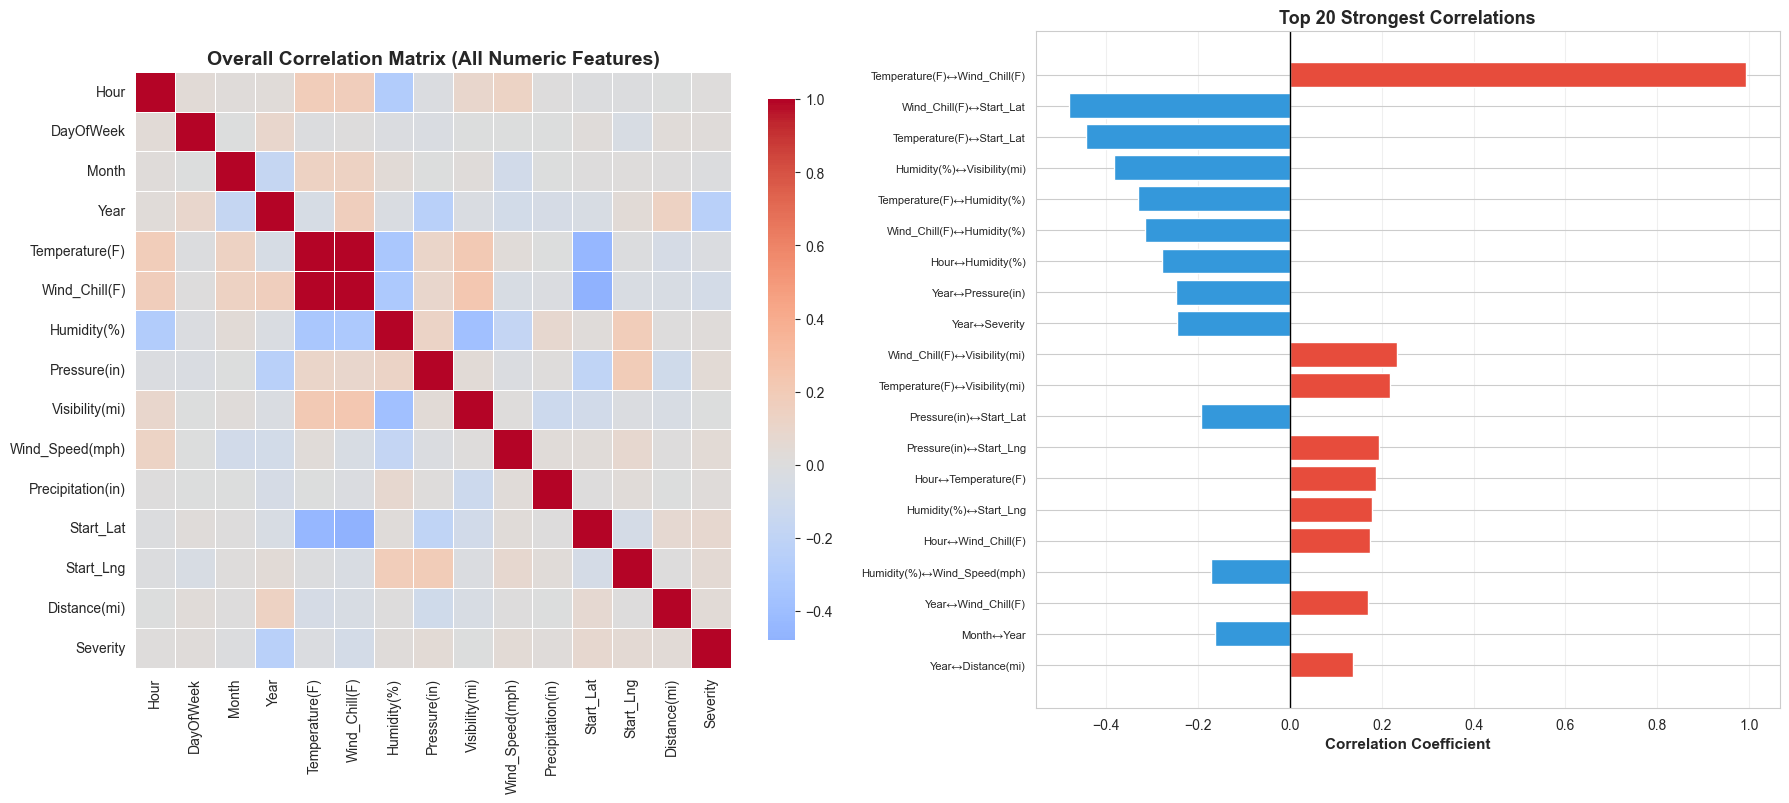


2. CORRELATIONS WITH SEVERITY (TARGET VARIABLE)

⚠️  Numeric Features Correlation with Severity:
--------------------------------------------------------------------------------
                  Feature |  Correlation |  Abs Value |        Strength
--------------------------------------------------------------------------------
                     Hour |       +0.013 |      0.013 |            Weak
                DayOfWeek |       +0.022 |      0.022 |            Weak
                    Month |       -0.011 |      0.011 |            Weak
                     Year |       -0.247 |      0.247 |        Moderate
           Temperature(F) |       -0.020 |      0.020 |            Weak
            Wind_Chill(F) |       -0.070 |      0.070 |            Weak
              Humidity(%) |       +0.022 |      0.022 |            Weak
             Pressure(in) |       +0.042 |      0.042 |            Weak
           Visibility(mi) |       -0.003 |      0.003 |            Weak
          Wind_Speed

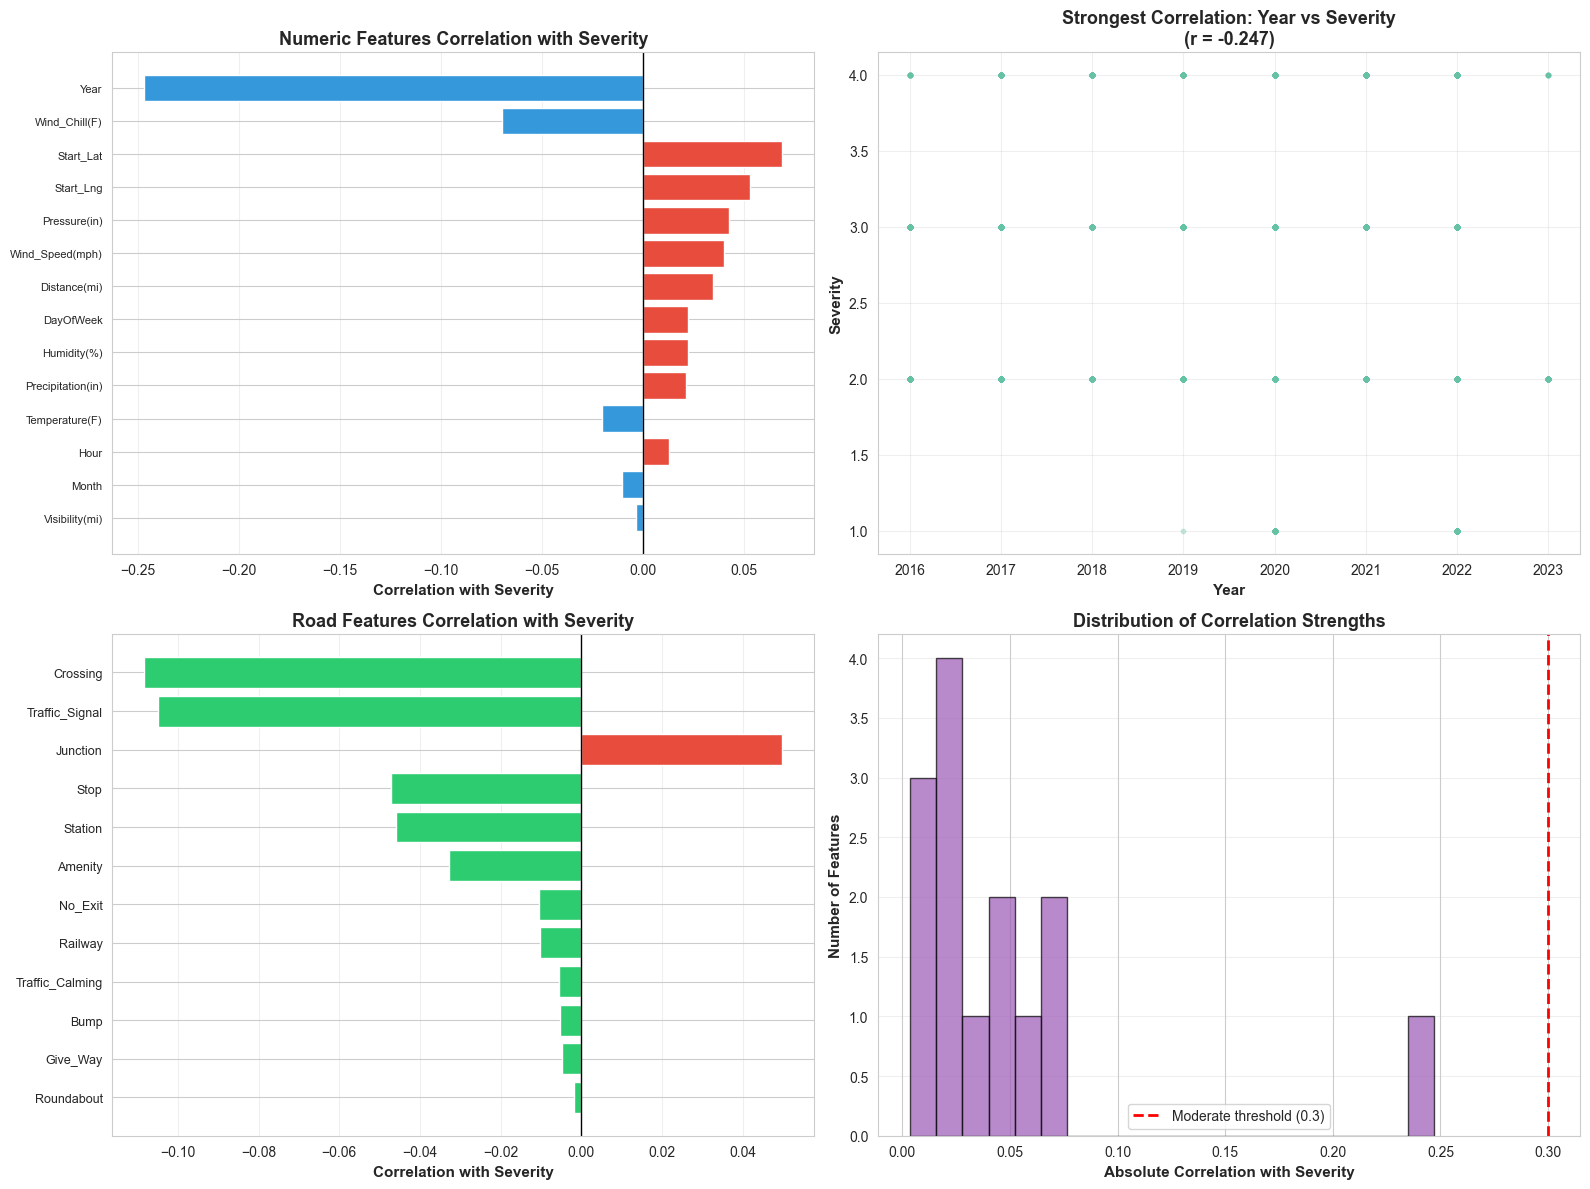


3. TEMPORAL-WEATHER CORRELATIONS

🌦️⏰ Temporal-Weather Correlation Analysis:
--------------------------------------------------------------------------------

Key Temporal-Weather Relationships:
--------------------------------------------------------------------------------
   1. Hour            ↔ Humidity(%)         : -0.278
   2. Year            ↔ Pressure(in)        : -0.248
   3. Hour            ↔ Temperature(F)      : +0.188
   4. Hour            ↔ Wind_Chill(F)       : +0.174
   5. Year            ↔ Wind_Chill(F)       : +0.170
   6. Month           ↔ Wind_Chill(F)       : +0.136
   7. Month           ↔ Temperature(F)      : +0.134
   8. Hour            ↔ Wind_Speed(mph)     : +0.131
   9. Hour            ↔ Visibility(mi)      : +0.089
  10. Month           ↔ Wind_Speed(mph)     : -0.088
  11. Year            ↔ Wind_Speed(mph)     : -0.076
  12. Year            ↔ Precipitation(in)   : -0.060
  13. Year            ↔ Temperature(F)      : -0.051
  14. Month           ↔ Humidity(%

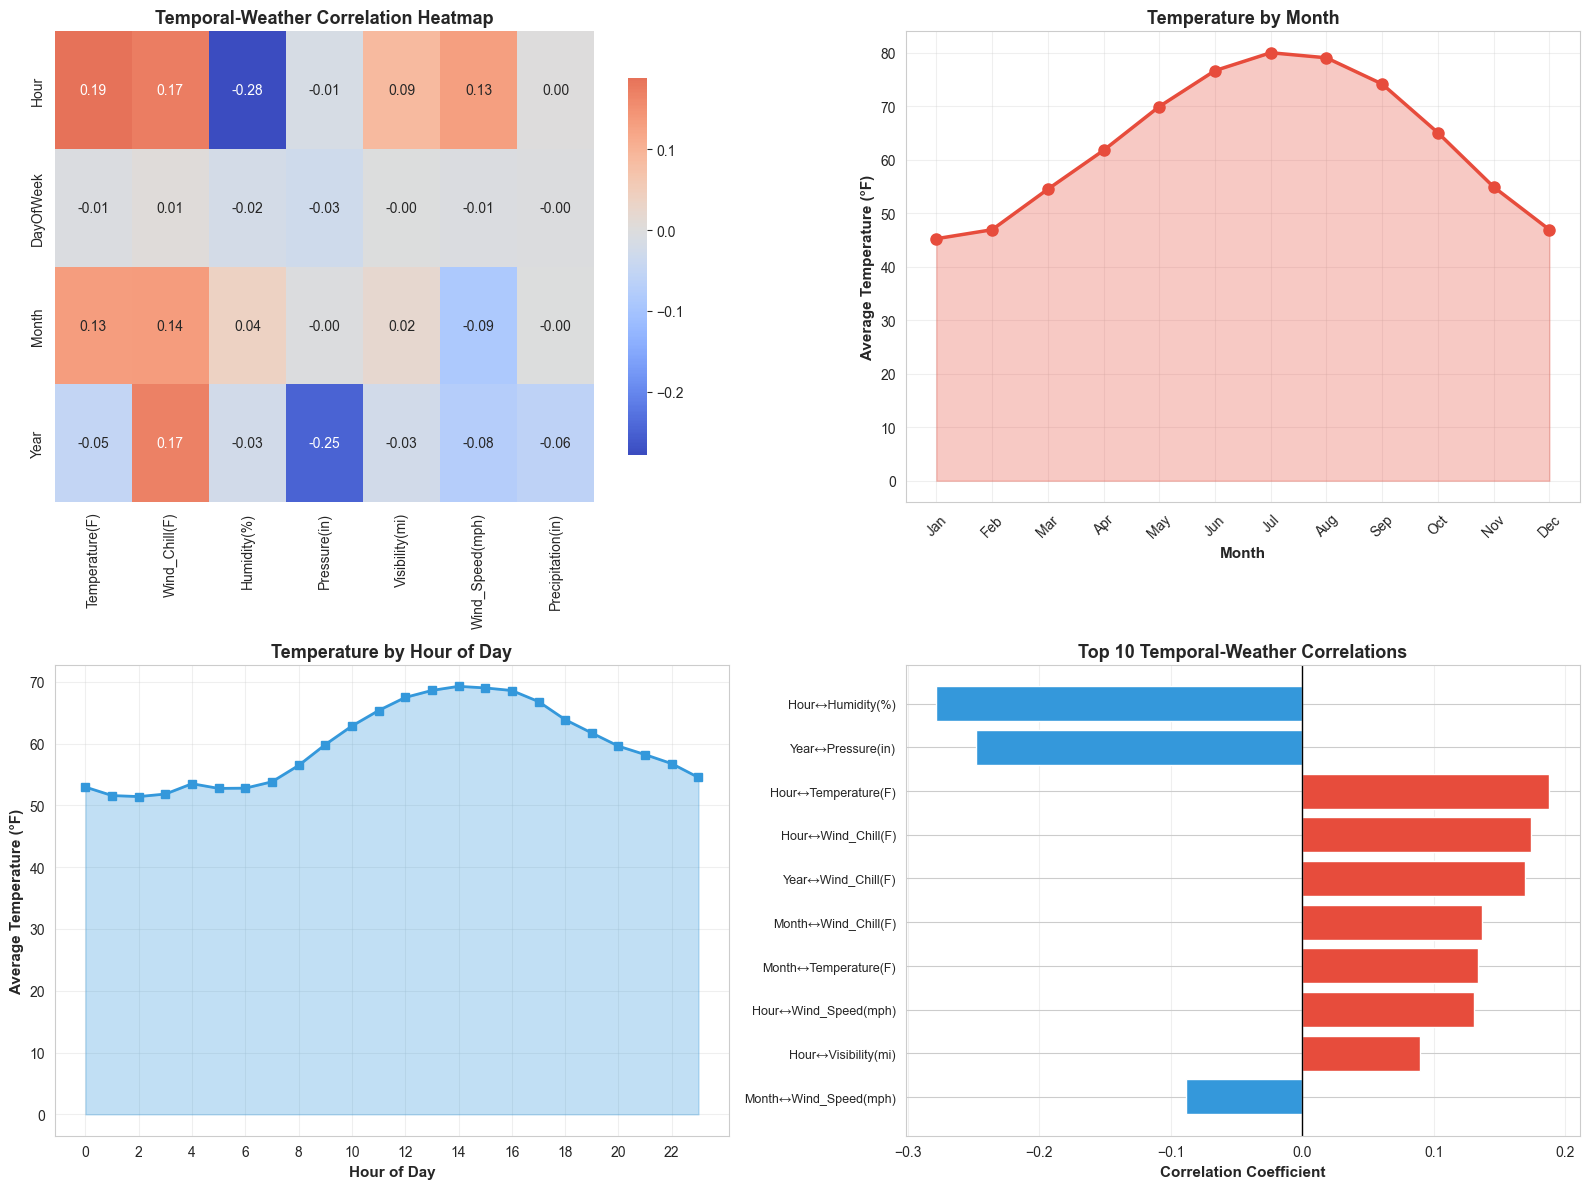


4. GEOGRAPHIC-SEVERITY CORRELATIONS

🗺️  Geographic Features Correlation with Severity:
--------------------------------------------------------------------------------
  Start_Lat           : +0.069
  Start_Lng           : +0.053
  Distance(mi)        : +0.035

🗺️  Severity by State (Top 10 and Bottom 10):
--------------------------------------------------------------------------------

  Top 10 Highest Severity States:
     1. GA: 2.507 (169,234.0 accidents)
     2. WI: 2.474 (34,688.0 accidents)
     3. RI: 2.458 (16,971.0 accidents)
     4. KY: 2.454 (32,254.0 accidents)
     5. CO: 2.444 (90,885.0 accidents)
     6. IA: 2.419 (26,307.0 accidents)
     7. MO: 2.400 (77,323.0 accidents)
     8. IN: 2.398 (67,224.0 accidents)
     9. IL: 2.383 (168,958.0 accidents)
    10. NM: 2.372 (10,325.0 accidents)

  Top 10 Lowest Severity States:
     1. FL: 2.140 (880,192.0 accidents)
     2. NC: 2.134 (338,199.0 accidents)
     3. LA: 2.126 (149,701.0 accidents)
     4. AZ: 2.120 (170,609.0

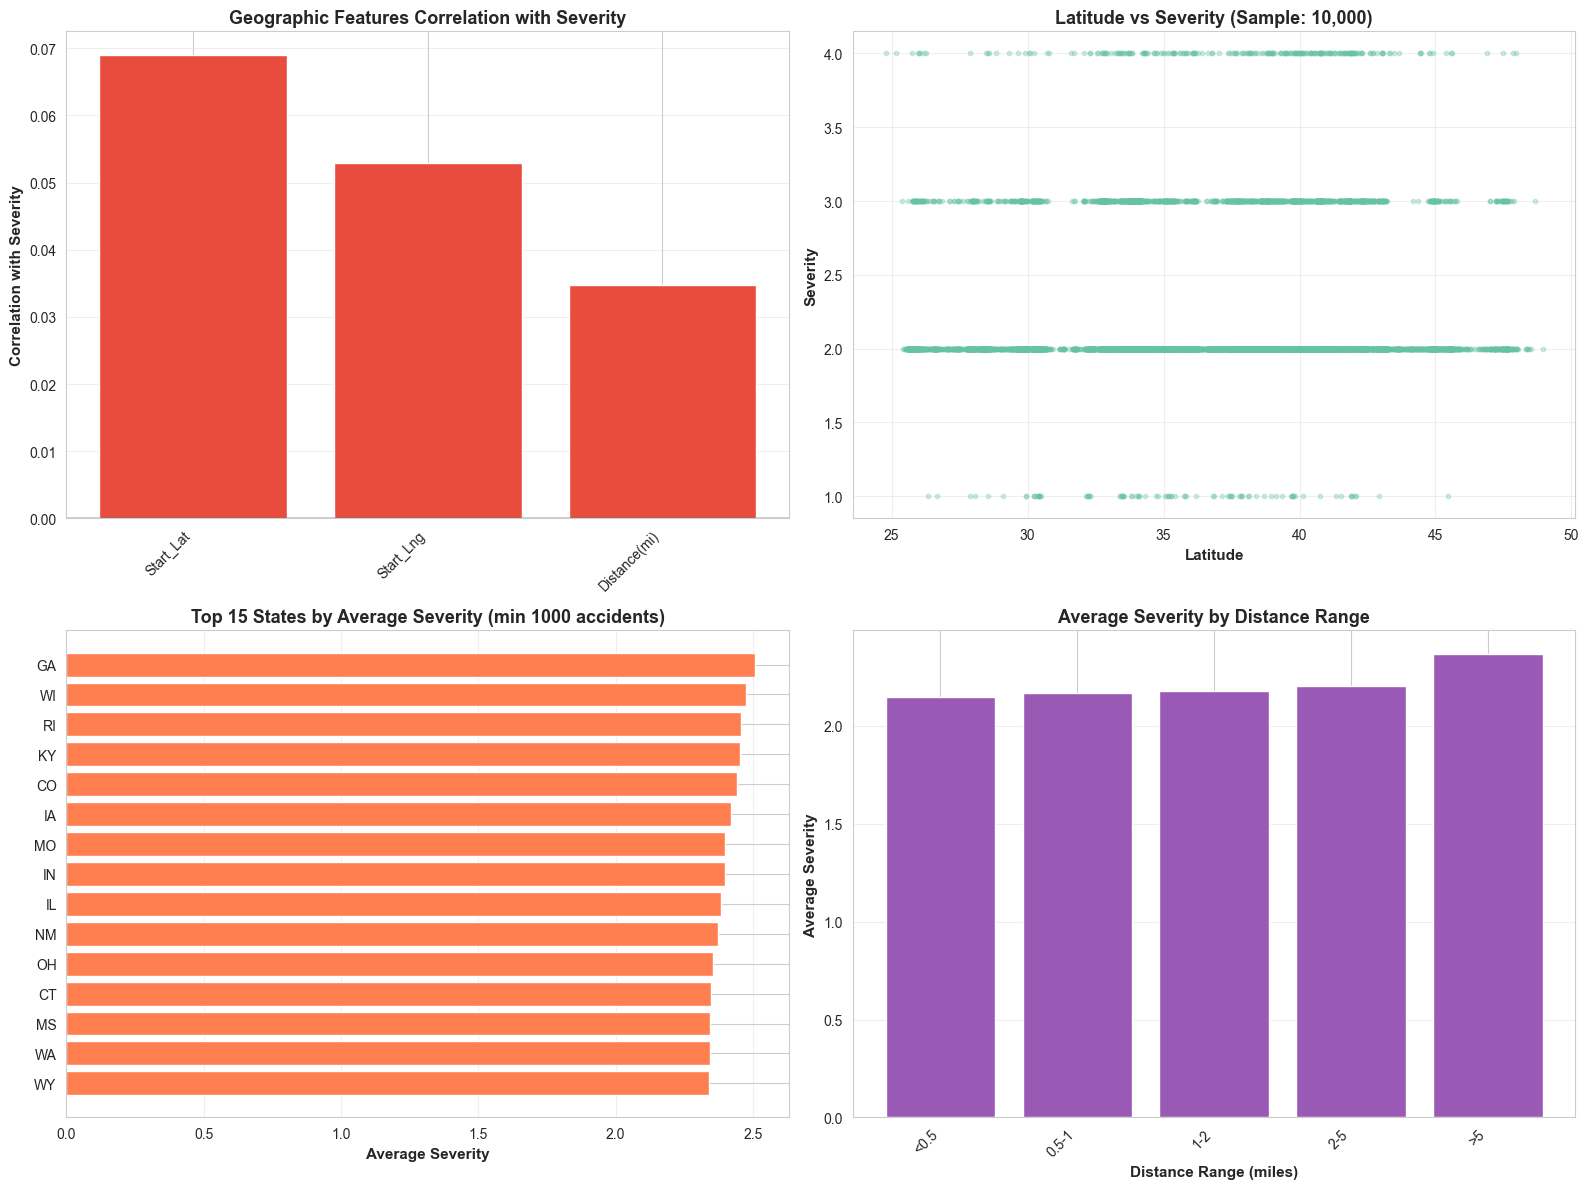


5. MULTIVARIATE RELATIONSHIPS

🌡️⏰⚠️  Temperature-Hour-Severity Interaction:
--------------------------------------------------------------------------------

Average Severity by Hour and Temperature Category:
Temp_Category  Freezing   Cold  Moderate   Warm    Hot
Hour                                                  
0                 2.184  2.180     2.246  2.252  2.142
1                 2.182  2.144     2.222  2.213  2.068
2                 2.209  2.164     2.234  2.220  2.209
3                 2.227  2.198     2.252  2.238  2.164
4                 2.268  2.221     2.243  2.210  2.145
5                 2.252  2.204     2.222  2.209  2.182
6                 2.231  2.201     2.211  2.199  2.118
7                 2.216  2.189     2.191  2.170  2.182
8                 2.224  2.194     2.196  2.166  2.178
9                 2.260  2.234     2.224  2.213  2.169
10                2.269  2.239     2.218  2.204  2.181
11                2.260  2.236     2.214  2.202  2.169
12                2

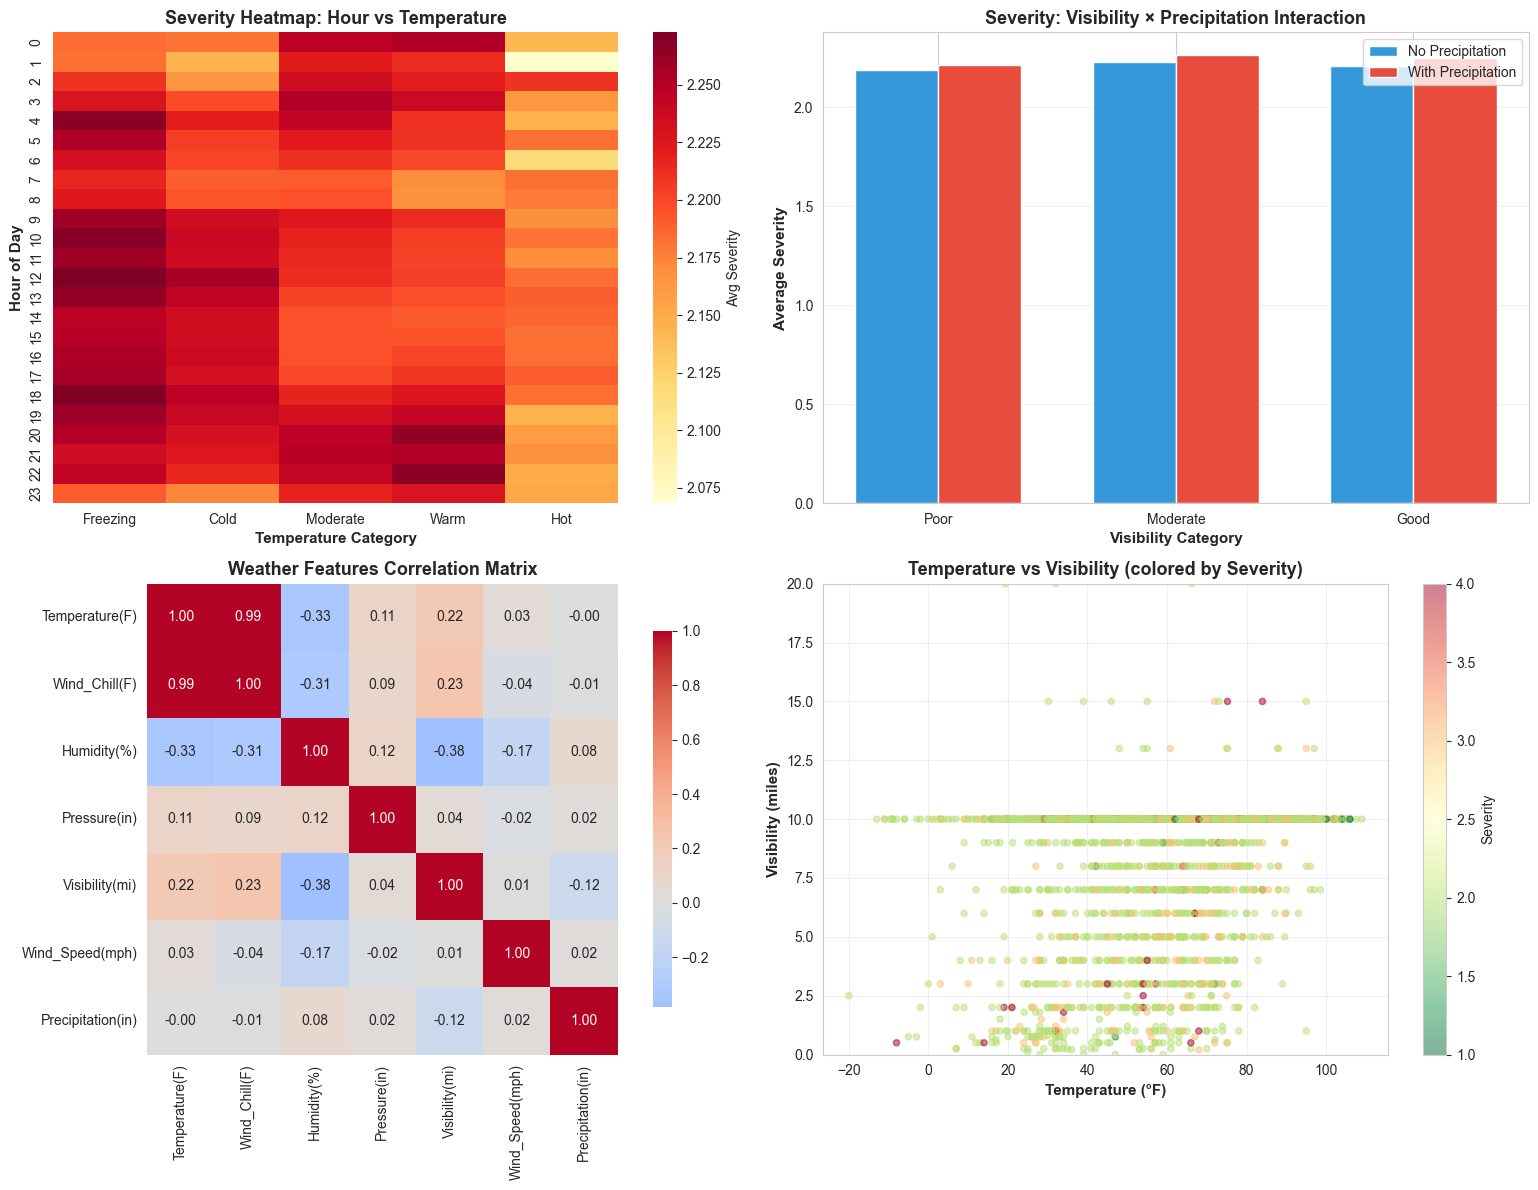


6. FEATURE IMPORTANCE INSIGHTS

📊 Feature Importance Summary (Based on Correlation Analysis):
--------------------------------------------------------------------------------

🔴 High Importance Features (|r| > 0.3): 0

🟡 Moderate Importance Features (0.1 < |r| ≤ 0.3): 3
   1. Year                          : 0.247
   2. Crossing                      : 0.108
   3. Traffic_Signal                : 0.105

🟢 Low Importance Features (|r| ≤ 0.1): 23
  23 features with low correlation

📋 Feature Category Importance:
--------------------------------------------------------------------------------
  Temporal            : Avg |r| = 0.073, Max |r| = 0.247
  Weather             : Avg |r| = 0.031, Max |r| = 0.070
  Geographic          : Avg |r| = 0.052, Max |r| = 0.069
  Road Features       : Avg |r| = 0.036, Max |r| = 0.108


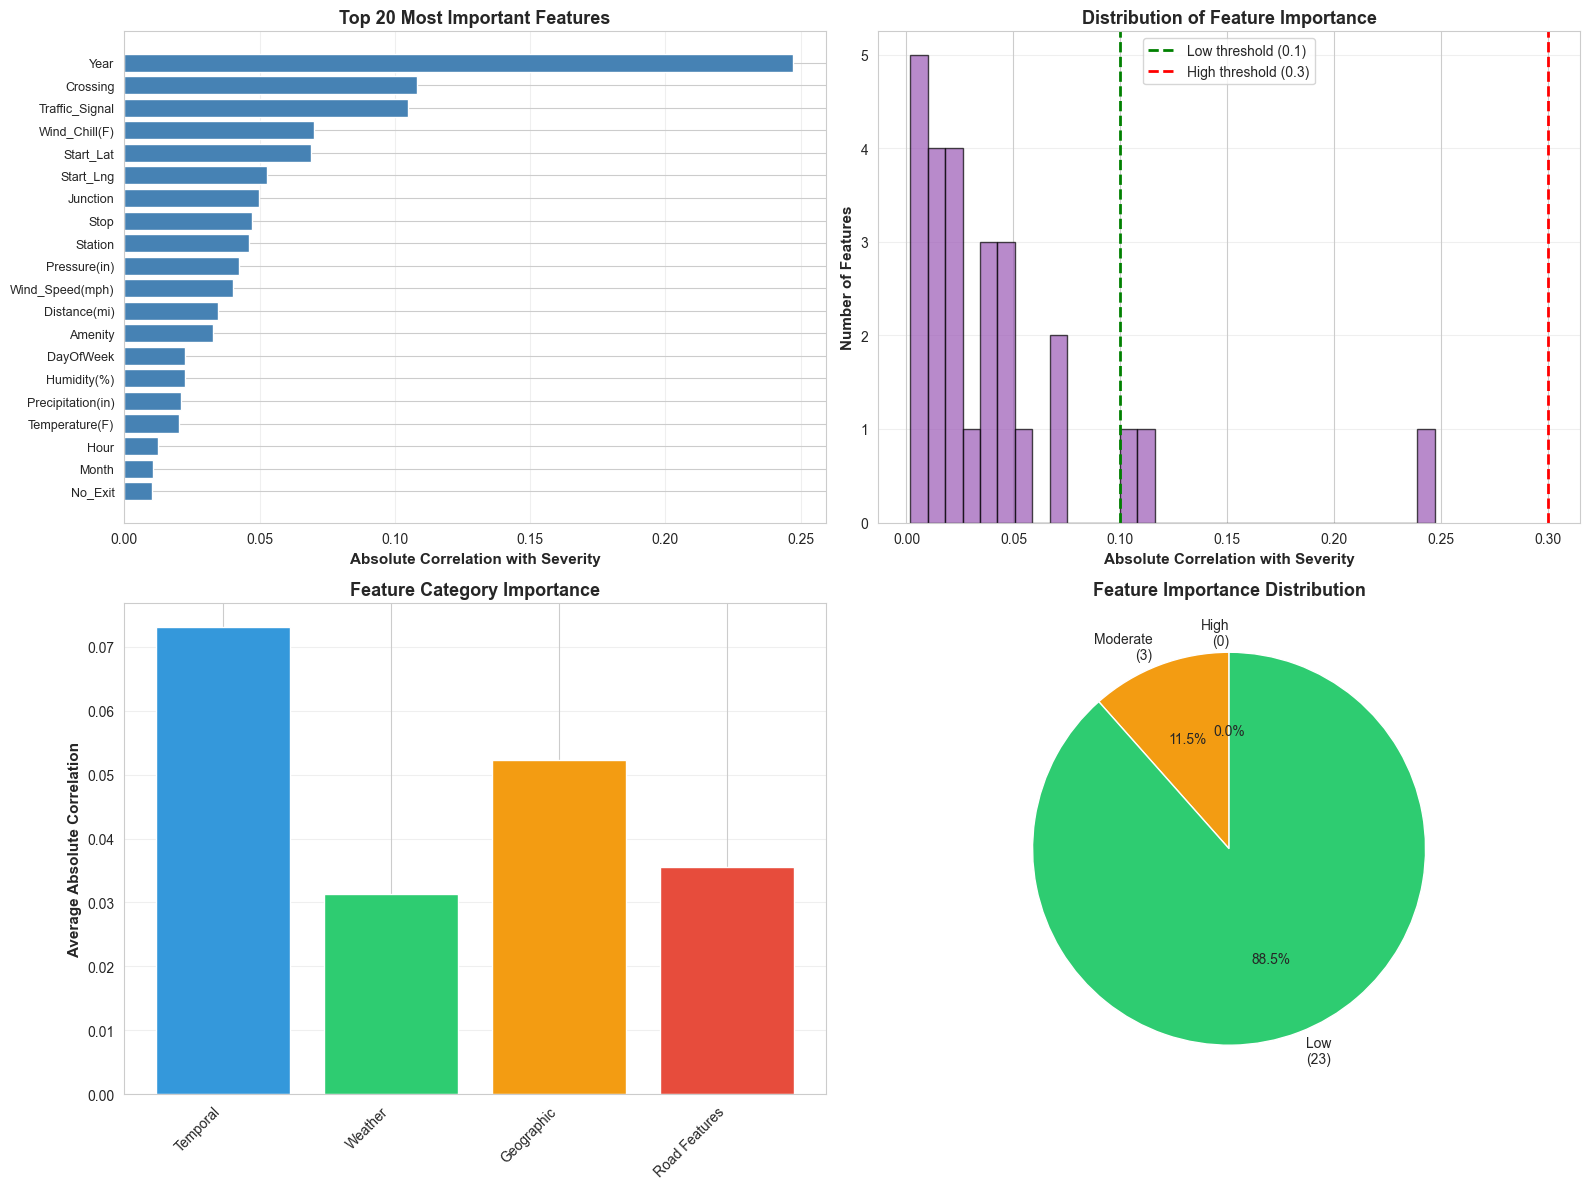


7. CORRELATION ANALYSIS SUMMARY

FEATURE CORRELATIONS & RELATIONSHIPS SUMMARY
US Accidents Dataset - Traffic Accident Risk Predictor
Generated: 2025-11-06 20:46:48

1. FEATURE CATEGORIES ANALYZED
--------------------------------------------------------------------------------
   Temporal Features: 4
   Weather Features: 7
   Geographic Features: 3
   Road Features (Binary): 13
   Total Numeric Features: 14

2. KEY CORRELATION FINDINGS
--------------------------------------------------------------------------------
   • Strong inter-weather correlations identified
   • Temporal-weather relationships show seasonal patterns
   • Geographic features show regional severity patterns
   • Road features impact severity independently and in combinations
   • Multivariate interactions reveal complex relationships

3. SEVERITY PREDICTION INSIGHTS
--------------------------------------------------------------------------------
   • Multiple features show moderate correlation with severity
   • No

In [4]:
# Run complete analysis
analyzer = CorrelationAnalysis(dataset)
analyzer.run_complete_analysis()